In [1]:
# !pip install python-docx

In [2]:
import glob
import os
import random
import math
import ast
import docx
import scipy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from datetime import datetime
from scipy.spatial.distance import cdist

# Part 5 and 6 - making the plots of ArUco tracking

In [3]:
workdir = 'C:/Users/Putte027/OneDrive - Universiteit Utrecht/Documents/data/CVAT_vs_ArUco/final/'

In [4]:
df = pd.read_csv(workdir + 'df.csv')
df.loc[:,['frame_tracked', 'bb_top', 'visible','frame', 'visible_inter', 'tl_x', 'ID_CVAT', 'ID_ArUco', 'video']].sample(15)

frame_tracked  bb_top  visible   frame  visible_inter    tl_x  \
291820            NaN     NaN      NaN  1319.0            1.0   836.0   
82529             NaN     NaN      NaN  1597.0            1.0  1170.0   
520730            NaN     NaN      NaN  1768.0            1.0   157.0   
646741            NaN     NaN      NaN   134.0            1.0   681.0   
90528             NaN     NaN      NaN  2269.0            1.0   689.0   
480049            NaN     NaN      NaN   437.0            1.0   180.0   
513136            NaN     NaN      NaN   976.0            1.0  1270.0   
40209             NaN     NaN      NaN  1225.0            1.0   898.0   
1217              NaN     NaN      NaN  1596.0            1.0   688.0   
602817            NaN     NaN      NaN  1409.0            1.0  1039.0   
9093              NaN     NaN      NaN  1391.0            1.0   321.0   
217174            NaN     NaN      NaN   461.0            1.0  1142.0   
438781            NaN     NaN      NaN  1315.0            1.0   717.0   
188497            NaN     NaN      NaN  1983.0            1.0   661.0   
487785            NaN     NaN      NaN  2239.0            1.0  1097.0   

        ID_CVAT  ID_ArUco                       video  
291820      2.0       2.0   03_20220108075951_part2_4  
82529       7.0       2.0   01_20220108115951_part1_5  
520730      4.0      14.0   07_20220108115953_part2_4  
646741      5.0       5.0    p01t_07_20220102074423_2  
90528       2.0      12.0   01_20220108115951_part1_6  
480049      5.0      14.0   07_20220108115953_part2_1  
513136     10.0      12.0   07_20220108115953_part2_3  
40209       5.0       4.0   01_20220108115951_part1_3  
1217        1.0      12.0   01_20220108115951_part1_1  
602817      7.0      17.0   11_20220108105951_part1_2  
9093        6.0       6.0   01_20220108115951_part1_1  
217174      1.0       1.0  02_20220111065955_part2_WC  
438781      5.0      11.0   06_20211217112157_part1_6  
188497      6.0       6.0  02_20220111065955_part2_WA  
487785      8.0      17.0   07_20220108115953_part2_1

In [5]:
df2 = pd.read_csv(workdir + 'df2.csv')
df2.sample(15)

Unnamed: 0                       video  ID_CVAT  frame  \
418601       418601  02_20220111065955_part2_WB      3.0   1762   
696395       696395    05_20220108114710_part_4      5.0    956   
1181744     1181744   10_20220108115949_part2_6      3.0    785   
87417         87417   01_20220108115951_part1_4      6.0    918   
1242701     1242701   11_20220108105951_part1_3      4.0   1742   
1340002     1340002    p01t_07_20220102074423_2      5.0    643   
744831       744831    05_20220108114710_part_6      7.0   1112   
69671         69671   01_20220108115951_part1_3     10.0     72   
961909       961909   06_20211217112157_part1_9      8.0    150   
75621         75621   01_20220108115951_part1_4      1.0   1222   
167786       167786   01_20220108115951_part1_7      8.0   1647   
444348       444348  02_20220111065955_part2_WC      4.0   1049   
189919       189919   01_20220108115951_part1_8      6.0   2000   
864224       864224   06_20211217112157_part1_5      3.0    685   
244937       244937         01_20220110073318_2      9.0   1698   

                  original_video  ID_ArUco breed start_time  visible   x_BB  \
418601   02_20220111065955_part2       3.0    DW   07:36:05      NaN    NaN   
696395         05_20220108114710    9999.0    IB   11:53:08      NaN    NaN   
1181744  10_20220108115949_part2    9999.0    IB   12:43:46      NaN    NaN   
87417    01_20220108115951_part1       6.0    DW   12:05:49      NaN    NaN   
1242701  11_20220108105951_part1      16.0    IB   11:03:51      NaN    NaN   
1340002   p01t_07_20220102074423       5.0    DW   07:46:22      NaN    NaN   
744831         05_20220108114710      17.0    IB   11:57:08      NaN    NaN   
69671    01_20220108115951_part1       5.0    DW   12:03:50      NaN    NaN   
961909   06_20211217112157_part1      20.0    IB   11:37:58      NaN    NaN   
75621    01_20220108115951_part1       1.0    DW   12:05:49      NaN    NaN   
167786   01_20220108115951_part1      12.0    DW   12:11:50      NaN    NaN   
444348   02_20220111065955_part2       4.0    DW   07:38:04      NaN    NaN   
189919   01_20220108115951_part1       6.0    DW   12:13:49      1.0  438.2   
864224   06_20211217112157_part1      12.0    IB   11:29:58      NaN    NaN   
244937         01_20220110073318    9999.0    IB   07:35:19      NaN    NaN   

           y_BB  x_ArUco  y_ArUco  max_frame  
418601      NaN      NaN      NaN        NaN  
696395      NaN      NaN      NaN        NaN  
1181744     NaN      NaN      NaN        NaN  
87417       NaN   336.50   548.25     2420.0  
1242701     NaN      NaN      NaN        NaN  
1340002     NaN   705.75   469.25     2400.0  
744831      NaN      NaN      NaN        NaN  
69671       NaN      NaN      NaN        NaN  
961909      NaN  1550.50   944.75     2400.0  
75621       NaN   667.25   326.75     2420.0  
167786      NaN   306.25   625.00     2420.0  
444348      NaN      NaN      NaN        NaN  
189919   804.15   402.00   843.75     2420.0  
864224      NaN   585.00   438.75     2400.0  
244937      NaN      NaN      NaN        NaN

In [6]:
print('the original data frame df has ', df.shape[0], ' rows and ', df.shape[1], 'columns')
print('the adapted data frame df2 has ', df2.shape[0], ' rows and ', df2.shape[1], 'columns')
print('df2 has a selection of columns: ')
for key in df2.keys():
    print(key)

the original data frame df has  687860  rows and  68 columns
the adapted data frame df2 has  1442560  rows and  14 columns
df2 has a selection of columns: 
Unnamed: 0
video
ID_CVAT
frame
original_video
ID_ArUco
breed
start_time
visible
x_BB
y_BB
x_ArUco
y_ArUco
max_frame


In [7]:
vid = '06_20211217112157_part1_1'
ID = 1.0

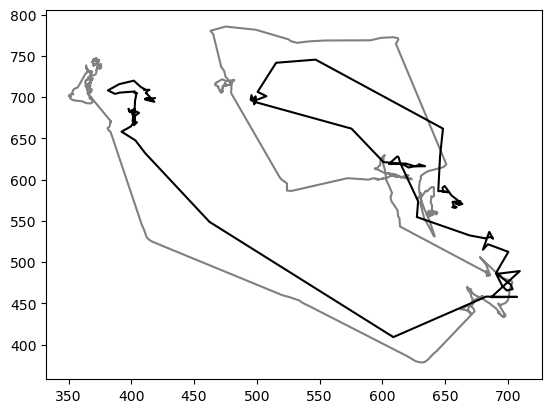

In [8]:
plt.plot(df.loc[(df['video']==vid)&(df['ID_CVAT']==1)&(df['x_ArUco']>=0.0),'x_ArUco'],\
         df.loc[(df['video']==vid)&(df['ID_CVAT']==1)&(df['x_ArUco']>=0.0),'y_ArUco'],\
         ls="-", color='grey', label = '1 ArUco')
plt.plot(df.loc[(df['video']==vid)&(df['ID_CVAT']==1)&(df['x_BB']>=0.0),'x_BB'],\
         df.loc[(df['video']==vid)&(df['ID_CVAT']==1)&(df['x_BB']>=0.0),'y_BB'],\
         ls="-", color='black', label = '1 Bounding Box')

Text(0.5, 0.92, 'Hen moving by Bounding Box (black) and ArUco marker (grey)')

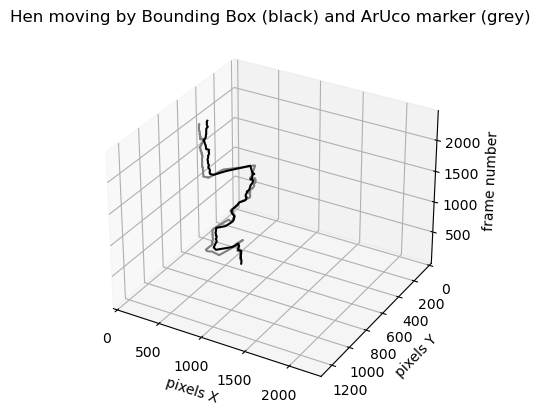

In [9]:
ax = plt.axes(projection='3d') #Data for a three-dimensional line

xline = df.loc[(df['video']==vid)&(df['ID_CVAT']==ID)&(df['x_ArUco']>=0.0),'x_ArUco']
yline = df.loc[(df['video']==vid)&(df['ID_CVAT']==ID)&(df['x_ArUco']>=0.0),'y_ArUco']
zline = df.loc[(df['video']==vid)&(df['ID_CVAT']==ID)&(df['x_ArUco']>=0.0),'frame']
ax.plot3D(xline, yline, zline, 'grey')



xlinebb = df.loc[(df['video']==vid)&(df['ID_CVAT']==ID)&(df['x_BB']>=0.0),'x_BB']
ylinebb = df.loc[(df['video']==vid)&(df['ID_CVAT']==ID)&(df['x_BB']>=0.0),'y_BB']
zlinebb = df.loc[(df['video']==vid)&(df['ID_CVAT']==ID)&(df['x_BB']>=0.0),'frame']
ax.plot3D(xlinebb, ylinebb, zlinebb, 'black')

# Set labels for the axes
ax.set_xlabel('pixels X')
ax.set_ylabel('pixels Y')
ax.set_zlabel('frame number')

plt.xlim(0,2304)
plt.ylim(1296,0)
plt.title('Hen moving by Bounding Box (black) and ArUco marker (grey)')
# plt.ylabel('z')


# Part 5

### 5.1 Calculate distance metrics

In [10]:
def distance(x1, y1, x2, y2):
    distance = np.sqrt((x1-x2)**2+(y1-y2)**2)
    return distance

In [11]:
df2['dist_BB_ArUco'] = df2.apply(lambda row: distance(row['x_BB'], row['y_BB'], row['x_ArUco'], row['y_ArUco']), axis=1)
# to have a look, it only makes sense to look at the rows containing position data of both:
df2.loc[(df2['x_BB']>=0.0)&(df['x_ArUco']>=0.0),:].head()

Unnamed: 0                      video  ID_CVAT  frame  \
19          19  01_20220108115951_part1_1      1.0     20   
39          39  01_20220108115951_part1_1      1.0     40   
59          59  01_20220108115951_part1_1      1.0     60   
79          79  01_20220108115951_part1_1      1.0     80   
99          99  01_20220108115951_part1_1      1.0    100   

             original_video  ID_ArUco breed start_time  visible     x_BB  \
19  01_20220108115951_part1      12.0    DW   11:59:51      1.0  340.900   
39  01_20220108115951_part1      12.0    DW   11:59:51      1.0  345.450   
59  01_20220108115951_part1      12.0    DW   11:59:51      1.0  348.850   
79  01_20220108115951_part1      12.0    DW   11:59:51      1.0  349.550   
99  01_20220108115951_part1      12.0    DW   11:59:51      1.0  349.765   

      y_BB  x_ArUco  y_ArUco  max_frame  dist_BB_ArUco  
19  835.16   300.00   832.50     2400.0      40.986408  
39  835.16   303.00   831.25     2400.0      42.629692  
59  832.91   306.00   832.00     2400.0      42.859662  
79  833.50   304.50   833.50     2400.0      45.050000  
99  835.10   306.25   833.50     2400.0      43.544405

In [12]:
# let's check the second row (index 39), basic Pythagoras with x_BB, x_ArUco, y_BB and y_ArUco:
check = np.sqrt((345.450-303.00)**2+(835.16-831.25)**2)
check # should be 42.629692 as could be read on the second row of column dist_BB_ArUco

42.62969153066908

### 5.2 have a look on the filtering
In the next part we plot the distance between ArUco and Bounding Box

<Axes: >

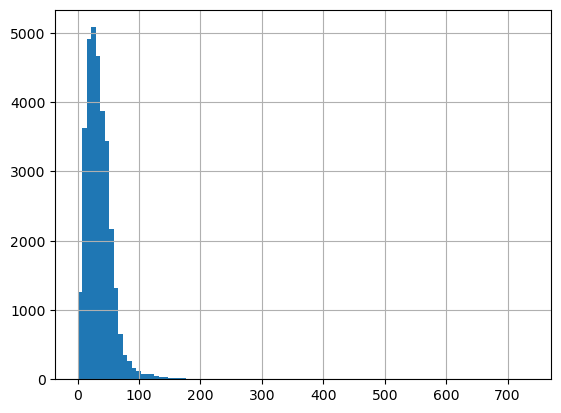

In [13]:
df2.dist_BB_ArUco.hist(bins=100)

### Some points were clearly not filtered out

First of all, good to see there's not a lot happening further away than one chicken length. This means most of the filtering work before was somehow useful.

There are however some points on the right that should not be there. Being more than 1 chicken away is not to be expected. Also, how big exactly is a laying hen? 

How many are we talking about?

so the white hens are  213 pixels long and the brown ones  220
average chicken size:  217 pixels
nan


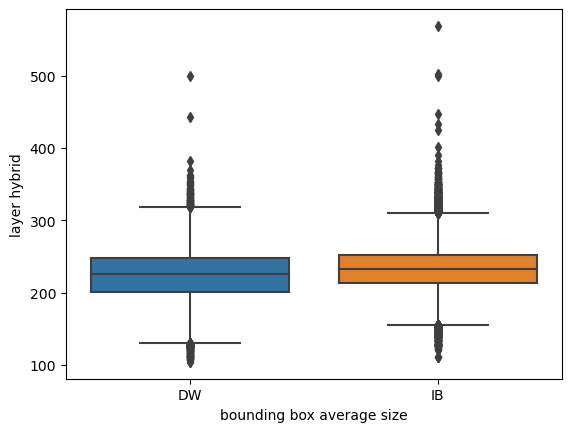

In [14]:
DW_hen_size = (df.loc[df['breed']=='DW'].bb_width.mean() + df.loc[df['breed']=='IB'].bb_height.mean()) / 2
IB_hen_size = (df.loc[df['breed']=='IB'].bb_width.mean() + df.loc[df['breed']=='IB'].bb_height.mean()) / 2
average_hen_size = (DW_hen_size + IB_hen_size)/2
print('so the white hens are ', round(DW_hen_size), 'pixels long and the brown ones ', round(IB_hen_size))
print('average chicken size: ', round(average_hen_size), 'pixels')
df['avg_bb_size'] = (df['bb_width'] + df['bb_height']) /2

from scipy import stats
res = stats.shapiro(df.sample(4999).avg_bb_size)
print(res.statistic)
ax = sns.boxplot(data=df.loc[df['visible']==1], x='breed', y='avg_bb_size')
ax.set(xlabel='bounding box average size', ylabel='layer hybrid')
plt.show()

In [15]:
df2.loc[(df2['dist_BB_ArUco']>=average_hen_size), 'dist_BB_ArUco'].count()

62

In [16]:
percentage_far_off = round(100*df2.loc[(df2['dist_BB_ArUco']>=average_hen_size\
                                       ), 'dist_BB_ArUco'].count() / df2.loc[:, 'dist_BB_ArUco'].count(),1)
print('percentage of ArUco further than 1 chicken distance away: ', percentage_far_off, '%')

percentage of ArUco further than 1 chicken distance away:  0.2 %


<Axes: >

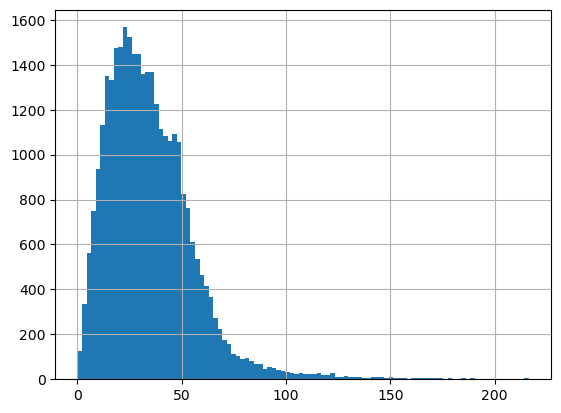

In [17]:
df2.loc[(df2['dist_BB_ArUco']<=average_hen_size), 'dist_BB_ArUco'].hist(bins=100)

### 5.3 calculate distance moved between records for ArUco and between records for Bounding Boxes
The cell with the calculation is quite long, but since all steps have to be taken I left them together.

#### 5.3.A Sort values
To calculate per animal, we can either do the calculations one animal at a time, or all at once. The latter is significantly faster and easier to check for me, so here's what we did.

If we use pandas functions, the order of the cells is of importance. All information has to be sorted in long format per animal. This way if we use a function like diff() or shift() we keep information per animal whilst still handling a single frame.
It is however very important to then not link data of multiple animals. We thus first do all calculations and then delete the linked data to the first row of a new animal. This way we keep the information per animal apart.

In [18]:
df2 = df2.sort_values(by=['video', 'ID_CVAT', 'ID_ArUco', 'frame']).reset_index()
df2.head()

index  Unnamed: 0                      video  ID_CVAT  frame  \
0      0           0  01_20220108115951_part1_1      1.0      1   
1      1           1  01_20220108115951_part1_1      1.0      2   
2      2           2  01_20220108115951_part1_1      1.0      3   
3      3           3  01_20220108115951_part1_1      1.0      4   
4      4           4  01_20220108115951_part1_1      1.0      5   

            original_video  ID_ArUco breed start_time  visible  x_BB  y_BB  \
0  01_20220108115951_part1      12.0    DW   11:59:51      1.0   NaN   NaN   
1  01_20220108115951_part1      12.0    DW   11:59:51      NaN   NaN   NaN   
2  01_20220108115951_part1      12.0    DW   11:59:51      NaN   NaN   NaN   
3  01_20220108115951_part1      12.0    DW   11:59:51      NaN   NaN   NaN   
4  01_20220108115951_part1      12.0    DW   11:59:51      NaN   NaN   NaN   

   x_ArUco  y_ArUco  max_frame  dist_BB_ArUco  
0   300.00   833.75     2400.0            NaN  
1   299.75   833.50     2400.0            NaN  
2   300.25   833.50     2400.0            NaN  
3   300.75   833.25     2400.0            NaN  
4   301.25   832.50     2400.0            NaN

#### 5.3.B.1 get the previous ArUco position and frame at which it was recorded

In [19]:
df2.loc[(df2['x_ArUco']>=0), 'x_ArUco_previous'\
       ] = df2.loc[(df2['x_ArUco']>=0), 'x_ArUco'].shift()
df2.loc[(df2['x_ArUco']>=0), 'y_ArUco_previous'\
       ] = df2.loc[(df2['x_ArUco']>=0), 'y_ArUco'].shift()
df2.loc[(df2['x_ArUco']>=0), 'frame_previous_ArUco'\
       ] = df2.loc[(df2['x_ArUco']>=0), 'frame'].shift()

#### 5.3.B.2 get the previous Bounding Box position and frame at which it was recorded

In [20]:
df2.loc[(df2['x_BB']>=0), 'x_BB_previous'\
       ] = df2.loc[(df2['x_BB']>=0), 'x_BB'].shift()
df2.loc[(df2['x_BB']>=0), 'y_BB_previous'\
       ] = df2.loc[(df2['x_BB']>=0), 'y_BB'].shift()
df2.loc[(df2['x_BB']>=0), 'frame_previous_BB'\
       ] = df2.loc[(df2['x_BB']>=0), 'frame'].shift()

#### 5.3.C.1 calculate the distance between the current and previous ArUco position

In [21]:
df2['dist_ArUco'] = df2.apply(lambda row: distance(row['x_ArUco'],\
                                                   row['y_ArUco'], \
                                                   row['x_ArUco_previous'],\
                                                   row['y_ArUco_previous']), axis=1)
df2.loc[df2['x_ArUco']>=0, ['ID_CVAT', 'frame','x_ArUco', 'x_ArUco_previous']][0:25] # let's see

ID_CVAT  frame  x_ArUco  x_ArUco_previous
0       1.0      1   300.00               NaN
1       1.0      2   299.75            300.00
2       1.0      3   300.25            299.75
3       1.0      4   300.75            300.25
4       1.0      5   301.25            300.75
5       1.0      6   301.75            301.25
6       1.0      7   301.75            301.75
7       1.0      8   301.75            301.75
8       1.0      9   301.75            301.75
9       1.0     10   300.75            301.75
10      1.0     11   300.50            300.75
11      1.0     12   300.00            300.50
12      1.0     13   300.00            300.00
13      1.0     14   299.75            300.00
14      1.0     15   299.50            299.75
15      1.0     16   299.50            299.50
16      1.0     17   299.50            299.50
17      1.0     18   299.75            299.50
18      1.0     19   299.75            299.75
19      1.0     20   300.00            299.75
20      1.0     21   300.50            300.00
21      1.0     22   300.50            300.50
22      1.0     23   300.50            300.50
23      1.0     24   300.50            300.50
24      1.0     25   300.50            300.50

#### 5.3.C.2 calculate the distance between the current and previous Bounding Box position

In [22]:
df2['dist_BB'] = df2.apply(lambda row: distance(row['x_BB'],\
                                                row['y_BB'], \
                                                row['x_BB_previous'],\
                                                row['y_BB_previous']), axis=1)
df2.loc[df2['x_BB']>=0, ['ID_CVAT', 'frame','x_BB', 'x_BB_previous']][0:25] # let's see

ID_CVAT  frame     x_BB  x_BB_previous
19       1.0     20  340.900            NaN
39       1.0     40  345.450        340.900
59       1.0     60  348.850        345.450
79       1.0     80  349.550        348.850
99       1.0    100  349.765        349.550
119      1.0    120  351.350        349.765
139      1.0    140  358.210        351.350
159      1.0    160  358.955        358.210
179      1.0    180  334.285        358.955
199      1.0    200  311.100        334.285
219      1.0    220  277.700        311.100
239      1.0    240  222.675        277.700
259      1.0    260  217.485        222.675
279      1.0    280  213.100        217.485
299      1.0    300  212.900        213.100
319      1.0    320  213.100        212.900
339      1.0    340  212.185        213.100
359      1.0    360  210.270        212.185
379      1.0    380  207.035        210.270
399      1.0    400  212.350        207.035
419      1.0    420  228.845        212.350
439      1.0    440  232.100        228.845
459      1.0    460  237.905        232.100
479      1.0    480  230.350        237.905
499      1.0    500  230.130        230.350

### 5.3.D Remove incorrect first record for ArUco
The first record is now linked to the last record of another animal. We have to remove it.

#### 5.3.D.1 Find first record per animal for ArUco

In [23]:
first_ArUco_appearance = df2.loc[(df2['x_ArUco']>=0), ['ID_CVAT', 'ID_ArUco','video', 'frame']\
                                ].groupby(['video', 'ID_CVAT', 'ID_ArUco']).min().reset_index()
first_ArUco_appearance.loc[:,'first_ArUco_appearance'] = 'first'
first_ArUco_appearance

video  ID_CVAT  ID_ArUco  frame  \
0    01_20220108115951_part1_1      1.0      12.0      1   
1    01_20220108115951_part1_1      2.0       1.0      1   
2    01_20220108115951_part1_1      3.0       3.0      2   
3    01_20220108115951_part1_1      4.0       4.0      1   
4    01_20220108115951_part1_1      5.0       5.0      1   
..                         ...      ...       ...    ...   
443   p02t_06_20220112171551_3      2.0      17.0     70   
444   p02t_06_20220112171551_3      3.0      11.0     34   
445   p02t_06_20220112171551_3      4.0      15.0    136   
446   p02t_06_20220112171551_3      5.0      20.0     12   
447   p02t_06_20220112171551_3      9.0      14.0      8   

    first_ArUco_appearance  
0                    first  
1                    first  
2                    first  
3                    first  
4                    first  
..                     ...  
443                  first  
444                  first  
445                  first  
446                  first  
447                  first  

[448 rows x 5 columns]

#### 5.3.D.2 merge first record information to the dataframe

In [24]:
df2 = df2.merge(first_ArUco_appearance, on=['video', 'ID_CVAT','ID_ArUco', 'frame'], how='left')
df2.loc[(df2['x_ArUco']>=0)][0:10]

index  Unnamed: 0                      video  ID_CVAT  frame  \
0      0           0  01_20220108115951_part1_1      1.0      1   
1      1           1  01_20220108115951_part1_1      1.0      2   
2      2           2  01_20220108115951_part1_1      1.0      3   
3      3           3  01_20220108115951_part1_1      1.0      4   
4      4           4  01_20220108115951_part1_1      1.0      5   
5      5           5  01_20220108115951_part1_1      1.0      6   
6      6           6  01_20220108115951_part1_1      1.0      7   
7      7           7  01_20220108115951_part1_1      1.0      8   
8      8           8  01_20220108115951_part1_1      1.0      9   
9      9           9  01_20220108115951_part1_1      1.0     10   

            original_video  ID_ArUco breed start_time  visible  ...  \
0  01_20220108115951_part1      12.0    DW   11:59:51      1.0  ...   
1  01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   
2  01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   
3  01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   
4  01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   
5  01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   
6  01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   
7  01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   
8  01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   
9  01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   

   dist_BB_ArUco  x_ArUco_previous  y_ArUco_previous  frame_previous_ArUco  \
0            NaN               NaN               NaN                   NaN   
1            NaN            300.00            833.75                   1.0   
2            NaN            299.75            833.50                   2.0   
3            NaN            300.25            833.50                   3.0   
4            NaN            300.75            833.25                   4.0   
5            NaN            301.25            832.50                   5.0   
6            NaN            301.75            832.00                   6.0   
7            NaN            301.75            832.00                   7.0   
8            NaN            301.75            832.00                   8.0   
9            NaN            301.75            832.00                   9.0   

   x_BB_previous  y_BB_previous  frame_previous_BB  dist_ArUco  dist_BB  \
0            NaN            NaN                NaN         NaN      NaN   
1            NaN            NaN                NaN    0.353553      NaN   
2            NaN            NaN                NaN    0.500000      NaN   
3            NaN            NaN                NaN    0.559017      NaN   
4            NaN            NaN                NaN    0.901388      NaN   
5            NaN            NaN                NaN    0.707107      NaN   
6            NaN            NaN                NaN    0.000000      NaN   
7            NaN            NaN                NaN    0.000000      NaN   
8            NaN            NaN                NaN    0.000000      NaN   
9            NaN            NaN                NaN    1.030776      NaN   

   first_ArUco_appearance  
0                   first  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
5                     NaN  
6                     NaN  
7                     NaN  
8                     NaN  
9                     NaN  

[10 rows x 25 columns]

#### 5.3.D.3 remove the incorrect recorf of ArUco distance

In [25]:
# Replace the first measurment for ArUco:
df2.loc[(df2['first_ArUco_appearance']=='first'),\
        ['x_ArUco_previous', 'y_ArUco_previous','dist_ArUco', 'frame_previous_ArUco']] = np.nan


In [26]:
# let's have a look:
df2.loc[(df2['x_ArUco']>=0),\
        ['ID_CVAT', 'x_ArUco','x_ArUco_previous', 'y_ArUco',\
         'y_ArUco_previous','dist_ArUco','frame','frame_previous_ArUco']][0:8]

ID_CVAT  x_ArUco  x_ArUco_previous  y_ArUco  y_ArUco_previous  dist_ArUco  \
0      1.0   300.00               NaN   833.75               NaN         NaN   
1      1.0   299.75            300.00   833.50            833.75    0.353553   
2      1.0   300.25            299.75   833.50            833.50    0.500000   
3      1.0   300.75            300.25   833.25            833.50    0.559017   
4      1.0   301.25            300.75   832.50            833.25    0.901388   
5      1.0   301.75            301.25   832.00            832.50    0.707107   
6      1.0   301.75            301.75   832.00            832.00    0.000000   
7      1.0   301.75            301.75   832.00            832.00    0.000000   

   frame  frame_previous_ArUco  
0      1                   NaN  
1      2                   1.0  
2      3                   2.0  
3      4                   3.0  
4      5                   4.0  
5      6                   5.0  
6      7                   6.0  
7      8                   7.0

### 5.3.E Remove incorrect first record for Bounding Boxes
#### 5.3.E.1 Find first record per animal for Bounding Boxes

In [27]:
first_BB_appearance = df2.loc[(df2['x_BB']>=0), ['video','ID_CVAT','ID_ArUco', 'frame']\
                             ].groupby(['video','ID_CVAT','ID_ArUco']).min().reset_index()
first_BB_appearance.loc[:,'first_BB_appearance'] = 'first'

#### 5.3.E.2 merge first record information to the dataframe for Bounding Boxes

In [28]:
df2 = df2.merge(first_BB_appearance, on=['video', 'ID_CVAT', 'ID_ArUco','frame'], how='left')
df2.loc[(df2['x_BB']>=0)][0:10]

index  Unnamed: 0                      video  ID_CVAT  frame  \
19      19          19  01_20220108115951_part1_1      1.0     20   
39      39          39  01_20220108115951_part1_1      1.0     40   
59      59          59  01_20220108115951_part1_1      1.0     60   
79      79          79  01_20220108115951_part1_1      1.0     80   
99      99          99  01_20220108115951_part1_1      1.0    100   
119    119         119  01_20220108115951_part1_1      1.0    120   
139    139         139  01_20220108115951_part1_1      1.0    140   
159    159         159  01_20220108115951_part1_1      1.0    160   
179    179         179  01_20220108115951_part1_1      1.0    180   
199    199         199  01_20220108115951_part1_1      1.0    200   

              original_video  ID_ArUco breed start_time  visible  ...  \
19   01_20220108115951_part1      12.0    DW   11:59:51      1.0  ...   
39   01_20220108115951_part1      12.0    DW   11:59:51      1.0  ...   
59   01_20220108115951_part1      12.0    DW   11:59:51      1.0  ...   
79   01_20220108115951_part1      12.0    DW   11:59:51      1.0  ...   
99   01_20220108115951_part1      12.0    DW   11:59:51      1.0  ...   
119  01_20220108115951_part1      12.0    DW   11:59:51      1.0  ...   
139  01_20220108115951_part1      12.0    DW   11:59:51      1.0  ...   
159  01_20220108115951_part1      12.0    DW   11:59:51      1.0  ...   
179  01_20220108115951_part1      12.0    DW   11:59:51      1.0  ...   
199  01_20220108115951_part1      12.0    DW   11:59:51      1.0  ...   

     x_ArUco_previous  y_ArUco_previous  frame_previous_ArUco  x_BB_previous  \
19             299.75            832.00                  19.0            NaN   
39             303.00            831.25                  39.0        340.900   
59             306.00            832.00                  59.0        345.450   
79             304.50            833.50                  79.0        348.850   
99             306.25            833.50                  99.0        349.550   
119            308.50            831.50                 119.0        349.765   
139            311.75            832.75                 139.0        351.350   
159            322.75            836.75                 159.0        358.210   
179            318.75            834.75                 179.0        358.955   
199            296.50            833.00                 199.0        334.285   

     y_BB_previous  frame_previous_BB  dist_ArUco    dist_BB  \
19             NaN                NaN    0.559017        NaN   
39         835.160               20.0    0.000000   4.550000   
59         835.160               40.0    0.000000   4.077070   
79         832.910               60.0    0.000000   0.915478   
99         833.500               80.0    0.000000   1.614381   
119        835.100              100.0    0.000000   1.650401   
139        834.640              120.0    0.000000   6.866127   
159        834.350              140.0    0.000000   1.399732   
179        835.535              160.0    0.353553  24.802470   
199        838.095              180.0    0.250000  23.518232   

     first_ArUco_appearance  first_BB_appearance  
19                      NaN                first  
39                      NaN                  NaN  
59                      NaN                  NaN  
79                      NaN                  NaN  
99                      NaN                  NaN  
119                     NaN                  NaN  
139                     NaN                  NaN  
159                     NaN                  NaN  
179                     NaN                  NaN  
199                     NaN                  NaN  

[10 rows x 26 columns]

#### 5.3.E.3 remove the incorrect recorf of ArUco distance

In [29]:
# Replace the first measurment for Bounding Box:
df2.loc[(df2['first_BB_appearance']=='first'),\
        ['x_BB_previous', 'y_BB_previous', 'dist_BB', 'frame_previous_BB']] = np.nan

In [30]:
# let's have a look: (only at the BB data so evey 20th frame)
df2.loc[(df2['x_BB']>=0),\
        ['ID_CVAT', 'x_BB', 'y_BB','x_BB_previous', 'y_BB_previous','dist_BB','frame','frame_previous_BB']][0:8]

ID_CVAT     x_BB     y_BB  x_BB_previous  y_BB_previous   dist_BB  frame  \
19       1.0  340.900  835.160            NaN            NaN       NaN     20   
39       1.0  345.450  835.160        340.900         835.16  4.550000     40   
59       1.0  348.850  832.910        345.450         835.16  4.077070     60   
79       1.0  349.550  833.500        348.850         832.91  0.915478     80   
99       1.0  349.765  835.100        349.550         833.50  1.614381    100   
119      1.0  351.350  834.640        349.765         835.10  1.650401    120   
139      1.0  358.210  834.350        351.350         834.64  6.866127    140   
159      1.0  358.955  835.535        358.210         834.35  1.399732    160   

     frame_previous_BB  
19                 NaN  
39                20.0  
59                40.0  
79                60.0  
99                80.0  
119              100.0  
139              120.0  
159              140.0

### 5.4 frame difference between measurements

In [31]:
df2['Aruco_frame_diff'] = df2['frame'] - df2['frame_previous_ArUco']
df2['BB_frame_diff'] = df2['frame'] - df2['frame_previous_BB']

In [32]:
# if everything worked in removing incorrect data, we don't have negative values at the first marker track
print(df2.loc[(df2['first_BB_appearance']=='first'), 'Aruco_frame_diff'].unique().tolist())
print(df2.loc[(df2['first_BB_appearance']=='first'), 'BB_frame_diff'].unique().tolist())

[1.0, nan, 2.0, 3.0, 4.0]
[nan]


In [33]:
df2.loc[:,'dist_ArUco_pf'] = df2['dist_ArUco'] / df2['Aruco_frame_diff']
df2.loc[:,'dist_BB_pf'] = df2['dist_BB'] / df2['BB_frame_diff']

<Axes: >

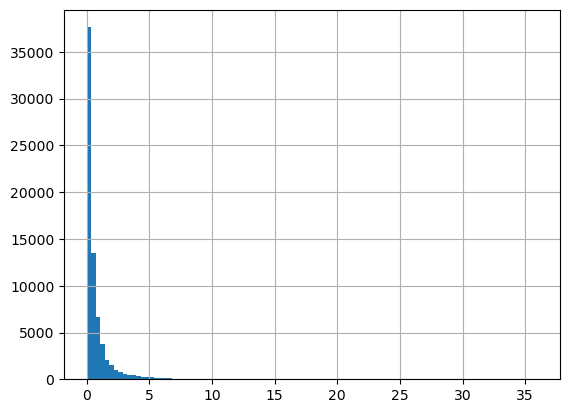

In [34]:
df2.dist_BB_pf.hist(bins=100)

(0.0, 50.0)

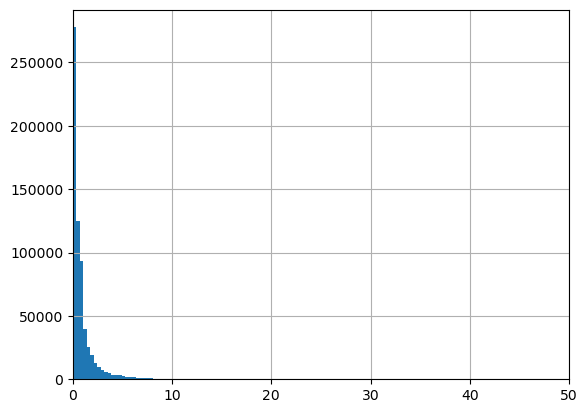

In [35]:
df2.dist_ArUco_pf.hist(bins=1000)
plt.xlim([0,50])

### 5.5 Cumulative Measurements - simple phenotype - per bird
we sum the information on distance per animal. 

For summing distance, we came up with the inspiring name: sumdist.

In the next cells we produce new columns for a groupby element, we checked the length and indexes are sure the information is added to the correct animal. If not, we make a new groupby element and merge it back.

In [36]:
sumdist = df2[['video', 'ID_CVAT', 'dist_ArUco', 'dist_BB', 'dist_ArUco_pf', 'dist_BB_pf']].groupby(['video', 'ID_CVAT']).sum().reset_index()
sumdist['breed'] = df2.groupby(['video', 'ID_CVAT']).first().reset_index()['breed']
sumdist[['count_ArUco', 'count_BB']] = df2[['video', 'ID_CVAT', 'dist_ArUco', 'dist_BB']].groupby(['video', 'ID_CVAT']).count().reset_index()[['dist_ArUco', 'dist_BB']]
sumdist['avg_dist_ArUco_pf'] = sumdist['dist_ArUco_pf'] / sumdist['count_ArUco']
sumdist['avg_dist_BB_pf'] = sumdist['dist_BB_pf'] / sumdist['count_BB']
sumdist

video  ID_CVAT   dist_ArUco      dist_BB  \
0    01_20220108115951_part1_1      1.0  3064.206906  2513.923384   
1    01_20220108115951_part1_1      2.0  3187.158904  2685.414780   
2    01_20220108115951_part1_1      3.0  6879.498645  5618.619445   
3    01_20220108115951_part1_1      4.0  1762.544464  2065.099634   
4    01_20220108115951_part1_1      5.0    78.472947  1114.439522   
..                         ...      ...          ...          ...   
595   p02t_06_20220112171551_3      5.0  1435.213016  1162.105853   
596   p02t_06_20220112171551_3      6.0     0.000000   487.335704   
597   p02t_06_20220112171551_3      7.0     0.000000  2013.074986   
598   p02t_06_20220112171551_3      8.0     0.000000   663.335966   
599   p02t_06_20220112171551_3      9.0   293.425294   334.286708   

     dist_ArUco_pf  dist_BB_pf breed  count_ArUco  count_BB  \
0      2295.507671  125.696169    DW         1981       119   
1      2884.382687  134.270739    DW         2356       119   
2      4050.123053  280.930972    DW         2021       119   
3      1242.659217  103.254982    DW         1135       119   
4        47.783535   55.721976    DW            8       119   
..             ...         ...   ...          ...       ...   
595    1216.898866   58.105293    IB         1686       119   
596       0.000000   24.366785    IB            0       119   
597       0.000000  100.653749    IB            0       119   
598       0.000000   33.166798    IB            0       119   
599     181.205668   16.714335    IB          702       119   

     avg_dist_ArUco_pf  avg_dist_BB_pf  
0             1.158762        1.056270  
1             1.224271        1.128326  
2             2.004019        2.360764  
3             1.094854        0.867689  
4             5.972942        0.468252  
..                 ...             ...  
595           0.721767        0.488280  
596                NaN        0.204763  
597                NaN        0.845830  
598                NaN        0.278713  
599           0.258128        0.140457  

[600 rows x 11 columns]

In [37]:
max_frame = df2.groupby(['video']).first().reset_index()[['video', 'max_frame']]
sumdist = sumdist.merge(max_frame, on='video')
sumdist['markers_found_%'] = round((sumdist['count_ArUco'] / sumdist['max_frame'])*100,1)
sumdist

video  ID_CVAT   dist_ArUco      dist_BB  \
0    01_20220108115951_part1_1      1.0  3064.206906  2513.923384   
1    01_20220108115951_part1_1      2.0  3187.158904  2685.414780   
2    01_20220108115951_part1_1      3.0  6879.498645  5618.619445   
3    01_20220108115951_part1_1      4.0  1762.544464  2065.099634   
4    01_20220108115951_part1_1      5.0    78.472947  1114.439522   
..                         ...      ...          ...          ...   
595   p02t_06_20220112171551_3      5.0  1435.213016  1162.105853   
596   p02t_06_20220112171551_3      6.0     0.000000   487.335704   
597   p02t_06_20220112171551_3      7.0     0.000000  2013.074986   
598   p02t_06_20220112171551_3      8.0     0.000000   663.335966   
599   p02t_06_20220112171551_3      9.0   293.425294   334.286708   

     dist_ArUco_pf  dist_BB_pf breed  count_ArUco  count_BB  \
0      2295.507671  125.696169    DW         1981       119   
1      2884.382687  134.270739    DW         2356       119   
2      4050.123053  280.930972    DW         2021       119   
3      1242.659217  103.254982    DW         1135       119   
4        47.783535   55.721976    DW            8       119   
..             ...         ...   ...          ...       ...   
595    1216.898866   58.105293    IB         1686       119   
596       0.000000   24.366785    IB            0       119   
597       0.000000  100.653749    IB            0       119   
598       0.000000   33.166798    IB            0       119   
599     181.205668   16.714335    IB          702       119   

     avg_dist_ArUco_pf  avg_dist_BB_pf  max_frame  markers_found_%  
0             1.158762        1.056270     2400.0             82.5  
1             1.224271        1.128326     2400.0             98.2  
2             2.004019        2.360764     2400.0             84.2  
3             1.094854        0.867689     2400.0             47.3  
4             5.972942        0.468252     2400.0              0.3  
..                 ...             ...        ...              ...  
595           0.721767        0.488280     2400.0             70.2  
596                NaN        0.204763     2400.0              0.0  
597                NaN        0.845830     2400.0              0.0  
598                NaN        0.278713     2400.0              0.0  
599           0.258128        0.140457     2400.0             29.2  

[600 rows x 13 columns]

### Compare distance travelled between Bounding Box and ArUco

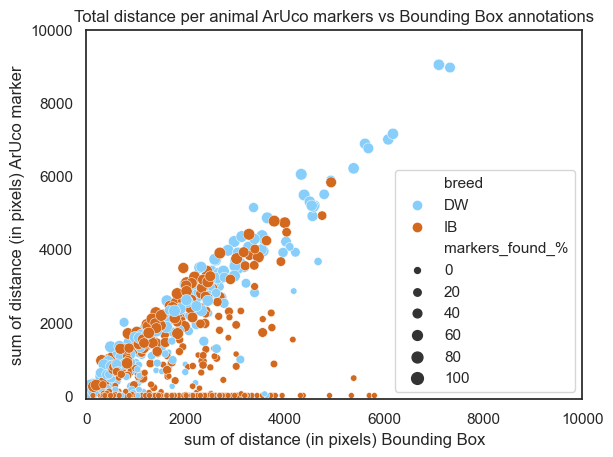

In [38]:
sns.set(style="white")
my_pal = {"IB": "chocolate", "DW": "lightskyblue"}
# sns.regplot(data=sumdist.loc[(sumdist['dist_ArUco']>=1),:], x='dist_BB', y='dist_ArUco', hue='breed', label='total distance moved')
# sns.scatterplot(data=sumdist.loc[(sumdist['dist_ArUco']>=1),:], x='dist_BB', y='dist_ArUco', hue='breed', label='total distance moved')
# sns.scatterplot(data=sumdist.loc[(sumdist['dist_ArUco']<=1),:], x='dist_BB', y='dist_ArUco', color='grey', label='ArUco never recognized')

sns.scatterplot(data=sumdist.loc[:,:], x='dist_BB', y='dist_ArUco', hue='breed', size='markers_found_%', palette=my_pal)

plt.ylabel('sum of distance (in pixels) ArUco marker')
plt.xlabel('sum of distance (in pixels) Bounding Box')
plt.title('Total distance per animal ArUco markers vs Bounding Box annotations')
plt.xlim([0,10000])
plt.ylim([-100,10000])
plt.legend()
plt.show()


In [39]:
prsn_filtered = scipy.stats.pearsonr(sumdist.loc[(sumdist['dist_ArUco']>1),'dist_ArUco'], sumdist.loc[(sumdist['dist_ArUco']>1),'dist_BB'])
prsn_filtered


PearsonRResult(statistic=0.8263484603172314, pvalue=8.722001317048809e-113)

In [40]:
prsn_incl_missing = scipy.stats.pearsonr(sumdist.loc[:,'dist_ArUco'], sumdist.loc[:,'dist_BB'])
prsn_incl_missing

PearsonRResult(statistic=0.5936352174921022, pvalue=2.0833275927931508e-58)

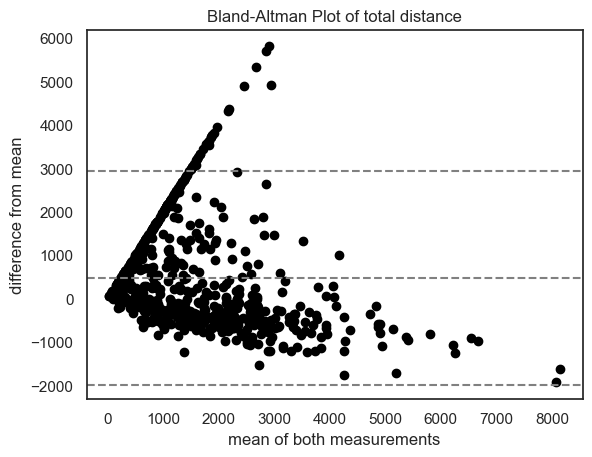

In [41]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs, c='black')
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    

x = sumdist.loc[:,'dist_BB']
y = sumdist.loc[:,'dist_ArUco']
    

bland_altman_plot(x, y)
plt.title('Bland-Altman Plot of total distance')
plt.xlabel('mean of both measurements')
plt.ylabel('difference from mean')
plt.grid(False)
plt.show()

# Part 6 Calculate measurements of distance between birds

### 6.1 Calculate distance between animals based on ArUco

In [42]:
df3_list = []

def calc_distance_parameters_ArUco(subset):
    if subset.shape[0] <=1:
        print('too small')
        return None
    frame = subset.loc[:,'frame'].values[0]
    video = subset.loc[:,'video'].values[0]
    print(subset.loc[:,'video'].values[0], subset.loc[:,'frame'].values[0])
    x = subset.loc[:, 'x_ArUco'].values
    y = subset.loc[:, 'y_ArUco'].values
    ids = subset.loc[:, 'ID_ArUco'].values
    breed = subset.loc[:, 'breed'].values[0]
    coords = np.column_stack((x, y))
    distances = cdist(coords, coords, metric='euclidean')
    np.fill_diagonal(distances, np.nan)
    total_distances = np.nansum(distances, axis=0)
    mean_distances = np.nanmean(distances, axis=0)
    min_distances = np.nanmin(distances, axis=0)
    max_distances = np.nanmax(distances, axis=0)
    std_distances = np.nanstd(distances, axis=0)
    if breed =='DW':
        nr_ArUco_within_1_length = np.count_nonzero(distances < (1*DW_hen_size), axis=0)
        nr_ArUco_within_2_length = np.count_nonzero(distances < (2*DW_hen_size), axis=0)
        nr_ArUco_within_3_length = np.count_nonzero(distances < (3*DW_hen_size), axis=0)
        nr_ArUco_within_4_length = np.count_nonzero(distances < (4*DW_hen_size), axis=0)
        nr_ArUco_within_5_length = np.count_nonzero(distances < (5*DW_hen_size), axis=0)
    elif breed == 'IB':
        nr_ArUco_within_1_length = np.count_nonzero(distances < (1*IB_hen_size), axis=0)
        nr_ArUco_within_2_length = np.count_nonzero(distances < (2*IB_hen_size), axis=0)
        nr_ArUco_within_3_length = np.count_nonzero(distances < (3*IB_hen_size), axis=0)
        nr_ArUco_within_4_length = np.count_nonzero(distances < (4*IB_hen_size), axis=0)
        nr_ArUco_within_5_length = np.count_nonzero(distances < (5*IB_hen_size), axis=0)
    else:
        print('error with breed ', breed)
    df_mini = pd.DataFrame({'frame': frame,\
                            'video': video,\
                            'ID_ArUco': ids,\
                            'ArUco_sum_dist': total_distances,\
                            'ArUco_dist_closest': min_distances,\
                            'ArUco_mean_dist': mean_distances,\
                            'ArUco_dist_furthest': max_distances,\
                            'ArUco_std_distances':std_distances,\
                            'nr_ArUco_markers': len(ids),\
                            'nr_ArUco_within_1_length':nr_ArUco_within_1_length,\
                            'nr_ArUco_within_2_length':nr_ArUco_within_2_length,\
                            'nr_ArUco_within_3_length':nr_ArUco_within_3_length,\
                            'nr_ArUco_within_4_length':nr_ArUco_within_4_length,\
                            'nr_ArUco_within_5_length':nr_ArUco_within_5_length\
                           })
    df3_list.append(df_mini)
    

df2.loc[(df2['x_ArUco'] >=1),['video', 'frame','ID_ArUco','x_ArUco', 'y_ArUco', 'breed']\
        ].groupby(['video', 'frame']).apply(lambda x: calc_distance_parameters_ArUco(x))

df3 = pd.concat(df3_list)
df3

01_20220108115951_part1_1 1
01_20220108115951_part1_1 2
01_20220108115951_part1_1 3
01_20220108115951_part1_1 4
01_20220108115951_part1_1 5
01_20220108115951_part1_1 6
01_20220108115951_part1_1 7
01_20220108115951_part1_1 8
01_20220108115951_part1_1 9
01_20220108115951_part1_1 10
01_20220108115951_part1_1 11
01_20220108115951_part1_1 12
01_20220108115951_part1_1 13
01_20220108115951_part1_1 14
01_20220108115951_part1_1 15
01_20220108115951_part1_1 16
01_20220108115951_part1_1 17
01_20220108115951_part1_1 18
01_20220108115951_part1_1 19
01_20220108115951_part1_1 20
01_20220108115951_part1_1 21
01_20220108115951_part1_1 22
01_20220108115951_part1_1 23
01_20220108115951_part1_1 24
01_20220108115951_part1_1 25
01_20220108115951_part1_1 26
01_20220108115951_part1_1 27
01_20220108115951_part1_1 28
01_20220108115951_part1_1 29
01_20220108115951_part1_1 30
01_20220108115951_part1_1 31
01_20220108115951_part1_1 32
01_20220108115951_part1_1 33
01_20220108115951_part1_1 34
01_20220108115951_part1

01_20220108115951_part1_1 577
01_20220108115951_part1_1 578
01_20220108115951_part1_1 579
01_20220108115951_part1_1 580
01_20220108115951_part1_1 581
01_20220108115951_part1_1 582
01_20220108115951_part1_1 583
01_20220108115951_part1_1 584
01_20220108115951_part1_1 585
01_20220108115951_part1_1 586
01_20220108115951_part1_1 587
01_20220108115951_part1_1 588
01_20220108115951_part1_1 589
01_20220108115951_part1_1 590
01_20220108115951_part1_1 591
01_20220108115951_part1_1 592
01_20220108115951_part1_1 593
01_20220108115951_part1_1 594
01_20220108115951_part1_1 595
01_20220108115951_part1_1 596
01_20220108115951_part1_1 597
01_20220108115951_part1_1 598
01_20220108115951_part1_1 599
01_20220108115951_part1_1 600
01_20220108115951_part1_1 601
01_20220108115951_part1_1 602
01_20220108115951_part1_1 603
01_20220108115951_part1_1 604
01_20220108115951_part1_1 605
01_20220108115951_part1_1 606
01_20220108115951_part1_1 607
01_20220108115951_part1_1 608
01_20220108115951_part1_1 609
01_2022010

01_20220108115951_part1_1 860
01_20220108115951_part1_1 861
01_20220108115951_part1_1 862
01_20220108115951_part1_1 863
01_20220108115951_part1_1 864
01_20220108115951_part1_1 865
01_20220108115951_part1_1 866
01_20220108115951_part1_1 867
01_20220108115951_part1_1 868
01_20220108115951_part1_1 869
01_20220108115951_part1_1 870
01_20220108115951_part1_1 871
01_20220108115951_part1_1 872
01_20220108115951_part1_1 873
01_20220108115951_part1_1 874
01_20220108115951_part1_1 875
01_20220108115951_part1_1 876
01_20220108115951_part1_1 877
01_20220108115951_part1_1 878
01_20220108115951_part1_1 879
01_20220108115951_part1_1 880
01_20220108115951_part1_1 881
01_20220108115951_part1_1 882
01_20220108115951_part1_1 883
01_20220108115951_part1_1 884
01_20220108115951_part1_1 885
01_20220108115951_part1_1 886
01_20220108115951_part1_1 887
01_20220108115951_part1_1 888
01_20220108115951_part1_1 889
01_20220108115951_part1_1 890
01_20220108115951_part1_1 891
01_20220108115951_part1_1 892
01_2022010

01_20220108115951_part1_1 1331
01_20220108115951_part1_1 1332
01_20220108115951_part1_1 1333
01_20220108115951_part1_1 1334
01_20220108115951_part1_1 1335
01_20220108115951_part1_1 1336
01_20220108115951_part1_1 1337
01_20220108115951_part1_1 1338
01_20220108115951_part1_1 1339
01_20220108115951_part1_1 1340
01_20220108115951_part1_1 1341
01_20220108115951_part1_1 1342
01_20220108115951_part1_1 1343
01_20220108115951_part1_1 1344
01_20220108115951_part1_1 1345
01_20220108115951_part1_1 1346
01_20220108115951_part1_1 1347
01_20220108115951_part1_1 1348
01_20220108115951_part1_1 1349
01_20220108115951_part1_1 1350
01_20220108115951_part1_1 1351
01_20220108115951_part1_1 1352
01_20220108115951_part1_1 1353
01_20220108115951_part1_1 1354
01_20220108115951_part1_1 1355
01_20220108115951_part1_1 1356
01_20220108115951_part1_1 1357
01_20220108115951_part1_1 1358
01_20220108115951_part1_1 1359
01_20220108115951_part1_1 1360
01_20220108115951_part1_1 1361
01_20220108115951_part1_1 1362
01_20220

01_20220108115951_part1_1 1613
01_20220108115951_part1_1 1614
01_20220108115951_part1_1 1615
01_20220108115951_part1_1 1616
01_20220108115951_part1_1 1617
01_20220108115951_part1_1 1618
01_20220108115951_part1_1 1619
01_20220108115951_part1_1 1620
01_20220108115951_part1_1 1621
01_20220108115951_part1_1 1622
01_20220108115951_part1_1 1623
01_20220108115951_part1_1 1624
01_20220108115951_part1_1 1625
01_20220108115951_part1_1 1626
01_20220108115951_part1_1 1627
01_20220108115951_part1_1 1628
01_20220108115951_part1_1 1629
01_20220108115951_part1_1 1630
01_20220108115951_part1_1 1631
01_20220108115951_part1_1 1632
01_20220108115951_part1_1 1633
01_20220108115951_part1_1 1634
01_20220108115951_part1_1 1635
01_20220108115951_part1_1 1636
01_20220108115951_part1_1 1637
01_20220108115951_part1_1 1638
01_20220108115951_part1_1 1639
01_20220108115951_part1_1 1640
01_20220108115951_part1_1 1641
01_20220108115951_part1_1 1642
01_20220108115951_part1_1 1643
01_20220108115951_part1_1 1644
01_20220

01_20220108115951_part1_1 1881
01_20220108115951_part1_1 1882
01_20220108115951_part1_1 1883
01_20220108115951_part1_1 1884
01_20220108115951_part1_1 1885
01_20220108115951_part1_1 1886
01_20220108115951_part1_1 1887
01_20220108115951_part1_1 1888
01_20220108115951_part1_1 1889
01_20220108115951_part1_1 1890
01_20220108115951_part1_1 1891
01_20220108115951_part1_1 1892
01_20220108115951_part1_1 1893
01_20220108115951_part1_1 1894
01_20220108115951_part1_1 1895
01_20220108115951_part1_1 1896
01_20220108115951_part1_1 1897
01_20220108115951_part1_1 1898
01_20220108115951_part1_1 1899
01_20220108115951_part1_1 1900
01_20220108115951_part1_1 1901
01_20220108115951_part1_1 1902
01_20220108115951_part1_1 1903
01_20220108115951_part1_1 1904
01_20220108115951_part1_1 1905
01_20220108115951_part1_1 1906
01_20220108115951_part1_1 1907
01_20220108115951_part1_1 1908
01_20220108115951_part1_1 1909
01_20220108115951_part1_1 1910
01_20220108115951_part1_1 1911
01_20220108115951_part1_1 1912
01_20220

01_20220108115951_part1_1 2155
01_20220108115951_part1_1 2156
01_20220108115951_part1_1 2157
01_20220108115951_part1_1 2158
01_20220108115951_part1_1 2159
01_20220108115951_part1_1 2160
01_20220108115951_part1_1 2161
01_20220108115951_part1_1 2162
01_20220108115951_part1_1 2163
01_20220108115951_part1_1 2164
01_20220108115951_part1_1 2165
01_20220108115951_part1_1 2166
01_20220108115951_part1_1 2167
01_20220108115951_part1_1 2168
01_20220108115951_part1_1 2169
01_20220108115951_part1_1 2170
01_20220108115951_part1_1 2171
01_20220108115951_part1_1 2172
01_20220108115951_part1_1 2173
01_20220108115951_part1_1 2174
01_20220108115951_part1_1 2175
01_20220108115951_part1_1 2176
01_20220108115951_part1_1 2177
01_20220108115951_part1_1 2178
01_20220108115951_part1_1 2179
01_20220108115951_part1_1 2180
01_20220108115951_part1_1 2181
01_20220108115951_part1_1 2182
01_20220108115951_part1_1 2183
01_20220108115951_part1_1 2184
01_20220108115951_part1_1 2185
01_20220108115951_part1_1 2186
01_20220

01_20220108115951_part1_2 192
01_20220108115951_part1_2 193
01_20220108115951_part1_2 194
01_20220108115951_part1_2 195
01_20220108115951_part1_2 196
01_20220108115951_part1_2 197
01_20220108115951_part1_2 198
01_20220108115951_part1_2 199
01_20220108115951_part1_2 200
01_20220108115951_part1_2 201
01_20220108115951_part1_2 202
01_20220108115951_part1_2 203
01_20220108115951_part1_2 204
01_20220108115951_part1_2 205
01_20220108115951_part1_2 206
01_20220108115951_part1_2 207
01_20220108115951_part1_2 208
01_20220108115951_part1_2 209
01_20220108115951_part1_2 210
01_20220108115951_part1_2 211
01_20220108115951_part1_2 212
01_20220108115951_part1_2 213
01_20220108115951_part1_2 214
01_20220108115951_part1_2 215
01_20220108115951_part1_2 216
01_20220108115951_part1_2 217
01_20220108115951_part1_2 218
01_20220108115951_part1_2 219
01_20220108115951_part1_2 220
01_20220108115951_part1_2 221
01_20220108115951_part1_2 222
01_20220108115951_part1_2 223
01_20220108115951_part1_2 224
01_2022010

01_20220108115951_part1_2 657
01_20220108115951_part1_2 658
01_20220108115951_part1_2 659
01_20220108115951_part1_2 660
01_20220108115951_part1_2 661
01_20220108115951_part1_2 662
01_20220108115951_part1_2 663
01_20220108115951_part1_2 664
01_20220108115951_part1_2 665
01_20220108115951_part1_2 666
01_20220108115951_part1_2 667
01_20220108115951_part1_2 668
01_20220108115951_part1_2 669
01_20220108115951_part1_2 670
01_20220108115951_part1_2 671
01_20220108115951_part1_2 672
01_20220108115951_part1_2 673
01_20220108115951_part1_2 674
01_20220108115951_part1_2 675
01_20220108115951_part1_2 676
01_20220108115951_part1_2 677
01_20220108115951_part1_2 678
01_20220108115951_part1_2 679
01_20220108115951_part1_2 680
01_20220108115951_part1_2 681
01_20220108115951_part1_2 682
01_20220108115951_part1_2 683
01_20220108115951_part1_2 684
01_20220108115951_part1_2 685
01_20220108115951_part1_2 686
01_20220108115951_part1_2 687
01_20220108115951_part1_2 688
01_20220108115951_part1_2 689
01_2022010

01_20220108115951_part1_2 948
01_20220108115951_part1_2 949
01_20220108115951_part1_2 950
01_20220108115951_part1_2 951
01_20220108115951_part1_2 952
01_20220108115951_part1_2 953
01_20220108115951_part1_2 954
01_20220108115951_part1_2 955
01_20220108115951_part1_2 956
01_20220108115951_part1_2 957
01_20220108115951_part1_2 958
01_20220108115951_part1_2 959
01_20220108115951_part1_2 960
01_20220108115951_part1_2 961
01_20220108115951_part1_2 962
01_20220108115951_part1_2 963
01_20220108115951_part1_2 964
01_20220108115951_part1_2 965
01_20220108115951_part1_2 966
01_20220108115951_part1_2 967
01_20220108115951_part1_2 968
01_20220108115951_part1_2 969
01_20220108115951_part1_2 970
01_20220108115951_part1_2 971
01_20220108115951_part1_2 972
01_20220108115951_part1_2 973
01_20220108115951_part1_2 974
01_20220108115951_part1_2 975
01_20220108115951_part1_2 976
01_20220108115951_part1_2 977
01_20220108115951_part1_2 978
01_20220108115951_part1_2 979
01_20220108115951_part1_2 980
01_2022010

01_20220108115951_part1_2 1234
01_20220108115951_part1_2 1235
01_20220108115951_part1_2 1236
01_20220108115951_part1_2 1237
01_20220108115951_part1_2 1238
01_20220108115951_part1_2 1239
01_20220108115951_part1_2 1240
01_20220108115951_part1_2 1241
01_20220108115951_part1_2 1242
01_20220108115951_part1_2 1243
01_20220108115951_part1_2 1244
01_20220108115951_part1_2 1245
01_20220108115951_part1_2 1246
01_20220108115951_part1_2 1247
01_20220108115951_part1_2 1248
01_20220108115951_part1_2 1249
01_20220108115951_part1_2 1250
01_20220108115951_part1_2 1251
01_20220108115951_part1_2 1252
01_20220108115951_part1_2 1253
01_20220108115951_part1_2 1254
01_20220108115951_part1_2 1255
01_20220108115951_part1_2 1256
01_20220108115951_part1_2 1257
01_20220108115951_part1_2 1258
01_20220108115951_part1_2 1259
01_20220108115951_part1_2 1260
01_20220108115951_part1_2 1261
01_20220108115951_part1_2 1262
01_20220108115951_part1_2 1263
01_20220108115951_part1_2 1264
01_20220108115951_part1_2 1265
01_20220

01_20220108115951_part1_2 1550
01_20220108115951_part1_2 1551
01_20220108115951_part1_2 1552
01_20220108115951_part1_2 1553
01_20220108115951_part1_2 1554
01_20220108115951_part1_2 1555
01_20220108115951_part1_2 1556
01_20220108115951_part1_2 1557
01_20220108115951_part1_2 1558
01_20220108115951_part1_2 1559
01_20220108115951_part1_2 1560
01_20220108115951_part1_2 1561
01_20220108115951_part1_2 1562
01_20220108115951_part1_2 1563
01_20220108115951_part1_2 1564
01_20220108115951_part1_2 1565
01_20220108115951_part1_2 1566
01_20220108115951_part1_2 1567
01_20220108115951_part1_2 1568
01_20220108115951_part1_2 1569
01_20220108115951_part1_2 1570
01_20220108115951_part1_2 1571
01_20220108115951_part1_2 1572
01_20220108115951_part1_2 1573
01_20220108115951_part1_2 1574
01_20220108115951_part1_2 1575
01_20220108115951_part1_2 1576
01_20220108115951_part1_2 1577
01_20220108115951_part1_2 1578
01_20220108115951_part1_2 1579
01_20220108115951_part1_2 1580
01_20220108115951_part1_2 1581
01_20220

01_20220108115951_part1_2 1837
01_20220108115951_part1_2 1838
01_20220108115951_part1_2 1839
01_20220108115951_part1_2 1840
01_20220108115951_part1_2 1841
01_20220108115951_part1_2 1842
01_20220108115951_part1_2 1843
01_20220108115951_part1_2 1844
01_20220108115951_part1_2 1845
01_20220108115951_part1_2 1846
01_20220108115951_part1_2 1847
01_20220108115951_part1_2 1848
01_20220108115951_part1_2 1849
01_20220108115951_part1_2 1850
01_20220108115951_part1_2 1851
01_20220108115951_part1_2 1852
01_20220108115951_part1_2 1853
01_20220108115951_part1_2 1854
01_20220108115951_part1_2 1855
01_20220108115951_part1_2 1856
01_20220108115951_part1_2 1857
01_20220108115951_part1_2 1858
01_20220108115951_part1_2 1859
01_20220108115951_part1_2 1860
01_20220108115951_part1_2 1861
01_20220108115951_part1_2 1862
01_20220108115951_part1_2 1863
01_20220108115951_part1_2 1864
01_20220108115951_part1_2 1865
01_20220108115951_part1_2 1866
01_20220108115951_part1_2 1867
01_20220108115951_part1_2 1868
01_20220

01_20220108115951_part1_2 2174
01_20220108115951_part1_2 2175
01_20220108115951_part1_2 2176
01_20220108115951_part1_2 2177
01_20220108115951_part1_2 2178
01_20220108115951_part1_2 2179
01_20220108115951_part1_2 2180
01_20220108115951_part1_2 2181
01_20220108115951_part1_2 2182
01_20220108115951_part1_2 2183
01_20220108115951_part1_2 2184
01_20220108115951_part1_2 2185
01_20220108115951_part1_2 2186
01_20220108115951_part1_2 2187
01_20220108115951_part1_2 2188
01_20220108115951_part1_2 2189
01_20220108115951_part1_2 2190
01_20220108115951_part1_2 2191
01_20220108115951_part1_2 2192
01_20220108115951_part1_2 2193
01_20220108115951_part1_2 2194
01_20220108115951_part1_2 2195
01_20220108115951_part1_2 2196
01_20220108115951_part1_2 2197
01_20220108115951_part1_2 2198
01_20220108115951_part1_2 2199
01_20220108115951_part1_2 2200
01_20220108115951_part1_2 2201
01_20220108115951_part1_2 2202
01_20220108115951_part1_2 2203
01_20220108115951_part1_2 2204
01_20220108115951_part1_2 2205
01_20220

01_20220108115951_part1_3 56
01_20220108115951_part1_3 57
01_20220108115951_part1_3 58
01_20220108115951_part1_3 59
01_20220108115951_part1_3 60
01_20220108115951_part1_3 61
01_20220108115951_part1_3 62
01_20220108115951_part1_3 63
01_20220108115951_part1_3 64
01_20220108115951_part1_3 65
01_20220108115951_part1_3 66
01_20220108115951_part1_3 67
01_20220108115951_part1_3 68
01_20220108115951_part1_3 69
01_20220108115951_part1_3 70
01_20220108115951_part1_3 71
01_20220108115951_part1_3 72
01_20220108115951_part1_3 73
01_20220108115951_part1_3 74
01_20220108115951_part1_3 75
01_20220108115951_part1_3 76
01_20220108115951_part1_3 77
01_20220108115951_part1_3 78
01_20220108115951_part1_3 79
01_20220108115951_part1_3 80
01_20220108115951_part1_3 81
01_20220108115951_part1_3 82
01_20220108115951_part1_3 83
01_20220108115951_part1_3 84
01_20220108115951_part1_3 85
01_20220108115951_part1_3 86
01_20220108115951_part1_3 87
01_20220108115951_part1_3 88
01_20220108115951_part1_3 89
01_20220108115

01_20220108115951_part1_3 407
01_20220108115951_part1_3 408
01_20220108115951_part1_3 409
01_20220108115951_part1_3 410
01_20220108115951_part1_3 411
01_20220108115951_part1_3 412
01_20220108115951_part1_3 413
01_20220108115951_part1_3 414
01_20220108115951_part1_3 415
01_20220108115951_part1_3 416
01_20220108115951_part1_3 417
01_20220108115951_part1_3 418
01_20220108115951_part1_3 419
01_20220108115951_part1_3 420
01_20220108115951_part1_3 421
01_20220108115951_part1_3 422
01_20220108115951_part1_3 423
01_20220108115951_part1_3 424
01_20220108115951_part1_3 425
01_20220108115951_part1_3 426
01_20220108115951_part1_3 427
01_20220108115951_part1_3 428
01_20220108115951_part1_3 429
01_20220108115951_part1_3 430
01_20220108115951_part1_3 431
01_20220108115951_part1_3 432
01_20220108115951_part1_3 433
01_20220108115951_part1_3 434
01_20220108115951_part1_3 435
01_20220108115951_part1_3 436
01_20220108115951_part1_3 437
01_20220108115951_part1_3 438
01_20220108115951_part1_3 439
01_2022010

01_20220108115951_part1_3 935
01_20220108115951_part1_3 936
01_20220108115951_part1_3 937
01_20220108115951_part1_3 938
01_20220108115951_part1_3 939
01_20220108115951_part1_3 940
01_20220108115951_part1_3 941
01_20220108115951_part1_3 942
01_20220108115951_part1_3 943
01_20220108115951_part1_3 944
01_20220108115951_part1_3 945
01_20220108115951_part1_3 946
01_20220108115951_part1_3 947
01_20220108115951_part1_3 948
01_20220108115951_part1_3 949
01_20220108115951_part1_3 950
01_20220108115951_part1_3 951
01_20220108115951_part1_3 952
01_20220108115951_part1_3 953
01_20220108115951_part1_3 954
01_20220108115951_part1_3 955
01_20220108115951_part1_3 956
01_20220108115951_part1_3 957
01_20220108115951_part1_3 958
01_20220108115951_part1_3 959
01_20220108115951_part1_3 960
01_20220108115951_part1_3 961
01_20220108115951_part1_3 962
01_20220108115951_part1_3 963
01_20220108115951_part1_3 964
01_20220108115951_part1_3 965
01_20220108115951_part1_3 966
01_20220108115951_part1_3 967
01_2022010

01_20220108115951_part1_3 1416
01_20220108115951_part1_3 1417
01_20220108115951_part1_3 1418
01_20220108115951_part1_3 1419
01_20220108115951_part1_3 1420
01_20220108115951_part1_3 1421
01_20220108115951_part1_3 1422
01_20220108115951_part1_3 1423
01_20220108115951_part1_3 1424
01_20220108115951_part1_3 1425
01_20220108115951_part1_3 1426
01_20220108115951_part1_3 1427
01_20220108115951_part1_3 1428
01_20220108115951_part1_3 1429
01_20220108115951_part1_3 1430
01_20220108115951_part1_3 1431
01_20220108115951_part1_3 1432
01_20220108115951_part1_3 1433
01_20220108115951_part1_3 1434
01_20220108115951_part1_3 1435
01_20220108115951_part1_3 1436
01_20220108115951_part1_3 1437
01_20220108115951_part1_3 1438
01_20220108115951_part1_3 1439
01_20220108115951_part1_3 1440
01_20220108115951_part1_3 1441
01_20220108115951_part1_3 1442
01_20220108115951_part1_3 1443
01_20220108115951_part1_3 1444
01_20220108115951_part1_3 1445
01_20220108115951_part1_3 1446
01_20220108115951_part1_3 1447
01_20220

01_20220108115951_part1_3 1737
01_20220108115951_part1_3 1738
01_20220108115951_part1_3 1739
01_20220108115951_part1_3 1740
01_20220108115951_part1_3 1741
01_20220108115951_part1_3 1742
01_20220108115951_part1_3 1743
01_20220108115951_part1_3 1744
01_20220108115951_part1_3 1745
01_20220108115951_part1_3 1746
01_20220108115951_part1_3 1747
01_20220108115951_part1_3 1748
01_20220108115951_part1_3 1749
01_20220108115951_part1_3 1750
01_20220108115951_part1_3 1751
01_20220108115951_part1_3 1752
01_20220108115951_part1_3 1753
01_20220108115951_part1_3 1754
01_20220108115951_part1_3 1755
01_20220108115951_part1_3 1756
01_20220108115951_part1_3 1757
01_20220108115951_part1_3 1758
01_20220108115951_part1_3 1759
01_20220108115951_part1_3 1760
01_20220108115951_part1_3 1761
01_20220108115951_part1_3 1762
01_20220108115951_part1_3 1763
01_20220108115951_part1_3 1764
01_20220108115951_part1_3 1765
01_20220108115951_part1_3 1766
01_20220108115951_part1_3 1767
01_20220108115951_part1_3 1768
01_20220

01_20220108115951_part1_3 2036
01_20220108115951_part1_3 2037
01_20220108115951_part1_3 2038
01_20220108115951_part1_3 2039
01_20220108115951_part1_3 2040
01_20220108115951_part1_3 2041
01_20220108115951_part1_3 2042
01_20220108115951_part1_3 2043
01_20220108115951_part1_3 2044
01_20220108115951_part1_3 2045
01_20220108115951_part1_3 2046
01_20220108115951_part1_3 2047
01_20220108115951_part1_3 2048
01_20220108115951_part1_3 2049
01_20220108115951_part1_3 2050
01_20220108115951_part1_3 2051
01_20220108115951_part1_3 2052
01_20220108115951_part1_3 2053
01_20220108115951_part1_3 2054
01_20220108115951_part1_3 2055
01_20220108115951_part1_3 2056
01_20220108115951_part1_3 2057
01_20220108115951_part1_3 2058
01_20220108115951_part1_3 2059
01_20220108115951_part1_3 2060
01_20220108115951_part1_3 2061
01_20220108115951_part1_3 2062
01_20220108115951_part1_3 2063
01_20220108115951_part1_3 2064
01_20220108115951_part1_3 2065
01_20220108115951_part1_3 2066
01_20220108115951_part1_3 2067
01_20220

01_20220108115951_part1_3 2369
01_20220108115951_part1_3 2370
01_20220108115951_part1_3 2371
01_20220108115951_part1_3 2372
01_20220108115951_part1_3 2373
01_20220108115951_part1_3 2374
01_20220108115951_part1_3 2375
01_20220108115951_part1_3 2376
01_20220108115951_part1_3 2377
01_20220108115951_part1_3 2378
01_20220108115951_part1_3 2379
01_20220108115951_part1_3 2380
01_20220108115951_part1_3 2381
01_20220108115951_part1_3 2382
01_20220108115951_part1_3 2383
01_20220108115951_part1_3 2384
01_20220108115951_part1_3 2385
01_20220108115951_part1_3 2386
01_20220108115951_part1_3 2387
01_20220108115951_part1_3 2388
01_20220108115951_part1_3 2389
01_20220108115951_part1_3 2390
01_20220108115951_part1_3 2391
01_20220108115951_part1_3 2392
01_20220108115951_part1_3 2393
01_20220108115951_part1_3 2394
01_20220108115951_part1_3 2395
01_20220108115951_part1_3 2396
01_20220108115951_part1_3 2397
01_20220108115951_part1_3 2398
01_20220108115951_part1_3 2399
01_20220108115951_part1_3 2400
01_20220

01_20220108115951_part1_4 254
01_20220108115951_part1_4 255
01_20220108115951_part1_4 256
01_20220108115951_part1_4 257
01_20220108115951_part1_4 258
01_20220108115951_part1_4 259
01_20220108115951_part1_4 260
01_20220108115951_part1_4 261
01_20220108115951_part1_4 262
01_20220108115951_part1_4 263
01_20220108115951_part1_4 264
01_20220108115951_part1_4 265
01_20220108115951_part1_4 266
01_20220108115951_part1_4 267
01_20220108115951_part1_4 268
01_20220108115951_part1_4 269
01_20220108115951_part1_4 270
01_20220108115951_part1_4 271
01_20220108115951_part1_4 272
01_20220108115951_part1_4 273
01_20220108115951_part1_4 274
01_20220108115951_part1_4 275
01_20220108115951_part1_4 276
01_20220108115951_part1_4 277
01_20220108115951_part1_4 278
01_20220108115951_part1_4 279
01_20220108115951_part1_4 280
01_20220108115951_part1_4 281
01_20220108115951_part1_4 282
01_20220108115951_part1_4 283
01_20220108115951_part1_4 284
01_20220108115951_part1_4 285
01_20220108115951_part1_4 286
01_2022010

01_20220108115951_part1_4 730
01_20220108115951_part1_4 731
01_20220108115951_part1_4 732
01_20220108115951_part1_4 733
01_20220108115951_part1_4 734
01_20220108115951_part1_4 735
01_20220108115951_part1_4 736
01_20220108115951_part1_4 737
01_20220108115951_part1_4 738
01_20220108115951_part1_4 739
01_20220108115951_part1_4 740
01_20220108115951_part1_4 741
01_20220108115951_part1_4 742
01_20220108115951_part1_4 743
01_20220108115951_part1_4 744
01_20220108115951_part1_4 745
01_20220108115951_part1_4 746
01_20220108115951_part1_4 747
01_20220108115951_part1_4 748
01_20220108115951_part1_4 749
01_20220108115951_part1_4 750
01_20220108115951_part1_4 751
01_20220108115951_part1_4 752
01_20220108115951_part1_4 753
01_20220108115951_part1_4 754
01_20220108115951_part1_4 755
01_20220108115951_part1_4 756
01_20220108115951_part1_4 757
01_20220108115951_part1_4 758
01_20220108115951_part1_4 759
01_20220108115951_part1_4 760
01_20220108115951_part1_4 761
01_20220108115951_part1_4 762
01_2022010

01_20220108115951_part1_4 1279
01_20220108115951_part1_4 1280
01_20220108115951_part1_4 1281
01_20220108115951_part1_4 1282
01_20220108115951_part1_4 1283
01_20220108115951_part1_4 1284
01_20220108115951_part1_4 1285
01_20220108115951_part1_4 1286
01_20220108115951_part1_4 1287
01_20220108115951_part1_4 1288
01_20220108115951_part1_4 1289
01_20220108115951_part1_4 1290
01_20220108115951_part1_4 1291
01_20220108115951_part1_4 1292
01_20220108115951_part1_4 1293
01_20220108115951_part1_4 1294
01_20220108115951_part1_4 1295
01_20220108115951_part1_4 1296
01_20220108115951_part1_4 1297
01_20220108115951_part1_4 1298
01_20220108115951_part1_4 1299
01_20220108115951_part1_4 1300
01_20220108115951_part1_4 1301
01_20220108115951_part1_4 1302
01_20220108115951_part1_4 1303
01_20220108115951_part1_4 1304
01_20220108115951_part1_4 1305
01_20220108115951_part1_4 1306
01_20220108115951_part1_4 1307
01_20220108115951_part1_4 1308
01_20220108115951_part1_4 1309
01_20220108115951_part1_4 1310
01_20220

01_20220108115951_part1_4 1798
01_20220108115951_part1_4 1799
01_20220108115951_part1_4 1800
01_20220108115951_part1_4 1801
01_20220108115951_part1_4 1802
01_20220108115951_part1_4 1803
01_20220108115951_part1_4 1804
01_20220108115951_part1_4 1805
01_20220108115951_part1_4 1806
01_20220108115951_part1_4 1807
01_20220108115951_part1_4 1808
01_20220108115951_part1_4 1809
01_20220108115951_part1_4 1810
01_20220108115951_part1_4 1811
01_20220108115951_part1_4 1812
01_20220108115951_part1_4 1813
01_20220108115951_part1_4 1814
01_20220108115951_part1_4 1815
01_20220108115951_part1_4 1816
01_20220108115951_part1_4 1817
01_20220108115951_part1_4 1818
01_20220108115951_part1_4 1819
01_20220108115951_part1_4 1820
01_20220108115951_part1_4 1821
01_20220108115951_part1_4 1822
01_20220108115951_part1_4 1823
01_20220108115951_part1_4 1824
01_20220108115951_part1_4 1825
01_20220108115951_part1_4 1826
01_20220108115951_part1_4 1827
01_20220108115951_part1_4 1828
01_20220108115951_part1_4 1829
01_20220

01_20220108115951_part1_4 2308
01_20220108115951_part1_4 2309
01_20220108115951_part1_4 2310
01_20220108115951_part1_4 2311
01_20220108115951_part1_4 2312
01_20220108115951_part1_4 2313
01_20220108115951_part1_4 2314
01_20220108115951_part1_4 2315
01_20220108115951_part1_4 2316
01_20220108115951_part1_4 2317
01_20220108115951_part1_4 2318
01_20220108115951_part1_4 2319
01_20220108115951_part1_4 2320
01_20220108115951_part1_4 2321
01_20220108115951_part1_4 2322
01_20220108115951_part1_4 2323
01_20220108115951_part1_4 2324
01_20220108115951_part1_4 2325
01_20220108115951_part1_4 2326
01_20220108115951_part1_4 2327
01_20220108115951_part1_4 2328
01_20220108115951_part1_4 2329
01_20220108115951_part1_4 2330
01_20220108115951_part1_4 2331
01_20220108115951_part1_4 2332
01_20220108115951_part1_4 2333
01_20220108115951_part1_4 2334
01_20220108115951_part1_4 2335
01_20220108115951_part1_4 2336
01_20220108115951_part1_4 2337
01_20220108115951_part1_4 2338
01_20220108115951_part1_4 2339
01_20220

01_20220108115951_part1_5 299
01_20220108115951_part1_5 300
01_20220108115951_part1_5 301
01_20220108115951_part1_5 302
01_20220108115951_part1_5 303
01_20220108115951_part1_5 304
01_20220108115951_part1_5 305
01_20220108115951_part1_5 306
01_20220108115951_part1_5 307
01_20220108115951_part1_5 308
01_20220108115951_part1_5 309
01_20220108115951_part1_5 310
01_20220108115951_part1_5 311
01_20220108115951_part1_5 312
01_20220108115951_part1_5 313
01_20220108115951_part1_5 314
01_20220108115951_part1_5 315
01_20220108115951_part1_5 316
01_20220108115951_part1_5 317
01_20220108115951_part1_5 318
01_20220108115951_part1_5 319
01_20220108115951_part1_5 320
01_20220108115951_part1_5 321
01_20220108115951_part1_5 322
01_20220108115951_part1_5 323
01_20220108115951_part1_5 324
01_20220108115951_part1_5 325
01_20220108115951_part1_5 326
01_20220108115951_part1_5 327
01_20220108115951_part1_5 328
01_20220108115951_part1_5 329
01_20220108115951_part1_5 330
01_20220108115951_part1_5 331
01_2022010

01_20220108115951_part1_5 744
01_20220108115951_part1_5 745
01_20220108115951_part1_5 746
01_20220108115951_part1_5 747
01_20220108115951_part1_5 748
01_20220108115951_part1_5 749
01_20220108115951_part1_5 750
01_20220108115951_part1_5 751
01_20220108115951_part1_5 752
01_20220108115951_part1_5 753
01_20220108115951_part1_5 754
01_20220108115951_part1_5 755
01_20220108115951_part1_5 756
01_20220108115951_part1_5 757
01_20220108115951_part1_5 758
01_20220108115951_part1_5 759
01_20220108115951_part1_5 760
01_20220108115951_part1_5 761
01_20220108115951_part1_5 762
01_20220108115951_part1_5 763
01_20220108115951_part1_5 764
01_20220108115951_part1_5 765
01_20220108115951_part1_5 766
01_20220108115951_part1_5 767
01_20220108115951_part1_5 768
01_20220108115951_part1_5 769
01_20220108115951_part1_5 770
01_20220108115951_part1_5 771
01_20220108115951_part1_5 772
01_20220108115951_part1_5 773
01_20220108115951_part1_5 774
01_20220108115951_part1_5 775
01_20220108115951_part1_5 776
01_2022010

01_20220108115951_part1_5 1230
01_20220108115951_part1_5 1231
01_20220108115951_part1_5 1232
01_20220108115951_part1_5 1233
01_20220108115951_part1_5 1234
01_20220108115951_part1_5 1235
01_20220108115951_part1_5 1236
01_20220108115951_part1_5 1237
01_20220108115951_part1_5 1238
01_20220108115951_part1_5 1239
01_20220108115951_part1_5 1240
01_20220108115951_part1_5 1241
01_20220108115951_part1_5 1242
01_20220108115951_part1_5 1243
01_20220108115951_part1_5 1244
01_20220108115951_part1_5 1245
01_20220108115951_part1_5 1246
01_20220108115951_part1_5 1247
01_20220108115951_part1_5 1248
01_20220108115951_part1_5 1249
01_20220108115951_part1_5 1250
01_20220108115951_part1_5 1251
01_20220108115951_part1_5 1252
01_20220108115951_part1_5 1253
01_20220108115951_part1_5 1254
01_20220108115951_part1_5 1255
01_20220108115951_part1_5 1256
01_20220108115951_part1_5 1257
01_20220108115951_part1_5 1258
01_20220108115951_part1_5 1259
01_20220108115951_part1_5 1260
01_20220108115951_part1_5 1261
01_20220

01_20220108115951_part1_5 1629
01_20220108115951_part1_5 1630
01_20220108115951_part1_5 1631
01_20220108115951_part1_5 1632
01_20220108115951_part1_5 1633
01_20220108115951_part1_5 1634
01_20220108115951_part1_5 1635
01_20220108115951_part1_5 1636
01_20220108115951_part1_5 1637
01_20220108115951_part1_5 1638
01_20220108115951_part1_5 1639
01_20220108115951_part1_5 1640
01_20220108115951_part1_5 1641
01_20220108115951_part1_5 1642
01_20220108115951_part1_5 1643
01_20220108115951_part1_5 1644
01_20220108115951_part1_5 1645
01_20220108115951_part1_5 1646
01_20220108115951_part1_5 1647
01_20220108115951_part1_5 1648
01_20220108115951_part1_5 1649
01_20220108115951_part1_5 1650
01_20220108115951_part1_5 1651
01_20220108115951_part1_5 1652
01_20220108115951_part1_5 1653
01_20220108115951_part1_5 1654
01_20220108115951_part1_5 1655
01_20220108115951_part1_5 1656
01_20220108115951_part1_5 1657
01_20220108115951_part1_5 1658
01_20220108115951_part1_5 1659
01_20220108115951_part1_5 1660
01_20220

01_20220108115951_part1_5 2049
01_20220108115951_part1_5 2050
01_20220108115951_part1_5 2051
01_20220108115951_part1_5 2052
01_20220108115951_part1_5 2053
01_20220108115951_part1_5 2054
01_20220108115951_part1_5 2055
01_20220108115951_part1_5 2056
01_20220108115951_part1_5 2057
01_20220108115951_part1_5 2058
01_20220108115951_part1_5 2059
01_20220108115951_part1_5 2060
01_20220108115951_part1_5 2061
01_20220108115951_part1_5 2062
01_20220108115951_part1_5 2063
01_20220108115951_part1_5 2064
01_20220108115951_part1_5 2065
01_20220108115951_part1_5 2066
01_20220108115951_part1_5 2067
01_20220108115951_part1_5 2068
01_20220108115951_part1_5 2069
01_20220108115951_part1_5 2070
01_20220108115951_part1_5 2071
01_20220108115951_part1_5 2072
01_20220108115951_part1_5 2073
01_20220108115951_part1_5 2074
01_20220108115951_part1_5 2075
01_20220108115951_part1_5 2076
01_20220108115951_part1_5 2077
01_20220108115951_part1_5 2078
01_20220108115951_part1_5 2079
01_20220108115951_part1_5 2080
01_20220

01_20220108115951_part1_6 134
01_20220108115951_part1_6 135
01_20220108115951_part1_6 136
01_20220108115951_part1_6 137
01_20220108115951_part1_6 138
01_20220108115951_part1_6 139
01_20220108115951_part1_6 140
01_20220108115951_part1_6 141
01_20220108115951_part1_6 142
01_20220108115951_part1_6 143
01_20220108115951_part1_6 144
01_20220108115951_part1_6 145
01_20220108115951_part1_6 146
01_20220108115951_part1_6 147
01_20220108115951_part1_6 148
01_20220108115951_part1_6 149
01_20220108115951_part1_6 150
01_20220108115951_part1_6 151
01_20220108115951_part1_6 152
01_20220108115951_part1_6 153
01_20220108115951_part1_6 154
01_20220108115951_part1_6 155
01_20220108115951_part1_6 156
01_20220108115951_part1_6 157
01_20220108115951_part1_6 158
01_20220108115951_part1_6 159
01_20220108115951_part1_6 160
01_20220108115951_part1_6 161
01_20220108115951_part1_6 162
01_20220108115951_part1_6 163
01_20220108115951_part1_6 164
01_20220108115951_part1_6 165
01_20220108115951_part1_6 166
01_2022010

01_20220108115951_part1_6 588
01_20220108115951_part1_6 589
01_20220108115951_part1_6 590
01_20220108115951_part1_6 591
01_20220108115951_part1_6 592
01_20220108115951_part1_6 593
01_20220108115951_part1_6 594
01_20220108115951_part1_6 595
01_20220108115951_part1_6 596
01_20220108115951_part1_6 597
01_20220108115951_part1_6 598
01_20220108115951_part1_6 599
01_20220108115951_part1_6 600
01_20220108115951_part1_6 601
01_20220108115951_part1_6 602
01_20220108115951_part1_6 603
01_20220108115951_part1_6 604
01_20220108115951_part1_6 605
01_20220108115951_part1_6 606
01_20220108115951_part1_6 607
01_20220108115951_part1_6 608
01_20220108115951_part1_6 609
01_20220108115951_part1_6 610
01_20220108115951_part1_6 611
01_20220108115951_part1_6 612
01_20220108115951_part1_6 613
01_20220108115951_part1_6 614
01_20220108115951_part1_6 615
01_20220108115951_part1_6 616
01_20220108115951_part1_6 617
01_20220108115951_part1_6 618
01_20220108115951_part1_6 619
01_20220108115951_part1_6 620
01_2022010

01_20220108115951_part1_6 1077
01_20220108115951_part1_6 1078
01_20220108115951_part1_6 1079
01_20220108115951_part1_6 1080
01_20220108115951_part1_6 1081
01_20220108115951_part1_6 1082
01_20220108115951_part1_6 1083
01_20220108115951_part1_6 1084
01_20220108115951_part1_6 1085
01_20220108115951_part1_6 1086
01_20220108115951_part1_6 1087
01_20220108115951_part1_6 1088
01_20220108115951_part1_6 1089
01_20220108115951_part1_6 1090
01_20220108115951_part1_6 1091
01_20220108115951_part1_6 1092
01_20220108115951_part1_6 1093
01_20220108115951_part1_6 1094
01_20220108115951_part1_6 1095
01_20220108115951_part1_6 1096
01_20220108115951_part1_6 1097
01_20220108115951_part1_6 1098
01_20220108115951_part1_6 1099
01_20220108115951_part1_6 1100
01_20220108115951_part1_6 1101
01_20220108115951_part1_6 1102
01_20220108115951_part1_6 1103
01_20220108115951_part1_6 1104
01_20220108115951_part1_6 1105
01_20220108115951_part1_6 1106
01_20220108115951_part1_6 1107
01_20220108115951_part1_6 1108
01_20220

01_20220108115951_part1_6 1497
01_20220108115951_part1_6 1498
01_20220108115951_part1_6 1499
01_20220108115951_part1_6 1500
01_20220108115951_part1_6 1501
01_20220108115951_part1_6 1502
01_20220108115951_part1_6 1503
01_20220108115951_part1_6 1504
01_20220108115951_part1_6 1505
01_20220108115951_part1_6 1506
01_20220108115951_part1_6 1507
01_20220108115951_part1_6 1508
01_20220108115951_part1_6 1509
01_20220108115951_part1_6 1510
01_20220108115951_part1_6 1511
01_20220108115951_part1_6 1512
01_20220108115951_part1_6 1513
01_20220108115951_part1_6 1514
01_20220108115951_part1_6 1515
01_20220108115951_part1_6 1516
01_20220108115951_part1_6 1517
01_20220108115951_part1_6 1518
01_20220108115951_part1_6 1519
01_20220108115951_part1_6 1520
01_20220108115951_part1_6 1521
01_20220108115951_part1_6 1522
01_20220108115951_part1_6 1523
01_20220108115951_part1_6 1524
01_20220108115951_part1_6 1525
01_20220108115951_part1_6 1526
01_20220108115951_part1_6 1527
01_20220108115951_part1_6 1528
01_20220

01_20220108115951_part1_6 1914
01_20220108115951_part1_6 1915
01_20220108115951_part1_6 1916
01_20220108115951_part1_6 1917
01_20220108115951_part1_6 1918
01_20220108115951_part1_6 1919
01_20220108115951_part1_6 1920
01_20220108115951_part1_6 1921
01_20220108115951_part1_6 1922
01_20220108115951_part1_6 1923
01_20220108115951_part1_6 1924
01_20220108115951_part1_6 1925
01_20220108115951_part1_6 1926
01_20220108115951_part1_6 1927
01_20220108115951_part1_6 1928
01_20220108115951_part1_6 1929
01_20220108115951_part1_6 1930
01_20220108115951_part1_6 1931
01_20220108115951_part1_6 1932
01_20220108115951_part1_6 1933
01_20220108115951_part1_6 1934
01_20220108115951_part1_6 1935
01_20220108115951_part1_6 1936
01_20220108115951_part1_6 1937
01_20220108115951_part1_6 1938
01_20220108115951_part1_6 1939
01_20220108115951_part1_6 1940
01_20220108115951_part1_6 1941
01_20220108115951_part1_6 1942
01_20220108115951_part1_6 1943
01_20220108115951_part1_6 1944
01_20220108115951_part1_6 1945
01_20220

01_20220108115951_part1_6 2254
01_20220108115951_part1_6 2255
01_20220108115951_part1_6 2256
01_20220108115951_part1_6 2257
01_20220108115951_part1_6 2258
01_20220108115951_part1_6 2259
01_20220108115951_part1_6 2260
01_20220108115951_part1_6 2261
01_20220108115951_part1_6 2262
01_20220108115951_part1_6 2263
01_20220108115951_part1_6 2264
01_20220108115951_part1_6 2265
01_20220108115951_part1_6 2266
01_20220108115951_part1_6 2267
01_20220108115951_part1_6 2268
01_20220108115951_part1_6 2269
01_20220108115951_part1_6 2270
01_20220108115951_part1_6 2271
01_20220108115951_part1_6 2272
01_20220108115951_part1_6 2273
01_20220108115951_part1_6 2274
01_20220108115951_part1_6 2275
01_20220108115951_part1_6 2276
01_20220108115951_part1_6 2277
01_20220108115951_part1_6 2278
01_20220108115951_part1_6 2279
01_20220108115951_part1_6 2280
01_20220108115951_part1_6 2281
01_20220108115951_part1_6 2282
01_20220108115951_part1_6 2283
01_20220108115951_part1_6 2284
01_20220108115951_part1_6 2285
01_20220

01_20220108115951_part1_7 234
01_20220108115951_part1_7 235
01_20220108115951_part1_7 236
01_20220108115951_part1_7 237
01_20220108115951_part1_7 238
01_20220108115951_part1_7 239
01_20220108115951_part1_7 240
01_20220108115951_part1_7 241
01_20220108115951_part1_7 242
01_20220108115951_part1_7 243
01_20220108115951_part1_7 244
01_20220108115951_part1_7 245
01_20220108115951_part1_7 246
01_20220108115951_part1_7 247
01_20220108115951_part1_7 248
01_20220108115951_part1_7 249
01_20220108115951_part1_7 250
01_20220108115951_part1_7 251
01_20220108115951_part1_7 252
01_20220108115951_part1_7 253
01_20220108115951_part1_7 254
01_20220108115951_part1_7 255
01_20220108115951_part1_7 256
01_20220108115951_part1_7 257
01_20220108115951_part1_7 258
01_20220108115951_part1_7 259
01_20220108115951_part1_7 260
01_20220108115951_part1_7 261
01_20220108115951_part1_7 262
01_20220108115951_part1_7 263
01_20220108115951_part1_7 264
01_20220108115951_part1_7 265
01_20220108115951_part1_7 266
01_2022010

01_20220108115951_part1_7 631
01_20220108115951_part1_7 632
01_20220108115951_part1_7 633
01_20220108115951_part1_7 634
01_20220108115951_part1_7 635
01_20220108115951_part1_7 636
01_20220108115951_part1_7 637
01_20220108115951_part1_7 638
01_20220108115951_part1_7 639
01_20220108115951_part1_7 640
01_20220108115951_part1_7 641
01_20220108115951_part1_7 642
01_20220108115951_part1_7 643
01_20220108115951_part1_7 644
01_20220108115951_part1_7 645
01_20220108115951_part1_7 646
01_20220108115951_part1_7 647
01_20220108115951_part1_7 648
01_20220108115951_part1_7 649
01_20220108115951_part1_7 650
01_20220108115951_part1_7 651
01_20220108115951_part1_7 652
01_20220108115951_part1_7 653
01_20220108115951_part1_7 654
01_20220108115951_part1_7 655
01_20220108115951_part1_7 656
01_20220108115951_part1_7 657
01_20220108115951_part1_7 658
01_20220108115951_part1_7 659
01_20220108115951_part1_7 660
01_20220108115951_part1_7 661
01_20220108115951_part1_7 662
01_20220108115951_part1_7 663
01_2022010

01_20220108115951_part1_7 1059
01_20220108115951_part1_7 1060
01_20220108115951_part1_7 1061
01_20220108115951_part1_7 1062
01_20220108115951_part1_7 1063
01_20220108115951_part1_7 1064
01_20220108115951_part1_7 1065
01_20220108115951_part1_7 1066
01_20220108115951_part1_7 1067
01_20220108115951_part1_7 1068
01_20220108115951_part1_7 1069
01_20220108115951_part1_7 1070
01_20220108115951_part1_7 1071
01_20220108115951_part1_7 1072
01_20220108115951_part1_7 1073
01_20220108115951_part1_7 1074
01_20220108115951_part1_7 1075
01_20220108115951_part1_7 1076
01_20220108115951_part1_7 1077
01_20220108115951_part1_7 1078
01_20220108115951_part1_7 1079
01_20220108115951_part1_7 1080
01_20220108115951_part1_7 1081
01_20220108115951_part1_7 1082
01_20220108115951_part1_7 1083
01_20220108115951_part1_7 1084
01_20220108115951_part1_7 1085
01_20220108115951_part1_7 1086
01_20220108115951_part1_7 1087
01_20220108115951_part1_7 1088
01_20220108115951_part1_7 1089
01_20220108115951_part1_7 1090
01_20220

01_20220108115951_part1_7 1537
01_20220108115951_part1_7 1538
01_20220108115951_part1_7 1539
01_20220108115951_part1_7 1540
01_20220108115951_part1_7 1541
01_20220108115951_part1_7 1542
01_20220108115951_part1_7 1543
01_20220108115951_part1_7 1544
01_20220108115951_part1_7 1545
01_20220108115951_part1_7 1546
01_20220108115951_part1_7 1547
01_20220108115951_part1_7 1548
01_20220108115951_part1_7 1549
01_20220108115951_part1_7 1550
01_20220108115951_part1_7 1551
01_20220108115951_part1_7 1552
01_20220108115951_part1_7 1553
01_20220108115951_part1_7 1554
01_20220108115951_part1_7 1555
01_20220108115951_part1_7 1556
01_20220108115951_part1_7 1557
01_20220108115951_part1_7 1558
01_20220108115951_part1_7 1559
01_20220108115951_part1_7 1560
01_20220108115951_part1_7 1561
01_20220108115951_part1_7 1562
01_20220108115951_part1_7 1563
01_20220108115951_part1_7 1564
01_20220108115951_part1_7 1565
01_20220108115951_part1_7 1566
01_20220108115951_part1_7 1567
01_20220108115951_part1_7 1568
01_20220

01_20220108115951_part1_7 1918
01_20220108115951_part1_7 1919
01_20220108115951_part1_7 1920
01_20220108115951_part1_7 1921
01_20220108115951_part1_7 1922
01_20220108115951_part1_7 1923
01_20220108115951_part1_7 1924
01_20220108115951_part1_7 1925
01_20220108115951_part1_7 1926
01_20220108115951_part1_7 1927
01_20220108115951_part1_7 1928
01_20220108115951_part1_7 1929
01_20220108115951_part1_7 1930
01_20220108115951_part1_7 1931
01_20220108115951_part1_7 1932
01_20220108115951_part1_7 1933
01_20220108115951_part1_7 1934
01_20220108115951_part1_7 1935
01_20220108115951_part1_7 1936
01_20220108115951_part1_7 1937
01_20220108115951_part1_7 1938
01_20220108115951_part1_7 1939
01_20220108115951_part1_7 1940
01_20220108115951_part1_7 1941
01_20220108115951_part1_7 1942
01_20220108115951_part1_7 1943
01_20220108115951_part1_7 1944
01_20220108115951_part1_7 1945
01_20220108115951_part1_7 1946
01_20220108115951_part1_7 1947
01_20220108115951_part1_7 1948
01_20220108115951_part1_7 1949
01_20220

01_20220108115951_part1_7 2346
01_20220108115951_part1_7 2347
01_20220108115951_part1_7 2348
01_20220108115951_part1_7 2349
01_20220108115951_part1_7 2350
01_20220108115951_part1_7 2351
01_20220108115951_part1_7 2352
01_20220108115951_part1_7 2353
01_20220108115951_part1_7 2354
01_20220108115951_part1_7 2355
01_20220108115951_part1_7 2356
01_20220108115951_part1_7 2357
01_20220108115951_part1_7 2358
01_20220108115951_part1_7 2359
01_20220108115951_part1_7 2360
01_20220108115951_part1_7 2361
01_20220108115951_part1_7 2362
01_20220108115951_part1_7 2363
01_20220108115951_part1_7 2364
01_20220108115951_part1_7 2365
01_20220108115951_part1_7 2366
01_20220108115951_part1_7 2367
01_20220108115951_part1_7 2368
01_20220108115951_part1_7 2369
01_20220108115951_part1_7 2370
01_20220108115951_part1_7 2371
01_20220108115951_part1_7 2372
01_20220108115951_part1_7 2373
01_20220108115951_part1_7 2374
01_20220108115951_part1_7 2375
01_20220108115951_part1_7 2376
01_20220108115951_part1_7 2377
01_20220

01_20220108115951_part1_8 394
01_20220108115951_part1_8 395
01_20220108115951_part1_8 396
01_20220108115951_part1_8 397
01_20220108115951_part1_8 398
01_20220108115951_part1_8 399
01_20220108115951_part1_8 400
01_20220108115951_part1_8 401
01_20220108115951_part1_8 402
01_20220108115951_part1_8 403
01_20220108115951_part1_8 404
01_20220108115951_part1_8 405
01_20220108115951_part1_8 406
01_20220108115951_part1_8 407
01_20220108115951_part1_8 408
01_20220108115951_part1_8 409
01_20220108115951_part1_8 410
01_20220108115951_part1_8 411
01_20220108115951_part1_8 412
01_20220108115951_part1_8 413
01_20220108115951_part1_8 414
01_20220108115951_part1_8 415
01_20220108115951_part1_8 416
01_20220108115951_part1_8 417
01_20220108115951_part1_8 418
01_20220108115951_part1_8 419
01_20220108115951_part1_8 420
01_20220108115951_part1_8 421
01_20220108115951_part1_8 422
01_20220108115951_part1_8 423
01_20220108115951_part1_8 424
01_20220108115951_part1_8 425
01_20220108115951_part1_8 426
01_2022010

01_20220108115951_part1_8 815
01_20220108115951_part1_8 816
01_20220108115951_part1_8 817
01_20220108115951_part1_8 818
01_20220108115951_part1_8 819
01_20220108115951_part1_8 820
01_20220108115951_part1_8 821
01_20220108115951_part1_8 822
01_20220108115951_part1_8 823
01_20220108115951_part1_8 824
01_20220108115951_part1_8 825
01_20220108115951_part1_8 826
01_20220108115951_part1_8 827
01_20220108115951_part1_8 828
01_20220108115951_part1_8 829
01_20220108115951_part1_8 830
01_20220108115951_part1_8 831
01_20220108115951_part1_8 832
01_20220108115951_part1_8 833
01_20220108115951_part1_8 834
01_20220108115951_part1_8 835
01_20220108115951_part1_8 836
01_20220108115951_part1_8 837
01_20220108115951_part1_8 838
01_20220108115951_part1_8 839
01_20220108115951_part1_8 840
01_20220108115951_part1_8 841
01_20220108115951_part1_8 842
01_20220108115951_part1_8 843
01_20220108115951_part1_8 844
01_20220108115951_part1_8 845
01_20220108115951_part1_8 846
01_20220108115951_part1_8 847
01_2022010

01_20220108115951_part1_8 1197
01_20220108115951_part1_8 1198
01_20220108115951_part1_8 1199
01_20220108115951_part1_8 1200
01_20220108115951_part1_8 1201
01_20220108115951_part1_8 1202
01_20220108115951_part1_8 1203
01_20220108115951_part1_8 1204
01_20220108115951_part1_8 1205
01_20220108115951_part1_8 1206
01_20220108115951_part1_8 1207
01_20220108115951_part1_8 1208
01_20220108115951_part1_8 1209
01_20220108115951_part1_8 1210
01_20220108115951_part1_8 1211
01_20220108115951_part1_8 1212
01_20220108115951_part1_8 1213
01_20220108115951_part1_8 1214
01_20220108115951_part1_8 1215
01_20220108115951_part1_8 1216
01_20220108115951_part1_8 1217
01_20220108115951_part1_8 1218
01_20220108115951_part1_8 1219
01_20220108115951_part1_8 1220
01_20220108115951_part1_8 1221
01_20220108115951_part1_8 1222
01_20220108115951_part1_8 1223
01_20220108115951_part1_8 1224
01_20220108115951_part1_8 1225
01_20220108115951_part1_8 1226
01_20220108115951_part1_8 1227
01_20220108115951_part1_8 1228
01_20220

01_20220108115951_part1_8 1594
01_20220108115951_part1_8 1595
01_20220108115951_part1_8 1596
01_20220108115951_part1_8 1597
01_20220108115951_part1_8 1598
01_20220108115951_part1_8 1599
01_20220108115951_part1_8 1600
01_20220108115951_part1_8 1601
01_20220108115951_part1_8 1602
01_20220108115951_part1_8 1603
01_20220108115951_part1_8 1604
01_20220108115951_part1_8 1605
01_20220108115951_part1_8 1606
01_20220108115951_part1_8 1607
01_20220108115951_part1_8 1608
01_20220108115951_part1_8 1609
01_20220108115951_part1_8 1610
01_20220108115951_part1_8 1611
01_20220108115951_part1_8 1612
01_20220108115951_part1_8 1613
01_20220108115951_part1_8 1614
01_20220108115951_part1_8 1615
01_20220108115951_part1_8 1616
01_20220108115951_part1_8 1617
01_20220108115951_part1_8 1618
01_20220108115951_part1_8 1619
01_20220108115951_part1_8 1620
01_20220108115951_part1_8 1621
01_20220108115951_part1_8 1622
01_20220108115951_part1_8 1623
01_20220108115951_part1_8 1624
01_20220108115951_part1_8 1625
01_20220

01_20220108115951_part1_8 1973
01_20220108115951_part1_8 1974
01_20220108115951_part1_8 1975
01_20220108115951_part1_8 1976
01_20220108115951_part1_8 1977
01_20220108115951_part1_8 1978
01_20220108115951_part1_8 1979
01_20220108115951_part1_8 1980
01_20220108115951_part1_8 1981
01_20220108115951_part1_8 1982
01_20220108115951_part1_8 1983
01_20220108115951_part1_8 1984
01_20220108115951_part1_8 1985
01_20220108115951_part1_8 1986
01_20220108115951_part1_8 1987
01_20220108115951_part1_8 1988
01_20220108115951_part1_8 1989
01_20220108115951_part1_8 1990
01_20220108115951_part1_8 1991
01_20220108115951_part1_8 1992
01_20220108115951_part1_8 1993
01_20220108115951_part1_8 1994
01_20220108115951_part1_8 1995
01_20220108115951_part1_8 1996
01_20220108115951_part1_8 1997
01_20220108115951_part1_8 1998
01_20220108115951_part1_8 1999
01_20220108115951_part1_8 2000
01_20220108115951_part1_8 2001
01_20220108115951_part1_8 2002
01_20220108115951_part1_8 2003
01_20220108115951_part1_8 2004
01_20220

01_20220108115951_part1_8 2387
01_20220108115951_part1_8 2388
01_20220108115951_part1_8 2389
01_20220108115951_part1_8 2390
01_20220108115951_part1_8 2391
01_20220108115951_part1_8 2392
01_20220108115951_part1_8 2393
01_20220108115951_part1_8 2394
01_20220108115951_part1_8 2395
01_20220108115951_part1_8 2396
01_20220108115951_part1_8 2397
01_20220108115951_part1_8 2398
01_20220108115951_part1_8 2399
01_20220108115951_part1_8 2400
01_20220108115951_part1_8 2401
01_20220110073318_1 1
01_20220110073318_1 2
01_20220110073318_1 3
01_20220110073318_1 4
01_20220110073318_1 5
01_20220110073318_1 6
01_20220110073318_1 7
01_20220110073318_1 8
01_20220110073318_1 9
01_20220110073318_1 10
01_20220110073318_1 11
01_20220110073318_1 12
01_20220110073318_1 13
01_20220110073318_1 14
01_20220110073318_1 15
01_20220110073318_1 16
01_20220110073318_1 17
01_20220110073318_1 18
01_20220110073318_1 19
01_20220110073318_1 20
01_20220110073318_1 21
01_20220110073318_1 22
01_20220110073318_1 23
01_202201100733

01_20220110073318_1 466
01_20220110073318_1 467
01_20220110073318_1 468
01_20220110073318_1 469
01_20220110073318_1 470
01_20220110073318_1 471
01_20220110073318_1 472
01_20220110073318_1 473
01_20220110073318_1 474
01_20220110073318_1 475
01_20220110073318_1 476
01_20220110073318_1 477
01_20220110073318_1 478
01_20220110073318_1 479
01_20220110073318_1 480
01_20220110073318_1 481
01_20220110073318_1 482
01_20220110073318_1 483
01_20220110073318_1 484
01_20220110073318_1 485
01_20220110073318_1 486
01_20220110073318_1 487
01_20220110073318_1 488
01_20220110073318_1 489
01_20220110073318_1 490
01_20220110073318_1 491
01_20220110073318_1 492
01_20220110073318_1 493
01_20220110073318_1 494
01_20220110073318_1 495
01_20220110073318_1 496
01_20220110073318_1 497
01_20220110073318_1 498
01_20220110073318_1 499
01_20220110073318_1 500
01_20220110073318_1 501
01_20220110073318_1 502
01_20220110073318_1 503
01_20220110073318_1 504
01_20220110073318_1 505
01_20220110073318_1 506
01_2022011007331

01_20220110073318_1 849
01_20220110073318_1 850
01_20220110073318_1 851
01_20220110073318_1 852
01_20220110073318_1 853
01_20220110073318_1 854
01_20220110073318_1 855
01_20220110073318_1 856
01_20220110073318_1 857
01_20220110073318_1 858
01_20220110073318_1 859
01_20220110073318_1 860
01_20220110073318_1 861
01_20220110073318_1 862
01_20220110073318_1 863
01_20220110073318_1 864
01_20220110073318_1 865
01_20220110073318_1 866
01_20220110073318_1 867
01_20220110073318_1 868
01_20220110073318_1 869
01_20220110073318_1 870
01_20220110073318_1 871
01_20220110073318_1 872
01_20220110073318_1 873
01_20220110073318_1 874
01_20220110073318_1 875
01_20220110073318_1 876
01_20220110073318_1 877
01_20220110073318_1 878
01_20220110073318_1 879
01_20220110073318_1 880
01_20220110073318_1 881
01_20220110073318_1 882
01_20220110073318_1 883
01_20220110073318_1 884
01_20220110073318_1 885
01_20220110073318_1 886
01_20220110073318_1 887
01_20220110073318_1 888
01_20220110073318_1 889
01_2022011007331

01_20220110073318_1 1243
01_20220110073318_1 1244
01_20220110073318_1 1245
01_20220110073318_1 1246
01_20220110073318_1 1247
01_20220110073318_1 1248
01_20220110073318_1 1249
01_20220110073318_1 1250
01_20220110073318_1 1251
01_20220110073318_1 1252
01_20220110073318_1 1253
01_20220110073318_1 1254
01_20220110073318_1 1255
01_20220110073318_1 1256
01_20220110073318_1 1257
01_20220110073318_1 1258
01_20220110073318_1 1259
01_20220110073318_1 1260
01_20220110073318_1 1261
01_20220110073318_1 1262
01_20220110073318_1 1263
01_20220110073318_1 1264
01_20220110073318_1 1265
01_20220110073318_1 1266
01_20220110073318_1 1267
01_20220110073318_1 1268
01_20220110073318_1 1269
01_20220110073318_1 1270
01_20220110073318_1 1271
01_20220110073318_1 1272
01_20220110073318_1 1273
01_20220110073318_1 1274
01_20220110073318_1 1275
01_20220110073318_1 1276
01_20220110073318_1 1277
01_20220110073318_1 1278
01_20220110073318_1 1279
01_20220110073318_1 1280
01_20220110073318_1 1281
01_20220110073318_1 1282


01_20220110073318_1 1720
01_20220110073318_1 1721
01_20220110073318_1 1722
01_20220110073318_1 1723
01_20220110073318_1 1724
01_20220110073318_1 1725
01_20220110073318_1 1726
01_20220110073318_1 1727
01_20220110073318_1 1728
01_20220110073318_1 1729
01_20220110073318_1 1730
01_20220110073318_1 1731
01_20220110073318_1 1732
01_20220110073318_1 1733
01_20220110073318_1 1734
01_20220110073318_1 1735
01_20220110073318_1 1736
01_20220110073318_1 1737
01_20220110073318_1 1738
01_20220110073318_1 1739
01_20220110073318_1 1740
01_20220110073318_1 1741
01_20220110073318_1 1742
01_20220110073318_1 1743
01_20220110073318_1 1744
01_20220110073318_1 1745
01_20220110073318_1 1746
01_20220110073318_1 1747
01_20220110073318_1 1748
01_20220110073318_1 1749
01_20220110073318_1 1750
01_20220110073318_1 1751
01_20220110073318_1 1752
01_20220110073318_1 1753
01_20220110073318_1 1754
01_20220110073318_1 1755
01_20220110073318_1 1756
01_20220110073318_1 1757
01_20220110073318_1 1758
01_20220110073318_1 1759


01_20220110073318_1 2165
01_20220110073318_1 2166
01_20220110073318_1 2167
01_20220110073318_1 2168
01_20220110073318_1 2169
01_20220110073318_1 2170
01_20220110073318_1 2171
01_20220110073318_1 2172
01_20220110073318_1 2173
01_20220110073318_1 2174
01_20220110073318_1 2175
01_20220110073318_1 2176
01_20220110073318_1 2177
01_20220110073318_1 2178
01_20220110073318_1 2179
01_20220110073318_1 2180
01_20220110073318_1 2181
01_20220110073318_1 2182
01_20220110073318_1 2183
01_20220110073318_1 2184
01_20220110073318_1 2185
01_20220110073318_1 2186
01_20220110073318_1 2187
01_20220110073318_1 2188
01_20220110073318_1 2189
01_20220110073318_1 2190
01_20220110073318_1 2191
01_20220110073318_1 2192
01_20220110073318_1 2193
01_20220110073318_1 2194
01_20220110073318_1 2195
01_20220110073318_1 2196
01_20220110073318_1 2197
01_20220110073318_1 2198
01_20220110073318_1 2199
01_20220110073318_1 2200
01_20220110073318_1 2201
01_20220110073318_1 2202
01_20220110073318_1 2203
01_20220110073318_1 2204


01_20220110073318_2 207
01_20220110073318_2 208
01_20220110073318_2 209
01_20220110073318_2 210
01_20220110073318_2 211
01_20220110073318_2 212
01_20220110073318_2 213
01_20220110073318_2 214
01_20220110073318_2 215
01_20220110073318_2 216
01_20220110073318_2 217
01_20220110073318_2 218
01_20220110073318_2 219
too small
01_20220110073318_2 221
01_20220110073318_2 222
01_20220110073318_2 223
01_20220110073318_2 224
01_20220110073318_2 225
01_20220110073318_2 226
01_20220110073318_2 227
01_20220110073318_2 228
01_20220110073318_2 229
01_20220110073318_2 230
01_20220110073318_2 231
01_20220110073318_2 232
01_20220110073318_2 233
01_20220110073318_2 234
01_20220110073318_2 235
01_20220110073318_2 236
01_20220110073318_2 237
01_20220110073318_2 238
too small
01_20220110073318_2 240
01_20220110073318_2 241
01_20220110073318_2 242
01_20220110073318_2 243
01_20220110073318_2 244
01_20220110073318_2 245
01_20220110073318_2 246
01_20220110073318_2 247
01_20220110073318_2 248
01_20220110073318_2 

01_20220110073318_2 678
01_20220110073318_2 679
01_20220110073318_2 680
01_20220110073318_2 681
01_20220110073318_2 682
01_20220110073318_2 683
01_20220110073318_2 684
01_20220110073318_2 685
01_20220110073318_2 686
01_20220110073318_2 687
01_20220110073318_2 688
01_20220110073318_2 689
01_20220110073318_2 690
01_20220110073318_2 691
01_20220110073318_2 692
01_20220110073318_2 693
01_20220110073318_2 694
01_20220110073318_2 695
01_20220110073318_2 696
01_20220110073318_2 697
01_20220110073318_2 698
01_20220110073318_2 699
01_20220110073318_2 700
01_20220110073318_2 701
01_20220110073318_2 702
01_20220110073318_2 703
01_20220110073318_2 704
01_20220110073318_2 705
01_20220110073318_2 706
01_20220110073318_2 707
01_20220110073318_2 708
01_20220110073318_2 709
01_20220110073318_2 710
01_20220110073318_2 711
01_20220110073318_2 712
01_20220110073318_2 713
01_20220110073318_2 714
01_20220110073318_2 715
01_20220110073318_2 716
01_20220110073318_2 717
01_20220110073318_2 718
01_2022011007331

01_20220110073318_2 1150
01_20220110073318_2 1151
01_20220110073318_2 1152
01_20220110073318_2 1153
01_20220110073318_2 1154
01_20220110073318_2 1155
01_20220110073318_2 1156
01_20220110073318_2 1157
01_20220110073318_2 1158
01_20220110073318_2 1159
01_20220110073318_2 1160
01_20220110073318_2 1161
01_20220110073318_2 1162
01_20220110073318_2 1163
01_20220110073318_2 1164
01_20220110073318_2 1165
01_20220110073318_2 1166
01_20220110073318_2 1167
01_20220110073318_2 1168
01_20220110073318_2 1169
01_20220110073318_2 1170
01_20220110073318_2 1171
01_20220110073318_2 1172
01_20220110073318_2 1173
01_20220110073318_2 1174
01_20220110073318_2 1175
01_20220110073318_2 1176
01_20220110073318_2 1177
01_20220110073318_2 1178
01_20220110073318_2 1179
01_20220110073318_2 1180
01_20220110073318_2 1181
01_20220110073318_2 1182
01_20220110073318_2 1183
01_20220110073318_2 1184
01_20220110073318_2 1185
01_20220110073318_2 1186
01_20220110073318_2 1187
01_20220110073318_2 1188
01_20220110073318_2 1189


01_20220110073318_2 1567
01_20220110073318_2 1568
01_20220110073318_2 1569
01_20220110073318_2 1570
01_20220110073318_2 1571
01_20220110073318_2 1572
01_20220110073318_2 1573
01_20220110073318_2 1574
01_20220110073318_2 1575
01_20220110073318_2 1576
01_20220110073318_2 1577
01_20220110073318_2 1578
01_20220110073318_2 1579
01_20220110073318_2 1580
01_20220110073318_2 1581
01_20220110073318_2 1582
01_20220110073318_2 1583
01_20220110073318_2 1584
01_20220110073318_2 1585
01_20220110073318_2 1586
01_20220110073318_2 1587
01_20220110073318_2 1588
01_20220110073318_2 1589
01_20220110073318_2 1590
01_20220110073318_2 1591
01_20220110073318_2 1592
01_20220110073318_2 1593
01_20220110073318_2 1594
01_20220110073318_2 1595
01_20220110073318_2 1596
01_20220110073318_2 1597
01_20220110073318_2 1598
01_20220110073318_2 1599
01_20220110073318_2 1600
01_20220110073318_2 1601
01_20220110073318_2 1602
01_20220110073318_2 1603
01_20220110073318_2 1604
01_20220110073318_2 1605
01_20220110073318_2 1606


01_20220110073318_2 2029
01_20220110073318_2 2030
01_20220110073318_2 2031
01_20220110073318_2 2032
01_20220110073318_2 2033
01_20220110073318_2 2034
01_20220110073318_2 2035
01_20220110073318_2 2036
01_20220110073318_2 2037
01_20220110073318_2 2038
01_20220110073318_2 2039
01_20220110073318_2 2040
01_20220110073318_2 2041
01_20220110073318_2 2042
01_20220110073318_2 2043
01_20220110073318_2 2044
01_20220110073318_2 2045
01_20220110073318_2 2046
01_20220110073318_2 2047
01_20220110073318_2 2048
01_20220110073318_2 2049
01_20220110073318_2 2050
01_20220110073318_2 2051
01_20220110073318_2 2052
01_20220110073318_2 2053
01_20220110073318_2 2054
01_20220110073318_2 2055
01_20220110073318_2 2056
01_20220110073318_2 2057
01_20220110073318_2 2058
01_20220110073318_2 2059
01_20220110073318_2 2060
01_20220110073318_2 2061
01_20220110073318_2 2062
01_20220110073318_2 2063
01_20220110073318_2 2064
01_20220110073318_2 2065
01_20220110073318_2 2066
01_20220110073318_2 2067
01_20220110073318_2 2068


01_20220110073318_3 28
01_20220110073318_3 29
01_20220110073318_3 30
01_20220110073318_3 31
01_20220110073318_3 32
01_20220110073318_3 33
01_20220110073318_3 34
01_20220110073318_3 35
01_20220110073318_3 36
01_20220110073318_3 37
01_20220110073318_3 38
01_20220110073318_3 39
01_20220110073318_3 40
01_20220110073318_3 41
01_20220110073318_3 42
01_20220110073318_3 43
01_20220110073318_3 44
01_20220110073318_3 45
01_20220110073318_3 46
01_20220110073318_3 47
01_20220110073318_3 48
01_20220110073318_3 49
01_20220110073318_3 50
01_20220110073318_3 51
01_20220110073318_3 52
01_20220110073318_3 53
01_20220110073318_3 54
01_20220110073318_3 55
01_20220110073318_3 56
01_20220110073318_3 57
01_20220110073318_3 58
01_20220110073318_3 59
01_20220110073318_3 60
01_20220110073318_3 61
01_20220110073318_3 62
01_20220110073318_3 63
01_20220110073318_3 64
01_20220110073318_3 65
01_20220110073318_3 66
01_20220110073318_3 67
01_20220110073318_3 68
01_20220110073318_3 69
01_20220110073318_3 70
01_20220110

01_20220110073318_3 511
01_20220110073318_3 512
01_20220110073318_3 513
01_20220110073318_3 514
01_20220110073318_3 515
01_20220110073318_3 516
01_20220110073318_3 517
01_20220110073318_3 518
01_20220110073318_3 519
01_20220110073318_3 520
01_20220110073318_3 521
01_20220110073318_3 522
01_20220110073318_3 523
01_20220110073318_3 524
01_20220110073318_3 525
01_20220110073318_3 526
01_20220110073318_3 527
01_20220110073318_3 528
01_20220110073318_3 529
01_20220110073318_3 530
01_20220110073318_3 531
01_20220110073318_3 532
01_20220110073318_3 533
01_20220110073318_3 534
01_20220110073318_3 535
01_20220110073318_3 536
01_20220110073318_3 537
01_20220110073318_3 538
01_20220110073318_3 539
01_20220110073318_3 540
01_20220110073318_3 541
01_20220110073318_3 542
01_20220110073318_3 543
01_20220110073318_3 544
01_20220110073318_3 545
01_20220110073318_3 546
01_20220110073318_3 547
01_20220110073318_3 548
01_20220110073318_3 549
01_20220110073318_3 550
01_20220110073318_3 551
01_2022011007331

01_20220110073318_3 988
01_20220110073318_3 989
01_20220110073318_3 990
01_20220110073318_3 991
01_20220110073318_3 992
01_20220110073318_3 993
01_20220110073318_3 994
01_20220110073318_3 995
01_20220110073318_3 996
01_20220110073318_3 997
01_20220110073318_3 998
01_20220110073318_3 999
01_20220110073318_3 1000
01_20220110073318_3 1001
01_20220110073318_3 1002
01_20220110073318_3 1003
01_20220110073318_3 1004
01_20220110073318_3 1005
01_20220110073318_3 1006
01_20220110073318_3 1007
01_20220110073318_3 1008
01_20220110073318_3 1009
01_20220110073318_3 1010
01_20220110073318_3 1011
01_20220110073318_3 1012
01_20220110073318_3 1013
01_20220110073318_3 1014
01_20220110073318_3 1015
01_20220110073318_3 1016
01_20220110073318_3 1017
01_20220110073318_3 1018
01_20220110073318_3 1019
01_20220110073318_3 1020
01_20220110073318_3 1021
01_20220110073318_3 1022
01_20220110073318_3 1023
01_20220110073318_3 1024
01_20220110073318_3 1025
01_20220110073318_3 1026
01_20220110073318_3 1027
01_202201100

01_20220110073318_3 1439
01_20220110073318_3 1440
01_20220110073318_3 1441
01_20220110073318_3 1442
01_20220110073318_3 1443
01_20220110073318_3 1444
01_20220110073318_3 1445
01_20220110073318_3 1446
01_20220110073318_3 1447
01_20220110073318_3 1448
01_20220110073318_3 1449
01_20220110073318_3 1450
01_20220110073318_3 1451
01_20220110073318_3 1452
01_20220110073318_3 1453
01_20220110073318_3 1454
01_20220110073318_3 1455
01_20220110073318_3 1456
01_20220110073318_3 1457
01_20220110073318_3 1458
01_20220110073318_3 1459
01_20220110073318_3 1460
01_20220110073318_3 1461
01_20220110073318_3 1462
01_20220110073318_3 1463
01_20220110073318_3 1464
01_20220110073318_3 1465
01_20220110073318_3 1466
01_20220110073318_3 1467
01_20220110073318_3 1468
01_20220110073318_3 1469
01_20220110073318_3 1470
01_20220110073318_3 1471
01_20220110073318_3 1472
01_20220110073318_3 1473
01_20220110073318_3 1474
01_20220110073318_3 1475
01_20220110073318_3 1476
01_20220110073318_3 1477
01_20220110073318_3 1478


01_20220110073318_3 2338
01_20220110073318_3 2339
01_20220110073318_3 2340
01_20220110073318_3 2341
01_20220110073318_3 2342
01_20220110073318_3 2343
01_20220110073318_3 2344
01_20220110073318_3 2345
01_20220110073318_3 2346
01_20220110073318_3 2347
01_20220110073318_3 2348
01_20220110073318_3 2349
01_20220110073318_3 2350
01_20220110073318_3 2351
01_20220110073318_3 2352
01_20220110073318_3 2353
01_20220110073318_3 2354
01_20220110073318_3 2355
01_20220110073318_3 2356
01_20220110073318_3 2357
01_20220110073318_3 2358
01_20220110073318_3 2359
01_20220110073318_3 2360
01_20220110073318_3 2361
01_20220110073318_3 2362
01_20220110073318_3 2363
01_20220110073318_3 2364
01_20220110073318_3 2365
01_20220110073318_3 2366
01_20220110073318_3 2367
01_20220110073318_3 2368
01_20220110073318_3 2369
01_20220110073318_3 2370
01_20220110073318_3 2371
01_20220110073318_3 2372
01_20220110073318_3 2373
01_20220110073318_3 2374
01_20220110073318_3 2375
01_20220110073318_3 2376
01_20220110073318_3 2377


02_20220111065955_part2_WA 5
02_20220111065955_part2_WA 6
02_20220111065955_part2_WA 7
02_20220111065955_part2_WA 8
02_20220111065955_part2_WA 9
02_20220111065955_part2_WA 10
02_20220111065955_part2_WA 11
02_20220111065955_part2_WA 12
02_20220111065955_part2_WA 13
02_20220111065955_part2_WA 14
02_20220111065955_part2_WA 15
02_20220111065955_part2_WA 16
02_20220111065955_part2_WA 17
02_20220111065955_part2_WA 18
02_20220111065955_part2_WA 19
02_20220111065955_part2_WA 20
02_20220111065955_part2_WA 21
02_20220111065955_part2_WA 22
02_20220111065955_part2_WA 23
02_20220111065955_part2_WA 24
02_20220111065955_part2_WA 25
02_20220111065955_part2_WA 26
02_20220111065955_part2_WA 27
02_20220111065955_part2_WA 28
02_20220111065955_part2_WA 29
02_20220111065955_part2_WA 30
02_20220111065955_part2_WA 31
02_20220111065955_part2_WA 32
02_20220111065955_part2_WA 33
02_20220111065955_part2_WA 34
02_20220111065955_part2_WA 35
02_20220111065955_part2_WA 36
02_20220111065955_part2_WA 37
02_202201110659

02_20220111065955_part2_WA 399
02_20220111065955_part2_WA 400
02_20220111065955_part2_WA 401
02_20220111065955_part2_WA 402
02_20220111065955_part2_WA 403
02_20220111065955_part2_WA 404
02_20220111065955_part2_WA 405
02_20220111065955_part2_WA 406
02_20220111065955_part2_WA 407
02_20220111065955_part2_WA 408
02_20220111065955_part2_WA 409
02_20220111065955_part2_WA 410
02_20220111065955_part2_WA 411
02_20220111065955_part2_WA 412
02_20220111065955_part2_WA 413
02_20220111065955_part2_WA 414
02_20220111065955_part2_WA 415
02_20220111065955_part2_WA 416
02_20220111065955_part2_WA 417
02_20220111065955_part2_WA 418
02_20220111065955_part2_WA 419
02_20220111065955_part2_WA 420
02_20220111065955_part2_WA 421
02_20220111065955_part2_WA 422
02_20220111065955_part2_WA 423
02_20220111065955_part2_WA 424
02_20220111065955_part2_WA 425
02_20220111065955_part2_WA 426
02_20220111065955_part2_WA 427
02_20220111065955_part2_WA 428
02_20220111065955_part2_WA 429
02_20220111065955_part2_WA 430
02_20220

02_20220111065955_part2_WA 822
02_20220111065955_part2_WA 823
02_20220111065955_part2_WA 824
02_20220111065955_part2_WA 825
02_20220111065955_part2_WA 826
02_20220111065955_part2_WA 827
02_20220111065955_part2_WA 828
02_20220111065955_part2_WA 829
02_20220111065955_part2_WA 830
02_20220111065955_part2_WA 831
02_20220111065955_part2_WA 832
02_20220111065955_part2_WA 833
02_20220111065955_part2_WA 834
02_20220111065955_part2_WA 835
02_20220111065955_part2_WA 836
02_20220111065955_part2_WA 837
02_20220111065955_part2_WA 838
02_20220111065955_part2_WA 839
02_20220111065955_part2_WA 840
02_20220111065955_part2_WA 841
02_20220111065955_part2_WA 842
02_20220111065955_part2_WA 843
02_20220111065955_part2_WA 844
02_20220111065955_part2_WA 845
02_20220111065955_part2_WA 846
02_20220111065955_part2_WA 847
02_20220111065955_part2_WA 848
02_20220111065955_part2_WA 849
02_20220111065955_part2_WA 850
02_20220111065955_part2_WA 851
02_20220111065955_part2_WA 852
02_20220111065955_part2_WA 853
02_20220

02_20220111065955_part2_WA 1172
02_20220111065955_part2_WA 1173
02_20220111065955_part2_WA 1174
02_20220111065955_part2_WA 1175
02_20220111065955_part2_WA 1176
02_20220111065955_part2_WA 1177
02_20220111065955_part2_WA 1178
02_20220111065955_part2_WA 1179
02_20220111065955_part2_WA 1180
02_20220111065955_part2_WA 1181
02_20220111065955_part2_WA 1182
02_20220111065955_part2_WA 1183
02_20220111065955_part2_WA 1184
02_20220111065955_part2_WA 1185
02_20220111065955_part2_WA 1186
02_20220111065955_part2_WA 1187
02_20220111065955_part2_WA 1188
02_20220111065955_part2_WA 1189
02_20220111065955_part2_WA 1190
02_20220111065955_part2_WA 1191
02_20220111065955_part2_WA 1192
02_20220111065955_part2_WA 1193
02_20220111065955_part2_WA 1194
02_20220111065955_part2_WA 1195
02_20220111065955_part2_WA 1196
02_20220111065955_part2_WA 1197
02_20220111065955_part2_WA 1198
02_20220111065955_part2_WA 1199
02_20220111065955_part2_WA 1200
02_20220111065955_part2_WA 1201
02_20220111065955_part2_WA 1202
02_20220

02_20220111065955_part2_WA 1610
02_20220111065955_part2_WA 1611
02_20220111065955_part2_WA 1612
02_20220111065955_part2_WA 1613
02_20220111065955_part2_WA 1614
02_20220111065955_part2_WA 1615
02_20220111065955_part2_WA 1616
02_20220111065955_part2_WA 1617
02_20220111065955_part2_WA 1618
02_20220111065955_part2_WA 1619
02_20220111065955_part2_WA 1620
02_20220111065955_part2_WA 1621
02_20220111065955_part2_WA 1622
02_20220111065955_part2_WA 1623
02_20220111065955_part2_WA 1624
02_20220111065955_part2_WA 1625
02_20220111065955_part2_WA 1626
02_20220111065955_part2_WA 1627
02_20220111065955_part2_WA 1628
02_20220111065955_part2_WA 1629
02_20220111065955_part2_WA 1630
02_20220111065955_part2_WA 1631
02_20220111065955_part2_WA 1632
02_20220111065955_part2_WA 1633
02_20220111065955_part2_WA 1634
02_20220111065955_part2_WA 1635
02_20220111065955_part2_WA 1636
02_20220111065955_part2_WA 1637
02_20220111065955_part2_WA 1638
02_20220111065955_part2_WA 1639
02_20220111065955_part2_WA 1640
02_20220

02_20220111065955_part2_WA 1894
02_20220111065955_part2_WA 1895
02_20220111065955_part2_WA 1896
02_20220111065955_part2_WA 1897
02_20220111065955_part2_WA 1898
02_20220111065955_part2_WA 1899
02_20220111065955_part2_WA 1900
02_20220111065955_part2_WA 1901
02_20220111065955_part2_WA 1902
02_20220111065955_part2_WA 1903
02_20220111065955_part2_WA 1904
02_20220111065955_part2_WA 1905
02_20220111065955_part2_WA 1906
02_20220111065955_part2_WA 1907
02_20220111065955_part2_WA 1908
02_20220111065955_part2_WA 1909
02_20220111065955_part2_WA 1910
02_20220111065955_part2_WA 1911
02_20220111065955_part2_WA 1912
02_20220111065955_part2_WA 1913
02_20220111065955_part2_WA 1914
02_20220111065955_part2_WA 1915
02_20220111065955_part2_WA 1916
02_20220111065955_part2_WA 1917
02_20220111065955_part2_WA 1918
02_20220111065955_part2_WA 1919
02_20220111065955_part2_WA 1920
02_20220111065955_part2_WA 1921
02_20220111065955_part2_WA 1922
02_20220111065955_part2_WA 1923
02_20220111065955_part2_WA 1924
02_20220

02_20220111065955_part2_WA 2385
02_20220111065955_part2_WA 2386
02_20220111065955_part2_WA 2387
02_20220111065955_part2_WA 2388
02_20220111065955_part2_WA 2389
02_20220111065955_part2_WA 2390
02_20220111065955_part2_WA 2391
02_20220111065955_part2_WA 2392
02_20220111065955_part2_WA 2393
02_20220111065955_part2_WA 2394
02_20220111065955_part2_WA 2395
02_20220111065955_part2_WA 2396
02_20220111065955_part2_WA 2397
02_20220111065955_part2_WA 2398
02_20220111065955_part2_WA 2399
02_20220111065955_part2_WA 2400
02_20220111065955_part2_WA 2401
02_20220111065955_part2_WA 2402
02_20220111065955_part2_WB 1
02_20220111065955_part2_WB 2
02_20220111065955_part2_WB 3
02_20220111065955_part2_WB 4
02_20220111065955_part2_WB 5
02_20220111065955_part2_WB 6
02_20220111065955_part2_WB 7
02_20220111065955_part2_WB 8
02_20220111065955_part2_WB 9
02_20220111065955_part2_WB 10
02_20220111065955_part2_WB 11
02_20220111065955_part2_WB 12
02_20220111065955_part2_WB 13
02_20220111065955_part2_WB 14
02_2022011106

02_20220111065955_part2_WB 544
02_20220111065955_part2_WB 545
02_20220111065955_part2_WB 546
02_20220111065955_part2_WB 547
02_20220111065955_part2_WB 548
02_20220111065955_part2_WB 549
02_20220111065955_part2_WB 550
02_20220111065955_part2_WB 551
02_20220111065955_part2_WB 552
02_20220111065955_part2_WB 553
02_20220111065955_part2_WB 554
02_20220111065955_part2_WB 555
02_20220111065955_part2_WB 556
02_20220111065955_part2_WB 557
02_20220111065955_part2_WB 558
02_20220111065955_part2_WB 559
02_20220111065955_part2_WB 560
02_20220111065955_part2_WB 561
02_20220111065955_part2_WB 562
02_20220111065955_part2_WB 563
02_20220111065955_part2_WB 564
02_20220111065955_part2_WB 565
02_20220111065955_part2_WB 566
02_20220111065955_part2_WB 567
02_20220111065955_part2_WB 568
02_20220111065955_part2_WB 569
02_20220111065955_part2_WB 570
02_20220111065955_part2_WB 571
02_20220111065955_part2_WB 572
02_20220111065955_part2_WB 573
02_20220111065955_part2_WB 574
02_20220111065955_part2_WB 575
02_20220

02_20220111065955_part2_WB 1004
02_20220111065955_part2_WB 1005
02_20220111065955_part2_WB 1006
02_20220111065955_part2_WB 1007
02_20220111065955_part2_WB 1008
02_20220111065955_part2_WB 1009
02_20220111065955_part2_WB 1010
02_20220111065955_part2_WB 1011
02_20220111065955_part2_WB 1012
02_20220111065955_part2_WB 1013
02_20220111065955_part2_WB 1014
02_20220111065955_part2_WB 1015
02_20220111065955_part2_WB 1016
02_20220111065955_part2_WB 1017
02_20220111065955_part2_WB 1018
02_20220111065955_part2_WB 1019
02_20220111065955_part2_WB 1020
02_20220111065955_part2_WB 1021
02_20220111065955_part2_WB 1022
02_20220111065955_part2_WB 1023
02_20220111065955_part2_WB 1024
02_20220111065955_part2_WB 1025
02_20220111065955_part2_WB 1026
02_20220111065955_part2_WB 1027
02_20220111065955_part2_WB 1028
02_20220111065955_part2_WB 1029
02_20220111065955_part2_WB 1030
02_20220111065955_part2_WB 1031
02_20220111065955_part2_WB 1032
02_20220111065955_part2_WB 1033
02_20220111065955_part2_WB 1034
02_20220

02_20220111065955_part2_WB 1557
02_20220111065955_part2_WB 1558
02_20220111065955_part2_WB 1559
02_20220111065955_part2_WB 1560
02_20220111065955_part2_WB 1561
02_20220111065955_part2_WB 1562
02_20220111065955_part2_WB 1563
02_20220111065955_part2_WB 1564
02_20220111065955_part2_WB 1565
02_20220111065955_part2_WB 1566
02_20220111065955_part2_WB 1567
02_20220111065955_part2_WB 1568
02_20220111065955_part2_WB 1569
02_20220111065955_part2_WB 1570
02_20220111065955_part2_WB 1571
02_20220111065955_part2_WB 1572
02_20220111065955_part2_WB 1573
02_20220111065955_part2_WB 1574
02_20220111065955_part2_WB 1575
02_20220111065955_part2_WB 1576
02_20220111065955_part2_WB 1577
02_20220111065955_part2_WB 1578
02_20220111065955_part2_WB 1579
02_20220111065955_part2_WB 1580
02_20220111065955_part2_WB 1581
02_20220111065955_part2_WB 1582
02_20220111065955_part2_WB 1583
02_20220111065955_part2_WB 1584
02_20220111065955_part2_WB 1585
02_20220111065955_part2_WB 1586
02_20220111065955_part2_WB 1587
02_20220

02_20220111065955_part2_WB 1831
02_20220111065955_part2_WB 1832
02_20220111065955_part2_WB 1833
02_20220111065955_part2_WB 1834
02_20220111065955_part2_WB 1835
02_20220111065955_part2_WB 1836
02_20220111065955_part2_WB 1837
02_20220111065955_part2_WB 1838
02_20220111065955_part2_WB 1839
02_20220111065955_part2_WB 1840
02_20220111065955_part2_WB 1841
02_20220111065955_part2_WB 1842
02_20220111065955_part2_WB 1843
02_20220111065955_part2_WB 1844
02_20220111065955_part2_WB 1845
02_20220111065955_part2_WB 1846
02_20220111065955_part2_WB 1847
02_20220111065955_part2_WB 1848
02_20220111065955_part2_WB 1849
02_20220111065955_part2_WB 1850
02_20220111065955_part2_WB 1851
02_20220111065955_part2_WB 1852
02_20220111065955_part2_WB 1853
02_20220111065955_part2_WB 1854
02_20220111065955_part2_WB 1855
02_20220111065955_part2_WB 1856
02_20220111065955_part2_WB 1857
02_20220111065955_part2_WB 1858
02_20220111065955_part2_WB 1859
02_20220111065955_part2_WB 1860
02_20220111065955_part2_WB 1861
02_20220

02_20220111065955_part2_WB 2323
02_20220111065955_part2_WB 2324
02_20220111065955_part2_WB 2325
02_20220111065955_part2_WB 2326
02_20220111065955_part2_WB 2327
02_20220111065955_part2_WB 2328
02_20220111065955_part2_WB 2329
02_20220111065955_part2_WB 2330
02_20220111065955_part2_WB 2331
02_20220111065955_part2_WB 2332
02_20220111065955_part2_WB 2333
02_20220111065955_part2_WB 2334
02_20220111065955_part2_WB 2335
02_20220111065955_part2_WB 2336
02_20220111065955_part2_WB 2337
02_20220111065955_part2_WB 2338
02_20220111065955_part2_WB 2339
02_20220111065955_part2_WB 2340
02_20220111065955_part2_WB 2341
02_20220111065955_part2_WB 2342
02_20220111065955_part2_WB 2343
02_20220111065955_part2_WB 2344
02_20220111065955_part2_WB 2345
02_20220111065955_part2_WB 2346
02_20220111065955_part2_WB 2347
02_20220111065955_part2_WB 2348
02_20220111065955_part2_WB 2349
02_20220111065955_part2_WB 2350
02_20220111065955_part2_WB 2351
02_20220111065955_part2_WB 2352
02_20220111065955_part2_WB 2353
02_20220

02_20220111065955_part2_WC 207
02_20220111065955_part2_WC 208
02_20220111065955_part2_WC 209
02_20220111065955_part2_WC 210
02_20220111065955_part2_WC 211
02_20220111065955_part2_WC 212
02_20220111065955_part2_WC 213
02_20220111065955_part2_WC 214
02_20220111065955_part2_WC 215
02_20220111065955_part2_WC 216
02_20220111065955_part2_WC 217
02_20220111065955_part2_WC 218
02_20220111065955_part2_WC 219
02_20220111065955_part2_WC 220
02_20220111065955_part2_WC 221
02_20220111065955_part2_WC 222
02_20220111065955_part2_WC 223
02_20220111065955_part2_WC 224
02_20220111065955_part2_WC 225
02_20220111065955_part2_WC 226
02_20220111065955_part2_WC 227
02_20220111065955_part2_WC 228
02_20220111065955_part2_WC 229
02_20220111065955_part2_WC 230
02_20220111065955_part2_WC 231
02_20220111065955_part2_WC 232
02_20220111065955_part2_WC 233
02_20220111065955_part2_WC 234
02_20220111065955_part2_WC 235
02_20220111065955_part2_WC 236
02_20220111065955_part2_WC 237
02_20220111065955_part2_WC 238
02_20220

02_20220111065955_part2_WC 750
02_20220111065955_part2_WC 751
02_20220111065955_part2_WC 752
02_20220111065955_part2_WC 753
02_20220111065955_part2_WC 754
02_20220111065955_part2_WC 755
02_20220111065955_part2_WC 756
02_20220111065955_part2_WC 757
02_20220111065955_part2_WC 758
02_20220111065955_part2_WC 759
02_20220111065955_part2_WC 760
02_20220111065955_part2_WC 761
02_20220111065955_part2_WC 762
02_20220111065955_part2_WC 763
02_20220111065955_part2_WC 764
02_20220111065955_part2_WC 765
02_20220111065955_part2_WC 766
02_20220111065955_part2_WC 767
02_20220111065955_part2_WC 768
02_20220111065955_part2_WC 769
02_20220111065955_part2_WC 770
02_20220111065955_part2_WC 771
02_20220111065955_part2_WC 772
02_20220111065955_part2_WC 773
02_20220111065955_part2_WC 774
02_20220111065955_part2_WC 775
02_20220111065955_part2_WC 776
02_20220111065955_part2_WC 777
02_20220111065955_part2_WC 778
02_20220111065955_part2_WC 779
02_20220111065955_part2_WC 780
02_20220111065955_part2_WC 781
02_20220

02_20220111065955_part2_WC 1044
02_20220111065955_part2_WC 1045
02_20220111065955_part2_WC 1046
02_20220111065955_part2_WC 1047
02_20220111065955_part2_WC 1048
02_20220111065955_part2_WC 1049
02_20220111065955_part2_WC 1050
02_20220111065955_part2_WC 1051
02_20220111065955_part2_WC 1052
02_20220111065955_part2_WC 1053
02_20220111065955_part2_WC 1054
02_20220111065955_part2_WC 1055
02_20220111065955_part2_WC 1056
02_20220111065955_part2_WC 1057
02_20220111065955_part2_WC 1058
02_20220111065955_part2_WC 1059
02_20220111065955_part2_WC 1060
02_20220111065955_part2_WC 1061
02_20220111065955_part2_WC 1062
02_20220111065955_part2_WC 1063
02_20220111065955_part2_WC 1064
02_20220111065955_part2_WC 1065
02_20220111065955_part2_WC 1066
02_20220111065955_part2_WC 1067
02_20220111065955_part2_WC 1068
02_20220111065955_part2_WC 1069
02_20220111065955_part2_WC 1070
02_20220111065955_part2_WC 1071
02_20220111065955_part2_WC 1072
02_20220111065955_part2_WC 1073
02_20220111065955_part2_WC 1074
02_20220

02_20220111065955_part2_WC 1581
02_20220111065955_part2_WC 1582
02_20220111065955_part2_WC 1583
02_20220111065955_part2_WC 1584
02_20220111065955_part2_WC 1585
02_20220111065955_part2_WC 1586
02_20220111065955_part2_WC 1587
02_20220111065955_part2_WC 1588
02_20220111065955_part2_WC 1589
02_20220111065955_part2_WC 1590
02_20220111065955_part2_WC 1591
02_20220111065955_part2_WC 1592
02_20220111065955_part2_WC 1593
02_20220111065955_part2_WC 1594
02_20220111065955_part2_WC 1595
02_20220111065955_part2_WC 1596
02_20220111065955_part2_WC 1597
02_20220111065955_part2_WC 1598
02_20220111065955_part2_WC 1599
02_20220111065955_part2_WC 1600
02_20220111065955_part2_WC 1601
02_20220111065955_part2_WC 1602
02_20220111065955_part2_WC 1603
02_20220111065955_part2_WC 1604
02_20220111065955_part2_WC 1605
02_20220111065955_part2_WC 1606
02_20220111065955_part2_WC 1607
02_20220111065955_part2_WC 1608
02_20220111065955_part2_WC 1609
02_20220111065955_part2_WC 1610
02_20220111065955_part2_WC 1611
02_20220

02_20220111065955_part2_WC 1864
02_20220111065955_part2_WC 1865
02_20220111065955_part2_WC 1866
02_20220111065955_part2_WC 1867
02_20220111065955_part2_WC 1868
02_20220111065955_part2_WC 1869
02_20220111065955_part2_WC 1870
02_20220111065955_part2_WC 1871
02_20220111065955_part2_WC 1872
02_20220111065955_part2_WC 1873
02_20220111065955_part2_WC 1874
02_20220111065955_part2_WC 1875
02_20220111065955_part2_WC 1876
02_20220111065955_part2_WC 1877
02_20220111065955_part2_WC 1878
02_20220111065955_part2_WC 1879
02_20220111065955_part2_WC 1880
02_20220111065955_part2_WC 1881
02_20220111065955_part2_WC 1882
02_20220111065955_part2_WC 1883
02_20220111065955_part2_WC 1884
02_20220111065955_part2_WC 1885
02_20220111065955_part2_WC 1886
02_20220111065955_part2_WC 1887
02_20220111065955_part2_WC 1888
02_20220111065955_part2_WC 1889
02_20220111065955_part2_WC 1890
02_20220111065955_part2_WC 1891
02_20220111065955_part2_WC 1892
02_20220111065955_part2_WC 1893
02_20220111065955_part2_WC 1894
02_20220

02_20220111065955_part2_WC 2157
02_20220111065955_part2_WC 2158
02_20220111065955_part2_WC 2159
02_20220111065955_part2_WC 2160
02_20220111065955_part2_WC 2161
02_20220111065955_part2_WC 2162
02_20220111065955_part2_WC 2163
02_20220111065955_part2_WC 2164
02_20220111065955_part2_WC 2165
02_20220111065955_part2_WC 2166
02_20220111065955_part2_WC 2167
02_20220111065955_part2_WC 2168
02_20220111065955_part2_WC 2169
02_20220111065955_part2_WC 2170
02_20220111065955_part2_WC 2171
02_20220111065955_part2_WC 2172
02_20220111065955_part2_WC 2173
02_20220111065955_part2_WC 2174
02_20220111065955_part2_WC 2175
02_20220111065955_part2_WC 2176
02_20220111065955_part2_WC 2177
02_20220111065955_part2_WC 2178
02_20220111065955_part2_WC 2179
02_20220111065955_part2_WC 2180
02_20220111065955_part2_WC 2181
02_20220111065955_part2_WC 2182
02_20220111065955_part2_WC 2183
02_20220111065955_part2_WC 2184
02_20220111065955_part2_WC 2185
02_20220111065955_part2_WC 2186
02_20220111065955_part2_WC 2187
02_20220

02_20220111112402_part2 99
02_20220111112402_part2 100
02_20220111112402_part2 101
02_20220111112402_part2 102
02_20220111112402_part2 103
02_20220111112402_part2 104
02_20220111112402_part2 105
too small
too small
too small
too small
too small
02_20220111112402_part2 111
02_20220111112402_part2 112
02_20220111112402_part2 113
02_20220111112402_part2 114
02_20220111112402_part2 115
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too s

02_20220111112402_part2 673
02_20220111112402_part2 674
02_20220111112402_part2 675
02_20220111112402_part2 676
02_20220111112402_part2 677
02_20220111112402_part2 678
02_20220111112402_part2 679
02_20220111112402_part2 680
02_20220111112402_part2 681
02_20220111112402_part2 682
02_20220111112402_part2 683
02_20220111112402_part2 684
02_20220111112402_part2 685
02_20220111112402_part2 686
02_20220111112402_part2 687
02_20220111112402_part2 688
02_20220111112402_part2 689
02_20220111112402_part2 690
02_20220111112402_part2 691
02_20220111112402_part2 692
02_20220111112402_part2 693
02_20220111112402_part2 694
02_20220111112402_part2 695
02_20220111112402_part2 696
02_20220111112402_part2 697
02_20220111112402_part2 698
02_20220111112402_part2 699
02_20220111112402_part2 700
02_20220111112402_part2 701
02_20220111112402_part2 702
02_20220111112402_part2 703
02_20220111112402_part2 704
02_20220111112402_part2 705
02_20220111112402_part2 706
02_20220111112402_part2 707
02_20220111112402_pa

02_20220111112402_part2 1235
02_20220111112402_part2 1236
02_20220111112402_part2 1237
02_20220111112402_part2 1238
02_20220111112402_part2 1239
too small
02_20220111112402_part2 1241
02_20220111112402_part2 1242
02_20220111112402_part2 1243
02_20220111112402_part2 1244
02_20220111112402_part2 1245
02_20220111112402_part2 1246
02_20220111112402_part2 1247
02_20220111112402_part2 1248
02_20220111112402_part2 1249
02_20220111112402_part2 1250
02_20220111112402_part2 1251
02_20220111112402_part2 1252
02_20220111112402_part2 1253
02_20220111112402_part2 1254
02_20220111112402_part2 1255
02_20220111112402_part2 1256
02_20220111112402_part2 1257
02_20220111112402_part2 1258
02_20220111112402_part2 1259
02_20220111112402_part2 1260
02_20220111112402_part2 1261
02_20220111112402_part2 1262
02_20220111112402_part2 1263
02_20220111112402_part2 1264
02_20220111112402_part2 1265
02_20220111112402_part2 1266
02_20220111112402_part2 1267
02_20220111112402_part2 1268
02_20220111112402_part2 1269
02_2

02_20220111112402_part2 1741
02_20220111112402_part2 1742
02_20220111112402_part2 1743
02_20220111112402_part2 1744
02_20220111112402_part2 1745
02_20220111112402_part2 1746
02_20220111112402_part2 1747
02_20220111112402_part2 1748
02_20220111112402_part2 1749
02_20220111112402_part2 1750
02_20220111112402_part2 1751
02_20220111112402_part2 1752
02_20220111112402_part2 1753
02_20220111112402_part2 1754
02_20220111112402_part2 1755
02_20220111112402_part2 1756
02_20220111112402_part2 1757
02_20220111112402_part2 1758
02_20220111112402_part2 1759
02_20220111112402_part2 1760
02_20220111112402_part2 1761
02_20220111112402_part2 1762
02_20220111112402_part2 1763
02_20220111112402_part2 1764
02_20220111112402_part2 1765
02_20220111112402_part2 1766
02_20220111112402_part2 1767
02_20220111112402_part2 1768
02_20220111112402_part2 1769
02_20220111112402_part2 1770
02_20220111112402_part2 1771
02_20220111112402_part2 1772
02_20220111112402_part2 1773
02_20220111112402_part2 1774
02_20220111112

02_20220111112402_part2 2036
02_20220111112402_part2 2037
02_20220111112402_part2 2038
02_20220111112402_part2 2039
02_20220111112402_part2 2040
02_20220111112402_part2 2041
02_20220111112402_part2 2042
02_20220111112402_part2 2043
02_20220111112402_part2 2044
02_20220111112402_part2 2045
02_20220111112402_part2 2046
02_20220111112402_part2 2047
02_20220111112402_part2 2048
02_20220111112402_part2 2049
02_20220111112402_part2 2050
02_20220111112402_part2 2051
02_20220111112402_part2 2052
02_20220111112402_part2 2053
02_20220111112402_part2 2054
02_20220111112402_part2 2055
02_20220111112402_part2 2056
02_20220111112402_part2 2057
02_20220111112402_part2 2058
02_20220111112402_part2 2059
02_20220111112402_part2 2060
02_20220111112402_part2 2061
02_20220111112402_part2 2062
02_20220111112402_part2 2063
02_20220111112402_part2 2064
02_20220111112402_part2 2065
02_20220111112402_part2 2066
02_20220111112402_part2 2067
02_20220111112402_part2 2068
02_20220111112402_part2 2069
02_20220111112

03_20220108075951_part2_1 73
03_20220108075951_part2_1 74
03_20220108075951_part2_1 75
03_20220108075951_part2_1 76
03_20220108075951_part2_1 77
03_20220108075951_part2_1 78
03_20220108075951_part2_1 79
03_20220108075951_part2_1 80
03_20220108075951_part2_1 81
03_20220108075951_part2_1 82
03_20220108075951_part2_1 83
03_20220108075951_part2_1 84
03_20220108075951_part2_1 85
03_20220108075951_part2_1 86
03_20220108075951_part2_1 87
03_20220108075951_part2_1 88
03_20220108075951_part2_1 89
03_20220108075951_part2_1 90
03_20220108075951_part2_1 91
03_20220108075951_part2_1 92
03_20220108075951_part2_1 93
03_20220108075951_part2_1 94
03_20220108075951_part2_1 95
03_20220108075951_part2_1 96
03_20220108075951_part2_1 97
03_20220108075951_part2_1 98
03_20220108075951_part2_1 99
03_20220108075951_part2_1 100
03_20220108075951_part2_1 101
03_20220108075951_part2_1 102
03_20220108075951_part2_1 103
03_20220108075951_part2_1 104
03_20220108075951_part2_1 105
03_20220108075951_part2_1 106
03_2022

03_20220108075951_part2_1 573
03_20220108075951_part2_1 574
03_20220108075951_part2_1 575
03_20220108075951_part2_1 576
03_20220108075951_part2_1 577
03_20220108075951_part2_1 578
03_20220108075951_part2_1 579
03_20220108075951_part2_1 580
03_20220108075951_part2_1 581
03_20220108075951_part2_1 582
03_20220108075951_part2_1 583
03_20220108075951_part2_1 584
03_20220108075951_part2_1 585
03_20220108075951_part2_1 586
03_20220108075951_part2_1 587
03_20220108075951_part2_1 588
03_20220108075951_part2_1 589
03_20220108075951_part2_1 590
03_20220108075951_part2_1 591
03_20220108075951_part2_1 592
03_20220108075951_part2_1 593
03_20220108075951_part2_1 594
03_20220108075951_part2_1 595
03_20220108075951_part2_1 596
03_20220108075951_part2_1 597
03_20220108075951_part2_1 598
03_20220108075951_part2_1 599
03_20220108075951_part2_1 600
03_20220108075951_part2_1 601
03_20220108075951_part2_1 602
03_20220108075951_part2_1 603
03_20220108075951_part2_1 604
03_20220108075951_part2_1 605
03_2022010

03_20220108075951_part2_1 1078
03_20220108075951_part2_1 1079
03_20220108075951_part2_1 1080
03_20220108075951_part2_1 1081
03_20220108075951_part2_1 1082
03_20220108075951_part2_1 1083
03_20220108075951_part2_1 1084
03_20220108075951_part2_1 1085
03_20220108075951_part2_1 1086
03_20220108075951_part2_1 1087
03_20220108075951_part2_1 1088
03_20220108075951_part2_1 1089
03_20220108075951_part2_1 1090
03_20220108075951_part2_1 1091
03_20220108075951_part2_1 1092
03_20220108075951_part2_1 1093
03_20220108075951_part2_1 1094
03_20220108075951_part2_1 1095
03_20220108075951_part2_1 1096
03_20220108075951_part2_1 1097
03_20220108075951_part2_1 1098
03_20220108075951_part2_1 1099
03_20220108075951_part2_1 1100
03_20220108075951_part2_1 1101
03_20220108075951_part2_1 1102
03_20220108075951_part2_1 1103
03_20220108075951_part2_1 1104
03_20220108075951_part2_1 1105
03_20220108075951_part2_1 1106
03_20220108075951_part2_1 1107
03_20220108075951_part2_1 1108
03_20220108075951_part2_1 1109
03_20220

03_20220108075951_part2_1 1353
03_20220108075951_part2_1 1354
03_20220108075951_part2_1 1355
03_20220108075951_part2_1 1356
03_20220108075951_part2_1 1357
03_20220108075951_part2_1 1358
03_20220108075951_part2_1 1359
03_20220108075951_part2_1 1360
03_20220108075951_part2_1 1361
03_20220108075951_part2_1 1362
03_20220108075951_part2_1 1363
03_20220108075951_part2_1 1364
03_20220108075951_part2_1 1365
03_20220108075951_part2_1 1366
03_20220108075951_part2_1 1367
03_20220108075951_part2_1 1368
03_20220108075951_part2_1 1369
03_20220108075951_part2_1 1370
03_20220108075951_part2_1 1371
03_20220108075951_part2_1 1372
03_20220108075951_part2_1 1373
03_20220108075951_part2_1 1374
03_20220108075951_part2_1 1375
03_20220108075951_part2_1 1376
03_20220108075951_part2_1 1377
03_20220108075951_part2_1 1378
03_20220108075951_part2_1 1379
03_20220108075951_part2_1 1380
03_20220108075951_part2_1 1381
03_20220108075951_part2_1 1382
03_20220108075951_part2_1 1383
03_20220108075951_part2_1 1384
03_20220

03_20220108075951_part2_1 1749
03_20220108075951_part2_1 1750
03_20220108075951_part2_1 1751
03_20220108075951_part2_1 1752
03_20220108075951_part2_1 1753
03_20220108075951_part2_1 1754
03_20220108075951_part2_1 1755
03_20220108075951_part2_1 1756
03_20220108075951_part2_1 1757
03_20220108075951_part2_1 1758
03_20220108075951_part2_1 1759
03_20220108075951_part2_1 1760
03_20220108075951_part2_1 1761
03_20220108075951_part2_1 1762
03_20220108075951_part2_1 1763
03_20220108075951_part2_1 1764
03_20220108075951_part2_1 1765
03_20220108075951_part2_1 1766
03_20220108075951_part2_1 1767
03_20220108075951_part2_1 1768
03_20220108075951_part2_1 1769
03_20220108075951_part2_1 1770
03_20220108075951_part2_1 1771
03_20220108075951_part2_1 1772
03_20220108075951_part2_1 1773
03_20220108075951_part2_1 1774
03_20220108075951_part2_1 1775
03_20220108075951_part2_1 1776
03_20220108075951_part2_1 1777
03_20220108075951_part2_1 1778
03_20220108075951_part2_1 1779
03_20220108075951_part2_1 1780
03_20220

03_20220108075951_part2_1 2160
03_20220108075951_part2_1 2161
03_20220108075951_part2_1 2162
03_20220108075951_part2_1 2163
03_20220108075951_part2_1 2164
03_20220108075951_part2_1 2165
03_20220108075951_part2_1 2166
03_20220108075951_part2_1 2167
03_20220108075951_part2_1 2168
03_20220108075951_part2_1 2169
03_20220108075951_part2_1 2170
03_20220108075951_part2_1 2171
03_20220108075951_part2_1 2172
03_20220108075951_part2_1 2173
03_20220108075951_part2_1 2174
03_20220108075951_part2_1 2175
03_20220108075951_part2_1 2176
03_20220108075951_part2_1 2177
03_20220108075951_part2_1 2178
03_20220108075951_part2_1 2179
03_20220108075951_part2_1 2180
03_20220108075951_part2_1 2181
03_20220108075951_part2_1 2182
03_20220108075951_part2_1 2183
03_20220108075951_part2_1 2184
03_20220108075951_part2_1 2185
03_20220108075951_part2_1 2186
03_20220108075951_part2_1 2187
03_20220108075951_part2_1 2188
03_20220108075951_part2_1 2189
03_20220108075951_part2_1 2190
03_20220108075951_part2_1 2191
03_20220

03_20220108075951_part2_2 220
03_20220108075951_part2_2 221
03_20220108075951_part2_2 222
03_20220108075951_part2_2 223
03_20220108075951_part2_2 224
03_20220108075951_part2_2 225
03_20220108075951_part2_2 226
03_20220108075951_part2_2 227
03_20220108075951_part2_2 228
03_20220108075951_part2_2 229
03_20220108075951_part2_2 230
03_20220108075951_part2_2 231
03_20220108075951_part2_2 232
03_20220108075951_part2_2 233
03_20220108075951_part2_2 234
03_20220108075951_part2_2 235
03_20220108075951_part2_2 236
03_20220108075951_part2_2 237
03_20220108075951_part2_2 238
03_20220108075951_part2_2 239
03_20220108075951_part2_2 240
03_20220108075951_part2_2 241
03_20220108075951_part2_2 242
03_20220108075951_part2_2 243
03_20220108075951_part2_2 244
03_20220108075951_part2_2 245
03_20220108075951_part2_2 246
03_20220108075951_part2_2 247
03_20220108075951_part2_2 248
03_20220108075951_part2_2 249
03_20220108075951_part2_2 250
03_20220108075951_part2_2 251
03_20220108075951_part2_2 252
03_2022010

03_20220108075951_part2_2 771
03_20220108075951_part2_2 772
03_20220108075951_part2_2 773
03_20220108075951_part2_2 774
03_20220108075951_part2_2 775
03_20220108075951_part2_2 776
03_20220108075951_part2_2 777
03_20220108075951_part2_2 778
03_20220108075951_part2_2 779
03_20220108075951_part2_2 780
03_20220108075951_part2_2 781
03_20220108075951_part2_2 782
03_20220108075951_part2_2 783
03_20220108075951_part2_2 784
03_20220108075951_part2_2 785
03_20220108075951_part2_2 786
03_20220108075951_part2_2 787
03_20220108075951_part2_2 788
03_20220108075951_part2_2 789
03_20220108075951_part2_2 790
03_20220108075951_part2_2 791
03_20220108075951_part2_2 792
03_20220108075951_part2_2 793
03_20220108075951_part2_2 794
03_20220108075951_part2_2 795
03_20220108075951_part2_2 796
03_20220108075951_part2_2 797
03_20220108075951_part2_2 798
03_20220108075951_part2_2 799
03_20220108075951_part2_2 800
03_20220108075951_part2_2 801
03_20220108075951_part2_2 802
03_20220108075951_part2_2 803
03_2022010

03_20220108075951_part2_2 1273
03_20220108075951_part2_2 1274
03_20220108075951_part2_2 1275
03_20220108075951_part2_2 1276
03_20220108075951_part2_2 1277
03_20220108075951_part2_2 1278
03_20220108075951_part2_2 1279
03_20220108075951_part2_2 1280
03_20220108075951_part2_2 1281
03_20220108075951_part2_2 1282
03_20220108075951_part2_2 1283
03_20220108075951_part2_2 1284
03_20220108075951_part2_2 1285
03_20220108075951_part2_2 1286
03_20220108075951_part2_2 1287
03_20220108075951_part2_2 1288
03_20220108075951_part2_2 1289
03_20220108075951_part2_2 1290
03_20220108075951_part2_2 1291
03_20220108075951_part2_2 1292
03_20220108075951_part2_2 1293
03_20220108075951_part2_2 1294
03_20220108075951_part2_2 1295
03_20220108075951_part2_2 1296
03_20220108075951_part2_2 1297
03_20220108075951_part2_2 1298
03_20220108075951_part2_2 1299
03_20220108075951_part2_2 1300
03_20220108075951_part2_2 1301
03_20220108075951_part2_2 1302
03_20220108075951_part2_2 1303
03_20220108075951_part2_2 1304
03_20220

03_20220108075951_part2_2 1748
03_20220108075951_part2_2 1749
03_20220108075951_part2_2 1750
03_20220108075951_part2_2 1751
03_20220108075951_part2_2 1752
03_20220108075951_part2_2 1753
03_20220108075951_part2_2 1754
03_20220108075951_part2_2 1755
03_20220108075951_part2_2 1756
03_20220108075951_part2_2 1757
03_20220108075951_part2_2 1758
03_20220108075951_part2_2 1759
03_20220108075951_part2_2 1760
03_20220108075951_part2_2 1761
03_20220108075951_part2_2 1762
03_20220108075951_part2_2 1763
03_20220108075951_part2_2 1764
03_20220108075951_part2_2 1765
03_20220108075951_part2_2 1766
03_20220108075951_part2_2 1767
03_20220108075951_part2_2 1768
03_20220108075951_part2_2 1769
03_20220108075951_part2_2 1770
03_20220108075951_part2_2 1771
03_20220108075951_part2_2 1772
03_20220108075951_part2_2 1773
03_20220108075951_part2_2 1774
03_20220108075951_part2_2 1775
03_20220108075951_part2_2 1776
03_20220108075951_part2_2 1777
03_20220108075951_part2_2 1778
03_20220108075951_part2_2 1779
03_20220

03_20220108075951_part2_2 2245
03_20220108075951_part2_2 2246
03_20220108075951_part2_2 2247
03_20220108075951_part2_2 2248
03_20220108075951_part2_2 2249
03_20220108075951_part2_2 2250
03_20220108075951_part2_2 2251
03_20220108075951_part2_2 2252
03_20220108075951_part2_2 2253
03_20220108075951_part2_2 2254
03_20220108075951_part2_2 2255
03_20220108075951_part2_2 2256
03_20220108075951_part2_2 2257
03_20220108075951_part2_2 2258
03_20220108075951_part2_2 2259
03_20220108075951_part2_2 2260
03_20220108075951_part2_2 2261
03_20220108075951_part2_2 2262
03_20220108075951_part2_2 2263
03_20220108075951_part2_2 2264
03_20220108075951_part2_2 2265
03_20220108075951_part2_2 2266
03_20220108075951_part2_2 2267
03_20220108075951_part2_2 2268
03_20220108075951_part2_2 2269
03_20220108075951_part2_2 2270
03_20220108075951_part2_2 2271
03_20220108075951_part2_2 2272
03_20220108075951_part2_2 2273
03_20220108075951_part2_2 2274
03_20220108075951_part2_2 2275
03_20220108075951_part2_2 2276
03_20220

03_20220108075951_part2_3 170
03_20220108075951_part2_3 171
03_20220108075951_part2_3 172
03_20220108075951_part2_3 173
03_20220108075951_part2_3 174
03_20220108075951_part2_3 175
03_20220108075951_part2_3 176
03_20220108075951_part2_3 177
03_20220108075951_part2_3 178
03_20220108075951_part2_3 179
03_20220108075951_part2_3 180
03_20220108075951_part2_3 181
03_20220108075951_part2_3 182
03_20220108075951_part2_3 183
03_20220108075951_part2_3 184
03_20220108075951_part2_3 185
03_20220108075951_part2_3 186
03_20220108075951_part2_3 187
03_20220108075951_part2_3 188
03_20220108075951_part2_3 189
03_20220108075951_part2_3 190
03_20220108075951_part2_3 191
03_20220108075951_part2_3 192
03_20220108075951_part2_3 193
03_20220108075951_part2_3 194
03_20220108075951_part2_3 195
03_20220108075951_part2_3 196
03_20220108075951_part2_3 197
03_20220108075951_part2_3 198
03_20220108075951_part2_3 199
03_20220108075951_part2_3 200
03_20220108075951_part2_3 201
03_20220108075951_part2_3 202
03_2022010

03_20220108075951_part2_3 648
03_20220108075951_part2_3 649
03_20220108075951_part2_3 650
03_20220108075951_part2_3 651
03_20220108075951_part2_3 652
03_20220108075951_part2_3 653
03_20220108075951_part2_3 654
03_20220108075951_part2_3 655
03_20220108075951_part2_3 656
03_20220108075951_part2_3 657
03_20220108075951_part2_3 658
03_20220108075951_part2_3 659
03_20220108075951_part2_3 660
03_20220108075951_part2_3 661
03_20220108075951_part2_3 662
03_20220108075951_part2_3 663
03_20220108075951_part2_3 664
03_20220108075951_part2_3 665
03_20220108075951_part2_3 666
03_20220108075951_part2_3 667
03_20220108075951_part2_3 668
03_20220108075951_part2_3 669
03_20220108075951_part2_3 670
03_20220108075951_part2_3 671
03_20220108075951_part2_3 672
03_20220108075951_part2_3 673
03_20220108075951_part2_3 674
03_20220108075951_part2_3 675
03_20220108075951_part2_3 676
03_20220108075951_part2_3 677
03_20220108075951_part2_3 678
03_20220108075951_part2_3 679
03_20220108075951_part2_3 680
03_2022010

03_20220108075951_part2_3 1095
03_20220108075951_part2_3 1096
03_20220108075951_part2_3 1097
03_20220108075951_part2_3 1098
03_20220108075951_part2_3 1099
03_20220108075951_part2_3 1100
03_20220108075951_part2_3 1101
03_20220108075951_part2_3 1102
03_20220108075951_part2_3 1103
03_20220108075951_part2_3 1104
03_20220108075951_part2_3 1105
03_20220108075951_part2_3 1106
03_20220108075951_part2_3 1107
03_20220108075951_part2_3 1108
03_20220108075951_part2_3 1109
03_20220108075951_part2_3 1110
03_20220108075951_part2_3 1111
03_20220108075951_part2_3 1112
03_20220108075951_part2_3 1113
03_20220108075951_part2_3 1114
03_20220108075951_part2_3 1115
03_20220108075951_part2_3 1116
03_20220108075951_part2_3 1117
03_20220108075951_part2_3 1118
03_20220108075951_part2_3 1119
03_20220108075951_part2_3 1120
03_20220108075951_part2_3 1121
03_20220108075951_part2_3 1122
03_20220108075951_part2_3 1123
03_20220108075951_part2_3 1124
03_20220108075951_part2_3 1125
03_20220108075951_part2_3 1126
03_20220

03_20220108075951_part2_3 1548
03_20220108075951_part2_3 1549
03_20220108075951_part2_3 1550
03_20220108075951_part2_3 1551
03_20220108075951_part2_3 1552
03_20220108075951_part2_3 1553
03_20220108075951_part2_3 1554
03_20220108075951_part2_3 1555
03_20220108075951_part2_3 1556
03_20220108075951_part2_3 1557
03_20220108075951_part2_3 1558
03_20220108075951_part2_3 1559
03_20220108075951_part2_3 1560
03_20220108075951_part2_3 1561
03_20220108075951_part2_3 1562
03_20220108075951_part2_3 1563
03_20220108075951_part2_3 1564
03_20220108075951_part2_3 1565
03_20220108075951_part2_3 1566
03_20220108075951_part2_3 1567
03_20220108075951_part2_3 1568
03_20220108075951_part2_3 1569
03_20220108075951_part2_3 1570
03_20220108075951_part2_3 1571
03_20220108075951_part2_3 1572
03_20220108075951_part2_3 1573
03_20220108075951_part2_3 1574
03_20220108075951_part2_3 1575
03_20220108075951_part2_3 1576
03_20220108075951_part2_3 1577
03_20220108075951_part2_3 1578
03_20220108075951_part2_3 1579
03_20220

03_20220108075951_part2_3 2105
03_20220108075951_part2_3 2106
03_20220108075951_part2_3 2107
03_20220108075951_part2_3 2108
03_20220108075951_part2_3 2109
03_20220108075951_part2_3 2110
03_20220108075951_part2_3 2111
03_20220108075951_part2_3 2112
03_20220108075951_part2_3 2113
03_20220108075951_part2_3 2114
03_20220108075951_part2_3 2115
03_20220108075951_part2_3 2116
03_20220108075951_part2_3 2117
03_20220108075951_part2_3 2118
03_20220108075951_part2_3 2119
03_20220108075951_part2_3 2120
03_20220108075951_part2_3 2121
03_20220108075951_part2_3 2122
03_20220108075951_part2_3 2123
03_20220108075951_part2_3 2124
03_20220108075951_part2_3 2125
03_20220108075951_part2_3 2126
03_20220108075951_part2_3 2127
03_20220108075951_part2_3 2128
03_20220108075951_part2_3 2129
03_20220108075951_part2_3 2130
03_20220108075951_part2_3 2131
03_20220108075951_part2_3 2132
03_20220108075951_part2_3 2133
03_20220108075951_part2_3 2134
03_20220108075951_part2_3 2135
03_20220108075951_part2_3 2136
03_20220

03_20220108075951_part2_4 184
03_20220108075951_part2_4 185
03_20220108075951_part2_4 186
03_20220108075951_part2_4 187
03_20220108075951_part2_4 188
03_20220108075951_part2_4 189
03_20220108075951_part2_4 190
03_20220108075951_part2_4 191
03_20220108075951_part2_4 192
03_20220108075951_part2_4 193
03_20220108075951_part2_4 194
03_20220108075951_part2_4 195
03_20220108075951_part2_4 196
03_20220108075951_part2_4 197
03_20220108075951_part2_4 198
03_20220108075951_part2_4 199
03_20220108075951_part2_4 200
03_20220108075951_part2_4 201
03_20220108075951_part2_4 202
03_20220108075951_part2_4 203
03_20220108075951_part2_4 204
03_20220108075951_part2_4 205
03_20220108075951_part2_4 206
03_20220108075951_part2_4 207
03_20220108075951_part2_4 208
03_20220108075951_part2_4 209
03_20220108075951_part2_4 210
03_20220108075951_part2_4 211
03_20220108075951_part2_4 212
03_20220108075951_part2_4 213
03_20220108075951_part2_4 214
03_20220108075951_part2_4 215
03_20220108075951_part2_4 216
03_2022010

03_20220108075951_part2_4 757
03_20220108075951_part2_4 758
03_20220108075951_part2_4 759
03_20220108075951_part2_4 760
03_20220108075951_part2_4 761
03_20220108075951_part2_4 762
03_20220108075951_part2_4 763
03_20220108075951_part2_4 764
03_20220108075951_part2_4 765
03_20220108075951_part2_4 766
03_20220108075951_part2_4 767
03_20220108075951_part2_4 768
03_20220108075951_part2_4 769
03_20220108075951_part2_4 770
03_20220108075951_part2_4 771
03_20220108075951_part2_4 772
03_20220108075951_part2_4 773
03_20220108075951_part2_4 774
03_20220108075951_part2_4 775
03_20220108075951_part2_4 776
03_20220108075951_part2_4 777
03_20220108075951_part2_4 778
03_20220108075951_part2_4 779
03_20220108075951_part2_4 780
03_20220108075951_part2_4 781
03_20220108075951_part2_4 782
03_20220108075951_part2_4 783
03_20220108075951_part2_4 784
03_20220108075951_part2_4 785
03_20220108075951_part2_4 786
03_20220108075951_part2_4 787
03_20220108075951_part2_4 788
03_20220108075951_part2_4 789
03_2022010

03_20220108075951_part2_4 1252
03_20220108075951_part2_4 1253
03_20220108075951_part2_4 1254
03_20220108075951_part2_4 1255
03_20220108075951_part2_4 1256
03_20220108075951_part2_4 1257
03_20220108075951_part2_4 1258
03_20220108075951_part2_4 1259
03_20220108075951_part2_4 1260
03_20220108075951_part2_4 1261
03_20220108075951_part2_4 1262
03_20220108075951_part2_4 1263
03_20220108075951_part2_4 1264
03_20220108075951_part2_4 1265
03_20220108075951_part2_4 1266
03_20220108075951_part2_4 1267
03_20220108075951_part2_4 1268
03_20220108075951_part2_4 1269
03_20220108075951_part2_4 1270
03_20220108075951_part2_4 1271
03_20220108075951_part2_4 1272
03_20220108075951_part2_4 1273
03_20220108075951_part2_4 1274
03_20220108075951_part2_4 1275
03_20220108075951_part2_4 1276
03_20220108075951_part2_4 1277
03_20220108075951_part2_4 1278
03_20220108075951_part2_4 1279
03_20220108075951_part2_4 1280
03_20220108075951_part2_4 1281
03_20220108075951_part2_4 1282
03_20220108075951_part2_4 1283
03_20220

03_20220108075951_part2_4 1804
03_20220108075951_part2_4 1805
03_20220108075951_part2_4 1806
03_20220108075951_part2_4 1807
03_20220108075951_part2_4 1808
03_20220108075951_part2_4 1809
03_20220108075951_part2_4 1810
03_20220108075951_part2_4 1811
03_20220108075951_part2_4 1812
03_20220108075951_part2_4 1813
03_20220108075951_part2_4 1814
03_20220108075951_part2_4 1815
03_20220108075951_part2_4 1816
03_20220108075951_part2_4 1817
03_20220108075951_part2_4 1818
03_20220108075951_part2_4 1819
03_20220108075951_part2_4 1820
03_20220108075951_part2_4 1821
03_20220108075951_part2_4 1822
03_20220108075951_part2_4 1823
03_20220108075951_part2_4 1824
03_20220108075951_part2_4 1825
03_20220108075951_part2_4 1826
03_20220108075951_part2_4 1827
03_20220108075951_part2_4 1828
03_20220108075951_part2_4 1829
03_20220108075951_part2_4 1830
03_20220108075951_part2_4 1831
03_20220108075951_part2_4 1832
03_20220108075951_part2_4 1833
03_20220108075951_part2_4 1834
03_20220108075951_part2_4 1835
03_20220

03_20220108075951_part2_4 2306
03_20220108075951_part2_4 2307
03_20220108075951_part2_4 2308
03_20220108075951_part2_4 2309
03_20220108075951_part2_4 2310
03_20220108075951_part2_4 2311
03_20220108075951_part2_4 2312
03_20220108075951_part2_4 2313
03_20220108075951_part2_4 2314
03_20220108075951_part2_4 2315
03_20220108075951_part2_4 2316
03_20220108075951_part2_4 2317
03_20220108075951_part2_4 2318
03_20220108075951_part2_4 2319
03_20220108075951_part2_4 2320
03_20220108075951_part2_4 2321
03_20220108075951_part2_4 2322
03_20220108075951_part2_4 2323
03_20220108075951_part2_4 2324
03_20220108075951_part2_4 2325
03_20220108075951_part2_4 2326
03_20220108075951_part2_4 2327
03_20220108075951_part2_4 2328
03_20220108075951_part2_4 2329
03_20220108075951_part2_4 2330
03_20220108075951_part2_4 2331
03_20220108075951_part2_4 2332
03_20220108075951_part2_4 2333
03_20220108075951_part2_4 2334
03_20220108075951_part2_4 2335
03_20220108075951_part2_4 2336
03_20220108075951_part2_4 2337
03_20220

03_20220108075951_part2_5 266
03_20220108075951_part2_5 267
03_20220108075951_part2_5 268
03_20220108075951_part2_5 269
03_20220108075951_part2_5 270
03_20220108075951_part2_5 271
03_20220108075951_part2_5 272
03_20220108075951_part2_5 273
03_20220108075951_part2_5 274
03_20220108075951_part2_5 275
03_20220108075951_part2_5 276
03_20220108075951_part2_5 277
03_20220108075951_part2_5 278
03_20220108075951_part2_5 279
03_20220108075951_part2_5 280
03_20220108075951_part2_5 281
03_20220108075951_part2_5 282
03_20220108075951_part2_5 283
03_20220108075951_part2_5 284
03_20220108075951_part2_5 285
03_20220108075951_part2_5 286
03_20220108075951_part2_5 287
03_20220108075951_part2_5 288
03_20220108075951_part2_5 289
03_20220108075951_part2_5 290
03_20220108075951_part2_5 291
03_20220108075951_part2_5 292
03_20220108075951_part2_5 293
03_20220108075951_part2_5 294
03_20220108075951_part2_5 295
03_20220108075951_part2_5 296
03_20220108075951_part2_5 297
03_20220108075951_part2_5 298
03_2022010

03_20220108075951_part2_5 558
03_20220108075951_part2_5 559
03_20220108075951_part2_5 560
03_20220108075951_part2_5 561
03_20220108075951_part2_5 562
03_20220108075951_part2_5 563
03_20220108075951_part2_5 564
03_20220108075951_part2_5 565
03_20220108075951_part2_5 566
03_20220108075951_part2_5 567
03_20220108075951_part2_5 568
03_20220108075951_part2_5 569
03_20220108075951_part2_5 570
03_20220108075951_part2_5 571
03_20220108075951_part2_5 572
03_20220108075951_part2_5 573
03_20220108075951_part2_5 574
03_20220108075951_part2_5 575
03_20220108075951_part2_5 576
03_20220108075951_part2_5 577
03_20220108075951_part2_5 578
03_20220108075951_part2_5 579
03_20220108075951_part2_5 580
03_20220108075951_part2_5 581
03_20220108075951_part2_5 582
03_20220108075951_part2_5 583
03_20220108075951_part2_5 584
03_20220108075951_part2_5 585
03_20220108075951_part2_5 586
03_20220108075951_part2_5 587
03_20220108075951_part2_5 588
03_20220108075951_part2_5 589
03_20220108075951_part2_5 590
03_2022010

03_20220108075951_part2_5 1057
03_20220108075951_part2_5 1058
03_20220108075951_part2_5 1059
03_20220108075951_part2_5 1060
03_20220108075951_part2_5 1061
03_20220108075951_part2_5 1062
03_20220108075951_part2_5 1063
03_20220108075951_part2_5 1064
03_20220108075951_part2_5 1065
03_20220108075951_part2_5 1066
03_20220108075951_part2_5 1067
03_20220108075951_part2_5 1068
03_20220108075951_part2_5 1069
03_20220108075951_part2_5 1070
03_20220108075951_part2_5 1071
03_20220108075951_part2_5 1072
03_20220108075951_part2_5 1073
03_20220108075951_part2_5 1074
03_20220108075951_part2_5 1075
03_20220108075951_part2_5 1076
03_20220108075951_part2_5 1077
03_20220108075951_part2_5 1078
03_20220108075951_part2_5 1079
03_20220108075951_part2_5 1080
03_20220108075951_part2_5 1081
03_20220108075951_part2_5 1082
03_20220108075951_part2_5 1083
03_20220108075951_part2_5 1084
03_20220108075951_part2_5 1085
03_20220108075951_part2_5 1086
03_20220108075951_part2_5 1087
03_20220108075951_part2_5 1088
03_20220

03_20220108075951_part2_5 1344
03_20220108075951_part2_5 1345
03_20220108075951_part2_5 1346
03_20220108075951_part2_5 1347
03_20220108075951_part2_5 1348
03_20220108075951_part2_5 1349
03_20220108075951_part2_5 1350
03_20220108075951_part2_5 1351
03_20220108075951_part2_5 1352
03_20220108075951_part2_5 1353
03_20220108075951_part2_5 1354
03_20220108075951_part2_5 1355
03_20220108075951_part2_5 1356
03_20220108075951_part2_5 1357
03_20220108075951_part2_5 1358
03_20220108075951_part2_5 1359
03_20220108075951_part2_5 1360
03_20220108075951_part2_5 1361
03_20220108075951_part2_5 1362
03_20220108075951_part2_5 1363
03_20220108075951_part2_5 1364
03_20220108075951_part2_5 1365
03_20220108075951_part2_5 1366
03_20220108075951_part2_5 1367
03_20220108075951_part2_5 1368
03_20220108075951_part2_5 1369
03_20220108075951_part2_5 1370
03_20220108075951_part2_5 1371
03_20220108075951_part2_5 1372
03_20220108075951_part2_5 1373
03_20220108075951_part2_5 1374
03_20220108075951_part2_5 1375
03_20220

03_20220108075951_part2_5 1834
03_20220108075951_part2_5 1835
03_20220108075951_part2_5 1836
03_20220108075951_part2_5 1837
03_20220108075951_part2_5 1838
03_20220108075951_part2_5 1839
03_20220108075951_part2_5 1840
03_20220108075951_part2_5 1841
03_20220108075951_part2_5 1842
03_20220108075951_part2_5 1843
03_20220108075951_part2_5 1844
03_20220108075951_part2_5 1845
03_20220108075951_part2_5 1846
03_20220108075951_part2_5 1847
03_20220108075951_part2_5 1848
03_20220108075951_part2_5 1849
03_20220108075951_part2_5 1850
03_20220108075951_part2_5 1851
03_20220108075951_part2_5 1852
03_20220108075951_part2_5 1853
03_20220108075951_part2_5 1854
03_20220108075951_part2_5 1855
03_20220108075951_part2_5 1856
03_20220108075951_part2_5 1857
03_20220108075951_part2_5 1858
03_20220108075951_part2_5 1859
03_20220108075951_part2_5 1860
03_20220108075951_part2_5 1861
03_20220108075951_part2_5 1862
03_20220108075951_part2_5 1863
03_20220108075951_part2_5 1864
03_20220108075951_part2_5 1865
03_20220

03_20220108075951_part2_6 49
03_20220108075951_part2_6 50
03_20220108075951_part2_6 51
03_20220108075951_part2_6 52
03_20220108075951_part2_6 53
03_20220108075951_part2_6 54
03_20220108075951_part2_6 55
03_20220108075951_part2_6 56
03_20220108075951_part2_6 57
03_20220108075951_part2_6 58
03_20220108075951_part2_6 59
03_20220108075951_part2_6 60
03_20220108075951_part2_6 61
03_20220108075951_part2_6 62
03_20220108075951_part2_6 63
03_20220108075951_part2_6 64
03_20220108075951_part2_6 65
03_20220108075951_part2_6 66
03_20220108075951_part2_6 67
03_20220108075951_part2_6 68
03_20220108075951_part2_6 69
03_20220108075951_part2_6 70
03_20220108075951_part2_6 71
03_20220108075951_part2_6 72
03_20220108075951_part2_6 73
03_20220108075951_part2_6 74
03_20220108075951_part2_6 75
03_20220108075951_part2_6 76
03_20220108075951_part2_6 77
03_20220108075951_part2_6 78
03_20220108075951_part2_6 79
03_20220108075951_part2_6 80
03_20220108075951_part2_6 81
03_20220108075951_part2_6 82
03_20220108075

03_20220108075951_part2_6 543
03_20220108075951_part2_6 544
03_20220108075951_part2_6 545
03_20220108075951_part2_6 546
03_20220108075951_part2_6 547
03_20220108075951_part2_6 548
03_20220108075951_part2_6 549
03_20220108075951_part2_6 550
03_20220108075951_part2_6 551
03_20220108075951_part2_6 552
03_20220108075951_part2_6 553
03_20220108075951_part2_6 554
03_20220108075951_part2_6 555
03_20220108075951_part2_6 556
03_20220108075951_part2_6 557
03_20220108075951_part2_6 558
03_20220108075951_part2_6 559
03_20220108075951_part2_6 560
03_20220108075951_part2_6 561
03_20220108075951_part2_6 562
03_20220108075951_part2_6 563
03_20220108075951_part2_6 564
03_20220108075951_part2_6 565
03_20220108075951_part2_6 566
03_20220108075951_part2_6 567
03_20220108075951_part2_6 568
03_20220108075951_part2_6 569
03_20220108075951_part2_6 570
03_20220108075951_part2_6 571
03_20220108075951_part2_6 572
03_20220108075951_part2_6 573
03_20220108075951_part2_6 574
03_20220108075951_part2_6 575
03_2022010

03_20220108075951_part2_6 1053
03_20220108075951_part2_6 1054
03_20220108075951_part2_6 1055
03_20220108075951_part2_6 1056
03_20220108075951_part2_6 1057
03_20220108075951_part2_6 1058
03_20220108075951_part2_6 1059
03_20220108075951_part2_6 1060
03_20220108075951_part2_6 1061
03_20220108075951_part2_6 1062
03_20220108075951_part2_6 1063
03_20220108075951_part2_6 1064
03_20220108075951_part2_6 1065
03_20220108075951_part2_6 1066
03_20220108075951_part2_6 1067
03_20220108075951_part2_6 1068
03_20220108075951_part2_6 1069
03_20220108075951_part2_6 1070
03_20220108075951_part2_6 1071
03_20220108075951_part2_6 1072
03_20220108075951_part2_6 1073
03_20220108075951_part2_6 1074
03_20220108075951_part2_6 1075
03_20220108075951_part2_6 1076
03_20220108075951_part2_6 1077
03_20220108075951_part2_6 1078
03_20220108075951_part2_6 1079
03_20220108075951_part2_6 1080
03_20220108075951_part2_6 1081
03_20220108075951_part2_6 1082
03_20220108075951_part2_6 1083
03_20220108075951_part2_6 1084
03_20220

03_20220108075951_part2_6 1542
03_20220108075951_part2_6 1543
03_20220108075951_part2_6 1544
03_20220108075951_part2_6 1545
03_20220108075951_part2_6 1546
03_20220108075951_part2_6 1547
03_20220108075951_part2_6 1548
03_20220108075951_part2_6 1549
03_20220108075951_part2_6 1550
03_20220108075951_part2_6 1551
03_20220108075951_part2_6 1552
03_20220108075951_part2_6 1553
03_20220108075951_part2_6 1554
03_20220108075951_part2_6 1555
03_20220108075951_part2_6 1556
03_20220108075951_part2_6 1557
03_20220108075951_part2_6 1558
03_20220108075951_part2_6 1559
03_20220108075951_part2_6 1560
03_20220108075951_part2_6 1561
03_20220108075951_part2_6 1562
03_20220108075951_part2_6 1563
03_20220108075951_part2_6 1564
03_20220108075951_part2_6 1565
03_20220108075951_part2_6 1566
03_20220108075951_part2_6 1567
03_20220108075951_part2_6 1568
03_20220108075951_part2_6 1569
03_20220108075951_part2_6 1570
03_20220108075951_part2_6 1571
03_20220108075951_part2_6 1572
03_20220108075951_part2_6 1573
03_20220

03_20220108075951_part2_6 1807
03_20220108075951_part2_6 1808
03_20220108075951_part2_6 1809
03_20220108075951_part2_6 1810
03_20220108075951_part2_6 1811
03_20220108075951_part2_6 1812
03_20220108075951_part2_6 1813
03_20220108075951_part2_6 1814
03_20220108075951_part2_6 1815
03_20220108075951_part2_6 1816
03_20220108075951_part2_6 1817
03_20220108075951_part2_6 1818
03_20220108075951_part2_6 1819
03_20220108075951_part2_6 1820
03_20220108075951_part2_6 1821
03_20220108075951_part2_6 1822
03_20220108075951_part2_6 1823
03_20220108075951_part2_6 1824
03_20220108075951_part2_6 1825
03_20220108075951_part2_6 1826
03_20220108075951_part2_6 1827
03_20220108075951_part2_6 1828
03_20220108075951_part2_6 1829
03_20220108075951_part2_6 1830
03_20220108075951_part2_6 1831
03_20220108075951_part2_6 1832
03_20220108075951_part2_6 1833
03_20220108075951_part2_6 1834
03_20220108075951_part2_6 1835
03_20220108075951_part2_6 1836
03_20220108075951_part2_6 1837
03_20220108075951_part2_6 1838
03_20220

03_20220108075951_part2_6 2288
03_20220108075951_part2_6 2289
03_20220108075951_part2_6 2290
03_20220108075951_part2_6 2291
03_20220108075951_part2_6 2292
03_20220108075951_part2_6 2293
03_20220108075951_part2_6 2294
03_20220108075951_part2_6 2295
03_20220108075951_part2_6 2296
03_20220108075951_part2_6 2297
03_20220108075951_part2_6 2298
03_20220108075951_part2_6 2299
03_20220108075951_part2_6 2300
03_20220108075951_part2_6 2301
03_20220108075951_part2_6 2302
03_20220108075951_part2_6 2303
03_20220108075951_part2_6 2304
03_20220108075951_part2_6 2305
03_20220108075951_part2_6 2306
03_20220108075951_part2_6 2307
03_20220108075951_part2_6 2308
03_20220108075951_part2_6 2309
03_20220108075951_part2_6 2310
03_20220108075951_part2_6 2311
03_20220108075951_part2_6 2312
03_20220108075951_part2_6 2313
03_20220108075951_part2_6 2314
03_20220108075951_part2_6 2315
03_20220108075951_part2_6 2316
03_20220108075951_part2_6 2317
03_20220108075951_part2_6 2318
03_20220108075951_part2_6 2319
03_20220

05_20220108114710_part_1 512
05_20220108114710_part_1 513
05_20220108114710_part_1 514
05_20220108114710_part_1 515
05_20220108114710_part_1 516
05_20220108114710_part_1 517
05_20220108114710_part_1 518
05_20220108114710_part_1 519
05_20220108114710_part_1 520
05_20220108114710_part_1 521
05_20220108114710_part_1 522
05_20220108114710_part_1 523
05_20220108114710_part_1 524
05_20220108114710_part_1 525
05_20220108114710_part_1 526
05_20220108114710_part_1 527
05_20220108114710_part_1 528
05_20220108114710_part_1 529
05_20220108114710_part_1 530
05_20220108114710_part_1 531
05_20220108114710_part_1 532
05_20220108114710_part_1 533
05_20220108114710_part_1 534
05_20220108114710_part_1 535
05_20220108114710_part_1 536
05_20220108114710_part_1 537
05_20220108114710_part_1 538
05_20220108114710_part_1 539
05_20220108114710_part_1 540
05_20220108114710_part_1 541
05_20220108114710_part_1 542
05_20220108114710_part_1 543
05_20220108114710_part_1 544
05_20220108114710_part_1 545
05_20220108114

05_20220108114710_part_1 809
05_20220108114710_part_1 810
05_20220108114710_part_1 811
05_20220108114710_part_1 812
05_20220108114710_part_1 813
05_20220108114710_part_1 814
05_20220108114710_part_1 815
05_20220108114710_part_1 816
05_20220108114710_part_1 817
05_20220108114710_part_1 818
05_20220108114710_part_1 819
05_20220108114710_part_1 820
05_20220108114710_part_1 821
05_20220108114710_part_1 822
05_20220108114710_part_1 823
05_20220108114710_part_1 824
05_20220108114710_part_1 825
05_20220108114710_part_1 826
05_20220108114710_part_1 827
05_20220108114710_part_1 828
05_20220108114710_part_1 829
05_20220108114710_part_1 830
05_20220108114710_part_1 831
05_20220108114710_part_1 832
05_20220108114710_part_1 833
05_20220108114710_part_1 834
05_20220108114710_part_1 835
05_20220108114710_part_1 836
05_20220108114710_part_1 837
05_20220108114710_part_1 838
05_20220108114710_part_1 839
05_20220108114710_part_1 840
05_20220108114710_part_1 841
05_20220108114710_part_1 842
05_20220108114

too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
05_20220108114710_part_1 1571
05_20220108114710_part_1 1572
05_20220108114710_part_1 1573
too small
05_20220108114710_part_1 1575
05_20220108114710_part_1 1576
05_20220108114710_part_1 1577
05_20220108114710_part_1 1578
05_20220108114710_part_1 1579
05_20220108114710_part_1 1580
05_20220108114710_part_1 1581
05_20220108114710_part_1 1582
05_20220108114710_part_1 1583
05_20220108114710_part_1 1584
05_20220108114710_part_1 1585
05_20220108114710_part_1 1586
05_20220108114710_part_1 1587
05_20220108114710_part_1 1588
05_20220108114710_part_1 1589
05_20220108114710_part_1 1590
05_20220108114710_part_1 1591
05_20220108114710_part_1 1592
05_20220108114710_part_1 1593
05_20220108114710_part_1 1594
05_20220108114710_part_1 1595
05_20220108114710_part_1 1596
05_20220108114710_part_1 1597
05_20220108114710_part_1 1598
05_20220108114710_part_1 1599
05_20220108114710_part_1 1600
05_2022010

05_20220108114710_part_1 2124
05_20220108114710_part_1 2125
05_20220108114710_part_1 2126
05_20220108114710_part_1 2127
05_20220108114710_part_1 2128
05_20220108114710_part_1 2129
05_20220108114710_part_1 2130
05_20220108114710_part_1 2131
05_20220108114710_part_1 2132
05_20220108114710_part_1 2133
05_20220108114710_part_1 2134
05_20220108114710_part_1 2135
05_20220108114710_part_1 2136
05_20220108114710_part_1 2137
05_20220108114710_part_1 2138
05_20220108114710_part_1 2139
05_20220108114710_part_1 2140
05_20220108114710_part_1 2141
05_20220108114710_part_1 2142
05_20220108114710_part_1 2143
05_20220108114710_part_1 2144
05_20220108114710_part_1 2145
05_20220108114710_part_1 2146
05_20220108114710_part_1 2147
05_20220108114710_part_1 2148
05_20220108114710_part_1 2149
05_20220108114710_part_1 2150
05_20220108114710_part_1 2151
05_20220108114710_part_1 2152
05_20220108114710_part_1 2153
05_20220108114710_part_1 2154
05_20220108114710_part_1 2155
05_20220108114710_part_1 2156
05_2022010

too small
05_20220108114710_part_2 293
05_20220108114710_part_2 294
too small
05_20220108114710_part_2 296
05_20220108114710_part_2 297
05_20220108114710_part_2 298
05_20220108114710_part_2 299
05_20220108114710_part_2 300
too small
too small
too small
too small
too small
too small
too small
too small
too small
05_20220108114710_part_2 326
too small
05_20220108114710_part_2 328
05_20220108114710_part_2 329
05_20220108114710_part_2 330
05_20220108114710_part_2 331
05_20220108114710_part_2 332
05_20220108114710_part_2 333
05_20220108114710_part_2 334
05_20220108114710_part_2 335
05_20220108114710_part_2 336
05_20220108114710_part_2 337
05_20220108114710_part_2 338
05_20220108114710_part_2 339
05_20220108114710_part_2 340
05_20220108114710_part_2 341
05_20220108114710_part_2 342
05_20220108114710_part_2 343
05_20220108114710_part_2 344
05_20220108114710_part_2 345
05_20220108114710_part_2 346
05_20220108114710_part_2 347
05_20220108114710_part_2 348
05_20220108114710_part_2 349
05_2022010

05_20220108114710_part_2 2027
05_20220108114710_part_2 2028
05_20220108114710_part_2 2029
05_20220108114710_part_2 2030
05_20220108114710_part_2 2031
05_20220108114710_part_2 2032
05_20220108114710_part_2 2033
05_20220108114710_part_2 2034
05_20220108114710_part_2 2035
05_20220108114710_part_2 2036
05_20220108114710_part_2 2037
05_20220108114710_part_2 2038
05_20220108114710_part_2 2039
05_20220108114710_part_2 2040
too small
05_20220108114710_part_2 2042
05_20220108114710_part_2 2043
too small
too small
too small
too small
too small
too small
05_20220108114710_part_2 2050
05_20220108114710_part_2 2051
05_20220108114710_part_2 2052
05_20220108114710_part_2 2053
05_20220108114710_part_2 2054
05_20220108114710_part_2 2055
05_20220108114710_part_2 2056
05_20220108114710_part_2 2057
05_20220108114710_part_2 2058
05_20220108114710_part_2 2059
05_20220108114710_part_2 2060
05_20220108114710_part_2 2061
05_20220108114710_part_2 2062
too small
05_20220108114710_part_2 2064
05_20220108114710_pa

too small
05_20220108114710_part_4 894
05_20220108114710_part_4 895
too small
too small
05_20220108114710_part_4 898
05_20220108114710_part_4 899
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
05_20220108114710_part_4 945
05_20220108114710_part_4 946
too small
too small
05_20220108114710_part_4 949
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too sma

06_20211217112157_part1_1 182
06_20211217112157_part1_1 183
06_20211217112157_part1_1 184
06_20211217112157_part1_1 185
06_20211217112157_part1_1 186
06_20211217112157_part1_1 187
06_20211217112157_part1_1 188
06_20211217112157_part1_1 189
06_20211217112157_part1_1 190
06_20211217112157_part1_1 191
06_20211217112157_part1_1 192
06_20211217112157_part1_1 193
06_20211217112157_part1_1 194
06_20211217112157_part1_1 195
06_20211217112157_part1_1 196
06_20211217112157_part1_1 197
06_20211217112157_part1_1 198
06_20211217112157_part1_1 199
06_20211217112157_part1_1 200
06_20211217112157_part1_1 201
06_20211217112157_part1_1 202
06_20211217112157_part1_1 203
06_20211217112157_part1_1 204
06_20211217112157_part1_1 205
06_20211217112157_part1_1 206
06_20211217112157_part1_1 207
06_20211217112157_part1_1 208
06_20211217112157_part1_1 209
06_20211217112157_part1_1 210
06_20211217112157_part1_1 211
06_20211217112157_part1_1 212
06_20211217112157_part1_1 213
06_20211217112157_part1_1 214
06_2021121

06_20211217112157_part1_1 587
06_20211217112157_part1_1 588
06_20211217112157_part1_1 589
06_20211217112157_part1_1 590
06_20211217112157_part1_1 591
06_20211217112157_part1_1 592
06_20211217112157_part1_1 593
06_20211217112157_part1_1 594
06_20211217112157_part1_1 595
06_20211217112157_part1_1 596
06_20211217112157_part1_1 597
06_20211217112157_part1_1 598
06_20211217112157_part1_1 599
06_20211217112157_part1_1 600
06_20211217112157_part1_1 601
06_20211217112157_part1_1 602
06_20211217112157_part1_1 603
06_20211217112157_part1_1 604
06_20211217112157_part1_1 605
06_20211217112157_part1_1 606
06_20211217112157_part1_1 607
06_20211217112157_part1_1 608
06_20211217112157_part1_1 609
06_20211217112157_part1_1 610
06_20211217112157_part1_1 611
06_20211217112157_part1_1 612
06_20211217112157_part1_1 613
06_20211217112157_part1_1 614
06_20211217112157_part1_1 615
06_20211217112157_part1_1 616
06_20211217112157_part1_1 617
06_20211217112157_part1_1 618
06_20211217112157_part1_1 619
06_2021121

06_20211217112157_part1_1 908
06_20211217112157_part1_1 909
06_20211217112157_part1_1 910
06_20211217112157_part1_1 911
06_20211217112157_part1_1 912
06_20211217112157_part1_1 913
06_20211217112157_part1_1 914
06_20211217112157_part1_1 915
06_20211217112157_part1_1 916
06_20211217112157_part1_1 917
06_20211217112157_part1_1 918
06_20211217112157_part1_1 919
06_20211217112157_part1_1 920
06_20211217112157_part1_1 921
06_20211217112157_part1_1 922
06_20211217112157_part1_1 923
06_20211217112157_part1_1 924
06_20211217112157_part1_1 925
06_20211217112157_part1_1 926
06_20211217112157_part1_1 927
06_20211217112157_part1_1 928
06_20211217112157_part1_1 929
06_20211217112157_part1_1 930
06_20211217112157_part1_1 931
06_20211217112157_part1_1 932
06_20211217112157_part1_1 933
06_20211217112157_part1_1 934
06_20211217112157_part1_1 935
06_20211217112157_part1_1 936
06_20211217112157_part1_1 937
06_20211217112157_part1_1 938
06_20211217112157_part1_1 939
06_20211217112157_part1_1 940
06_2021121

06_20211217112157_part1_1 1333
06_20211217112157_part1_1 1334
06_20211217112157_part1_1 1335
06_20211217112157_part1_1 1336
06_20211217112157_part1_1 1337
06_20211217112157_part1_1 1338
06_20211217112157_part1_1 1339
06_20211217112157_part1_1 1340
06_20211217112157_part1_1 1341
06_20211217112157_part1_1 1342
06_20211217112157_part1_1 1343
06_20211217112157_part1_1 1344
06_20211217112157_part1_1 1345
06_20211217112157_part1_1 1346
06_20211217112157_part1_1 1347
06_20211217112157_part1_1 1348
06_20211217112157_part1_1 1349
06_20211217112157_part1_1 1350
06_20211217112157_part1_1 1351
06_20211217112157_part1_1 1352
06_20211217112157_part1_1 1353
06_20211217112157_part1_1 1354
06_20211217112157_part1_1 1355
06_20211217112157_part1_1 1356
06_20211217112157_part1_1 1357
06_20211217112157_part1_1 1358
06_20211217112157_part1_1 1359
06_20211217112157_part1_1 1360
06_20211217112157_part1_1 1361
06_20211217112157_part1_1 1362
06_20211217112157_part1_1 1363
06_20211217112157_part1_1 1364
06_20211

06_20211217112157_part1_1 1628
06_20211217112157_part1_1 1629
06_20211217112157_part1_1 1630
06_20211217112157_part1_1 1631
06_20211217112157_part1_1 1632
06_20211217112157_part1_1 1633
06_20211217112157_part1_1 1634
06_20211217112157_part1_1 1635
06_20211217112157_part1_1 1636
06_20211217112157_part1_1 1637
06_20211217112157_part1_1 1638
06_20211217112157_part1_1 1639
06_20211217112157_part1_1 1640
06_20211217112157_part1_1 1641
06_20211217112157_part1_1 1642
06_20211217112157_part1_1 1643
06_20211217112157_part1_1 1644
06_20211217112157_part1_1 1645
06_20211217112157_part1_1 1646
06_20211217112157_part1_1 1647
06_20211217112157_part1_1 1648
06_20211217112157_part1_1 1649
06_20211217112157_part1_1 1650
06_20211217112157_part1_1 1651
06_20211217112157_part1_1 1652
06_20211217112157_part1_1 1653
06_20211217112157_part1_1 1654
06_20211217112157_part1_1 1655
06_20211217112157_part1_1 1656
06_20211217112157_part1_1 1657
06_20211217112157_part1_1 1658
06_20211217112157_part1_1 1659
06_20211

06_20211217112157_part1_1 2130
06_20211217112157_part1_1 2131
06_20211217112157_part1_1 2132
06_20211217112157_part1_1 2133
06_20211217112157_part1_1 2134
06_20211217112157_part1_1 2135
06_20211217112157_part1_1 2136
06_20211217112157_part1_1 2137
06_20211217112157_part1_1 2138
06_20211217112157_part1_1 2139
06_20211217112157_part1_1 2140
06_20211217112157_part1_1 2141
06_20211217112157_part1_1 2142
06_20211217112157_part1_1 2143
06_20211217112157_part1_1 2144
06_20211217112157_part1_1 2145
06_20211217112157_part1_1 2146
06_20211217112157_part1_1 2147
06_20211217112157_part1_1 2148
06_20211217112157_part1_1 2149
06_20211217112157_part1_1 2150
06_20211217112157_part1_1 2151
06_20211217112157_part1_1 2152
06_20211217112157_part1_1 2153
06_20211217112157_part1_1 2154
06_20211217112157_part1_1 2155
06_20211217112157_part1_1 2156
06_20211217112157_part1_1 2157
06_20211217112157_part1_1 2158
06_20211217112157_part1_1 2159
06_20211217112157_part1_1 2160
06_20211217112157_part1_1 2161
06_20211

06_20211217112157_part1_10 228
06_20211217112157_part1_10 229
06_20211217112157_part1_10 230
06_20211217112157_part1_10 231
06_20211217112157_part1_10 232
06_20211217112157_part1_10 233
06_20211217112157_part1_10 234
06_20211217112157_part1_10 235
06_20211217112157_part1_10 236
06_20211217112157_part1_10 237
06_20211217112157_part1_10 238
06_20211217112157_part1_10 239
06_20211217112157_part1_10 240
06_20211217112157_part1_10 241
06_20211217112157_part1_10 242
06_20211217112157_part1_10 243
06_20211217112157_part1_10 244
06_20211217112157_part1_10 245
06_20211217112157_part1_10 246
06_20211217112157_part1_10 247
06_20211217112157_part1_10 248
06_20211217112157_part1_10 249
06_20211217112157_part1_10 250
06_20211217112157_part1_10 251
06_20211217112157_part1_10 252
06_20211217112157_part1_10 253
06_20211217112157_part1_10 254
06_20211217112157_part1_10 255
06_20211217112157_part1_10 256
06_20211217112157_part1_10 257
06_20211217112157_part1_10 258
06_20211217112157_part1_10 259
06_20211

06_20211217112157_part1_10 691
06_20211217112157_part1_10 692
06_20211217112157_part1_10 693
06_20211217112157_part1_10 694
06_20211217112157_part1_10 695
06_20211217112157_part1_10 696
06_20211217112157_part1_10 697
06_20211217112157_part1_10 698
06_20211217112157_part1_10 699
06_20211217112157_part1_10 700
06_20211217112157_part1_10 701
06_20211217112157_part1_10 702
06_20211217112157_part1_10 703
06_20211217112157_part1_10 704
06_20211217112157_part1_10 705
06_20211217112157_part1_10 706
06_20211217112157_part1_10 707
06_20211217112157_part1_10 708
06_20211217112157_part1_10 709
06_20211217112157_part1_10 710
06_20211217112157_part1_10 711
06_20211217112157_part1_10 712
06_20211217112157_part1_10 713
06_20211217112157_part1_10 714
06_20211217112157_part1_10 715
06_20211217112157_part1_10 716
06_20211217112157_part1_10 717
06_20211217112157_part1_10 718
06_20211217112157_part1_10 719
06_20211217112157_part1_10 720
06_20211217112157_part1_10 721
06_20211217112157_part1_10 722
06_20211

06_20211217112157_part1_10 1090
06_20211217112157_part1_10 1091
06_20211217112157_part1_10 1092
06_20211217112157_part1_10 1093
06_20211217112157_part1_10 1094
06_20211217112157_part1_10 1095
06_20211217112157_part1_10 1096
06_20211217112157_part1_10 1097
06_20211217112157_part1_10 1098
06_20211217112157_part1_10 1099
06_20211217112157_part1_10 1100
06_20211217112157_part1_10 1101
06_20211217112157_part1_10 1102
06_20211217112157_part1_10 1103
06_20211217112157_part1_10 1104
06_20211217112157_part1_10 1105
06_20211217112157_part1_10 1106
06_20211217112157_part1_10 1107
06_20211217112157_part1_10 1108
06_20211217112157_part1_10 1109
06_20211217112157_part1_10 1110
06_20211217112157_part1_10 1111
06_20211217112157_part1_10 1112
06_20211217112157_part1_10 1113
06_20211217112157_part1_10 1114
06_20211217112157_part1_10 1115
06_20211217112157_part1_10 1116
06_20211217112157_part1_10 1117
06_20211217112157_part1_10 1118
06_20211217112157_part1_10 1119
06_20211217112157_part1_10 1120
06_20211

06_20211217112157_part1_10 1485
06_20211217112157_part1_10 1486
06_20211217112157_part1_10 1487
06_20211217112157_part1_10 1488
06_20211217112157_part1_10 1489
06_20211217112157_part1_10 1490
06_20211217112157_part1_10 1491
06_20211217112157_part1_10 1492
06_20211217112157_part1_10 1493
06_20211217112157_part1_10 1494
06_20211217112157_part1_10 1495
06_20211217112157_part1_10 1496
06_20211217112157_part1_10 1497
06_20211217112157_part1_10 1498
06_20211217112157_part1_10 1499
06_20211217112157_part1_10 1500
06_20211217112157_part1_10 1501
06_20211217112157_part1_10 1502
06_20211217112157_part1_10 1503
06_20211217112157_part1_10 1504
06_20211217112157_part1_10 1505
06_20211217112157_part1_10 1506
06_20211217112157_part1_10 1507
06_20211217112157_part1_10 1508
06_20211217112157_part1_10 1509
06_20211217112157_part1_10 1510
06_20211217112157_part1_10 1511
06_20211217112157_part1_10 1512
06_20211217112157_part1_10 1513
06_20211217112157_part1_10 1514
06_20211217112157_part1_10 1515
06_20211

06_20211217112157_part1_10 1994
06_20211217112157_part1_10 1995
06_20211217112157_part1_10 1996
06_20211217112157_part1_10 1997
06_20211217112157_part1_10 1998
06_20211217112157_part1_10 1999
06_20211217112157_part1_10 2000
06_20211217112157_part1_10 2001
06_20211217112157_part1_10 2002
06_20211217112157_part1_10 2003
06_20211217112157_part1_10 2004
06_20211217112157_part1_10 2005
06_20211217112157_part1_10 2006
06_20211217112157_part1_10 2007
06_20211217112157_part1_10 2008
06_20211217112157_part1_10 2009
06_20211217112157_part1_10 2010
06_20211217112157_part1_10 2011
06_20211217112157_part1_10 2012
06_20211217112157_part1_10 2013
06_20211217112157_part1_10 2014
06_20211217112157_part1_10 2015
06_20211217112157_part1_10 2016
06_20211217112157_part1_10 2017
06_20211217112157_part1_10 2018
06_20211217112157_part1_10 2019
06_20211217112157_part1_10 2020
06_20211217112157_part1_10 2021
06_20211217112157_part1_10 2022
06_20211217112157_part1_10 2023
06_20211217112157_part1_10 2024
06_20211

06_20211217112157_part1_10 2271
06_20211217112157_part1_10 2272
06_20211217112157_part1_10 2273
06_20211217112157_part1_10 2274
06_20211217112157_part1_10 2275
06_20211217112157_part1_10 2276
06_20211217112157_part1_10 2277
06_20211217112157_part1_10 2278
06_20211217112157_part1_10 2279
06_20211217112157_part1_10 2280
06_20211217112157_part1_10 2281
06_20211217112157_part1_10 2282
06_20211217112157_part1_10 2283
06_20211217112157_part1_10 2284
06_20211217112157_part1_10 2285
06_20211217112157_part1_10 2286
06_20211217112157_part1_10 2287
06_20211217112157_part1_10 2288
06_20211217112157_part1_10 2289
06_20211217112157_part1_10 2290
06_20211217112157_part1_10 2291
06_20211217112157_part1_10 2292
06_20211217112157_part1_10 2293
06_20211217112157_part1_10 2294
06_20211217112157_part1_10 2295
06_20211217112157_part1_10 2296
06_20211217112157_part1_10 2297
06_20211217112157_part1_10 2298
06_20211217112157_part1_10 2299
06_20211217112157_part1_10 2300
06_20211217112157_part1_10 2301
06_20211

06_20211217112157_part1_2 397
06_20211217112157_part1_2 398
06_20211217112157_part1_2 399
06_20211217112157_part1_2 400
06_20211217112157_part1_2 401
06_20211217112157_part1_2 402
06_20211217112157_part1_2 403
06_20211217112157_part1_2 404
06_20211217112157_part1_2 405
06_20211217112157_part1_2 406
06_20211217112157_part1_2 407
06_20211217112157_part1_2 408
06_20211217112157_part1_2 409
06_20211217112157_part1_2 410
06_20211217112157_part1_2 411
06_20211217112157_part1_2 412
06_20211217112157_part1_2 413
06_20211217112157_part1_2 414
06_20211217112157_part1_2 415
06_20211217112157_part1_2 416
06_20211217112157_part1_2 417
06_20211217112157_part1_2 418
06_20211217112157_part1_2 419
06_20211217112157_part1_2 420
06_20211217112157_part1_2 421
06_20211217112157_part1_2 422
06_20211217112157_part1_2 423
06_20211217112157_part1_2 424
06_20211217112157_part1_2 425
06_20211217112157_part1_2 426
06_20211217112157_part1_2 427
06_20211217112157_part1_2 428
06_20211217112157_part1_2 429
06_2021121

06_20211217112157_part1_2 802
06_20211217112157_part1_2 803
06_20211217112157_part1_2 804
06_20211217112157_part1_2 805
06_20211217112157_part1_2 806
06_20211217112157_part1_2 807
06_20211217112157_part1_2 808
06_20211217112157_part1_2 809
06_20211217112157_part1_2 810
06_20211217112157_part1_2 811
06_20211217112157_part1_2 812
06_20211217112157_part1_2 813
06_20211217112157_part1_2 814
06_20211217112157_part1_2 815
06_20211217112157_part1_2 816
06_20211217112157_part1_2 817
06_20211217112157_part1_2 818
06_20211217112157_part1_2 819
06_20211217112157_part1_2 820
06_20211217112157_part1_2 821
06_20211217112157_part1_2 822
06_20211217112157_part1_2 823
06_20211217112157_part1_2 824
06_20211217112157_part1_2 825
06_20211217112157_part1_2 826
06_20211217112157_part1_2 827
06_20211217112157_part1_2 828
06_20211217112157_part1_2 829
06_20211217112157_part1_2 830
06_20211217112157_part1_2 831
06_20211217112157_part1_2 832
06_20211217112157_part1_2 833
06_20211217112157_part1_2 834
06_2021121

06_20211217112157_part1_2 1290
06_20211217112157_part1_2 1291
06_20211217112157_part1_2 1292
06_20211217112157_part1_2 1293
06_20211217112157_part1_2 1294
06_20211217112157_part1_2 1295
06_20211217112157_part1_2 1296
06_20211217112157_part1_2 1297
06_20211217112157_part1_2 1298
06_20211217112157_part1_2 1299
06_20211217112157_part1_2 1300
06_20211217112157_part1_2 1301
06_20211217112157_part1_2 1302
06_20211217112157_part1_2 1303
06_20211217112157_part1_2 1304
06_20211217112157_part1_2 1305
06_20211217112157_part1_2 1306
06_20211217112157_part1_2 1307
06_20211217112157_part1_2 1308
06_20211217112157_part1_2 1309
06_20211217112157_part1_2 1310
06_20211217112157_part1_2 1311
06_20211217112157_part1_2 1312
06_20211217112157_part1_2 1313
06_20211217112157_part1_2 1314
06_20211217112157_part1_2 1315
06_20211217112157_part1_2 1316
06_20211217112157_part1_2 1317
06_20211217112157_part1_2 1318
06_20211217112157_part1_2 1319
06_20211217112157_part1_2 1320
06_20211217112157_part1_2 1321
06_20211

06_20211217112157_part1_2 1701
06_20211217112157_part1_2 1702
06_20211217112157_part1_2 1703
06_20211217112157_part1_2 1704
06_20211217112157_part1_2 1705
06_20211217112157_part1_2 1706
06_20211217112157_part1_2 1707
06_20211217112157_part1_2 1708
06_20211217112157_part1_2 1709
06_20211217112157_part1_2 1710
06_20211217112157_part1_2 1711
06_20211217112157_part1_2 1712
06_20211217112157_part1_2 1713
06_20211217112157_part1_2 1714
06_20211217112157_part1_2 1715
06_20211217112157_part1_2 1716
06_20211217112157_part1_2 1717
06_20211217112157_part1_2 1718
06_20211217112157_part1_2 1719
06_20211217112157_part1_2 1720
06_20211217112157_part1_2 1721
06_20211217112157_part1_2 1722
06_20211217112157_part1_2 1723
06_20211217112157_part1_2 1724
06_20211217112157_part1_2 1725
06_20211217112157_part1_2 1726
06_20211217112157_part1_2 1727
06_20211217112157_part1_2 1728
06_20211217112157_part1_2 1729
06_20211217112157_part1_2 1730
06_20211217112157_part1_2 1731
06_20211217112157_part1_2 1732
06_20211

06_20211217112157_part1_2 1993
06_20211217112157_part1_2 1994
06_20211217112157_part1_2 1995
06_20211217112157_part1_2 1996
06_20211217112157_part1_2 1997
06_20211217112157_part1_2 1998
06_20211217112157_part1_2 1999
06_20211217112157_part1_2 2000
06_20211217112157_part1_2 2001
06_20211217112157_part1_2 2002
06_20211217112157_part1_2 2003
06_20211217112157_part1_2 2004
06_20211217112157_part1_2 2005
06_20211217112157_part1_2 2006
06_20211217112157_part1_2 2007
06_20211217112157_part1_2 2008
06_20211217112157_part1_2 2009
06_20211217112157_part1_2 2010
06_20211217112157_part1_2 2011
06_20211217112157_part1_2 2012
06_20211217112157_part1_2 2013
06_20211217112157_part1_2 2014
06_20211217112157_part1_2 2015
06_20211217112157_part1_2 2016
06_20211217112157_part1_2 2017
06_20211217112157_part1_2 2018
06_20211217112157_part1_2 2019
06_20211217112157_part1_2 2020
06_20211217112157_part1_2 2021
06_20211217112157_part1_2 2022
06_20211217112157_part1_2 2023
06_20211217112157_part1_2 2024
06_20211

06_20211217112157_part1_3 23
06_20211217112157_part1_3 24
06_20211217112157_part1_3 25
06_20211217112157_part1_3 26
06_20211217112157_part1_3 27
06_20211217112157_part1_3 28
06_20211217112157_part1_3 29
06_20211217112157_part1_3 30
06_20211217112157_part1_3 31
06_20211217112157_part1_3 32
06_20211217112157_part1_3 33
06_20211217112157_part1_3 34
06_20211217112157_part1_3 35
06_20211217112157_part1_3 36
06_20211217112157_part1_3 37
06_20211217112157_part1_3 38
06_20211217112157_part1_3 39
06_20211217112157_part1_3 40
06_20211217112157_part1_3 41
06_20211217112157_part1_3 42
06_20211217112157_part1_3 43
06_20211217112157_part1_3 44
06_20211217112157_part1_3 45
06_20211217112157_part1_3 46
06_20211217112157_part1_3 47
06_20211217112157_part1_3 48
06_20211217112157_part1_3 49
06_20211217112157_part1_3 50
06_20211217112157_part1_3 51
06_20211217112157_part1_3 52
06_20211217112157_part1_3 53
06_20211217112157_part1_3 54
06_20211217112157_part1_3 55
06_20211217112157_part1_3 56
06_20211217112

06_20211217112157_part1_3 394
06_20211217112157_part1_3 395
06_20211217112157_part1_3 396
06_20211217112157_part1_3 397
06_20211217112157_part1_3 398
06_20211217112157_part1_3 399
06_20211217112157_part1_3 400
06_20211217112157_part1_3 401
06_20211217112157_part1_3 402
06_20211217112157_part1_3 403
06_20211217112157_part1_3 404
06_20211217112157_part1_3 405
06_20211217112157_part1_3 406
06_20211217112157_part1_3 407
06_20211217112157_part1_3 408
06_20211217112157_part1_3 409
06_20211217112157_part1_3 410
06_20211217112157_part1_3 411
06_20211217112157_part1_3 412
06_20211217112157_part1_3 413
06_20211217112157_part1_3 414
06_20211217112157_part1_3 415
06_20211217112157_part1_3 416
06_20211217112157_part1_3 417
06_20211217112157_part1_3 418
06_20211217112157_part1_3 419
06_20211217112157_part1_3 420
06_20211217112157_part1_3 421
06_20211217112157_part1_3 422
06_20211217112157_part1_3 423
06_20211217112157_part1_3 424
06_20211217112157_part1_3 425
06_20211217112157_part1_3 426
06_2021121

06_20211217112157_part1_3 888
06_20211217112157_part1_3 889
06_20211217112157_part1_3 890
06_20211217112157_part1_3 891
06_20211217112157_part1_3 892
06_20211217112157_part1_3 893
06_20211217112157_part1_3 894
06_20211217112157_part1_3 895
06_20211217112157_part1_3 896
06_20211217112157_part1_3 897
06_20211217112157_part1_3 898
06_20211217112157_part1_3 899
06_20211217112157_part1_3 900
06_20211217112157_part1_3 901
06_20211217112157_part1_3 902
06_20211217112157_part1_3 903
06_20211217112157_part1_3 904
06_20211217112157_part1_3 905
06_20211217112157_part1_3 906
06_20211217112157_part1_3 907
06_20211217112157_part1_3 908
06_20211217112157_part1_3 909
06_20211217112157_part1_3 910
06_20211217112157_part1_3 911
06_20211217112157_part1_3 912
06_20211217112157_part1_3 913
06_20211217112157_part1_3 914
06_20211217112157_part1_3 915
06_20211217112157_part1_3 916
06_20211217112157_part1_3 917
06_20211217112157_part1_3 918
06_20211217112157_part1_3 919
06_20211217112157_part1_3 920
06_2021121

06_20211217112157_part1_3 1437
06_20211217112157_part1_3 1438
06_20211217112157_part1_3 1439
06_20211217112157_part1_3 1440
06_20211217112157_part1_3 1441
06_20211217112157_part1_3 1442
06_20211217112157_part1_3 1443
06_20211217112157_part1_3 1444
06_20211217112157_part1_3 1445
06_20211217112157_part1_3 1446
06_20211217112157_part1_3 1447
06_20211217112157_part1_3 1448
06_20211217112157_part1_3 1449
06_20211217112157_part1_3 1450
06_20211217112157_part1_3 1451
06_20211217112157_part1_3 1452
06_20211217112157_part1_3 1453
06_20211217112157_part1_3 1454
06_20211217112157_part1_3 1455
06_20211217112157_part1_3 1456
06_20211217112157_part1_3 1457
06_20211217112157_part1_3 1458
06_20211217112157_part1_3 1459
06_20211217112157_part1_3 1460
06_20211217112157_part1_3 1461
06_20211217112157_part1_3 1462
06_20211217112157_part1_3 1463
06_20211217112157_part1_3 1464
06_20211217112157_part1_3 1465
06_20211217112157_part1_3 1466
06_20211217112157_part1_3 1467
06_20211217112157_part1_3 1468
06_20211

06_20211217112157_part1_3 1985
06_20211217112157_part1_3 1986
06_20211217112157_part1_3 1987
06_20211217112157_part1_3 1988
06_20211217112157_part1_3 1989
06_20211217112157_part1_3 1990
06_20211217112157_part1_3 1991
06_20211217112157_part1_3 1992
06_20211217112157_part1_3 1993
06_20211217112157_part1_3 1994
06_20211217112157_part1_3 1995
06_20211217112157_part1_3 1996
06_20211217112157_part1_3 1997
06_20211217112157_part1_3 1998
06_20211217112157_part1_3 1999
06_20211217112157_part1_3 2000
06_20211217112157_part1_3 2001
06_20211217112157_part1_3 2002
06_20211217112157_part1_3 2003
06_20211217112157_part1_3 2004
06_20211217112157_part1_3 2005
06_20211217112157_part1_3 2006
06_20211217112157_part1_3 2007
06_20211217112157_part1_3 2008
06_20211217112157_part1_3 2009
06_20211217112157_part1_3 2010
06_20211217112157_part1_3 2011
06_20211217112157_part1_3 2012
06_20211217112157_part1_3 2013
06_20211217112157_part1_3 2014
06_20211217112157_part1_3 2015
06_20211217112157_part1_3 2016
06_20211

06_20211217112157_part1_3 2323
06_20211217112157_part1_3 2324
06_20211217112157_part1_3 2325
06_20211217112157_part1_3 2326
06_20211217112157_part1_3 2327
06_20211217112157_part1_3 2328
06_20211217112157_part1_3 2329
06_20211217112157_part1_3 2330
06_20211217112157_part1_3 2331
06_20211217112157_part1_3 2332
06_20211217112157_part1_3 2333
06_20211217112157_part1_3 2334
06_20211217112157_part1_3 2335
06_20211217112157_part1_3 2336
06_20211217112157_part1_3 2337
06_20211217112157_part1_3 2338
06_20211217112157_part1_3 2339
06_20211217112157_part1_3 2340
06_20211217112157_part1_3 2341
06_20211217112157_part1_3 2342
06_20211217112157_part1_3 2343
06_20211217112157_part1_3 2344
06_20211217112157_part1_3 2345
06_20211217112157_part1_3 2346
06_20211217112157_part1_3 2347
06_20211217112157_part1_3 2348
06_20211217112157_part1_3 2349
06_20211217112157_part1_3 2350
06_20211217112157_part1_3 2351
06_20211217112157_part1_3 2352
06_20211217112157_part1_3 2353
06_20211217112157_part1_3 2354
06_20211

06_20211217112157_part1_4 447
06_20211217112157_part1_4 448
06_20211217112157_part1_4 449
06_20211217112157_part1_4 450
06_20211217112157_part1_4 451
06_20211217112157_part1_4 452
06_20211217112157_part1_4 453
06_20211217112157_part1_4 454
06_20211217112157_part1_4 455
06_20211217112157_part1_4 456
06_20211217112157_part1_4 457
06_20211217112157_part1_4 458
06_20211217112157_part1_4 459
06_20211217112157_part1_4 460
06_20211217112157_part1_4 461
06_20211217112157_part1_4 462
06_20211217112157_part1_4 463
06_20211217112157_part1_4 464
06_20211217112157_part1_4 465
06_20211217112157_part1_4 466
06_20211217112157_part1_4 467
06_20211217112157_part1_4 468
06_20211217112157_part1_4 469
06_20211217112157_part1_4 470
06_20211217112157_part1_4 471
06_20211217112157_part1_4 472
06_20211217112157_part1_4 473
06_20211217112157_part1_4 474
06_20211217112157_part1_4 475
06_20211217112157_part1_4 476
06_20211217112157_part1_4 477
06_20211217112157_part1_4 478
06_20211217112157_part1_4 479
06_2021121

06_20211217112157_part1_4 730
06_20211217112157_part1_4 731
06_20211217112157_part1_4 732
06_20211217112157_part1_4 733
06_20211217112157_part1_4 734
06_20211217112157_part1_4 735
06_20211217112157_part1_4 736
06_20211217112157_part1_4 737
06_20211217112157_part1_4 738
06_20211217112157_part1_4 739
06_20211217112157_part1_4 740
06_20211217112157_part1_4 741
06_20211217112157_part1_4 742
06_20211217112157_part1_4 743
06_20211217112157_part1_4 744
06_20211217112157_part1_4 745
06_20211217112157_part1_4 746
06_20211217112157_part1_4 747
06_20211217112157_part1_4 748
06_20211217112157_part1_4 749
06_20211217112157_part1_4 750
06_20211217112157_part1_4 751
06_20211217112157_part1_4 752
06_20211217112157_part1_4 753
06_20211217112157_part1_4 754
06_20211217112157_part1_4 755
06_20211217112157_part1_4 756
06_20211217112157_part1_4 757
06_20211217112157_part1_4 758
06_20211217112157_part1_4 759
06_20211217112157_part1_4 760
06_20211217112157_part1_4 761
06_20211217112157_part1_4 762
06_2021121

06_20211217112157_part1_4 1255
06_20211217112157_part1_4 1256
06_20211217112157_part1_4 1257
06_20211217112157_part1_4 1258
06_20211217112157_part1_4 1259
06_20211217112157_part1_4 1260
06_20211217112157_part1_4 1261
06_20211217112157_part1_4 1262
06_20211217112157_part1_4 1263
06_20211217112157_part1_4 1264
06_20211217112157_part1_4 1265
06_20211217112157_part1_4 1266
06_20211217112157_part1_4 1267
06_20211217112157_part1_4 1268
06_20211217112157_part1_4 1269
06_20211217112157_part1_4 1270
06_20211217112157_part1_4 1271
06_20211217112157_part1_4 1272
06_20211217112157_part1_4 1273
06_20211217112157_part1_4 1274
06_20211217112157_part1_4 1275
06_20211217112157_part1_4 1276
06_20211217112157_part1_4 1277
06_20211217112157_part1_4 1278
06_20211217112157_part1_4 1279
06_20211217112157_part1_4 1280
06_20211217112157_part1_4 1281
06_20211217112157_part1_4 1282
06_20211217112157_part1_4 1283
06_20211217112157_part1_4 1284
06_20211217112157_part1_4 1285
06_20211217112157_part1_4 1286
06_20211

06_20211217112157_part1_4 1751
06_20211217112157_part1_4 1752
06_20211217112157_part1_4 1753
06_20211217112157_part1_4 1754
06_20211217112157_part1_4 1755
06_20211217112157_part1_4 1756
06_20211217112157_part1_4 1757
06_20211217112157_part1_4 1758
06_20211217112157_part1_4 1759
06_20211217112157_part1_4 1760
06_20211217112157_part1_4 1761
06_20211217112157_part1_4 1762
06_20211217112157_part1_4 1763
06_20211217112157_part1_4 1764
06_20211217112157_part1_4 1765
06_20211217112157_part1_4 1766
06_20211217112157_part1_4 1767
06_20211217112157_part1_4 1768
06_20211217112157_part1_4 1769
06_20211217112157_part1_4 1770
06_20211217112157_part1_4 1771
06_20211217112157_part1_4 1772
06_20211217112157_part1_4 1773
06_20211217112157_part1_4 1774
06_20211217112157_part1_4 1775
06_20211217112157_part1_4 1776
06_20211217112157_part1_4 1777
06_20211217112157_part1_4 1778
06_20211217112157_part1_4 1779
06_20211217112157_part1_4 1780
06_20211217112157_part1_4 1781
06_20211217112157_part1_4 1782
06_20211

06_20211217112157_part1_4 2290
06_20211217112157_part1_4 2291
06_20211217112157_part1_4 2292
06_20211217112157_part1_4 2293
06_20211217112157_part1_4 2294
06_20211217112157_part1_4 2295
06_20211217112157_part1_4 2296
06_20211217112157_part1_4 2297
06_20211217112157_part1_4 2298
06_20211217112157_part1_4 2299
06_20211217112157_part1_4 2300
06_20211217112157_part1_4 2301
06_20211217112157_part1_4 2302
06_20211217112157_part1_4 2303
06_20211217112157_part1_4 2304
06_20211217112157_part1_4 2305
06_20211217112157_part1_4 2306
06_20211217112157_part1_4 2307
06_20211217112157_part1_4 2308
06_20211217112157_part1_4 2309
06_20211217112157_part1_4 2310
06_20211217112157_part1_4 2311
06_20211217112157_part1_4 2312
06_20211217112157_part1_4 2313
06_20211217112157_part1_4 2314
06_20211217112157_part1_4 2315
06_20211217112157_part1_4 2316
06_20211217112157_part1_4 2317
06_20211217112157_part1_4 2318
06_20211217112157_part1_4 2319
06_20211217112157_part1_4 2320
06_20211217112157_part1_4 2321
06_20211

06_20211217112157_part1_5 185
06_20211217112157_part1_5 186
06_20211217112157_part1_5 187
06_20211217112157_part1_5 188
06_20211217112157_part1_5 189
06_20211217112157_part1_5 190
06_20211217112157_part1_5 191
06_20211217112157_part1_5 192
06_20211217112157_part1_5 193
06_20211217112157_part1_5 194
06_20211217112157_part1_5 195
06_20211217112157_part1_5 196
06_20211217112157_part1_5 197
06_20211217112157_part1_5 198
06_20211217112157_part1_5 199
06_20211217112157_part1_5 200
06_20211217112157_part1_5 201
06_20211217112157_part1_5 202
06_20211217112157_part1_5 203
06_20211217112157_part1_5 204
06_20211217112157_part1_5 205
06_20211217112157_part1_5 206
06_20211217112157_part1_5 207
06_20211217112157_part1_5 208
06_20211217112157_part1_5 209
06_20211217112157_part1_5 210
06_20211217112157_part1_5 211
06_20211217112157_part1_5 212
06_20211217112157_part1_5 213
06_20211217112157_part1_5 214
06_20211217112157_part1_5 215
06_20211217112157_part1_5 216
06_20211217112157_part1_5 217
06_2021121

06_20211217112157_part1_5 727
06_20211217112157_part1_5 728
06_20211217112157_part1_5 729
06_20211217112157_part1_5 730
06_20211217112157_part1_5 731
06_20211217112157_part1_5 732
06_20211217112157_part1_5 733
06_20211217112157_part1_5 734
06_20211217112157_part1_5 735
06_20211217112157_part1_5 736
06_20211217112157_part1_5 737
06_20211217112157_part1_5 738
06_20211217112157_part1_5 739
06_20211217112157_part1_5 740
06_20211217112157_part1_5 741
06_20211217112157_part1_5 742
06_20211217112157_part1_5 743
06_20211217112157_part1_5 744
06_20211217112157_part1_5 745
06_20211217112157_part1_5 746
06_20211217112157_part1_5 747
06_20211217112157_part1_5 748
06_20211217112157_part1_5 749
06_20211217112157_part1_5 750
06_20211217112157_part1_5 751
06_20211217112157_part1_5 752
06_20211217112157_part1_5 753
06_20211217112157_part1_5 754
06_20211217112157_part1_5 755
06_20211217112157_part1_5 756
06_20211217112157_part1_5 757
06_20211217112157_part1_5 758
06_20211217112157_part1_5 759
06_2021121

06_20211217112157_part1_5 1012
06_20211217112157_part1_5 1013
06_20211217112157_part1_5 1014
06_20211217112157_part1_5 1015
06_20211217112157_part1_5 1016
06_20211217112157_part1_5 1017
06_20211217112157_part1_5 1018
06_20211217112157_part1_5 1019
06_20211217112157_part1_5 1020
06_20211217112157_part1_5 1021
06_20211217112157_part1_5 1022
06_20211217112157_part1_5 1023
06_20211217112157_part1_5 1024
06_20211217112157_part1_5 1025
06_20211217112157_part1_5 1026
06_20211217112157_part1_5 1027
06_20211217112157_part1_5 1028
06_20211217112157_part1_5 1029
06_20211217112157_part1_5 1030
06_20211217112157_part1_5 1031
06_20211217112157_part1_5 1032
06_20211217112157_part1_5 1033
06_20211217112157_part1_5 1034
06_20211217112157_part1_5 1035
06_20211217112157_part1_5 1036
06_20211217112157_part1_5 1037
06_20211217112157_part1_5 1038
06_20211217112157_part1_5 1039
06_20211217112157_part1_5 1040
06_20211217112157_part1_5 1041
06_20211217112157_part1_5 1042
06_20211217112157_part1_5 1043
06_20211

06_20211217112157_part1_5 1489
06_20211217112157_part1_5 1490
06_20211217112157_part1_5 1491
06_20211217112157_part1_5 1492
06_20211217112157_part1_5 1493
06_20211217112157_part1_5 1494
06_20211217112157_part1_5 1495
06_20211217112157_part1_5 1496
06_20211217112157_part1_5 1497
06_20211217112157_part1_5 1498
06_20211217112157_part1_5 1499
06_20211217112157_part1_5 1500
06_20211217112157_part1_5 1501
06_20211217112157_part1_5 1502
06_20211217112157_part1_5 1503
06_20211217112157_part1_5 1504
06_20211217112157_part1_5 1505
06_20211217112157_part1_5 1506
06_20211217112157_part1_5 1507
06_20211217112157_part1_5 1508
06_20211217112157_part1_5 1509
06_20211217112157_part1_5 1510
06_20211217112157_part1_5 1511
06_20211217112157_part1_5 1512
06_20211217112157_part1_5 1513
06_20211217112157_part1_5 1514
06_20211217112157_part1_5 1515
06_20211217112157_part1_5 1516
06_20211217112157_part1_5 1517
06_20211217112157_part1_5 1518
06_20211217112157_part1_5 1519
06_20211217112157_part1_5 1520
06_20211

06_20211217112157_part1_5 1759
06_20211217112157_part1_5 1760
06_20211217112157_part1_5 1761
06_20211217112157_part1_5 1762
06_20211217112157_part1_5 1763
06_20211217112157_part1_5 1764
06_20211217112157_part1_5 1765
06_20211217112157_part1_5 1766
06_20211217112157_part1_5 1767
06_20211217112157_part1_5 1768
06_20211217112157_part1_5 1769
06_20211217112157_part1_5 1770
06_20211217112157_part1_5 1771
06_20211217112157_part1_5 1772
06_20211217112157_part1_5 1773
06_20211217112157_part1_5 1774
06_20211217112157_part1_5 1775
06_20211217112157_part1_5 1776
06_20211217112157_part1_5 1777
06_20211217112157_part1_5 1778
06_20211217112157_part1_5 1779
06_20211217112157_part1_5 1780
06_20211217112157_part1_5 1781
06_20211217112157_part1_5 1782
06_20211217112157_part1_5 1783
06_20211217112157_part1_5 1784
06_20211217112157_part1_5 1785
06_20211217112157_part1_5 1786
06_20211217112157_part1_5 1787
06_20211217112157_part1_5 1788
06_20211217112157_part1_5 1789
06_20211217112157_part1_5 1790
06_20211

06_20211217112157_part1_5 2216
06_20211217112157_part1_5 2217
06_20211217112157_part1_5 2218
06_20211217112157_part1_5 2219
06_20211217112157_part1_5 2220
06_20211217112157_part1_5 2221
06_20211217112157_part1_5 2222
06_20211217112157_part1_5 2223
06_20211217112157_part1_5 2224
06_20211217112157_part1_5 2225
06_20211217112157_part1_5 2226
06_20211217112157_part1_5 2227
06_20211217112157_part1_5 2228
06_20211217112157_part1_5 2229
06_20211217112157_part1_5 2230
06_20211217112157_part1_5 2231
06_20211217112157_part1_5 2232
06_20211217112157_part1_5 2233
06_20211217112157_part1_5 2234
06_20211217112157_part1_5 2235
06_20211217112157_part1_5 2236
06_20211217112157_part1_5 2237
06_20211217112157_part1_5 2238
06_20211217112157_part1_5 2239
06_20211217112157_part1_5 2240
06_20211217112157_part1_5 2241
06_20211217112157_part1_5 2242
06_20211217112157_part1_5 2243
06_20211217112157_part1_5 2244
06_20211217112157_part1_5 2245
06_20211217112157_part1_5 2246
06_20211217112157_part1_5 2247
06_20211

06_20211217112157_part1_6 288
06_20211217112157_part1_6 289
06_20211217112157_part1_6 290
06_20211217112157_part1_6 291
06_20211217112157_part1_6 292
06_20211217112157_part1_6 293
06_20211217112157_part1_6 294
06_20211217112157_part1_6 295
06_20211217112157_part1_6 296
06_20211217112157_part1_6 297
06_20211217112157_part1_6 298
06_20211217112157_part1_6 299
06_20211217112157_part1_6 300
06_20211217112157_part1_6 301
06_20211217112157_part1_6 302
06_20211217112157_part1_6 303
06_20211217112157_part1_6 304
06_20211217112157_part1_6 305
06_20211217112157_part1_6 306
06_20211217112157_part1_6 307
06_20211217112157_part1_6 308
06_20211217112157_part1_6 309
06_20211217112157_part1_6 310
06_20211217112157_part1_6 311
06_20211217112157_part1_6 312
06_20211217112157_part1_6 313
06_20211217112157_part1_6 314
06_20211217112157_part1_6 315
06_20211217112157_part1_6 316
06_20211217112157_part1_6 317
06_20211217112157_part1_6 318
06_20211217112157_part1_6 319
06_20211217112157_part1_6 320
06_2021121

06_20211217112157_part1_6 720
06_20211217112157_part1_6 721
06_20211217112157_part1_6 722
06_20211217112157_part1_6 723
06_20211217112157_part1_6 724
06_20211217112157_part1_6 725
06_20211217112157_part1_6 726
06_20211217112157_part1_6 727
06_20211217112157_part1_6 728
06_20211217112157_part1_6 729
06_20211217112157_part1_6 730
06_20211217112157_part1_6 731
06_20211217112157_part1_6 732
06_20211217112157_part1_6 733
06_20211217112157_part1_6 734
06_20211217112157_part1_6 735
06_20211217112157_part1_6 736
06_20211217112157_part1_6 737
06_20211217112157_part1_6 738
06_20211217112157_part1_6 739
06_20211217112157_part1_6 740
06_20211217112157_part1_6 741
06_20211217112157_part1_6 742
06_20211217112157_part1_6 743
06_20211217112157_part1_6 744
06_20211217112157_part1_6 745
06_20211217112157_part1_6 746
06_20211217112157_part1_6 747
06_20211217112157_part1_6 748
06_20211217112157_part1_6 749
06_20211217112157_part1_6 750
06_20211217112157_part1_6 751
06_20211217112157_part1_6 752
06_2021121

06_20211217112157_part1_6 1142
06_20211217112157_part1_6 1143
06_20211217112157_part1_6 1144
06_20211217112157_part1_6 1145
06_20211217112157_part1_6 1146
06_20211217112157_part1_6 1147
06_20211217112157_part1_6 1148
06_20211217112157_part1_6 1149
06_20211217112157_part1_6 1150
06_20211217112157_part1_6 1151
06_20211217112157_part1_6 1152
06_20211217112157_part1_6 1153
06_20211217112157_part1_6 1154
06_20211217112157_part1_6 1155
06_20211217112157_part1_6 1156
06_20211217112157_part1_6 1157
06_20211217112157_part1_6 1158
06_20211217112157_part1_6 1159
06_20211217112157_part1_6 1160
06_20211217112157_part1_6 1161
06_20211217112157_part1_6 1162
06_20211217112157_part1_6 1163
06_20211217112157_part1_6 1164
06_20211217112157_part1_6 1165
06_20211217112157_part1_6 1166
06_20211217112157_part1_6 1167
06_20211217112157_part1_6 1168
06_20211217112157_part1_6 1169
06_20211217112157_part1_6 1170
06_20211217112157_part1_6 1171
06_20211217112157_part1_6 1172
06_20211217112157_part1_6 1173
06_20211

06_20211217112157_part1_6 1434
06_20211217112157_part1_6 1435
06_20211217112157_part1_6 1436
06_20211217112157_part1_6 1437
06_20211217112157_part1_6 1438
06_20211217112157_part1_6 1439
06_20211217112157_part1_6 1440
06_20211217112157_part1_6 1441
06_20211217112157_part1_6 1442
06_20211217112157_part1_6 1443
06_20211217112157_part1_6 1444
06_20211217112157_part1_6 1445
06_20211217112157_part1_6 1446
06_20211217112157_part1_6 1447
06_20211217112157_part1_6 1448
06_20211217112157_part1_6 1449
06_20211217112157_part1_6 1450
06_20211217112157_part1_6 1451
06_20211217112157_part1_6 1452
06_20211217112157_part1_6 1453
06_20211217112157_part1_6 1454
06_20211217112157_part1_6 1455
06_20211217112157_part1_6 1456
06_20211217112157_part1_6 1457
06_20211217112157_part1_6 1458
06_20211217112157_part1_6 1459
06_20211217112157_part1_6 1460
06_20211217112157_part1_6 1461
06_20211217112157_part1_6 1462
06_20211217112157_part1_6 1463
06_20211217112157_part1_6 1464
06_20211217112157_part1_6 1465
06_20211

06_20211217112157_part1_6 1834
06_20211217112157_part1_6 1835
06_20211217112157_part1_6 1836
06_20211217112157_part1_6 1837
06_20211217112157_part1_6 1838
06_20211217112157_part1_6 1839
06_20211217112157_part1_6 1840
06_20211217112157_part1_6 1841
06_20211217112157_part1_6 1842
06_20211217112157_part1_6 1843
06_20211217112157_part1_6 1844
06_20211217112157_part1_6 1845
06_20211217112157_part1_6 1846
06_20211217112157_part1_6 1847
06_20211217112157_part1_6 1848
06_20211217112157_part1_6 1849
06_20211217112157_part1_6 1850
06_20211217112157_part1_6 1851
06_20211217112157_part1_6 1852
06_20211217112157_part1_6 1853
06_20211217112157_part1_6 1854
06_20211217112157_part1_6 1855
06_20211217112157_part1_6 1856
06_20211217112157_part1_6 1857
06_20211217112157_part1_6 1858
06_20211217112157_part1_6 1859
06_20211217112157_part1_6 1860
06_20211217112157_part1_6 1861
06_20211217112157_part1_6 1862
06_20211217112157_part1_6 1863
06_20211217112157_part1_6 1864
06_20211217112157_part1_6 1865
06_20211

06_20211217112157_part1_6 2217
06_20211217112157_part1_6 2218
06_20211217112157_part1_6 2219
06_20211217112157_part1_6 2220
06_20211217112157_part1_6 2221
06_20211217112157_part1_6 2222
06_20211217112157_part1_6 2223
06_20211217112157_part1_6 2224
06_20211217112157_part1_6 2225
06_20211217112157_part1_6 2226
06_20211217112157_part1_6 2227
06_20211217112157_part1_6 2228
06_20211217112157_part1_6 2229
06_20211217112157_part1_6 2230
06_20211217112157_part1_6 2231
06_20211217112157_part1_6 2232
06_20211217112157_part1_6 2233
06_20211217112157_part1_6 2234
06_20211217112157_part1_6 2235
06_20211217112157_part1_6 2236
06_20211217112157_part1_6 2237
06_20211217112157_part1_6 2238
06_20211217112157_part1_6 2239
06_20211217112157_part1_6 2240
06_20211217112157_part1_6 2241
06_20211217112157_part1_6 2242
06_20211217112157_part1_6 2243
06_20211217112157_part1_6 2244
06_20211217112157_part1_6 2245
06_20211217112157_part1_6 2246
06_20211217112157_part1_6 2247
06_20211217112157_part1_6 2248
06_20211

06_20211217112157_part1_7 345
06_20211217112157_part1_7 346
06_20211217112157_part1_7 347
06_20211217112157_part1_7 348
06_20211217112157_part1_7 349
06_20211217112157_part1_7 350
06_20211217112157_part1_7 351
06_20211217112157_part1_7 352
06_20211217112157_part1_7 353
06_20211217112157_part1_7 354
06_20211217112157_part1_7 355
06_20211217112157_part1_7 356
06_20211217112157_part1_7 357
06_20211217112157_part1_7 358
06_20211217112157_part1_7 359
06_20211217112157_part1_7 360
06_20211217112157_part1_7 361
06_20211217112157_part1_7 362
06_20211217112157_part1_7 363
06_20211217112157_part1_7 364
06_20211217112157_part1_7 365
06_20211217112157_part1_7 366
06_20211217112157_part1_7 367
06_20211217112157_part1_7 368
06_20211217112157_part1_7 369
06_20211217112157_part1_7 370
06_20211217112157_part1_7 371
06_20211217112157_part1_7 372
06_20211217112157_part1_7 373
06_20211217112157_part1_7 374
06_20211217112157_part1_7 375
06_20211217112157_part1_7 376
06_20211217112157_part1_7 377
06_2021121

06_20211217112157_part1_7 838
06_20211217112157_part1_7 839
06_20211217112157_part1_7 840
06_20211217112157_part1_7 841
06_20211217112157_part1_7 842
06_20211217112157_part1_7 843
06_20211217112157_part1_7 844
06_20211217112157_part1_7 845
06_20211217112157_part1_7 846
06_20211217112157_part1_7 847
06_20211217112157_part1_7 848
06_20211217112157_part1_7 849
06_20211217112157_part1_7 850
06_20211217112157_part1_7 851
06_20211217112157_part1_7 852
06_20211217112157_part1_7 853
06_20211217112157_part1_7 854
06_20211217112157_part1_7 855
06_20211217112157_part1_7 856
06_20211217112157_part1_7 857
06_20211217112157_part1_7 858
06_20211217112157_part1_7 859
06_20211217112157_part1_7 860
06_20211217112157_part1_7 861
06_20211217112157_part1_7 862
06_20211217112157_part1_7 863
06_20211217112157_part1_7 864
06_20211217112157_part1_7 865
06_20211217112157_part1_7 866
06_20211217112157_part1_7 867
06_20211217112157_part1_7 868
06_20211217112157_part1_7 869
06_20211217112157_part1_7 870
06_2021121

06_20211217112157_part1_7 1335
06_20211217112157_part1_7 1336
06_20211217112157_part1_7 1337
06_20211217112157_part1_7 1338
06_20211217112157_part1_7 1339
06_20211217112157_part1_7 1340
06_20211217112157_part1_7 1341
06_20211217112157_part1_7 1342
06_20211217112157_part1_7 1343
06_20211217112157_part1_7 1344
06_20211217112157_part1_7 1345
06_20211217112157_part1_7 1346
06_20211217112157_part1_7 1347
06_20211217112157_part1_7 1348
06_20211217112157_part1_7 1349
06_20211217112157_part1_7 1350
06_20211217112157_part1_7 1351
06_20211217112157_part1_7 1352
06_20211217112157_part1_7 1353
06_20211217112157_part1_7 1354
06_20211217112157_part1_7 1355
06_20211217112157_part1_7 1356
06_20211217112157_part1_7 1357
06_20211217112157_part1_7 1358
06_20211217112157_part1_7 1359
06_20211217112157_part1_7 1360
06_20211217112157_part1_7 1361
06_20211217112157_part1_7 1362
06_20211217112157_part1_7 1363
06_20211217112157_part1_7 1364
06_20211217112157_part1_7 1365
06_20211217112157_part1_7 1366
06_20211

06_20211217112157_part1_7 1788
06_20211217112157_part1_7 1789
06_20211217112157_part1_7 1790
06_20211217112157_part1_7 1791
06_20211217112157_part1_7 1792
06_20211217112157_part1_7 1793
06_20211217112157_part1_7 1794
06_20211217112157_part1_7 1795
06_20211217112157_part1_7 1796
06_20211217112157_part1_7 1797
06_20211217112157_part1_7 1798
06_20211217112157_part1_7 1799
06_20211217112157_part1_7 1800
06_20211217112157_part1_7 1801
06_20211217112157_part1_7 1802
06_20211217112157_part1_7 1803
06_20211217112157_part1_7 1804
06_20211217112157_part1_7 1805
06_20211217112157_part1_7 1806
06_20211217112157_part1_7 1807
06_20211217112157_part1_7 1808
06_20211217112157_part1_7 1809
06_20211217112157_part1_7 1810
06_20211217112157_part1_7 1811
06_20211217112157_part1_7 1812
06_20211217112157_part1_7 1813
06_20211217112157_part1_7 1814
06_20211217112157_part1_7 1815
06_20211217112157_part1_7 1816
06_20211217112157_part1_7 1817
06_20211217112157_part1_7 1818
06_20211217112157_part1_7 1819
06_20211

06_20211217112157_part1_7 2066
06_20211217112157_part1_7 2067
06_20211217112157_part1_7 2068
06_20211217112157_part1_7 2069
06_20211217112157_part1_7 2070
06_20211217112157_part1_7 2071
06_20211217112157_part1_7 2072
06_20211217112157_part1_7 2073
06_20211217112157_part1_7 2074
06_20211217112157_part1_7 2075
06_20211217112157_part1_7 2076
06_20211217112157_part1_7 2077
06_20211217112157_part1_7 2078
06_20211217112157_part1_7 2079
06_20211217112157_part1_7 2080
06_20211217112157_part1_7 2081
06_20211217112157_part1_7 2082
06_20211217112157_part1_7 2083
06_20211217112157_part1_7 2084
06_20211217112157_part1_7 2085
06_20211217112157_part1_7 2086
06_20211217112157_part1_7 2087
06_20211217112157_part1_7 2088
06_20211217112157_part1_7 2089
06_20211217112157_part1_7 2090
06_20211217112157_part1_7 2091
06_20211217112157_part1_7 2092
06_20211217112157_part1_7 2093
06_20211217112157_part1_7 2094
06_20211217112157_part1_7 2095
06_20211217112157_part1_7 2096
06_20211217112157_part1_7 2097
06_20211

06_20211217112157_part1_7 2333
06_20211217112157_part1_7 2334
06_20211217112157_part1_7 2335
06_20211217112157_part1_7 2336
06_20211217112157_part1_7 2337
06_20211217112157_part1_7 2338
06_20211217112157_part1_7 2339
06_20211217112157_part1_7 2340
06_20211217112157_part1_7 2341
06_20211217112157_part1_7 2342
06_20211217112157_part1_7 2343
06_20211217112157_part1_7 2344
06_20211217112157_part1_7 2345
06_20211217112157_part1_7 2346
06_20211217112157_part1_7 2347
06_20211217112157_part1_7 2348
06_20211217112157_part1_7 2349
06_20211217112157_part1_7 2350
06_20211217112157_part1_7 2351
06_20211217112157_part1_7 2352
06_20211217112157_part1_7 2353
06_20211217112157_part1_7 2354
06_20211217112157_part1_7 2355
06_20211217112157_part1_7 2356
06_20211217112157_part1_7 2357
06_20211217112157_part1_7 2358
06_20211217112157_part1_7 2359
06_20211217112157_part1_7 2360
06_20211217112157_part1_7 2361
06_20211217112157_part1_7 2362
06_20211217112157_part1_7 2363
06_20211217112157_part1_7 2364
06_20211

06_20211217112157_part1_8 461
06_20211217112157_part1_8 462
06_20211217112157_part1_8 463
06_20211217112157_part1_8 464
06_20211217112157_part1_8 465
06_20211217112157_part1_8 466
06_20211217112157_part1_8 467
06_20211217112157_part1_8 468
06_20211217112157_part1_8 469
06_20211217112157_part1_8 470
06_20211217112157_part1_8 471
06_20211217112157_part1_8 472
06_20211217112157_part1_8 473
06_20211217112157_part1_8 474
06_20211217112157_part1_8 475
06_20211217112157_part1_8 476
06_20211217112157_part1_8 477
06_20211217112157_part1_8 478
06_20211217112157_part1_8 479
06_20211217112157_part1_8 480
06_20211217112157_part1_8 481
06_20211217112157_part1_8 482
06_20211217112157_part1_8 483
06_20211217112157_part1_8 484
06_20211217112157_part1_8 485
06_20211217112157_part1_8 486
06_20211217112157_part1_8 487
06_20211217112157_part1_8 488
06_20211217112157_part1_8 489
06_20211217112157_part1_8 490
06_20211217112157_part1_8 491
06_20211217112157_part1_8 492
06_20211217112157_part1_8 493
06_2021121

06_20211217112157_part1_8 805
06_20211217112157_part1_8 806
06_20211217112157_part1_8 807
06_20211217112157_part1_8 808
06_20211217112157_part1_8 809
06_20211217112157_part1_8 810
06_20211217112157_part1_8 811
06_20211217112157_part1_8 812
06_20211217112157_part1_8 813
06_20211217112157_part1_8 814
06_20211217112157_part1_8 815
06_20211217112157_part1_8 816
06_20211217112157_part1_8 817
06_20211217112157_part1_8 818
06_20211217112157_part1_8 819
06_20211217112157_part1_8 820
06_20211217112157_part1_8 821
06_20211217112157_part1_8 822
06_20211217112157_part1_8 823
06_20211217112157_part1_8 824
06_20211217112157_part1_8 825
06_20211217112157_part1_8 826
06_20211217112157_part1_8 827
06_20211217112157_part1_8 828
06_20211217112157_part1_8 829
06_20211217112157_part1_8 830
06_20211217112157_part1_8 831
06_20211217112157_part1_8 832
06_20211217112157_part1_8 833
06_20211217112157_part1_8 834
06_20211217112157_part1_8 835
06_20211217112157_part1_8 836
06_20211217112157_part1_8 837
06_2021121

06_20211217112157_part1_8 1086
06_20211217112157_part1_8 1087
06_20211217112157_part1_8 1088
06_20211217112157_part1_8 1089
06_20211217112157_part1_8 1090
06_20211217112157_part1_8 1091
06_20211217112157_part1_8 1092
06_20211217112157_part1_8 1093
06_20211217112157_part1_8 1094
06_20211217112157_part1_8 1095
06_20211217112157_part1_8 1096
06_20211217112157_part1_8 1097
06_20211217112157_part1_8 1098
06_20211217112157_part1_8 1099
06_20211217112157_part1_8 1100
06_20211217112157_part1_8 1101
06_20211217112157_part1_8 1102
06_20211217112157_part1_8 1103
06_20211217112157_part1_8 1104
06_20211217112157_part1_8 1105
06_20211217112157_part1_8 1106
06_20211217112157_part1_8 1107
06_20211217112157_part1_8 1108
06_20211217112157_part1_8 1109
06_20211217112157_part1_8 1110
06_20211217112157_part1_8 1111
06_20211217112157_part1_8 1112
06_20211217112157_part1_8 1113
06_20211217112157_part1_8 1114
06_20211217112157_part1_8 1115
06_20211217112157_part1_8 1116
06_20211217112157_part1_8 1117
06_20211

06_20211217112157_part1_8 1589
06_20211217112157_part1_8 1590
06_20211217112157_part1_8 1591
06_20211217112157_part1_8 1592
06_20211217112157_part1_8 1593
06_20211217112157_part1_8 1594
06_20211217112157_part1_8 1595
06_20211217112157_part1_8 1596
06_20211217112157_part1_8 1597
06_20211217112157_part1_8 1598
06_20211217112157_part1_8 1599
06_20211217112157_part1_8 1600
06_20211217112157_part1_8 1601
06_20211217112157_part1_8 1602
06_20211217112157_part1_8 1603
06_20211217112157_part1_8 1604
06_20211217112157_part1_8 1605
06_20211217112157_part1_8 1606
06_20211217112157_part1_8 1607
06_20211217112157_part1_8 1608
06_20211217112157_part1_8 1609
06_20211217112157_part1_8 1610
06_20211217112157_part1_8 1611
06_20211217112157_part1_8 1612
06_20211217112157_part1_8 1613
06_20211217112157_part1_8 1614
06_20211217112157_part1_8 1615
06_20211217112157_part1_8 1616
06_20211217112157_part1_8 1617
06_20211217112157_part1_8 1618
06_20211217112157_part1_8 1619
06_20211217112157_part1_8 1620
06_20211

06_20211217112157_part1_8 2120
06_20211217112157_part1_8 2121
06_20211217112157_part1_8 2122
06_20211217112157_part1_8 2123
06_20211217112157_part1_8 2124
06_20211217112157_part1_8 2125
06_20211217112157_part1_8 2126
06_20211217112157_part1_8 2127
06_20211217112157_part1_8 2128
06_20211217112157_part1_8 2129
06_20211217112157_part1_8 2130
06_20211217112157_part1_8 2131
06_20211217112157_part1_8 2132
06_20211217112157_part1_8 2133
06_20211217112157_part1_8 2134
06_20211217112157_part1_8 2135
06_20211217112157_part1_8 2136
06_20211217112157_part1_8 2137
06_20211217112157_part1_8 2138
06_20211217112157_part1_8 2139
06_20211217112157_part1_8 2140
06_20211217112157_part1_8 2141
06_20211217112157_part1_8 2142
06_20211217112157_part1_8 2143
06_20211217112157_part1_8 2144
06_20211217112157_part1_8 2145
06_20211217112157_part1_8 2146
06_20211217112157_part1_8 2147
06_20211217112157_part1_8 2148
06_20211217112157_part1_8 2149
06_20211217112157_part1_8 2150
06_20211217112157_part1_8 2151
06_20211

06_20211217112157_part1_9 216
06_20211217112157_part1_9 217
06_20211217112157_part1_9 218
06_20211217112157_part1_9 219
06_20211217112157_part1_9 220
06_20211217112157_part1_9 221
06_20211217112157_part1_9 222
06_20211217112157_part1_9 223
06_20211217112157_part1_9 224
06_20211217112157_part1_9 225
06_20211217112157_part1_9 226
06_20211217112157_part1_9 227
06_20211217112157_part1_9 228
06_20211217112157_part1_9 229
06_20211217112157_part1_9 230
06_20211217112157_part1_9 231
06_20211217112157_part1_9 232
06_20211217112157_part1_9 233
06_20211217112157_part1_9 234
06_20211217112157_part1_9 235
06_20211217112157_part1_9 236
06_20211217112157_part1_9 237
06_20211217112157_part1_9 238
06_20211217112157_part1_9 239
06_20211217112157_part1_9 240
06_20211217112157_part1_9 241
06_20211217112157_part1_9 242
06_20211217112157_part1_9 243
06_20211217112157_part1_9 244
06_20211217112157_part1_9 245
06_20211217112157_part1_9 246
06_20211217112157_part1_9 247
06_20211217112157_part1_9 248
06_2021121

06_20211217112157_part1_9 776
06_20211217112157_part1_9 777
06_20211217112157_part1_9 778
06_20211217112157_part1_9 779
06_20211217112157_part1_9 780
06_20211217112157_part1_9 781
06_20211217112157_part1_9 782
06_20211217112157_part1_9 783
06_20211217112157_part1_9 784
06_20211217112157_part1_9 785
06_20211217112157_part1_9 786
06_20211217112157_part1_9 787
06_20211217112157_part1_9 788
06_20211217112157_part1_9 789
06_20211217112157_part1_9 790
06_20211217112157_part1_9 791
06_20211217112157_part1_9 792
06_20211217112157_part1_9 793
06_20211217112157_part1_9 794
06_20211217112157_part1_9 795
06_20211217112157_part1_9 796
06_20211217112157_part1_9 797
06_20211217112157_part1_9 798
06_20211217112157_part1_9 799
06_20211217112157_part1_9 800
06_20211217112157_part1_9 801
06_20211217112157_part1_9 802
06_20211217112157_part1_9 803
06_20211217112157_part1_9 804
06_20211217112157_part1_9 805
06_20211217112157_part1_9 806
06_20211217112157_part1_9 807
06_20211217112157_part1_9 808
06_2021121

06_20211217112157_part1_9 1261
06_20211217112157_part1_9 1262
06_20211217112157_part1_9 1263
06_20211217112157_part1_9 1264
06_20211217112157_part1_9 1265
06_20211217112157_part1_9 1266
06_20211217112157_part1_9 1267
06_20211217112157_part1_9 1268
06_20211217112157_part1_9 1269
06_20211217112157_part1_9 1270
06_20211217112157_part1_9 1271
06_20211217112157_part1_9 1272
06_20211217112157_part1_9 1273
06_20211217112157_part1_9 1274
06_20211217112157_part1_9 1275
06_20211217112157_part1_9 1276
06_20211217112157_part1_9 1277
06_20211217112157_part1_9 1278
06_20211217112157_part1_9 1279
06_20211217112157_part1_9 1280
06_20211217112157_part1_9 1281
06_20211217112157_part1_9 1282
06_20211217112157_part1_9 1283
06_20211217112157_part1_9 1284
06_20211217112157_part1_9 1285
06_20211217112157_part1_9 1286
06_20211217112157_part1_9 1287
06_20211217112157_part1_9 1288
06_20211217112157_part1_9 1289
06_20211217112157_part1_9 1290
06_20211217112157_part1_9 1291
06_20211217112157_part1_9 1292
06_20211

06_20211217112157_part1_9 1566
06_20211217112157_part1_9 1567
06_20211217112157_part1_9 1568
06_20211217112157_part1_9 1569
06_20211217112157_part1_9 1570
06_20211217112157_part1_9 1571
06_20211217112157_part1_9 1572
06_20211217112157_part1_9 1573
06_20211217112157_part1_9 1574
06_20211217112157_part1_9 1575
06_20211217112157_part1_9 1576
06_20211217112157_part1_9 1577
06_20211217112157_part1_9 1578
06_20211217112157_part1_9 1579
06_20211217112157_part1_9 1580
06_20211217112157_part1_9 1581
06_20211217112157_part1_9 1582
06_20211217112157_part1_9 1583
06_20211217112157_part1_9 1584
06_20211217112157_part1_9 1585
06_20211217112157_part1_9 1586
06_20211217112157_part1_9 1587
06_20211217112157_part1_9 1588
06_20211217112157_part1_9 1589
06_20211217112157_part1_9 1590
06_20211217112157_part1_9 1591
06_20211217112157_part1_9 1592
06_20211217112157_part1_9 1593
06_20211217112157_part1_9 1594
06_20211217112157_part1_9 1595
06_20211217112157_part1_9 1596
06_20211217112157_part1_9 1597
06_20211

06_20211217112157_part1_9 1948
06_20211217112157_part1_9 1949
06_20211217112157_part1_9 1950
06_20211217112157_part1_9 1951
06_20211217112157_part1_9 1952
06_20211217112157_part1_9 1953
06_20211217112157_part1_9 1954
06_20211217112157_part1_9 1955
06_20211217112157_part1_9 1956
06_20211217112157_part1_9 1957
06_20211217112157_part1_9 1958
06_20211217112157_part1_9 1959
06_20211217112157_part1_9 1960
06_20211217112157_part1_9 1961
06_20211217112157_part1_9 1962
06_20211217112157_part1_9 1963
06_20211217112157_part1_9 1964
06_20211217112157_part1_9 1965
06_20211217112157_part1_9 1966
06_20211217112157_part1_9 1967
06_20211217112157_part1_9 1968
06_20211217112157_part1_9 1969
06_20211217112157_part1_9 1970
06_20211217112157_part1_9 1971
06_20211217112157_part1_9 1972
06_20211217112157_part1_9 1973
06_20211217112157_part1_9 1974
06_20211217112157_part1_9 1975
06_20211217112157_part1_9 1976
06_20211217112157_part1_9 1977
06_20211217112157_part1_9 1978
06_20211217112157_part1_9 1979
06_20211

06_20211217112157_part1_9 2238
06_20211217112157_part1_9 2239
06_20211217112157_part1_9 2240
06_20211217112157_part1_9 2241
06_20211217112157_part1_9 2242
06_20211217112157_part1_9 2243
06_20211217112157_part1_9 2244
06_20211217112157_part1_9 2245
06_20211217112157_part1_9 2246
06_20211217112157_part1_9 2247
06_20211217112157_part1_9 2248
06_20211217112157_part1_9 2249
06_20211217112157_part1_9 2250
06_20211217112157_part1_9 2251
06_20211217112157_part1_9 2252
06_20211217112157_part1_9 2253
06_20211217112157_part1_9 2254
06_20211217112157_part1_9 2255
06_20211217112157_part1_9 2256
06_20211217112157_part1_9 2257
06_20211217112157_part1_9 2258
06_20211217112157_part1_9 2259
06_20211217112157_part1_9 2260
06_20211217112157_part1_9 2261
06_20211217112157_part1_9 2262
06_20211217112157_part1_9 2263
06_20211217112157_part1_9 2264
06_20211217112157_part1_9 2265
06_20211217112157_part1_9 2266
06_20211217112157_part1_9 2267
06_20211217112157_part1_9 2268
06_20211217112157_part1_9 2269
06_20211

07_20220108115953_part2_1 363
07_20220108115953_part2_1 364
07_20220108115953_part2_1 365
07_20220108115953_part2_1 366
07_20220108115953_part2_1 367
07_20220108115953_part2_1 368
07_20220108115953_part2_1 369
07_20220108115953_part2_1 370
07_20220108115953_part2_1 371
07_20220108115953_part2_1 372
07_20220108115953_part2_1 373
07_20220108115953_part2_1 374
07_20220108115953_part2_1 375
07_20220108115953_part2_1 376
07_20220108115953_part2_1 377
07_20220108115953_part2_1 378
07_20220108115953_part2_1 379
07_20220108115953_part2_1 380
07_20220108115953_part2_1 381
07_20220108115953_part2_1 382
07_20220108115953_part2_1 383
07_20220108115953_part2_1 384
07_20220108115953_part2_1 385
07_20220108115953_part2_1 386
07_20220108115953_part2_1 387
07_20220108115953_part2_1 388
07_20220108115953_part2_1 389
07_20220108115953_part2_1 390
07_20220108115953_part2_1 391
07_20220108115953_part2_1 392
07_20220108115953_part2_1 393
07_20220108115953_part2_1 394
07_20220108115953_part2_1 395
07_2022010

07_20220108115953_part2_1 659
07_20220108115953_part2_1 660
07_20220108115953_part2_1 661
07_20220108115953_part2_1 662
07_20220108115953_part2_1 663
07_20220108115953_part2_1 664
07_20220108115953_part2_1 665
07_20220108115953_part2_1 666
07_20220108115953_part2_1 667
07_20220108115953_part2_1 668
07_20220108115953_part2_1 669
07_20220108115953_part2_1 670
07_20220108115953_part2_1 671
07_20220108115953_part2_1 672
07_20220108115953_part2_1 673
07_20220108115953_part2_1 674
07_20220108115953_part2_1 675
07_20220108115953_part2_1 676
07_20220108115953_part2_1 677
07_20220108115953_part2_1 678
07_20220108115953_part2_1 679
07_20220108115953_part2_1 680
07_20220108115953_part2_1 681
07_20220108115953_part2_1 682
07_20220108115953_part2_1 683
07_20220108115953_part2_1 684
07_20220108115953_part2_1 685
07_20220108115953_part2_1 686
07_20220108115953_part2_1 687
07_20220108115953_part2_1 688
07_20220108115953_part2_1 689
07_20220108115953_part2_1 690
07_20220108115953_part2_1 691
07_2022010

07_20220108115953_part2_1 934
07_20220108115953_part2_1 935
07_20220108115953_part2_1 936
07_20220108115953_part2_1 937
07_20220108115953_part2_1 938
07_20220108115953_part2_1 939
07_20220108115953_part2_1 940
07_20220108115953_part2_1 941
07_20220108115953_part2_1 942
07_20220108115953_part2_1 943
07_20220108115953_part2_1 944
07_20220108115953_part2_1 945
07_20220108115953_part2_1 946
07_20220108115953_part2_1 947
07_20220108115953_part2_1 948
07_20220108115953_part2_1 949
07_20220108115953_part2_1 950
07_20220108115953_part2_1 951
07_20220108115953_part2_1 952
07_20220108115953_part2_1 953
07_20220108115953_part2_1 954
07_20220108115953_part2_1 955
07_20220108115953_part2_1 956
07_20220108115953_part2_1 957
07_20220108115953_part2_1 958
07_20220108115953_part2_1 959
07_20220108115953_part2_1 960
07_20220108115953_part2_1 961
07_20220108115953_part2_1 962
07_20220108115953_part2_1 963
07_20220108115953_part2_1 964
07_20220108115953_part2_1 965
07_20220108115953_part2_1 966
07_2022010

07_20220108115953_part2_1 1445
07_20220108115953_part2_1 1446
07_20220108115953_part2_1 1447
07_20220108115953_part2_1 1448
07_20220108115953_part2_1 1449
07_20220108115953_part2_1 1450
07_20220108115953_part2_1 1451
07_20220108115953_part2_1 1452
07_20220108115953_part2_1 1453
07_20220108115953_part2_1 1454
07_20220108115953_part2_1 1455
07_20220108115953_part2_1 1456
07_20220108115953_part2_1 1457
07_20220108115953_part2_1 1458
07_20220108115953_part2_1 1459
07_20220108115953_part2_1 1460
07_20220108115953_part2_1 1461
07_20220108115953_part2_1 1462
07_20220108115953_part2_1 1463
07_20220108115953_part2_1 1464
07_20220108115953_part2_1 1465
07_20220108115953_part2_1 1466
07_20220108115953_part2_1 1467
07_20220108115953_part2_1 1468
07_20220108115953_part2_1 1469
07_20220108115953_part2_1 1470
07_20220108115953_part2_1 1471
07_20220108115953_part2_1 1472
07_20220108115953_part2_1 1473
07_20220108115953_part2_1 1474
07_20220108115953_part2_1 1475
07_20220108115953_part2_1 1476
07_20220

07_20220108115953_part2_1 1739
07_20220108115953_part2_1 1740
07_20220108115953_part2_1 1741
07_20220108115953_part2_1 1742
07_20220108115953_part2_1 1743
07_20220108115953_part2_1 1744
07_20220108115953_part2_1 1745
07_20220108115953_part2_1 1746
07_20220108115953_part2_1 1747
07_20220108115953_part2_1 1748
07_20220108115953_part2_1 1749
07_20220108115953_part2_1 1750
07_20220108115953_part2_1 1751
07_20220108115953_part2_1 1752
07_20220108115953_part2_1 1753
07_20220108115953_part2_1 1754
07_20220108115953_part2_1 1755
07_20220108115953_part2_1 1756
07_20220108115953_part2_1 1757
07_20220108115953_part2_1 1758
07_20220108115953_part2_1 1759
07_20220108115953_part2_1 1760
07_20220108115953_part2_1 1761
07_20220108115953_part2_1 1762
07_20220108115953_part2_1 1763
07_20220108115953_part2_1 1764
07_20220108115953_part2_1 1765
07_20220108115953_part2_1 1766
07_20220108115953_part2_1 1767
07_20220108115953_part2_1 1768
07_20220108115953_part2_1 1769
07_20220108115953_part2_1 1770
07_20220

07_20220108115953_part2_1 2048
07_20220108115953_part2_1 2049
07_20220108115953_part2_1 2050
07_20220108115953_part2_1 2051
07_20220108115953_part2_1 2052
07_20220108115953_part2_1 2053
07_20220108115953_part2_1 2054
07_20220108115953_part2_1 2055
07_20220108115953_part2_1 2056
07_20220108115953_part2_1 2057
07_20220108115953_part2_1 2058
07_20220108115953_part2_1 2059
07_20220108115953_part2_1 2060
07_20220108115953_part2_1 2061
07_20220108115953_part2_1 2062
07_20220108115953_part2_1 2063
07_20220108115953_part2_1 2064
07_20220108115953_part2_1 2065
07_20220108115953_part2_1 2066
07_20220108115953_part2_1 2067
07_20220108115953_part2_1 2068
07_20220108115953_part2_1 2069
07_20220108115953_part2_1 2070
07_20220108115953_part2_1 2071
07_20220108115953_part2_1 2072
07_20220108115953_part2_1 2073
07_20220108115953_part2_1 2074
07_20220108115953_part2_1 2075
07_20220108115953_part2_1 2076
07_20220108115953_part2_1 2077
07_20220108115953_part2_1 2078
07_20220108115953_part2_1 2079
07_20220

07_20220108115953_part2_1 2330
07_20220108115953_part2_1 2331
07_20220108115953_part2_1 2332
07_20220108115953_part2_1 2333
07_20220108115953_part2_1 2334
07_20220108115953_part2_1 2335
07_20220108115953_part2_1 2336
07_20220108115953_part2_1 2337
07_20220108115953_part2_1 2338
07_20220108115953_part2_1 2339
07_20220108115953_part2_1 2340
07_20220108115953_part2_1 2341
07_20220108115953_part2_1 2342
07_20220108115953_part2_1 2343
07_20220108115953_part2_1 2344
07_20220108115953_part2_1 2345
07_20220108115953_part2_1 2346
07_20220108115953_part2_1 2347
07_20220108115953_part2_1 2348
07_20220108115953_part2_1 2349
07_20220108115953_part2_1 2350
07_20220108115953_part2_1 2351
07_20220108115953_part2_1 2352
07_20220108115953_part2_1 2353
07_20220108115953_part2_1 2354
07_20220108115953_part2_1 2355
07_20220108115953_part2_1 2356
07_20220108115953_part2_1 2357
07_20220108115953_part2_1 2358
07_20220108115953_part2_1 2359
07_20220108115953_part2_1 2360
07_20220108115953_part2_1 2361
07_20220

07_20220108115953_part2_2 434
07_20220108115953_part2_2 435
07_20220108115953_part2_2 436
07_20220108115953_part2_2 437
07_20220108115953_part2_2 438
07_20220108115953_part2_2 439
07_20220108115953_part2_2 440
07_20220108115953_part2_2 441
07_20220108115953_part2_2 442
07_20220108115953_part2_2 443
07_20220108115953_part2_2 444
07_20220108115953_part2_2 445
07_20220108115953_part2_2 446
07_20220108115953_part2_2 447
07_20220108115953_part2_2 448
07_20220108115953_part2_2 449
07_20220108115953_part2_2 450
07_20220108115953_part2_2 451
07_20220108115953_part2_2 452
07_20220108115953_part2_2 453
07_20220108115953_part2_2 454
07_20220108115953_part2_2 455
07_20220108115953_part2_2 456
07_20220108115953_part2_2 457
07_20220108115953_part2_2 458
07_20220108115953_part2_2 459
07_20220108115953_part2_2 460
07_20220108115953_part2_2 461
07_20220108115953_part2_2 462
07_20220108115953_part2_2 463
07_20220108115953_part2_2 464
07_20220108115953_part2_2 465
07_20220108115953_part2_2 466
07_2022010

07_20220108115953_part2_3 181
07_20220108115953_part2_3 182
07_20220108115953_part2_3 183
07_20220108115953_part2_3 184
07_20220108115953_part2_3 185
07_20220108115953_part2_3 186
07_20220108115953_part2_3 187
07_20220108115953_part2_3 188
07_20220108115953_part2_3 189
07_20220108115953_part2_3 190
07_20220108115953_part2_3 191
07_20220108115953_part2_3 192
07_20220108115953_part2_3 193
07_20220108115953_part2_3 194
07_20220108115953_part2_3 195
07_20220108115953_part2_3 196
07_20220108115953_part2_3 197
07_20220108115953_part2_3 198
07_20220108115953_part2_3 199
07_20220108115953_part2_3 200
07_20220108115953_part2_3 201
07_20220108115953_part2_3 202
07_20220108115953_part2_3 203
07_20220108115953_part2_3 204
07_20220108115953_part2_3 205
07_20220108115953_part2_3 206
07_20220108115953_part2_3 207
07_20220108115953_part2_3 208
07_20220108115953_part2_3 209
07_20220108115953_part2_3 210
07_20220108115953_part2_3 211
07_20220108115953_part2_3 212
07_20220108115953_part2_3 213
07_2022010

07_20220108115953_part2_3 485
07_20220108115953_part2_3 486
07_20220108115953_part2_3 487
07_20220108115953_part2_3 488
07_20220108115953_part2_3 489
07_20220108115953_part2_3 490
07_20220108115953_part2_3 491
07_20220108115953_part2_3 492
07_20220108115953_part2_3 493
07_20220108115953_part2_3 494
07_20220108115953_part2_3 495
07_20220108115953_part2_3 496
07_20220108115953_part2_3 497
07_20220108115953_part2_3 498
07_20220108115953_part2_3 499
07_20220108115953_part2_3 500
07_20220108115953_part2_3 501
07_20220108115953_part2_3 502
07_20220108115953_part2_3 503
07_20220108115953_part2_3 504
07_20220108115953_part2_3 505
07_20220108115953_part2_3 506
07_20220108115953_part2_3 507
07_20220108115953_part2_3 508
07_20220108115953_part2_3 509
07_20220108115953_part2_3 510
07_20220108115953_part2_3 511
07_20220108115953_part2_3 512
07_20220108115953_part2_3 513
07_20220108115953_part2_3 514
07_20220108115953_part2_3 515
07_20220108115953_part2_3 516
07_20220108115953_part2_3 517
07_2022010

07_20220108115953_part2_3 769
07_20220108115953_part2_3 770
07_20220108115953_part2_3 771
07_20220108115953_part2_3 772
07_20220108115953_part2_3 773
07_20220108115953_part2_3 774
07_20220108115953_part2_3 775
07_20220108115953_part2_3 776
07_20220108115953_part2_3 777
07_20220108115953_part2_3 778
07_20220108115953_part2_3 779
07_20220108115953_part2_3 780
07_20220108115953_part2_3 781
07_20220108115953_part2_3 782
07_20220108115953_part2_3 783
07_20220108115953_part2_3 784
07_20220108115953_part2_3 785
07_20220108115953_part2_3 786
07_20220108115953_part2_3 787
07_20220108115953_part2_3 788
07_20220108115953_part2_3 789
07_20220108115953_part2_3 790
07_20220108115953_part2_3 791
07_20220108115953_part2_3 792
07_20220108115953_part2_3 793
07_20220108115953_part2_3 794
07_20220108115953_part2_3 795
07_20220108115953_part2_3 796
07_20220108115953_part2_3 797
07_20220108115953_part2_3 798
07_20220108115953_part2_3 799
07_20220108115953_part2_3 800
07_20220108115953_part2_3 801
07_2022010

07_20220108115953_part2_3 1283
07_20220108115953_part2_3 1284
07_20220108115953_part2_3 1285
07_20220108115953_part2_3 1286
07_20220108115953_part2_3 1287
07_20220108115953_part2_3 1288
07_20220108115953_part2_3 1289
07_20220108115953_part2_3 1290
07_20220108115953_part2_3 1291
07_20220108115953_part2_3 1292
07_20220108115953_part2_3 1293
07_20220108115953_part2_3 1294
07_20220108115953_part2_3 1295
07_20220108115953_part2_3 1296
07_20220108115953_part2_3 1297
07_20220108115953_part2_3 1298
07_20220108115953_part2_3 1299
07_20220108115953_part2_3 1300
07_20220108115953_part2_3 1301
07_20220108115953_part2_3 1302
07_20220108115953_part2_3 1303
07_20220108115953_part2_3 1304
07_20220108115953_part2_3 1305
07_20220108115953_part2_3 1306
07_20220108115953_part2_3 1307
07_20220108115953_part2_3 1308
07_20220108115953_part2_3 1309
07_20220108115953_part2_3 1310
07_20220108115953_part2_3 1311
07_20220108115953_part2_3 1312
07_20220108115953_part2_3 1313
07_20220108115953_part2_3 1314
07_20220

07_20220108115953_part2_3 1840
07_20220108115953_part2_3 1841
07_20220108115953_part2_3 1842
07_20220108115953_part2_3 1843
07_20220108115953_part2_3 1844
07_20220108115953_part2_3 1845
07_20220108115953_part2_3 1846
07_20220108115953_part2_3 1847
07_20220108115953_part2_3 1848
07_20220108115953_part2_3 1849
07_20220108115953_part2_3 1850
07_20220108115953_part2_3 1851
07_20220108115953_part2_3 1852
07_20220108115953_part2_3 1853
07_20220108115953_part2_3 1854
07_20220108115953_part2_3 1855
07_20220108115953_part2_3 1856
07_20220108115953_part2_3 1857
07_20220108115953_part2_3 1858
07_20220108115953_part2_3 1859
07_20220108115953_part2_3 1860
07_20220108115953_part2_3 1861
07_20220108115953_part2_3 1862
07_20220108115953_part2_3 1863
07_20220108115953_part2_3 1864
07_20220108115953_part2_3 1865
07_20220108115953_part2_3 1866
07_20220108115953_part2_3 1867
07_20220108115953_part2_3 1868
07_20220108115953_part2_3 1869
07_20220108115953_part2_3 1870
07_20220108115953_part2_3 1871
07_20220

07_20220108115953_part2_3 2298
07_20220108115953_part2_3 2299
07_20220108115953_part2_3 2300
07_20220108115953_part2_3 2301
07_20220108115953_part2_3 2302
07_20220108115953_part2_3 2303
07_20220108115953_part2_3 2304
07_20220108115953_part2_3 2305
07_20220108115953_part2_3 2306
07_20220108115953_part2_3 2307
07_20220108115953_part2_3 2308
07_20220108115953_part2_3 2309
07_20220108115953_part2_3 2310
07_20220108115953_part2_3 2311
07_20220108115953_part2_3 2312
07_20220108115953_part2_3 2313
07_20220108115953_part2_3 2314
07_20220108115953_part2_3 2315
07_20220108115953_part2_3 2316
07_20220108115953_part2_3 2317
07_20220108115953_part2_3 2318
07_20220108115953_part2_3 2319
07_20220108115953_part2_3 2320
07_20220108115953_part2_3 2321
07_20220108115953_part2_3 2322
07_20220108115953_part2_3 2323
07_20220108115953_part2_3 2324
07_20220108115953_part2_3 2325
07_20220108115953_part2_3 2326
07_20220108115953_part2_3 2327
07_20220108115953_part2_3 2328
07_20220108115953_part2_3 2329
07_20220

07_20220108115953_part2_4 393
07_20220108115953_part2_4 394
07_20220108115953_part2_4 395
07_20220108115953_part2_4 396
07_20220108115953_part2_4 397
07_20220108115953_part2_4 398
07_20220108115953_part2_4 399
07_20220108115953_part2_4 400
07_20220108115953_part2_4 401
07_20220108115953_part2_4 402
07_20220108115953_part2_4 403
07_20220108115953_part2_4 404
07_20220108115953_part2_4 405
07_20220108115953_part2_4 406
07_20220108115953_part2_4 407
07_20220108115953_part2_4 408
07_20220108115953_part2_4 409
07_20220108115953_part2_4 410
07_20220108115953_part2_4 411
07_20220108115953_part2_4 412
07_20220108115953_part2_4 413
07_20220108115953_part2_4 414
07_20220108115953_part2_4 415
07_20220108115953_part2_4 416
07_20220108115953_part2_4 417
07_20220108115953_part2_4 418
07_20220108115953_part2_4 419
07_20220108115953_part2_4 420
07_20220108115953_part2_4 421
07_20220108115953_part2_4 422
07_20220108115953_part2_4 423
07_20220108115953_part2_4 424
07_20220108115953_part2_4 425
07_2022010

07_20220108115953_part2_4 801
07_20220108115953_part2_4 802
07_20220108115953_part2_4 803
07_20220108115953_part2_4 804
07_20220108115953_part2_4 805
07_20220108115953_part2_4 806
07_20220108115953_part2_4 807
07_20220108115953_part2_4 808
07_20220108115953_part2_4 809
07_20220108115953_part2_4 810
07_20220108115953_part2_4 811
07_20220108115953_part2_4 812
07_20220108115953_part2_4 813
07_20220108115953_part2_4 814
07_20220108115953_part2_4 815
07_20220108115953_part2_4 816
07_20220108115953_part2_4 817
07_20220108115953_part2_4 818
07_20220108115953_part2_4 819
07_20220108115953_part2_4 820
07_20220108115953_part2_4 821
07_20220108115953_part2_4 822
07_20220108115953_part2_4 823
07_20220108115953_part2_4 824
07_20220108115953_part2_4 825
07_20220108115953_part2_4 826
07_20220108115953_part2_4 827
07_20220108115953_part2_4 828
07_20220108115953_part2_4 829
07_20220108115953_part2_4 830
07_20220108115953_part2_4 831
07_20220108115953_part2_4 832
07_20220108115953_part2_4 833
07_2022010

07_20220108115953_part2_4 1198
07_20220108115953_part2_4 1199
07_20220108115953_part2_4 1200
07_20220108115953_part2_4 1201
07_20220108115953_part2_4 1202
07_20220108115953_part2_4 1203
07_20220108115953_part2_4 1204
07_20220108115953_part2_4 1205
07_20220108115953_part2_4 1206
07_20220108115953_part2_4 1207
07_20220108115953_part2_4 1208
07_20220108115953_part2_4 1209
07_20220108115953_part2_4 1210
07_20220108115953_part2_4 1211
07_20220108115953_part2_4 1212
07_20220108115953_part2_4 1213
07_20220108115953_part2_4 1214
07_20220108115953_part2_4 1215
07_20220108115953_part2_4 1216
07_20220108115953_part2_4 1217
07_20220108115953_part2_4 1218
07_20220108115953_part2_4 1219
07_20220108115953_part2_4 1220
07_20220108115953_part2_4 1221
07_20220108115953_part2_4 1222
07_20220108115953_part2_4 1223
07_20220108115953_part2_4 1224
07_20220108115953_part2_4 1225
07_20220108115953_part2_4 1226
07_20220108115953_part2_4 1227
07_20220108115953_part2_4 1228
07_20220108115953_part2_4 1229
07_20220

07_20220108115953_part2_4 1713
07_20220108115953_part2_4 1714
07_20220108115953_part2_4 1715
07_20220108115953_part2_4 1716
07_20220108115953_part2_4 1717
07_20220108115953_part2_4 1718
07_20220108115953_part2_4 1719
07_20220108115953_part2_4 1720
07_20220108115953_part2_4 1721
07_20220108115953_part2_4 1722
07_20220108115953_part2_4 1723
07_20220108115953_part2_4 1724
07_20220108115953_part2_4 1725
07_20220108115953_part2_4 1726
07_20220108115953_part2_4 1727
07_20220108115953_part2_4 1728
07_20220108115953_part2_4 1729
07_20220108115953_part2_4 1730
07_20220108115953_part2_4 1731
07_20220108115953_part2_4 1732
07_20220108115953_part2_4 1733
07_20220108115953_part2_4 1734
07_20220108115953_part2_4 1735
07_20220108115953_part2_4 1736
07_20220108115953_part2_4 1737
07_20220108115953_part2_4 1738
07_20220108115953_part2_4 1739
07_20220108115953_part2_4 1740
07_20220108115953_part2_4 1741
07_20220108115953_part2_4 1742
07_20220108115953_part2_4 1743
07_20220108115953_part2_4 1744
07_20220

07_20220108115953_part2_4 2154
07_20220108115953_part2_4 2155
07_20220108115953_part2_4 2156
07_20220108115953_part2_4 2157
07_20220108115953_part2_4 2158
07_20220108115953_part2_4 2159
07_20220108115953_part2_4 2160
07_20220108115953_part2_4 2161
07_20220108115953_part2_4 2162
07_20220108115953_part2_4 2163
07_20220108115953_part2_4 2164
07_20220108115953_part2_4 2165
07_20220108115953_part2_4 2166
07_20220108115953_part2_4 2167
07_20220108115953_part2_4 2168
07_20220108115953_part2_4 2169
07_20220108115953_part2_4 2170
07_20220108115953_part2_4 2171
07_20220108115953_part2_4 2172
07_20220108115953_part2_4 2173
07_20220108115953_part2_4 2174
07_20220108115953_part2_4 2175
07_20220108115953_part2_4 2176
07_20220108115953_part2_4 2177
07_20220108115953_part2_4 2178
07_20220108115953_part2_4 2179
07_20220108115953_part2_4 2180
07_20220108115953_part2_4 2181
07_20220108115953_part2_4 2182
07_20220108115953_part2_4 2183
07_20220108115953_part2_4 2184
07_20220108115953_part2_4 2185
07_20220

07_20220108115953_part2_5 20
07_20220108115953_part2_5 21
07_20220108115953_part2_5 22
07_20220108115953_part2_5 23
07_20220108115953_part2_5 24
07_20220108115953_part2_5 25
07_20220108115953_part2_5 26
07_20220108115953_part2_5 27
07_20220108115953_part2_5 28
07_20220108115953_part2_5 29
07_20220108115953_part2_5 30
07_20220108115953_part2_5 31
07_20220108115953_part2_5 32
07_20220108115953_part2_5 33
07_20220108115953_part2_5 34
07_20220108115953_part2_5 35
07_20220108115953_part2_5 36
07_20220108115953_part2_5 37
07_20220108115953_part2_5 38
07_20220108115953_part2_5 39
07_20220108115953_part2_5 40
07_20220108115953_part2_5 41
07_20220108115953_part2_5 42
07_20220108115953_part2_5 43
07_20220108115953_part2_5 44
07_20220108115953_part2_5 45
07_20220108115953_part2_5 46
07_20220108115953_part2_5 47
07_20220108115953_part2_5 48
07_20220108115953_part2_5 49
07_20220108115953_part2_5 50
07_20220108115953_part2_5 51
07_20220108115953_part2_5 52
07_20220108115953_part2_5 53
07_20220108115

07_20220108115953_part2_5 428
07_20220108115953_part2_5 429
07_20220108115953_part2_5 430
07_20220108115953_part2_5 431
07_20220108115953_part2_5 432
07_20220108115953_part2_5 433
07_20220108115953_part2_5 434
07_20220108115953_part2_5 435
07_20220108115953_part2_5 436
07_20220108115953_part2_5 437
07_20220108115953_part2_5 438
07_20220108115953_part2_5 439
07_20220108115953_part2_5 440
07_20220108115953_part2_5 441
07_20220108115953_part2_5 442
07_20220108115953_part2_5 443
07_20220108115953_part2_5 444
07_20220108115953_part2_5 445
07_20220108115953_part2_5 446
07_20220108115953_part2_5 447
07_20220108115953_part2_5 448
07_20220108115953_part2_5 449
07_20220108115953_part2_5 450
07_20220108115953_part2_5 451
07_20220108115953_part2_5 452
07_20220108115953_part2_5 453
07_20220108115953_part2_5 454
07_20220108115953_part2_5 455
07_20220108115953_part2_5 456
07_20220108115953_part2_5 457
07_20220108115953_part2_5 458
07_20220108115953_part2_5 459
07_20220108115953_part2_5 460
07_2022010

07_20220108115953_part2_5 841
07_20220108115953_part2_5 842
07_20220108115953_part2_5 843
07_20220108115953_part2_5 844
07_20220108115953_part2_5 845
07_20220108115953_part2_5 846
07_20220108115953_part2_5 847
07_20220108115953_part2_5 848
07_20220108115953_part2_5 849
07_20220108115953_part2_5 850
07_20220108115953_part2_5 851
07_20220108115953_part2_5 852
07_20220108115953_part2_5 853
07_20220108115953_part2_5 854
07_20220108115953_part2_5 855
07_20220108115953_part2_5 856
07_20220108115953_part2_5 857
07_20220108115953_part2_5 858
07_20220108115953_part2_5 859
07_20220108115953_part2_5 860
07_20220108115953_part2_5 861
07_20220108115953_part2_5 862
07_20220108115953_part2_5 863
07_20220108115953_part2_5 864
07_20220108115953_part2_5 865
07_20220108115953_part2_5 866
07_20220108115953_part2_5 867
07_20220108115953_part2_5 868
07_20220108115953_part2_5 869
07_20220108115953_part2_5 870
07_20220108115953_part2_5 871
07_20220108115953_part2_5 872
07_20220108115953_part2_5 873
07_2022010

07_20220108115953_part2_5 1287
07_20220108115953_part2_5 1288
07_20220108115953_part2_5 1289
07_20220108115953_part2_5 1290
07_20220108115953_part2_5 1291
07_20220108115953_part2_5 1292
07_20220108115953_part2_5 1293
07_20220108115953_part2_5 1294
07_20220108115953_part2_5 1295
07_20220108115953_part2_5 1296
07_20220108115953_part2_5 1297
07_20220108115953_part2_5 1298
07_20220108115953_part2_5 1299
07_20220108115953_part2_5 1300
07_20220108115953_part2_5 1301
07_20220108115953_part2_5 1302
07_20220108115953_part2_5 1303
07_20220108115953_part2_5 1304
07_20220108115953_part2_5 1305
07_20220108115953_part2_5 1306
07_20220108115953_part2_5 1307
07_20220108115953_part2_5 1308
07_20220108115953_part2_5 1309
07_20220108115953_part2_5 1310
07_20220108115953_part2_5 1311
07_20220108115953_part2_5 1312
07_20220108115953_part2_5 1313
07_20220108115953_part2_5 1314
07_20220108115953_part2_5 1315
07_20220108115953_part2_5 1316
07_20220108115953_part2_5 1317
07_20220108115953_part2_5 1318
07_20220

07_20220108115953_part2_5 1806
07_20220108115953_part2_5 1807
07_20220108115953_part2_5 1808
07_20220108115953_part2_5 1809
07_20220108115953_part2_5 1810
07_20220108115953_part2_5 1811
07_20220108115953_part2_5 1812
07_20220108115953_part2_5 1813
07_20220108115953_part2_5 1814
07_20220108115953_part2_5 1815
07_20220108115953_part2_5 1816
07_20220108115953_part2_5 1817
07_20220108115953_part2_5 1818
07_20220108115953_part2_5 1819
07_20220108115953_part2_5 1820
07_20220108115953_part2_5 1821
07_20220108115953_part2_5 1822
07_20220108115953_part2_5 1823
07_20220108115953_part2_5 1824
07_20220108115953_part2_5 1825
07_20220108115953_part2_5 1826
07_20220108115953_part2_5 1827
07_20220108115953_part2_5 1828
07_20220108115953_part2_5 1829
07_20220108115953_part2_5 1830
07_20220108115953_part2_5 1831
07_20220108115953_part2_5 1832
07_20220108115953_part2_5 1833
07_20220108115953_part2_5 1834
07_20220108115953_part2_5 1835
07_20220108115953_part2_5 1836
07_20220108115953_part2_5 1837
07_20220

07_20220108115953_part2_5 2342
07_20220108115953_part2_5 2343
07_20220108115953_part2_5 2344
07_20220108115953_part2_5 2345
07_20220108115953_part2_5 2346
07_20220108115953_part2_5 2347
07_20220108115953_part2_5 2348
07_20220108115953_part2_5 2349
07_20220108115953_part2_5 2350
07_20220108115953_part2_5 2351
07_20220108115953_part2_5 2352
07_20220108115953_part2_5 2353
07_20220108115953_part2_5 2354
07_20220108115953_part2_5 2355
07_20220108115953_part2_5 2356
07_20220108115953_part2_5 2357
07_20220108115953_part2_5 2358
07_20220108115953_part2_5 2359
07_20220108115953_part2_5 2360
07_20220108115953_part2_5 2361
07_20220108115953_part2_5 2362
07_20220108115953_part2_5 2363
07_20220108115953_part2_5 2364
07_20220108115953_part2_5 2365
07_20220108115953_part2_5 2366
07_20220108115953_part2_5 2367
07_20220108115953_part2_5 2368
07_20220108115953_part2_5 2369
07_20220108115953_part2_5 2370
07_20220108115953_part2_5 2371
07_20220108115953_part2_5 2372
07_20220108115953_part2_5 2373
07_20220

07_20220108115953_part2_6 469
07_20220108115953_part2_6 470
07_20220108115953_part2_6 471
07_20220108115953_part2_6 472
07_20220108115953_part2_6 473
07_20220108115953_part2_6 474
07_20220108115953_part2_6 475
07_20220108115953_part2_6 476
07_20220108115953_part2_6 477
07_20220108115953_part2_6 478
07_20220108115953_part2_6 479
07_20220108115953_part2_6 480
07_20220108115953_part2_6 481
07_20220108115953_part2_6 482
07_20220108115953_part2_6 483
07_20220108115953_part2_6 484
07_20220108115953_part2_6 485
07_20220108115953_part2_6 486
07_20220108115953_part2_6 487
07_20220108115953_part2_6 488
07_20220108115953_part2_6 489
07_20220108115953_part2_6 490
07_20220108115953_part2_6 491
07_20220108115953_part2_6 492
07_20220108115953_part2_6 493
07_20220108115953_part2_6 494
07_20220108115953_part2_6 495
07_20220108115953_part2_6 496
07_20220108115953_part2_6 497
07_20220108115953_part2_6 498
07_20220108115953_part2_6 499
07_20220108115953_part2_6 500
07_20220108115953_part2_6 501
07_2022010

07_20220108115953_part2_6 987
07_20220108115953_part2_6 988
07_20220108115953_part2_6 989
07_20220108115953_part2_6 990
07_20220108115953_part2_6 991
07_20220108115953_part2_6 992
07_20220108115953_part2_6 993
07_20220108115953_part2_6 994
07_20220108115953_part2_6 995
07_20220108115953_part2_6 996
07_20220108115953_part2_6 997
07_20220108115953_part2_6 998
07_20220108115953_part2_6 999
07_20220108115953_part2_6 1000
07_20220108115953_part2_6 1001
07_20220108115953_part2_6 1002
07_20220108115953_part2_6 1003
07_20220108115953_part2_6 1004
07_20220108115953_part2_6 1005
07_20220108115953_part2_6 1006
07_20220108115953_part2_6 1007
07_20220108115953_part2_6 1008
07_20220108115953_part2_6 1009
07_20220108115953_part2_6 1010
07_20220108115953_part2_6 1011
07_20220108115953_part2_6 1012
07_20220108115953_part2_6 1013
07_20220108115953_part2_6 1014
07_20220108115953_part2_6 1015
07_20220108115953_part2_6 1016
07_20220108115953_part2_6 1017
07_20220108115953_part2_6 1018
07_20220108115953_par

07_20220108115953_part2_6 1291
07_20220108115953_part2_6 1292
07_20220108115953_part2_6 1293
07_20220108115953_part2_6 1294
07_20220108115953_part2_6 1295
07_20220108115953_part2_6 1296
07_20220108115953_part2_6 1297
07_20220108115953_part2_6 1298
07_20220108115953_part2_6 1299
07_20220108115953_part2_6 1300
07_20220108115953_part2_6 1301
07_20220108115953_part2_6 1302
07_20220108115953_part2_6 1303
07_20220108115953_part2_6 1304
07_20220108115953_part2_6 1305
07_20220108115953_part2_6 1306
07_20220108115953_part2_6 1307
07_20220108115953_part2_6 1308
07_20220108115953_part2_6 1309
07_20220108115953_part2_6 1310
07_20220108115953_part2_6 1311
07_20220108115953_part2_6 1312
07_20220108115953_part2_6 1313
07_20220108115953_part2_6 1314
07_20220108115953_part2_6 1315
07_20220108115953_part2_6 1316
07_20220108115953_part2_6 1317
07_20220108115953_part2_6 1318
07_20220108115953_part2_6 1319
07_20220108115953_part2_6 1320
07_20220108115953_part2_6 1321
07_20220108115953_part2_6 1322
07_20220

07_20220108115953_part2_6 1577
07_20220108115953_part2_6 1578
07_20220108115953_part2_6 1579
07_20220108115953_part2_6 1580
07_20220108115953_part2_6 1581
07_20220108115953_part2_6 1582
07_20220108115953_part2_6 1583
07_20220108115953_part2_6 1584
07_20220108115953_part2_6 1585
07_20220108115953_part2_6 1586
07_20220108115953_part2_6 1587
07_20220108115953_part2_6 1588
07_20220108115953_part2_6 1589
07_20220108115953_part2_6 1590
07_20220108115953_part2_6 1591
07_20220108115953_part2_6 1592
07_20220108115953_part2_6 1593
07_20220108115953_part2_6 1594
07_20220108115953_part2_6 1595
07_20220108115953_part2_6 1596
07_20220108115953_part2_6 1597
07_20220108115953_part2_6 1598
07_20220108115953_part2_6 1599
07_20220108115953_part2_6 1600
07_20220108115953_part2_6 1601
07_20220108115953_part2_6 1602
07_20220108115953_part2_6 1603
07_20220108115953_part2_6 1604
07_20220108115953_part2_6 1605
07_20220108115953_part2_6 1606
07_20220108115953_part2_6 1607
07_20220108115953_part2_6 1608
07_20220

07_20220108115953_part2_6 2145
07_20220108115953_part2_6 2146
07_20220108115953_part2_6 2147
07_20220108115953_part2_6 2148
07_20220108115953_part2_6 2149
07_20220108115953_part2_6 2150
07_20220108115953_part2_6 2151
07_20220108115953_part2_6 2152
07_20220108115953_part2_6 2153
07_20220108115953_part2_6 2154
07_20220108115953_part2_6 2155
07_20220108115953_part2_6 2156
07_20220108115953_part2_6 2157
07_20220108115953_part2_6 2158
07_20220108115953_part2_6 2159
07_20220108115953_part2_6 2160
07_20220108115953_part2_6 2161
07_20220108115953_part2_6 2162
07_20220108115953_part2_6 2163
07_20220108115953_part2_6 2164
07_20220108115953_part2_6 2165
07_20220108115953_part2_6 2166
07_20220108115953_part2_6 2167
07_20220108115953_part2_6 2168
07_20220108115953_part2_6 2169
07_20220108115953_part2_6 2170
07_20220108115953_part2_6 2171
07_20220108115953_part2_6 2172
07_20220108115953_part2_6 2173
07_20220108115953_part2_6 2174
07_20220108115953_part2_6 2175
07_20220108115953_part2_6 2176
07_20220

10_20220108115949_part2_1 29
10_20220108115949_part2_1 30
10_20220108115949_part2_1 31
10_20220108115949_part2_1 32
10_20220108115949_part2_1 33
10_20220108115949_part2_1 34
10_20220108115949_part2_1 35
10_20220108115949_part2_1 36
10_20220108115949_part2_1 37
10_20220108115949_part2_1 38
10_20220108115949_part2_1 39
10_20220108115949_part2_1 40
10_20220108115949_part2_1 41
10_20220108115949_part2_1 42
10_20220108115949_part2_1 43
10_20220108115949_part2_1 44
10_20220108115949_part2_1 45
10_20220108115949_part2_1 46
10_20220108115949_part2_1 47
10_20220108115949_part2_1 48
10_20220108115949_part2_1 49
10_20220108115949_part2_1 50
10_20220108115949_part2_1 51
10_20220108115949_part2_1 52
10_20220108115949_part2_1 53
10_20220108115949_part2_1 54
10_20220108115949_part2_1 55
10_20220108115949_part2_1 56
10_20220108115949_part2_1 57
10_20220108115949_part2_1 58
10_20220108115949_part2_1 59
10_20220108115949_part2_1 60
10_20220108115949_part2_1 61
10_20220108115949_part2_1 62
10_20220108115

10_20220108115949_part2_1 451
10_20220108115949_part2_1 452
10_20220108115949_part2_1 453
10_20220108115949_part2_1 454
10_20220108115949_part2_1 455
10_20220108115949_part2_1 456
10_20220108115949_part2_1 457
10_20220108115949_part2_1 458
10_20220108115949_part2_1 459
10_20220108115949_part2_1 460
10_20220108115949_part2_1 461
10_20220108115949_part2_1 462
too small
too small
too small
10_20220108115949_part2_1 466
too small
10_20220108115949_part2_1 468
too small
too small
too small
too small
too small
10_20220108115949_part2_1 474
too small
too small
too small
too small
10_20220108115949_part2_1 479
10_20220108115949_part2_1 480
10_20220108115949_part2_1 481
10_20220108115949_part2_1 482
10_20220108115949_part2_1 483
10_20220108115949_part2_1 484
10_20220108115949_part2_1 485
10_20220108115949_part2_1 486
10_20220108115949_part2_1 487
10_20220108115949_part2_1 488
10_20220108115949_part2_1 489
10_20220108115949_part2_1 490
10_20220108115949_part2_1 491
10_20220108115949_part2_1 492


10_20220108115949_part2_1 1121
10_20220108115949_part2_1 1122
10_20220108115949_part2_1 1123
10_20220108115949_part2_1 1124
10_20220108115949_part2_1 1125
10_20220108115949_part2_1 1126
10_20220108115949_part2_1 1127
10_20220108115949_part2_1 1128
10_20220108115949_part2_1 1129
10_20220108115949_part2_1 1130
10_20220108115949_part2_1 1131
10_20220108115949_part2_1 1132
10_20220108115949_part2_1 1133
10_20220108115949_part2_1 1134
10_20220108115949_part2_1 1135
10_20220108115949_part2_1 1136
10_20220108115949_part2_1 1137
10_20220108115949_part2_1 1138
10_20220108115949_part2_1 1139
10_20220108115949_part2_1 1140
10_20220108115949_part2_1 1141
10_20220108115949_part2_1 1142
10_20220108115949_part2_1 1143
10_20220108115949_part2_1 1144
10_20220108115949_part2_1 1145
10_20220108115949_part2_1 1146
10_20220108115949_part2_1 1147
10_20220108115949_part2_1 1148
10_20220108115949_part2_1 1149
10_20220108115949_part2_1 1150
10_20220108115949_part2_1 1151
10_20220108115949_part2_1 1152
10_20220

too small
10_20220108115949_part2_1 1730
10_20220108115949_part2_1 1731
10_20220108115949_part2_1 1732
10_20220108115949_part2_1 1733
10_20220108115949_part2_1 1734
10_20220108115949_part2_1 1735
too small
too small
too small
10_20220108115949_part2_1 1739
10_20220108115949_part2_1 1740
10_20220108115949_part2_1 1741
10_20220108115949_part2_1 1742
10_20220108115949_part2_1 1743
10_20220108115949_part2_1 1744
10_20220108115949_part2_1 1745
10_20220108115949_part2_1 1746
10_20220108115949_part2_1 1747
10_20220108115949_part2_1 1748
10_20220108115949_part2_1 1749
10_20220108115949_part2_1 1750
10_20220108115949_part2_1 1751
10_20220108115949_part2_1 1752
10_20220108115949_part2_1 1753
10_20220108115949_part2_1 1754
10_20220108115949_part2_1 1755
10_20220108115949_part2_1 1756
10_20220108115949_part2_1 1757
10_20220108115949_part2_1 1758
10_20220108115949_part2_1 1759
10_20220108115949_part2_1 1760
10_20220108115949_part2_1 1761
10_20220108115949_part2_1 1762
10_20220108115949_part2_1 1763

10_20220108115949_part2_1 2236
10_20220108115949_part2_1 2237
10_20220108115949_part2_1 2238
10_20220108115949_part2_1 2239
10_20220108115949_part2_1 2240
10_20220108115949_part2_1 2241
10_20220108115949_part2_1 2242
10_20220108115949_part2_1 2243
10_20220108115949_part2_1 2244
10_20220108115949_part2_1 2245
10_20220108115949_part2_1 2246
10_20220108115949_part2_1 2247
10_20220108115949_part2_1 2248
10_20220108115949_part2_1 2249
10_20220108115949_part2_1 2250
10_20220108115949_part2_1 2251
10_20220108115949_part2_1 2252
10_20220108115949_part2_1 2253
10_20220108115949_part2_1 2254
10_20220108115949_part2_1 2255
10_20220108115949_part2_1 2256
10_20220108115949_part2_1 2257
10_20220108115949_part2_1 2258
10_20220108115949_part2_1 2259
10_20220108115949_part2_1 2260
10_20220108115949_part2_1 2261
10_20220108115949_part2_1 2262
10_20220108115949_part2_1 2263
10_20220108115949_part2_1 2264
10_20220108115949_part2_1 2265
10_20220108115949_part2_1 2266
10_20220108115949_part2_1 2267
10_20220

10_20220108115949_part2_2 393
10_20220108115949_part2_2 394
10_20220108115949_part2_2 395
10_20220108115949_part2_2 396
10_20220108115949_part2_2 397
10_20220108115949_part2_2 398
10_20220108115949_part2_2 399
10_20220108115949_part2_2 400
10_20220108115949_part2_2 401
10_20220108115949_part2_2 402
10_20220108115949_part2_2 403
10_20220108115949_part2_2 404
10_20220108115949_part2_2 405
10_20220108115949_part2_2 406
10_20220108115949_part2_2 407
10_20220108115949_part2_2 408
10_20220108115949_part2_2 409
10_20220108115949_part2_2 410
10_20220108115949_part2_2 411
10_20220108115949_part2_2 412
10_20220108115949_part2_2 413
10_20220108115949_part2_2 414
10_20220108115949_part2_2 415
10_20220108115949_part2_2 416
10_20220108115949_part2_2 417
10_20220108115949_part2_2 418
10_20220108115949_part2_2 419
10_20220108115949_part2_2 420
10_20220108115949_part2_2 421
10_20220108115949_part2_2 422
10_20220108115949_part2_2 423
10_20220108115949_part2_2 424
10_20220108115949_part2_2 425
10_2022010

10_20220108115949_part2_2 849
10_20220108115949_part2_2 850
10_20220108115949_part2_2 851
10_20220108115949_part2_2 852
10_20220108115949_part2_2 853
10_20220108115949_part2_2 854
10_20220108115949_part2_2 855
10_20220108115949_part2_2 856
10_20220108115949_part2_2 857
10_20220108115949_part2_2 858
10_20220108115949_part2_2 859
10_20220108115949_part2_2 860
10_20220108115949_part2_2 861
10_20220108115949_part2_2 862
10_20220108115949_part2_2 863
10_20220108115949_part2_2 864
10_20220108115949_part2_2 865
10_20220108115949_part2_2 866
10_20220108115949_part2_2 867
10_20220108115949_part2_2 868
10_20220108115949_part2_2 869
10_20220108115949_part2_2 870
10_20220108115949_part2_2 871
10_20220108115949_part2_2 872
10_20220108115949_part2_2 873
10_20220108115949_part2_2 874
10_20220108115949_part2_2 875
10_20220108115949_part2_2 876
10_20220108115949_part2_2 877
10_20220108115949_part2_2 878
10_20220108115949_part2_2 879
10_20220108115949_part2_2 880
10_20220108115949_part2_2 881
10_2022010

10_20220108115949_part2_2 1728
10_20220108115949_part2_2 1729
10_20220108115949_part2_2 1730
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too sma

too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small
too small


11_20220108105951_part1_1 278
11_20220108105951_part1_1 279
11_20220108105951_part1_1 280
11_20220108105951_part1_1 281
11_20220108105951_part1_1 282
11_20220108105951_part1_1 283
11_20220108105951_part1_1 284
11_20220108105951_part1_1 285
11_20220108105951_part1_1 286
11_20220108105951_part1_1 287
11_20220108105951_part1_1 288
11_20220108105951_part1_1 289
11_20220108105951_part1_1 290
11_20220108105951_part1_1 291
11_20220108105951_part1_1 292
11_20220108105951_part1_1 293
11_20220108105951_part1_1 294
11_20220108105951_part1_1 295
11_20220108105951_part1_1 296
11_20220108105951_part1_1 297
11_20220108105951_part1_1 298
11_20220108105951_part1_1 299
11_20220108105951_part1_1 300
11_20220108105951_part1_1 301
11_20220108105951_part1_1 302
11_20220108105951_part1_1 303
11_20220108105951_part1_1 304
11_20220108105951_part1_1 305
11_20220108105951_part1_1 306
11_20220108105951_part1_1 307
11_20220108105951_part1_1 308
11_20220108105951_part1_1 309
11_20220108105951_part1_1 310
11_2022010

11_20220108105951_part1_1 786
11_20220108105951_part1_1 787
11_20220108105951_part1_1 788
11_20220108105951_part1_1 789
11_20220108105951_part1_1 790
11_20220108105951_part1_1 791
11_20220108105951_part1_1 792
11_20220108105951_part1_1 793
11_20220108105951_part1_1 794
11_20220108105951_part1_1 795
11_20220108105951_part1_1 796
11_20220108105951_part1_1 797
11_20220108105951_part1_1 798
11_20220108105951_part1_1 799
11_20220108105951_part1_1 800
11_20220108105951_part1_1 801
11_20220108105951_part1_1 802
11_20220108105951_part1_1 803
11_20220108105951_part1_1 804
11_20220108105951_part1_1 805
11_20220108105951_part1_1 806
11_20220108105951_part1_1 807
11_20220108105951_part1_1 808
11_20220108105951_part1_1 809
11_20220108105951_part1_1 810
11_20220108105951_part1_1 811
11_20220108105951_part1_1 812
11_20220108105951_part1_1 813
11_20220108105951_part1_1 814
11_20220108105951_part1_1 815
11_20220108105951_part1_1 816
11_20220108105951_part1_1 817
11_20220108105951_part1_1 818
11_2022010

11_20220108105951_part1_1 1333
11_20220108105951_part1_1 1334
11_20220108105951_part1_1 1335
11_20220108105951_part1_1 1336
11_20220108105951_part1_1 1337
11_20220108105951_part1_1 1338
11_20220108105951_part1_1 1339
11_20220108105951_part1_1 1340
11_20220108105951_part1_1 1341
11_20220108105951_part1_1 1342
11_20220108105951_part1_1 1343
11_20220108105951_part1_1 1344
11_20220108105951_part1_1 1345
11_20220108105951_part1_1 1346
11_20220108105951_part1_1 1347
11_20220108105951_part1_1 1348
11_20220108105951_part1_1 1349
11_20220108105951_part1_1 1350
11_20220108105951_part1_1 1351
11_20220108105951_part1_1 1352
11_20220108105951_part1_1 1353
11_20220108105951_part1_1 1354
11_20220108105951_part1_1 1355
11_20220108105951_part1_1 1356
11_20220108105951_part1_1 1357
11_20220108105951_part1_1 1358
11_20220108105951_part1_1 1359
11_20220108105951_part1_1 1360
11_20220108105951_part1_1 1361
11_20220108105951_part1_1 1362
11_20220108105951_part1_1 1363
11_20220108105951_part1_1 1364
11_20220

11_20220108105951_part1_1 1660
11_20220108105951_part1_1 1661
11_20220108105951_part1_1 1662
11_20220108105951_part1_1 1663
11_20220108105951_part1_1 1664
11_20220108105951_part1_1 1665
11_20220108105951_part1_1 1666
11_20220108105951_part1_1 1667
11_20220108105951_part1_1 1668
11_20220108105951_part1_1 1669
11_20220108105951_part1_1 1670
11_20220108105951_part1_1 1671
11_20220108105951_part1_1 1672
11_20220108105951_part1_1 1673
11_20220108105951_part1_1 1674
11_20220108105951_part1_1 1675
11_20220108105951_part1_1 1676
11_20220108105951_part1_1 1677
11_20220108105951_part1_1 1678
11_20220108105951_part1_1 1679
11_20220108105951_part1_1 1680
11_20220108105951_part1_1 1681
11_20220108105951_part1_1 1682
11_20220108105951_part1_1 1683
11_20220108105951_part1_1 1684
11_20220108105951_part1_1 1685
11_20220108105951_part1_1 1686
11_20220108105951_part1_1 1687
11_20220108105951_part1_1 1688
11_20220108105951_part1_1 1689
11_20220108105951_part1_1 1690
11_20220108105951_part1_1 1691
11_20220

11_20220108105951_part1_1 2217
11_20220108105951_part1_1 2218
11_20220108105951_part1_1 2219
11_20220108105951_part1_1 2220
11_20220108105951_part1_1 2221
11_20220108105951_part1_1 2222
11_20220108105951_part1_1 2223
11_20220108105951_part1_1 2224
11_20220108105951_part1_1 2225
11_20220108105951_part1_1 2226
11_20220108105951_part1_1 2227
11_20220108105951_part1_1 2228
11_20220108105951_part1_1 2229
11_20220108105951_part1_1 2230
11_20220108105951_part1_1 2231
11_20220108105951_part1_1 2232
11_20220108105951_part1_1 2233
11_20220108105951_part1_1 2234
11_20220108105951_part1_1 2235
11_20220108105951_part1_1 2236
11_20220108105951_part1_1 2237
11_20220108105951_part1_1 2238
11_20220108105951_part1_1 2239
11_20220108105951_part1_1 2240
11_20220108105951_part1_1 2241
11_20220108105951_part1_1 2242
11_20220108105951_part1_1 2243
11_20220108105951_part1_1 2244
11_20220108105951_part1_1 2245
11_20220108105951_part1_1 2246
11_20220108105951_part1_1 2247
11_20220108105951_part1_1 2248
11_20220

11_20220108105951_part1_2 121
11_20220108105951_part1_2 122
11_20220108105951_part1_2 123
11_20220108105951_part1_2 124
11_20220108105951_part1_2 125
11_20220108105951_part1_2 126
11_20220108105951_part1_2 127
11_20220108105951_part1_2 128
11_20220108105951_part1_2 129
11_20220108105951_part1_2 130
11_20220108105951_part1_2 131
11_20220108105951_part1_2 132
11_20220108105951_part1_2 133
11_20220108105951_part1_2 134
11_20220108105951_part1_2 135
11_20220108105951_part1_2 136
11_20220108105951_part1_2 137
11_20220108105951_part1_2 138
11_20220108105951_part1_2 139
11_20220108105951_part1_2 140
11_20220108105951_part1_2 141
11_20220108105951_part1_2 142
11_20220108105951_part1_2 143
11_20220108105951_part1_2 144
11_20220108105951_part1_2 145
11_20220108105951_part1_2 146
11_20220108105951_part1_2 147
11_20220108105951_part1_2 148
11_20220108105951_part1_2 149
11_20220108105951_part1_2 150
11_20220108105951_part1_2 151
11_20220108105951_part1_2 152
11_20220108105951_part1_2 153
11_2022010

11_20220108105951_part1_2 398
11_20220108105951_part1_2 399
11_20220108105951_part1_2 400
11_20220108105951_part1_2 401
11_20220108105951_part1_2 402
11_20220108105951_part1_2 403
11_20220108105951_part1_2 404
11_20220108105951_part1_2 405
11_20220108105951_part1_2 406
11_20220108105951_part1_2 407
11_20220108105951_part1_2 408
11_20220108105951_part1_2 409
11_20220108105951_part1_2 410
11_20220108105951_part1_2 411
11_20220108105951_part1_2 412
11_20220108105951_part1_2 413
11_20220108105951_part1_2 414
11_20220108105951_part1_2 415
11_20220108105951_part1_2 416
11_20220108105951_part1_2 417
11_20220108105951_part1_2 418
11_20220108105951_part1_2 419
11_20220108105951_part1_2 420
11_20220108105951_part1_2 421
11_20220108105951_part1_2 422
11_20220108105951_part1_2 423
11_20220108105951_part1_2 424
11_20220108105951_part1_2 425
11_20220108105951_part1_2 426
11_20220108105951_part1_2 427
11_20220108105951_part1_2 428
11_20220108105951_part1_2 429
11_20220108105951_part1_2 430
11_2022010

11_20220108105951_part1_2 707
11_20220108105951_part1_2 708
11_20220108105951_part1_2 709
11_20220108105951_part1_2 710
11_20220108105951_part1_2 711
11_20220108105951_part1_2 712
11_20220108105951_part1_2 713
11_20220108105951_part1_2 714
11_20220108105951_part1_2 715
11_20220108105951_part1_2 716
11_20220108105951_part1_2 717
11_20220108105951_part1_2 718
11_20220108105951_part1_2 719
11_20220108105951_part1_2 720
11_20220108105951_part1_2 721
11_20220108105951_part1_2 722
11_20220108105951_part1_2 723
11_20220108105951_part1_2 724
11_20220108105951_part1_2 725
11_20220108105951_part1_2 726
11_20220108105951_part1_2 727
11_20220108105951_part1_2 728
11_20220108105951_part1_2 729
11_20220108105951_part1_2 730
11_20220108105951_part1_2 731
11_20220108105951_part1_2 732
11_20220108105951_part1_2 733
11_20220108105951_part1_2 734
11_20220108105951_part1_2 735
11_20220108105951_part1_2 736
11_20220108105951_part1_2 737
11_20220108105951_part1_2 738
11_20220108105951_part1_2 739
11_2022010

11_20220108105951_part1_2 1014
11_20220108105951_part1_2 1015
11_20220108105951_part1_2 1016
11_20220108105951_part1_2 1017
11_20220108105951_part1_2 1018
11_20220108105951_part1_2 1019
11_20220108105951_part1_2 1020
11_20220108105951_part1_2 1021
11_20220108105951_part1_2 1022
11_20220108105951_part1_2 1023
11_20220108105951_part1_2 1024
11_20220108105951_part1_2 1025
11_20220108105951_part1_2 1026
11_20220108105951_part1_2 1027
11_20220108105951_part1_2 1028
11_20220108105951_part1_2 1029
11_20220108105951_part1_2 1030
11_20220108105951_part1_2 1031
11_20220108105951_part1_2 1032
11_20220108105951_part1_2 1033
11_20220108105951_part1_2 1034
11_20220108105951_part1_2 1035
11_20220108105951_part1_2 1036
11_20220108105951_part1_2 1037
11_20220108105951_part1_2 1038
11_20220108105951_part1_2 1039
11_20220108105951_part1_2 1040
11_20220108105951_part1_2 1041
11_20220108105951_part1_2 1042
11_20220108105951_part1_2 1043
11_20220108105951_part1_2 1044
11_20220108105951_part1_2 1045
11_20220

11_20220108105951_part1_2 1572
11_20220108105951_part1_2 1573
11_20220108105951_part1_2 1574
11_20220108105951_part1_2 1575
11_20220108105951_part1_2 1576
11_20220108105951_part1_2 1577
11_20220108105951_part1_2 1578
11_20220108105951_part1_2 1579
11_20220108105951_part1_2 1580
11_20220108105951_part1_2 1581
11_20220108105951_part1_2 1582
11_20220108105951_part1_2 1583
11_20220108105951_part1_2 1584
11_20220108105951_part1_2 1585
11_20220108105951_part1_2 1586
11_20220108105951_part1_2 1587
11_20220108105951_part1_2 1588
11_20220108105951_part1_2 1589
11_20220108105951_part1_2 1590
11_20220108105951_part1_2 1591
11_20220108105951_part1_2 1592
11_20220108105951_part1_2 1593
11_20220108105951_part1_2 1594
11_20220108105951_part1_2 1595
11_20220108105951_part1_2 1596
11_20220108105951_part1_2 1597
11_20220108105951_part1_2 1598
11_20220108105951_part1_2 1599
11_20220108105951_part1_2 1600
11_20220108105951_part1_2 1601
11_20220108105951_part1_2 1602
11_20220108105951_part1_2 1603
11_20220

11_20220108105951_part1_2 2102
11_20220108105951_part1_2 2103
11_20220108105951_part1_2 2104
11_20220108105951_part1_2 2105
11_20220108105951_part1_2 2106
11_20220108105951_part1_2 2107
11_20220108105951_part1_2 2108
11_20220108105951_part1_2 2109
11_20220108105951_part1_2 2110
11_20220108105951_part1_2 2111
11_20220108105951_part1_2 2112
11_20220108105951_part1_2 2113
11_20220108105951_part1_2 2114
11_20220108105951_part1_2 2115
11_20220108105951_part1_2 2116
11_20220108105951_part1_2 2117
11_20220108105951_part1_2 2118
11_20220108105951_part1_2 2119
11_20220108105951_part1_2 2120
11_20220108105951_part1_2 2121
11_20220108105951_part1_2 2122
11_20220108105951_part1_2 2123
11_20220108105951_part1_2 2124
11_20220108105951_part1_2 2125
11_20220108105951_part1_2 2126
11_20220108105951_part1_2 2127
11_20220108105951_part1_2 2128
11_20220108105951_part1_2 2129
11_20220108105951_part1_2 2130
11_20220108105951_part1_2 2131
11_20220108105951_part1_2 2132
11_20220108105951_part1_2 2133
11_20220

11_20220108105951_part1_3 169
11_20220108105951_part1_3 170
11_20220108105951_part1_3 171
11_20220108105951_part1_3 172
11_20220108105951_part1_3 173
11_20220108105951_part1_3 174
11_20220108105951_part1_3 175
11_20220108105951_part1_3 176
11_20220108105951_part1_3 177
11_20220108105951_part1_3 178
11_20220108105951_part1_3 179
11_20220108105951_part1_3 180
11_20220108105951_part1_3 181
11_20220108105951_part1_3 182
11_20220108105951_part1_3 183
11_20220108105951_part1_3 184
11_20220108105951_part1_3 185
11_20220108105951_part1_3 186
11_20220108105951_part1_3 187
11_20220108105951_part1_3 188
11_20220108105951_part1_3 189
11_20220108105951_part1_3 190
11_20220108105951_part1_3 191
11_20220108105951_part1_3 192
11_20220108105951_part1_3 193
11_20220108105951_part1_3 194
11_20220108105951_part1_3 195
11_20220108105951_part1_3 196
11_20220108105951_part1_3 197
11_20220108105951_part1_3 198
11_20220108105951_part1_3 199
11_20220108105951_part1_3 200
11_20220108105951_part1_3 201
11_2022010

11_20220108105951_part1_3 660
11_20220108105951_part1_3 661
11_20220108105951_part1_3 662
11_20220108105951_part1_3 663
11_20220108105951_part1_3 664
11_20220108105951_part1_3 665
11_20220108105951_part1_3 666
11_20220108105951_part1_3 667
11_20220108105951_part1_3 668
11_20220108105951_part1_3 669
11_20220108105951_part1_3 670
11_20220108105951_part1_3 671
11_20220108105951_part1_3 672
11_20220108105951_part1_3 673
11_20220108105951_part1_3 674
11_20220108105951_part1_3 675
11_20220108105951_part1_3 676
11_20220108105951_part1_3 677
11_20220108105951_part1_3 678
11_20220108105951_part1_3 679
11_20220108105951_part1_3 680
11_20220108105951_part1_3 681
11_20220108105951_part1_3 682
11_20220108105951_part1_3 683
11_20220108105951_part1_3 684
11_20220108105951_part1_3 685
11_20220108105951_part1_3 686
11_20220108105951_part1_3 687
11_20220108105951_part1_3 688
11_20220108105951_part1_3 689
11_20220108105951_part1_3 690
11_20220108105951_part1_3 691
11_20220108105951_part1_3 692
11_2022010

11_20220108105951_part1_3 1113
11_20220108105951_part1_3 1114
11_20220108105951_part1_3 1115
11_20220108105951_part1_3 1116
11_20220108105951_part1_3 1117
11_20220108105951_part1_3 1118
11_20220108105951_part1_3 1119
11_20220108105951_part1_3 1120
11_20220108105951_part1_3 1121
11_20220108105951_part1_3 1122
11_20220108105951_part1_3 1123
11_20220108105951_part1_3 1124
11_20220108105951_part1_3 1125
11_20220108105951_part1_3 1126
11_20220108105951_part1_3 1127
11_20220108105951_part1_3 1128
11_20220108105951_part1_3 1129
11_20220108105951_part1_3 1130
11_20220108105951_part1_3 1131
11_20220108105951_part1_3 1132
11_20220108105951_part1_3 1133
11_20220108105951_part1_3 1134
11_20220108105951_part1_3 1135
11_20220108105951_part1_3 1136
11_20220108105951_part1_3 1137
11_20220108105951_part1_3 1138
11_20220108105951_part1_3 1139
11_20220108105951_part1_3 1140
11_20220108105951_part1_3 1141
11_20220108105951_part1_3 1142
11_20220108105951_part1_3 1143
11_20220108105951_part1_3 1144
11_20220

11_20220108105951_part1_3 1378
11_20220108105951_part1_3 1379
11_20220108105951_part1_3 1380
11_20220108105951_part1_3 1381
11_20220108105951_part1_3 1382
11_20220108105951_part1_3 1383
11_20220108105951_part1_3 1384
11_20220108105951_part1_3 1385
11_20220108105951_part1_3 1386
11_20220108105951_part1_3 1387
11_20220108105951_part1_3 1388
11_20220108105951_part1_3 1389
11_20220108105951_part1_3 1390
11_20220108105951_part1_3 1391
11_20220108105951_part1_3 1392
11_20220108105951_part1_3 1393
11_20220108105951_part1_3 1394
11_20220108105951_part1_3 1395
11_20220108105951_part1_3 1396
11_20220108105951_part1_3 1397
11_20220108105951_part1_3 1398
11_20220108105951_part1_3 1399
11_20220108105951_part1_3 1400
11_20220108105951_part1_3 1401
11_20220108105951_part1_3 1402
11_20220108105951_part1_3 1403
11_20220108105951_part1_3 1404
11_20220108105951_part1_3 1405
11_20220108105951_part1_3 1406
11_20220108105951_part1_3 1407
11_20220108105951_part1_3 1408
11_20220108105951_part1_3 1409
11_20220

11_20220108105951_part1_3 1885
11_20220108105951_part1_3 1886
11_20220108105951_part1_3 1887
11_20220108105951_part1_3 1888
11_20220108105951_part1_3 1889
11_20220108105951_part1_3 1890
11_20220108105951_part1_3 1891
11_20220108105951_part1_3 1892
11_20220108105951_part1_3 1893
11_20220108105951_part1_3 1894
11_20220108105951_part1_3 1895
11_20220108105951_part1_3 1896
11_20220108105951_part1_3 1897
11_20220108105951_part1_3 1898
11_20220108105951_part1_3 1899
11_20220108105951_part1_3 1900
11_20220108105951_part1_3 1901
11_20220108105951_part1_3 1902
11_20220108105951_part1_3 1903
11_20220108105951_part1_3 1904
11_20220108105951_part1_3 1905
11_20220108105951_part1_3 1906
11_20220108105951_part1_3 1907
11_20220108105951_part1_3 1908
11_20220108105951_part1_3 1909
11_20220108105951_part1_3 1910
11_20220108105951_part1_3 1911
11_20220108105951_part1_3 1912
11_20220108105951_part1_3 1913
11_20220108105951_part1_3 1914
11_20220108105951_part1_3 1915
11_20220108105951_part1_3 1916
11_20220

11_20220108105951_part1_3 2329
11_20220108105951_part1_3 2330
11_20220108105951_part1_3 2331
11_20220108105951_part1_3 2332
11_20220108105951_part1_3 2333
11_20220108105951_part1_3 2334
11_20220108105951_part1_3 2335
too small
too small
too small
too small
too small
11_20220108105951_part1_3 2341
11_20220108105951_part1_3 2342
11_20220108105951_part1_3 2343
11_20220108105951_part1_3 2344
11_20220108105951_part1_3 2345
11_20220108105951_part1_3 2346
11_20220108105951_part1_3 2347
11_20220108105951_part1_3 2348
11_20220108105951_part1_3 2349
11_20220108105951_part1_3 2350
11_20220108105951_part1_3 2351
11_20220108105951_part1_3 2352
11_20220108105951_part1_3 2353
11_20220108105951_part1_3 2354
11_20220108105951_part1_3 2355
11_20220108105951_part1_3 2356
11_20220108105951_part1_3 2357
11_20220108105951_part1_3 2358
11_20220108105951_part1_3 2359
11_20220108105951_part1_3 2360
11_20220108105951_part1_3 2361
11_20220108105951_part1_3 2362
11_20220108105951_part1_3 2363
11_20220108105951_pa

11_20220108105951_part1_4 404
11_20220108105951_part1_4 405
11_20220108105951_part1_4 406
11_20220108105951_part1_4 407
11_20220108105951_part1_4 408
11_20220108105951_part1_4 409
11_20220108105951_part1_4 410
11_20220108105951_part1_4 411
11_20220108105951_part1_4 412
11_20220108105951_part1_4 413
11_20220108105951_part1_4 414
11_20220108105951_part1_4 415
11_20220108105951_part1_4 416
11_20220108105951_part1_4 417
11_20220108105951_part1_4 418
11_20220108105951_part1_4 419
11_20220108105951_part1_4 420
11_20220108105951_part1_4 421
11_20220108105951_part1_4 422
11_20220108105951_part1_4 423
11_20220108105951_part1_4 424
11_20220108105951_part1_4 425
11_20220108105951_part1_4 426
11_20220108105951_part1_4 427
11_20220108105951_part1_4 428
11_20220108105951_part1_4 429
11_20220108105951_part1_4 430
11_20220108105951_part1_4 431
11_20220108105951_part1_4 432
11_20220108105951_part1_4 433
11_20220108105951_part1_4 434
11_20220108105951_part1_4 435
11_20220108105951_part1_4 436
11_2022010

11_20220108105951_part1_4 779
11_20220108105951_part1_4 780
11_20220108105951_part1_4 781
11_20220108105951_part1_4 782
11_20220108105951_part1_4 783
11_20220108105951_part1_4 784
11_20220108105951_part1_4 785
11_20220108105951_part1_4 786
11_20220108105951_part1_4 787
11_20220108105951_part1_4 788
11_20220108105951_part1_4 789
11_20220108105951_part1_4 790
11_20220108105951_part1_4 791
11_20220108105951_part1_4 792
11_20220108105951_part1_4 793
11_20220108105951_part1_4 794
11_20220108105951_part1_4 795
11_20220108105951_part1_4 796
11_20220108105951_part1_4 797
11_20220108105951_part1_4 798
11_20220108105951_part1_4 799
11_20220108105951_part1_4 800
11_20220108105951_part1_4 801
11_20220108105951_part1_4 802
11_20220108105951_part1_4 803
11_20220108105951_part1_4 804
11_20220108105951_part1_4 805
11_20220108105951_part1_4 806
11_20220108105951_part1_4 807
11_20220108105951_part1_4 808
11_20220108105951_part1_4 809
11_20220108105951_part1_4 810
11_20220108105951_part1_4 811
11_2022010

11_20220108105951_part1_4 1176
11_20220108105951_part1_4 1177
11_20220108105951_part1_4 1178
11_20220108105951_part1_4 1179
11_20220108105951_part1_4 1180
11_20220108105951_part1_4 1181
11_20220108105951_part1_4 1182
11_20220108105951_part1_4 1183
11_20220108105951_part1_4 1184
11_20220108105951_part1_4 1185
11_20220108105951_part1_4 1186
11_20220108105951_part1_4 1187
11_20220108105951_part1_4 1188
11_20220108105951_part1_4 1189
11_20220108105951_part1_4 1190
11_20220108105951_part1_4 1191
11_20220108105951_part1_4 1192
11_20220108105951_part1_4 1193
11_20220108105951_part1_4 1194
11_20220108105951_part1_4 1195
11_20220108105951_part1_4 1196
11_20220108105951_part1_4 1197
11_20220108105951_part1_4 1198
11_20220108105951_part1_4 1199
11_20220108105951_part1_4 1200
11_20220108105951_part1_4 1201
11_20220108105951_part1_4 1202
11_20220108105951_part1_4 1203
11_20220108105951_part1_4 1204
11_20220108105951_part1_4 1205
11_20220108105951_part1_4 1206
11_20220108105951_part1_4 1207
11_20220

11_20220108105951_part1_4 1554
11_20220108105951_part1_4 1555
11_20220108105951_part1_4 1556
11_20220108105951_part1_4 1557
11_20220108105951_part1_4 1558
11_20220108105951_part1_4 1559
11_20220108105951_part1_4 1560
11_20220108105951_part1_4 1561
11_20220108105951_part1_4 1562
11_20220108105951_part1_4 1563
11_20220108105951_part1_4 1564
11_20220108105951_part1_4 1565
11_20220108105951_part1_4 1566
11_20220108105951_part1_4 1567
11_20220108105951_part1_4 1568
11_20220108105951_part1_4 1569
11_20220108105951_part1_4 1570
11_20220108105951_part1_4 1571
11_20220108105951_part1_4 1572
11_20220108105951_part1_4 1573
11_20220108105951_part1_4 1574
11_20220108105951_part1_4 1575
11_20220108105951_part1_4 1576
11_20220108105951_part1_4 1577
11_20220108105951_part1_4 1578
11_20220108105951_part1_4 1579
11_20220108105951_part1_4 1580
11_20220108105951_part1_4 1581
11_20220108105951_part1_4 1582
11_20220108105951_part1_4 1583
11_20220108105951_part1_4 1584
11_20220108105951_part1_4 1585
11_20220

11_20220108105951_part1_4 1850
11_20220108105951_part1_4 1851
11_20220108105951_part1_4 1852
11_20220108105951_part1_4 1853
11_20220108105951_part1_4 1854
11_20220108105951_part1_4 1855
11_20220108105951_part1_4 1856
11_20220108105951_part1_4 1857
11_20220108105951_part1_4 1858
11_20220108105951_part1_4 1859
11_20220108105951_part1_4 1860
11_20220108105951_part1_4 1861
11_20220108105951_part1_4 1862
11_20220108105951_part1_4 1863
11_20220108105951_part1_4 1864
11_20220108105951_part1_4 1865
11_20220108105951_part1_4 1866
11_20220108105951_part1_4 1867
11_20220108105951_part1_4 1868
11_20220108105951_part1_4 1869
11_20220108105951_part1_4 1870
11_20220108105951_part1_4 1871
11_20220108105951_part1_4 1872
11_20220108105951_part1_4 1873
11_20220108105951_part1_4 1874
11_20220108105951_part1_4 1875
11_20220108105951_part1_4 1876
11_20220108105951_part1_4 1877
11_20220108105951_part1_4 1878
11_20220108105951_part1_4 1879
11_20220108105951_part1_4 1880
11_20220108105951_part1_4 1881
11_20220

11_20220108105951_part1_4 2203
11_20220108105951_part1_4 2204
11_20220108105951_part1_4 2205
11_20220108105951_part1_4 2206
11_20220108105951_part1_4 2207
11_20220108105951_part1_4 2208
11_20220108105951_part1_4 2209
11_20220108105951_part1_4 2210
11_20220108105951_part1_4 2211
11_20220108105951_part1_4 2212
11_20220108105951_part1_4 2213
11_20220108105951_part1_4 2214
11_20220108105951_part1_4 2215
11_20220108105951_part1_4 2216
11_20220108105951_part1_4 2217
11_20220108105951_part1_4 2218
11_20220108105951_part1_4 2219
11_20220108105951_part1_4 2220
11_20220108105951_part1_4 2221
11_20220108105951_part1_4 2222
11_20220108105951_part1_4 2223
11_20220108105951_part1_4 2224
11_20220108105951_part1_4 2225
11_20220108105951_part1_4 2226
11_20220108105951_part1_4 2227
11_20220108105951_part1_4 2228
11_20220108105951_part1_4 2229
11_20220108105951_part1_4 2230
11_20220108105951_part1_4 2231
11_20220108105951_part1_4 2232
11_20220108105951_part1_4 2233
11_20220108105951_part1_4 2234
11_20220

11_20220108105951_part1_5 149
11_20220108105951_part1_5 150
11_20220108105951_part1_5 151
11_20220108105951_part1_5 152
11_20220108105951_part1_5 153
11_20220108105951_part1_5 154
11_20220108105951_part1_5 155
11_20220108105951_part1_5 156
11_20220108105951_part1_5 157
11_20220108105951_part1_5 158
11_20220108105951_part1_5 159
11_20220108105951_part1_5 160
11_20220108105951_part1_5 161
11_20220108105951_part1_5 162
11_20220108105951_part1_5 163
11_20220108105951_part1_5 164
11_20220108105951_part1_5 165
11_20220108105951_part1_5 166
11_20220108105951_part1_5 167
11_20220108105951_part1_5 168
11_20220108105951_part1_5 169
11_20220108105951_part1_5 170
11_20220108105951_part1_5 171
11_20220108105951_part1_5 172
11_20220108105951_part1_5 173
11_20220108105951_part1_5 174
11_20220108105951_part1_5 175
11_20220108105951_part1_5 176
11_20220108105951_part1_5 177
11_20220108105951_part1_5 178
11_20220108105951_part1_5 179
11_20220108105951_part1_5 180
11_20220108105951_part1_5 181
11_2022010

11_20220108105951_part1_5 425
11_20220108105951_part1_5 426
11_20220108105951_part1_5 427
11_20220108105951_part1_5 428
11_20220108105951_part1_5 429
11_20220108105951_part1_5 430
11_20220108105951_part1_5 431
11_20220108105951_part1_5 432
11_20220108105951_part1_5 433
11_20220108105951_part1_5 434
11_20220108105951_part1_5 435
11_20220108105951_part1_5 436
11_20220108105951_part1_5 437
11_20220108105951_part1_5 438
11_20220108105951_part1_5 439
11_20220108105951_part1_5 440
11_20220108105951_part1_5 441
11_20220108105951_part1_5 442
11_20220108105951_part1_5 443
11_20220108105951_part1_5 444
11_20220108105951_part1_5 445
11_20220108105951_part1_5 446
11_20220108105951_part1_5 447
11_20220108105951_part1_5 448
11_20220108105951_part1_5 449
11_20220108105951_part1_5 450
11_20220108105951_part1_5 451
11_20220108105951_part1_5 452
11_20220108105951_part1_5 453
11_20220108105951_part1_5 454
11_20220108105951_part1_5 455
11_20220108105951_part1_5 456
11_20220108105951_part1_5 457
11_2022010

11_20220108105951_part1_5 869
11_20220108105951_part1_5 870
11_20220108105951_part1_5 871
11_20220108105951_part1_5 872
11_20220108105951_part1_5 873
11_20220108105951_part1_5 874
11_20220108105951_part1_5 875
11_20220108105951_part1_5 876
11_20220108105951_part1_5 877
11_20220108105951_part1_5 878
11_20220108105951_part1_5 879
11_20220108105951_part1_5 880
11_20220108105951_part1_5 881
11_20220108105951_part1_5 882
11_20220108105951_part1_5 883
11_20220108105951_part1_5 884
11_20220108105951_part1_5 885
11_20220108105951_part1_5 886
11_20220108105951_part1_5 887
11_20220108105951_part1_5 888
11_20220108105951_part1_5 889
11_20220108105951_part1_5 890
11_20220108105951_part1_5 891
11_20220108105951_part1_5 892
11_20220108105951_part1_5 893
11_20220108105951_part1_5 894
11_20220108105951_part1_5 895
11_20220108105951_part1_5 896
11_20220108105951_part1_5 897
11_20220108105951_part1_5 898
11_20220108105951_part1_5 899
11_20220108105951_part1_5 900
11_20220108105951_part1_5 901
11_2022010

11_20220108105951_part1_5 1385
11_20220108105951_part1_5 1386
11_20220108105951_part1_5 1387
11_20220108105951_part1_5 1388
11_20220108105951_part1_5 1389
11_20220108105951_part1_5 1390
11_20220108105951_part1_5 1391
11_20220108105951_part1_5 1392
11_20220108105951_part1_5 1393
11_20220108105951_part1_5 1394
11_20220108105951_part1_5 1395
11_20220108105951_part1_5 1396
11_20220108105951_part1_5 1397
11_20220108105951_part1_5 1398
11_20220108105951_part1_5 1399
11_20220108105951_part1_5 1400
11_20220108105951_part1_5 1401
11_20220108105951_part1_5 1402
11_20220108105951_part1_5 1403
11_20220108105951_part1_5 1404
11_20220108105951_part1_5 1405
11_20220108105951_part1_5 1406
11_20220108105951_part1_5 1407
11_20220108105951_part1_5 1408
11_20220108105951_part1_5 1409
11_20220108105951_part1_5 1410
11_20220108105951_part1_5 1411
11_20220108105951_part1_5 1412
11_20220108105951_part1_5 1413
11_20220108105951_part1_5 1414
11_20220108105951_part1_5 1415
11_20220108105951_part1_5 1416
11_20220

11_20220108105951_part1_5 1781
11_20220108105951_part1_5 1782
11_20220108105951_part1_5 1783
11_20220108105951_part1_5 1784
11_20220108105951_part1_5 1785
11_20220108105951_part1_5 1786
11_20220108105951_part1_5 1787
11_20220108105951_part1_5 1788
11_20220108105951_part1_5 1789
11_20220108105951_part1_5 1790
11_20220108105951_part1_5 1791
11_20220108105951_part1_5 1792
11_20220108105951_part1_5 1793
11_20220108105951_part1_5 1794
11_20220108105951_part1_5 1795
11_20220108105951_part1_5 1796
11_20220108105951_part1_5 1797
11_20220108105951_part1_5 1798
11_20220108105951_part1_5 1799
11_20220108105951_part1_5 1800
11_20220108105951_part1_5 1801
11_20220108105951_part1_5 1802
11_20220108105951_part1_5 1803
11_20220108105951_part1_5 1804
11_20220108105951_part1_5 1805
11_20220108105951_part1_5 1806
11_20220108105951_part1_5 1807
11_20220108105951_part1_5 1808
11_20220108105951_part1_5 1809
11_20220108105951_part1_5 1810
11_20220108105951_part1_5 1811
11_20220108105951_part1_5 1812
11_20220

11_20220108105951_part1_5 2249
11_20220108105951_part1_5 2250
11_20220108105951_part1_5 2251
11_20220108105951_part1_5 2252
11_20220108105951_part1_5 2253
11_20220108105951_part1_5 2254
11_20220108105951_part1_5 2255
11_20220108105951_part1_5 2256
11_20220108105951_part1_5 2257
11_20220108105951_part1_5 2258
11_20220108105951_part1_5 2259
11_20220108105951_part1_5 2260
11_20220108105951_part1_5 2261
11_20220108105951_part1_5 2262
11_20220108105951_part1_5 2263
11_20220108105951_part1_5 2264
11_20220108105951_part1_5 2265
11_20220108105951_part1_5 2266
11_20220108105951_part1_5 2267
11_20220108105951_part1_5 2268
11_20220108105951_part1_5 2269
11_20220108105951_part1_5 2270
11_20220108105951_part1_5 2271
11_20220108105951_part1_5 2272
11_20220108105951_part1_5 2273
11_20220108105951_part1_5 2274
11_20220108105951_part1_5 2275
11_20220108105951_part1_5 2276
11_20220108105951_part1_5 2277
11_20220108105951_part1_5 2278
11_20220108105951_part1_5 2279
11_20220108105951_part1_5 2280
11_20220

11_20220108105951_part1_6 245
11_20220108105951_part1_6 246
11_20220108105951_part1_6 247
11_20220108105951_part1_6 248
11_20220108105951_part1_6 249
11_20220108105951_part1_6 250
11_20220108105951_part1_6 251
11_20220108105951_part1_6 252
11_20220108105951_part1_6 253
11_20220108105951_part1_6 254
11_20220108105951_part1_6 255
11_20220108105951_part1_6 256
11_20220108105951_part1_6 257
11_20220108105951_part1_6 258
11_20220108105951_part1_6 259
11_20220108105951_part1_6 260
11_20220108105951_part1_6 261
11_20220108105951_part1_6 262
11_20220108105951_part1_6 263
11_20220108105951_part1_6 264
11_20220108105951_part1_6 265
11_20220108105951_part1_6 266
11_20220108105951_part1_6 267
11_20220108105951_part1_6 268
11_20220108105951_part1_6 269
11_20220108105951_part1_6 270
11_20220108105951_part1_6 271
11_20220108105951_part1_6 272
11_20220108105951_part1_6 273
11_20220108105951_part1_6 274
11_20220108105951_part1_6 275
11_20220108105951_part1_6 276
11_20220108105951_part1_6 277
11_2022010

11_20220108105951_part1_6 644
11_20220108105951_part1_6 645
11_20220108105951_part1_6 646
11_20220108105951_part1_6 647
11_20220108105951_part1_6 648
11_20220108105951_part1_6 649
11_20220108105951_part1_6 650
11_20220108105951_part1_6 651
11_20220108105951_part1_6 652
11_20220108105951_part1_6 653
11_20220108105951_part1_6 654
11_20220108105951_part1_6 655
11_20220108105951_part1_6 656
11_20220108105951_part1_6 657
11_20220108105951_part1_6 658
11_20220108105951_part1_6 659
11_20220108105951_part1_6 660
11_20220108105951_part1_6 661
11_20220108105951_part1_6 662
11_20220108105951_part1_6 663
11_20220108105951_part1_6 664
11_20220108105951_part1_6 665
11_20220108105951_part1_6 666
11_20220108105951_part1_6 667
11_20220108105951_part1_6 668
11_20220108105951_part1_6 669
11_20220108105951_part1_6 670
11_20220108105951_part1_6 671
11_20220108105951_part1_6 672
11_20220108105951_part1_6 673
11_20220108105951_part1_6 674
11_20220108105951_part1_6 675
11_20220108105951_part1_6 676
11_2022010

11_20220108105951_part1_6 1061
11_20220108105951_part1_6 1062
11_20220108105951_part1_6 1063
11_20220108105951_part1_6 1064
11_20220108105951_part1_6 1065
11_20220108105951_part1_6 1066
11_20220108105951_part1_6 1067
11_20220108105951_part1_6 1068
11_20220108105951_part1_6 1069
11_20220108105951_part1_6 1070
11_20220108105951_part1_6 1071
11_20220108105951_part1_6 1072
11_20220108105951_part1_6 1073
11_20220108105951_part1_6 1074
11_20220108105951_part1_6 1075
11_20220108105951_part1_6 1076
11_20220108105951_part1_6 1077
11_20220108105951_part1_6 1078
11_20220108105951_part1_6 1079
11_20220108105951_part1_6 1080
11_20220108105951_part1_6 1081
11_20220108105951_part1_6 1082
11_20220108105951_part1_6 1083
11_20220108105951_part1_6 1084
11_20220108105951_part1_6 1085
11_20220108105951_part1_6 1086
11_20220108105951_part1_6 1087
11_20220108105951_part1_6 1088
11_20220108105951_part1_6 1089
11_20220108105951_part1_6 1090
11_20220108105951_part1_6 1091
11_20220108105951_part1_6 1092
11_20220

11_20220108105951_part1_6 1539
11_20220108105951_part1_6 1540
11_20220108105951_part1_6 1541
11_20220108105951_part1_6 1542
11_20220108105951_part1_6 1543
11_20220108105951_part1_6 1544
11_20220108105951_part1_6 1545
11_20220108105951_part1_6 1546
11_20220108105951_part1_6 1547
11_20220108105951_part1_6 1548
11_20220108105951_part1_6 1549
11_20220108105951_part1_6 1550
11_20220108105951_part1_6 1551
11_20220108105951_part1_6 1552
11_20220108105951_part1_6 1553
11_20220108105951_part1_6 1554
11_20220108105951_part1_6 1555
11_20220108105951_part1_6 1556
11_20220108105951_part1_6 1557
11_20220108105951_part1_6 1558
11_20220108105951_part1_6 1559
11_20220108105951_part1_6 1560
11_20220108105951_part1_6 1561
11_20220108105951_part1_6 1562
11_20220108105951_part1_6 1563
11_20220108105951_part1_6 1564
11_20220108105951_part1_6 1565
11_20220108105951_part1_6 1566
11_20220108105951_part1_6 1567
11_20220108105951_part1_6 1568
11_20220108105951_part1_6 1569
11_20220108105951_part1_6 1570
11_20220

11_20220108105951_part1_6 2038
11_20220108105951_part1_6 2039
11_20220108105951_part1_6 2040
11_20220108105951_part1_6 2041
11_20220108105951_part1_6 2042
11_20220108105951_part1_6 2043
11_20220108105951_part1_6 2044
11_20220108105951_part1_6 2045
11_20220108105951_part1_6 2046
11_20220108105951_part1_6 2047
11_20220108105951_part1_6 2048
11_20220108105951_part1_6 2049
11_20220108105951_part1_6 2050
11_20220108105951_part1_6 2051
11_20220108105951_part1_6 2052
11_20220108105951_part1_6 2053
11_20220108105951_part1_6 2054
11_20220108105951_part1_6 2055
11_20220108105951_part1_6 2056
11_20220108105951_part1_6 2057
11_20220108105951_part1_6 2058
11_20220108105951_part1_6 2059
11_20220108105951_part1_6 2060
11_20220108105951_part1_6 2061
11_20220108105951_part1_6 2062
11_20220108105951_part1_6 2063
11_20220108105951_part1_6 2064
11_20220108105951_part1_6 2065
11_20220108105951_part1_6 2066
11_20220108105951_part1_6 2067
11_20220108105951_part1_6 2068
11_20220108105951_part1_6 2069
11_20220

p01t_07_20220102074423_2 131
p01t_07_20220102074423_2 132
p01t_07_20220102074423_2 133
p01t_07_20220102074423_2 134
p01t_07_20220102074423_2 135
p01t_07_20220102074423_2 136
p01t_07_20220102074423_2 137
p01t_07_20220102074423_2 138
p01t_07_20220102074423_2 139
p01t_07_20220102074423_2 140
p01t_07_20220102074423_2 141
p01t_07_20220102074423_2 142
p01t_07_20220102074423_2 143
p01t_07_20220102074423_2 144
p01t_07_20220102074423_2 145
p01t_07_20220102074423_2 146
p01t_07_20220102074423_2 147
p01t_07_20220102074423_2 148
p01t_07_20220102074423_2 149
p01t_07_20220102074423_2 150
p01t_07_20220102074423_2 151
p01t_07_20220102074423_2 152
p01t_07_20220102074423_2 153
p01t_07_20220102074423_2 154
p01t_07_20220102074423_2 155
p01t_07_20220102074423_2 156
p01t_07_20220102074423_2 157
p01t_07_20220102074423_2 158
p01t_07_20220102074423_2 159
p01t_07_20220102074423_2 160
p01t_07_20220102074423_2 161
p01t_07_20220102074423_2 162
p01t_07_20220102074423_2 163
p01t_07_20220102074423_2 164
p01t_07_202201

p01t_07_20220102074423_2 542
p01t_07_20220102074423_2 543
p01t_07_20220102074423_2 544
p01t_07_20220102074423_2 545
p01t_07_20220102074423_2 546
p01t_07_20220102074423_2 547
p01t_07_20220102074423_2 548
p01t_07_20220102074423_2 549
p01t_07_20220102074423_2 550
p01t_07_20220102074423_2 551
p01t_07_20220102074423_2 552
p01t_07_20220102074423_2 553
p01t_07_20220102074423_2 554
p01t_07_20220102074423_2 555
p01t_07_20220102074423_2 556
p01t_07_20220102074423_2 557
p01t_07_20220102074423_2 558
p01t_07_20220102074423_2 559
p01t_07_20220102074423_2 560
p01t_07_20220102074423_2 561
p01t_07_20220102074423_2 562
p01t_07_20220102074423_2 563
p01t_07_20220102074423_2 564
p01t_07_20220102074423_2 565
p01t_07_20220102074423_2 566
p01t_07_20220102074423_2 567
p01t_07_20220102074423_2 568
p01t_07_20220102074423_2 569
p01t_07_20220102074423_2 570
p01t_07_20220102074423_2 571
p01t_07_20220102074423_2 572
p01t_07_20220102074423_2 573
p01t_07_20220102074423_2 574
p01t_07_20220102074423_2 575
p01t_07_202201

p01t_07_20220102074423_2 989
p01t_07_20220102074423_2 990
p01t_07_20220102074423_2 991
p01t_07_20220102074423_2 992
p01t_07_20220102074423_2 993
p01t_07_20220102074423_2 994
p01t_07_20220102074423_2 995
p01t_07_20220102074423_2 996
p01t_07_20220102074423_2 997
p01t_07_20220102074423_2 998
p01t_07_20220102074423_2 999
p01t_07_20220102074423_2 1000
p01t_07_20220102074423_2 1001
p01t_07_20220102074423_2 1002
p01t_07_20220102074423_2 1003
p01t_07_20220102074423_2 1004
p01t_07_20220102074423_2 1005
p01t_07_20220102074423_2 1006
p01t_07_20220102074423_2 1007
p01t_07_20220102074423_2 1008
p01t_07_20220102074423_2 1009
p01t_07_20220102074423_2 1010
p01t_07_20220102074423_2 1011
p01t_07_20220102074423_2 1012
p01t_07_20220102074423_2 1013
p01t_07_20220102074423_2 1014
p01t_07_20220102074423_2 1015
p01t_07_20220102074423_2 1016
p01t_07_20220102074423_2 1017
p01t_07_20220102074423_2 1018
p01t_07_20220102074423_2 1019
p01t_07_20220102074423_2 1020
p01t_07_20220102074423_2 1021
p01t_07_2022010207442

p01t_07_20220102074423_2 1505
p01t_07_20220102074423_2 1506
p01t_07_20220102074423_2 1507
p01t_07_20220102074423_2 1508
p01t_07_20220102074423_2 1509
p01t_07_20220102074423_2 1510
p01t_07_20220102074423_2 1511
p01t_07_20220102074423_2 1512
p01t_07_20220102074423_2 1513
p01t_07_20220102074423_2 1514
p01t_07_20220102074423_2 1515
p01t_07_20220102074423_2 1516
p01t_07_20220102074423_2 1517
p01t_07_20220102074423_2 1518
p01t_07_20220102074423_2 1519
p01t_07_20220102074423_2 1520
p01t_07_20220102074423_2 1521
p01t_07_20220102074423_2 1522
p01t_07_20220102074423_2 1523
p01t_07_20220102074423_2 1524
p01t_07_20220102074423_2 1525
p01t_07_20220102074423_2 1526
p01t_07_20220102074423_2 1527
p01t_07_20220102074423_2 1528
p01t_07_20220102074423_2 1529
p01t_07_20220102074423_2 1530
p01t_07_20220102074423_2 1531
p01t_07_20220102074423_2 1532
p01t_07_20220102074423_2 1533
p01t_07_20220102074423_2 1534
p01t_07_20220102074423_2 1535
p01t_07_20220102074423_2 1536
p01t_07_20220102074423_2 1537
p01t_07_20

p01t_07_20220102074423_2 2027
p01t_07_20220102074423_2 2028
p01t_07_20220102074423_2 2029
p01t_07_20220102074423_2 2030
p01t_07_20220102074423_2 2031
p01t_07_20220102074423_2 2032
p01t_07_20220102074423_2 2033
p01t_07_20220102074423_2 2034
p01t_07_20220102074423_2 2035
p01t_07_20220102074423_2 2036
p01t_07_20220102074423_2 2037
p01t_07_20220102074423_2 2038
p01t_07_20220102074423_2 2039
p01t_07_20220102074423_2 2040
p01t_07_20220102074423_2 2041
p01t_07_20220102074423_2 2042
p01t_07_20220102074423_2 2043
p01t_07_20220102074423_2 2044
p01t_07_20220102074423_2 2045
p01t_07_20220102074423_2 2046
p01t_07_20220102074423_2 2047
p01t_07_20220102074423_2 2048
p01t_07_20220102074423_2 2049
p01t_07_20220102074423_2 2050
p01t_07_20220102074423_2 2051
p01t_07_20220102074423_2 2052
p01t_07_20220102074423_2 2053
p01t_07_20220102074423_2 2054
p01t_07_20220102074423_2 2055
p01t_07_20220102074423_2 2056
p01t_07_20220102074423_2 2057
p01t_07_20220102074423_2 2058
p01t_07_20220102074423_2 2059
p01t_07_20

p01t_07_20220102074423_3 92
p01t_07_20220102074423_3 93
p01t_07_20220102074423_3 94
p01t_07_20220102074423_3 95
p01t_07_20220102074423_3 96
p01t_07_20220102074423_3 97
p01t_07_20220102074423_3 98
p01t_07_20220102074423_3 99
p01t_07_20220102074423_3 100
p01t_07_20220102074423_3 101
p01t_07_20220102074423_3 102
p01t_07_20220102074423_3 103
p01t_07_20220102074423_3 104
p01t_07_20220102074423_3 105
p01t_07_20220102074423_3 106
p01t_07_20220102074423_3 107
p01t_07_20220102074423_3 108
p01t_07_20220102074423_3 109
p01t_07_20220102074423_3 110
p01t_07_20220102074423_3 111
p01t_07_20220102074423_3 112
p01t_07_20220102074423_3 113
p01t_07_20220102074423_3 114
p01t_07_20220102074423_3 115
p01t_07_20220102074423_3 116
p01t_07_20220102074423_3 117
p01t_07_20220102074423_3 118
p01t_07_20220102074423_3 119
p01t_07_20220102074423_3 120
p01t_07_20220102074423_3 121
p01t_07_20220102074423_3 122
p01t_07_20220102074423_3 123
p01t_07_20220102074423_3 124
p01t_07_20220102074423_3 125
p01t_07_20220102074423

p01t_07_20220102074423_3 567
p01t_07_20220102074423_3 568
p01t_07_20220102074423_3 569
p01t_07_20220102074423_3 570
p01t_07_20220102074423_3 571
p01t_07_20220102074423_3 572
p01t_07_20220102074423_3 573
p01t_07_20220102074423_3 574
p01t_07_20220102074423_3 575
p01t_07_20220102074423_3 576
p01t_07_20220102074423_3 577
p01t_07_20220102074423_3 578
p01t_07_20220102074423_3 579
p01t_07_20220102074423_3 580
p01t_07_20220102074423_3 581
p01t_07_20220102074423_3 582
p01t_07_20220102074423_3 583
p01t_07_20220102074423_3 584
p01t_07_20220102074423_3 585
p01t_07_20220102074423_3 586
p01t_07_20220102074423_3 587
p01t_07_20220102074423_3 588
p01t_07_20220102074423_3 589
p01t_07_20220102074423_3 590
p01t_07_20220102074423_3 591
p01t_07_20220102074423_3 592
p01t_07_20220102074423_3 593
p01t_07_20220102074423_3 594
p01t_07_20220102074423_3 595
p01t_07_20220102074423_3 596
p01t_07_20220102074423_3 597
p01t_07_20220102074423_3 598
p01t_07_20220102074423_3 599
p01t_07_20220102074423_3 600
p01t_07_202201

p01t_07_20220102074423_3 1020
p01t_07_20220102074423_3 1021
p01t_07_20220102074423_3 1022
p01t_07_20220102074423_3 1023
p01t_07_20220102074423_3 1024
p01t_07_20220102074423_3 1025
p01t_07_20220102074423_3 1026
p01t_07_20220102074423_3 1027
p01t_07_20220102074423_3 1028
p01t_07_20220102074423_3 1029
p01t_07_20220102074423_3 1030
p01t_07_20220102074423_3 1031
p01t_07_20220102074423_3 1032
p01t_07_20220102074423_3 1033
p01t_07_20220102074423_3 1034
p01t_07_20220102074423_3 1035
p01t_07_20220102074423_3 1036
p01t_07_20220102074423_3 1037
p01t_07_20220102074423_3 1038
p01t_07_20220102074423_3 1039
p01t_07_20220102074423_3 1040
p01t_07_20220102074423_3 1041
p01t_07_20220102074423_3 1042
p01t_07_20220102074423_3 1043
p01t_07_20220102074423_3 1044
p01t_07_20220102074423_3 1045
p01t_07_20220102074423_3 1046
p01t_07_20220102074423_3 1047
p01t_07_20220102074423_3 1048
p01t_07_20220102074423_3 1049
p01t_07_20220102074423_3 1050
p01t_07_20220102074423_3 1051
p01t_07_20220102074423_3 1052
p01t_07_20

p01t_07_20220102074423_3 1491
p01t_07_20220102074423_3 1492
p01t_07_20220102074423_3 1493
p01t_07_20220102074423_3 1494
p01t_07_20220102074423_3 1495
p01t_07_20220102074423_3 1496
p01t_07_20220102074423_3 1497
too small
p01t_07_20220102074423_3 1499
p01t_07_20220102074423_3 1500
p01t_07_20220102074423_3 1501
p01t_07_20220102074423_3 1502
p01t_07_20220102074423_3 1503
p01t_07_20220102074423_3 1504
p01t_07_20220102074423_3 1505
too small
p01t_07_20220102074423_3 1507
p01t_07_20220102074423_3 1508
p01t_07_20220102074423_3 1509
p01t_07_20220102074423_3 1510
p01t_07_20220102074423_3 1511
p01t_07_20220102074423_3 1512
p01t_07_20220102074423_3 1513
p01t_07_20220102074423_3 1514
p01t_07_20220102074423_3 1515
p01t_07_20220102074423_3 1516
p01t_07_20220102074423_3 1517
p01t_07_20220102074423_3 1518
p01t_07_20220102074423_3 1519
p01t_07_20220102074423_3 1520
p01t_07_20220102074423_3 1521
p01t_07_20220102074423_3 1522
p01t_07_20220102074423_3 1523
p01t_07_20220102074423_3 1524
p01t_07_202201020744

p01t_07_20220102074423_3 1927
p01t_07_20220102074423_3 1928
p01t_07_20220102074423_3 1929
p01t_07_20220102074423_3 1930
p01t_07_20220102074423_3 1931
p01t_07_20220102074423_3 1932
p01t_07_20220102074423_3 1933
p01t_07_20220102074423_3 1934
p01t_07_20220102074423_3 1935
p01t_07_20220102074423_3 1936
p01t_07_20220102074423_3 1937
p01t_07_20220102074423_3 1938
p01t_07_20220102074423_3 1939
p01t_07_20220102074423_3 1940
p01t_07_20220102074423_3 1941
p01t_07_20220102074423_3 1942
p01t_07_20220102074423_3 1943
p01t_07_20220102074423_3 1944
p01t_07_20220102074423_3 1945
p01t_07_20220102074423_3 1946
p01t_07_20220102074423_3 1947
p01t_07_20220102074423_3 1948
p01t_07_20220102074423_3 1949
p01t_07_20220102074423_3 1950
p01t_07_20220102074423_3 1951
p01t_07_20220102074423_3 1952
p01t_07_20220102074423_3 1953
p01t_07_20220102074423_3 1954
p01t_07_20220102074423_3 1955
p01t_07_20220102074423_3 1956
p01t_07_20220102074423_3 1957
p01t_07_20220102074423_3 1958
p01t_07_20220102074423_3 1959
p01t_07_20

p01t_07_20220102074423_3 2377
p01t_07_20220102074423_3 2378
p01t_07_20220102074423_3 2379
p01t_07_20220102074423_3 2380
p01t_07_20220102074423_3 2381
too small
too small
p01t_07_20220102074423_3 2384
too small
too small
too small
too small
p01t_07_20220102074423_3 2389
p01t_07_20220102074423_3 2390
too small
too small
too small
p01t_07_20220102074423_3 2394
p01t_07_20220102074423_3 2395
p01t_07_20220102074423_3 2396
p01t_07_20220102074423_3 2397
p01t_07_20220102074423_3 2398
p01t_07_20220102074423_3 2399
p01t_07_20220102074423_3 2400
p02t_06_20220112171551_1 1
p02t_06_20220112171551_1 2
p02t_06_20220112171551_1 3
p02t_06_20220112171551_1 4
p02t_06_20220112171551_1 5
p02t_06_20220112171551_1 6
p02t_06_20220112171551_1 7
p02t_06_20220112171551_1 8
p02t_06_20220112171551_1 9
p02t_06_20220112171551_1 10
p02t_06_20220112171551_1 11
p02t_06_20220112171551_1 12
p02t_06_20220112171551_1 13
p02t_06_20220112171551_1 14
p02t_06_20220112171551_1 15
p02t_06_20220112171551_1 16
p02t_06_2022011217155

p02t_06_20220112171551_1 559
p02t_06_20220112171551_1 560
p02t_06_20220112171551_1 561
p02t_06_20220112171551_1 562
p02t_06_20220112171551_1 563
p02t_06_20220112171551_1 564
p02t_06_20220112171551_1 565
p02t_06_20220112171551_1 566
p02t_06_20220112171551_1 567
p02t_06_20220112171551_1 568
p02t_06_20220112171551_1 569
p02t_06_20220112171551_1 570
p02t_06_20220112171551_1 571
p02t_06_20220112171551_1 572
p02t_06_20220112171551_1 573
p02t_06_20220112171551_1 574
p02t_06_20220112171551_1 575
p02t_06_20220112171551_1 576
p02t_06_20220112171551_1 577
p02t_06_20220112171551_1 578
p02t_06_20220112171551_1 579
p02t_06_20220112171551_1 580
p02t_06_20220112171551_1 581
p02t_06_20220112171551_1 582
p02t_06_20220112171551_1 583
p02t_06_20220112171551_1 584
p02t_06_20220112171551_1 585
p02t_06_20220112171551_1 586
p02t_06_20220112171551_1 587
p02t_06_20220112171551_1 588
p02t_06_20220112171551_1 589
p02t_06_20220112171551_1 590
p02t_06_20220112171551_1 591
p02t_06_20220112171551_1 592
p02t_06_202201

p02t_06_20220112171551_1 1007
p02t_06_20220112171551_1 1008
p02t_06_20220112171551_1 1009
p02t_06_20220112171551_1 1010
p02t_06_20220112171551_1 1011
p02t_06_20220112171551_1 1012
p02t_06_20220112171551_1 1013
p02t_06_20220112171551_1 1014
p02t_06_20220112171551_1 1015
p02t_06_20220112171551_1 1016
p02t_06_20220112171551_1 1017
p02t_06_20220112171551_1 1018
p02t_06_20220112171551_1 1019
p02t_06_20220112171551_1 1020
p02t_06_20220112171551_1 1021
p02t_06_20220112171551_1 1022
p02t_06_20220112171551_1 1023
p02t_06_20220112171551_1 1024
p02t_06_20220112171551_1 1025
p02t_06_20220112171551_1 1026
p02t_06_20220112171551_1 1027
p02t_06_20220112171551_1 1028
p02t_06_20220112171551_1 1029
p02t_06_20220112171551_1 1030
p02t_06_20220112171551_1 1031
p02t_06_20220112171551_1 1032
p02t_06_20220112171551_1 1033
p02t_06_20220112171551_1 1034
p02t_06_20220112171551_1 1035
p02t_06_20220112171551_1 1036
p02t_06_20220112171551_1 1037
p02t_06_20220112171551_1 1038
p02t_06_20220112171551_1 1039
p02t_06_20

p02t_06_20220112171551_1 1430
p02t_06_20220112171551_1 1431
p02t_06_20220112171551_1 1432
p02t_06_20220112171551_1 1433
p02t_06_20220112171551_1 1434
p02t_06_20220112171551_1 1435
p02t_06_20220112171551_1 1436
p02t_06_20220112171551_1 1437
p02t_06_20220112171551_1 1438
p02t_06_20220112171551_1 1439
p02t_06_20220112171551_1 1440
p02t_06_20220112171551_1 1441
p02t_06_20220112171551_1 1442
p02t_06_20220112171551_1 1443
p02t_06_20220112171551_1 1444
p02t_06_20220112171551_1 1445
p02t_06_20220112171551_1 1446
p02t_06_20220112171551_1 1447
p02t_06_20220112171551_1 1448
p02t_06_20220112171551_1 1449
p02t_06_20220112171551_1 1450
p02t_06_20220112171551_1 1451
p02t_06_20220112171551_1 1452
p02t_06_20220112171551_1 1453
p02t_06_20220112171551_1 1454
p02t_06_20220112171551_1 1455
p02t_06_20220112171551_1 1456
p02t_06_20220112171551_1 1457
p02t_06_20220112171551_1 1458
p02t_06_20220112171551_1 1459
p02t_06_20220112171551_1 1460
p02t_06_20220112171551_1 1461
p02t_06_20220112171551_1 1462
p02t_06_20

p02t_06_20220112171551_1 1832
p02t_06_20220112171551_1 1833
p02t_06_20220112171551_1 1834
p02t_06_20220112171551_1 1835
p02t_06_20220112171551_1 1836
p02t_06_20220112171551_1 1837
p02t_06_20220112171551_1 1838
p02t_06_20220112171551_1 1839
p02t_06_20220112171551_1 1840
p02t_06_20220112171551_1 1841
p02t_06_20220112171551_1 1842
p02t_06_20220112171551_1 1843
p02t_06_20220112171551_1 1844
p02t_06_20220112171551_1 1845
p02t_06_20220112171551_1 1846
p02t_06_20220112171551_1 1847
p02t_06_20220112171551_1 1848
p02t_06_20220112171551_1 1849
p02t_06_20220112171551_1 1850
p02t_06_20220112171551_1 1851
p02t_06_20220112171551_1 1852
p02t_06_20220112171551_1 1853
p02t_06_20220112171551_1 1854
p02t_06_20220112171551_1 1855
p02t_06_20220112171551_1 1856
p02t_06_20220112171551_1 1857
p02t_06_20220112171551_1 1858
p02t_06_20220112171551_1 1859
p02t_06_20220112171551_1 1860
p02t_06_20220112171551_1 1861
p02t_06_20220112171551_1 1862
p02t_06_20220112171551_1 1863
p02t_06_20220112171551_1 1864
p02t_06_20

p02t_06_20220112171551_1 2249
p02t_06_20220112171551_1 2250
p02t_06_20220112171551_1 2251
p02t_06_20220112171551_1 2252
p02t_06_20220112171551_1 2253
p02t_06_20220112171551_1 2254
p02t_06_20220112171551_1 2255
p02t_06_20220112171551_1 2256
p02t_06_20220112171551_1 2257
p02t_06_20220112171551_1 2258
p02t_06_20220112171551_1 2259
p02t_06_20220112171551_1 2260
p02t_06_20220112171551_1 2261
p02t_06_20220112171551_1 2262
p02t_06_20220112171551_1 2263
p02t_06_20220112171551_1 2264
p02t_06_20220112171551_1 2265
p02t_06_20220112171551_1 2266
p02t_06_20220112171551_1 2267
p02t_06_20220112171551_1 2268
p02t_06_20220112171551_1 2269
p02t_06_20220112171551_1 2270
p02t_06_20220112171551_1 2271
p02t_06_20220112171551_1 2272
p02t_06_20220112171551_1 2273
p02t_06_20220112171551_1 2274
p02t_06_20220112171551_1 2275
p02t_06_20220112171551_1 2276
p02t_06_20220112171551_1 2277
p02t_06_20220112171551_1 2278
p02t_06_20220112171551_1 2279
p02t_06_20220112171551_1 2280
p02t_06_20220112171551_1 2281
p02t_06_20

p02t_06_20220112171551_2 150
p02t_06_20220112171551_2 151
p02t_06_20220112171551_2 152
p02t_06_20220112171551_2 153
p02t_06_20220112171551_2 154
p02t_06_20220112171551_2 155
p02t_06_20220112171551_2 156
p02t_06_20220112171551_2 157
p02t_06_20220112171551_2 158
p02t_06_20220112171551_2 159
p02t_06_20220112171551_2 160
p02t_06_20220112171551_2 161
p02t_06_20220112171551_2 162
p02t_06_20220112171551_2 163
p02t_06_20220112171551_2 164
p02t_06_20220112171551_2 165
p02t_06_20220112171551_2 166
p02t_06_20220112171551_2 167
p02t_06_20220112171551_2 168
p02t_06_20220112171551_2 169
p02t_06_20220112171551_2 170
p02t_06_20220112171551_2 171
p02t_06_20220112171551_2 172
p02t_06_20220112171551_2 173
p02t_06_20220112171551_2 174
p02t_06_20220112171551_2 175
p02t_06_20220112171551_2 176
p02t_06_20220112171551_2 177
p02t_06_20220112171551_2 178
p02t_06_20220112171551_2 179
p02t_06_20220112171551_2 180
p02t_06_20220112171551_2 181
p02t_06_20220112171551_2 182
p02t_06_20220112171551_2 183
p02t_06_202201

p02t_06_20220112171551_2 551
p02t_06_20220112171551_2 552
p02t_06_20220112171551_2 553
p02t_06_20220112171551_2 554
p02t_06_20220112171551_2 555
p02t_06_20220112171551_2 556
p02t_06_20220112171551_2 557
p02t_06_20220112171551_2 558
p02t_06_20220112171551_2 559
p02t_06_20220112171551_2 560
p02t_06_20220112171551_2 561
p02t_06_20220112171551_2 562
p02t_06_20220112171551_2 563
p02t_06_20220112171551_2 564
p02t_06_20220112171551_2 565
p02t_06_20220112171551_2 566
p02t_06_20220112171551_2 567
p02t_06_20220112171551_2 568
p02t_06_20220112171551_2 569
p02t_06_20220112171551_2 570
p02t_06_20220112171551_2 571
p02t_06_20220112171551_2 572
p02t_06_20220112171551_2 573
p02t_06_20220112171551_2 574
p02t_06_20220112171551_2 575
p02t_06_20220112171551_2 576
p02t_06_20220112171551_2 577
too small
p02t_06_20220112171551_2 579
p02t_06_20220112171551_2 580
too small
p02t_06_20220112171551_2 582
p02t_06_20220112171551_2 583
p02t_06_20220112171551_2 584
p02t_06_20220112171551_2 585
p02t_06_20220112171551_

p02t_06_20220112171551_2 1027
p02t_06_20220112171551_2 1028
p02t_06_20220112171551_2 1029
p02t_06_20220112171551_2 1030
p02t_06_20220112171551_2 1031
p02t_06_20220112171551_2 1032
p02t_06_20220112171551_2 1033
p02t_06_20220112171551_2 1034
p02t_06_20220112171551_2 1035
p02t_06_20220112171551_2 1036
p02t_06_20220112171551_2 1037
p02t_06_20220112171551_2 1038
p02t_06_20220112171551_2 1039
p02t_06_20220112171551_2 1040
p02t_06_20220112171551_2 1041
p02t_06_20220112171551_2 1042
p02t_06_20220112171551_2 1043
p02t_06_20220112171551_2 1044
p02t_06_20220112171551_2 1045
p02t_06_20220112171551_2 1046
p02t_06_20220112171551_2 1047
p02t_06_20220112171551_2 1048
p02t_06_20220112171551_2 1049
p02t_06_20220112171551_2 1050
p02t_06_20220112171551_2 1051
p02t_06_20220112171551_2 1052
p02t_06_20220112171551_2 1053
p02t_06_20220112171551_2 1054
p02t_06_20220112171551_2 1055
p02t_06_20220112171551_2 1056
p02t_06_20220112171551_2 1057
p02t_06_20220112171551_2 1058
p02t_06_20220112171551_2 1059
p02t_06_20

p02t_06_20220112171551_2 1409
p02t_06_20220112171551_2 1410
p02t_06_20220112171551_2 1411
p02t_06_20220112171551_2 1412
p02t_06_20220112171551_2 1413
p02t_06_20220112171551_2 1414
p02t_06_20220112171551_2 1415
p02t_06_20220112171551_2 1416
p02t_06_20220112171551_2 1417
p02t_06_20220112171551_2 1418
p02t_06_20220112171551_2 1419
p02t_06_20220112171551_2 1420
p02t_06_20220112171551_2 1421
p02t_06_20220112171551_2 1422
p02t_06_20220112171551_2 1423
p02t_06_20220112171551_2 1424
p02t_06_20220112171551_2 1425
p02t_06_20220112171551_2 1426
p02t_06_20220112171551_2 1427
p02t_06_20220112171551_2 1428
p02t_06_20220112171551_2 1429
p02t_06_20220112171551_2 1430
p02t_06_20220112171551_2 1431
p02t_06_20220112171551_2 1432
p02t_06_20220112171551_2 1433
p02t_06_20220112171551_2 1434
p02t_06_20220112171551_2 1435
p02t_06_20220112171551_2 1436
p02t_06_20220112171551_2 1437
p02t_06_20220112171551_2 1438
p02t_06_20220112171551_2 1439
p02t_06_20220112171551_2 1440
p02t_06_20220112171551_2 1441
p02t_06_20

p02t_06_20220112171551_2 1704
p02t_06_20220112171551_2 1705
p02t_06_20220112171551_2 1706
p02t_06_20220112171551_2 1707
p02t_06_20220112171551_2 1708
p02t_06_20220112171551_2 1709
p02t_06_20220112171551_2 1710
p02t_06_20220112171551_2 1711
p02t_06_20220112171551_2 1712
p02t_06_20220112171551_2 1713
p02t_06_20220112171551_2 1714
p02t_06_20220112171551_2 1715
p02t_06_20220112171551_2 1716
p02t_06_20220112171551_2 1717
p02t_06_20220112171551_2 1718
p02t_06_20220112171551_2 1719
p02t_06_20220112171551_2 1720
p02t_06_20220112171551_2 1721
p02t_06_20220112171551_2 1722
p02t_06_20220112171551_2 1723
p02t_06_20220112171551_2 1724
p02t_06_20220112171551_2 1725
p02t_06_20220112171551_2 1726
p02t_06_20220112171551_2 1727
p02t_06_20220112171551_2 1728
p02t_06_20220112171551_2 1729
p02t_06_20220112171551_2 1730
p02t_06_20220112171551_2 1731
p02t_06_20220112171551_2 1732
p02t_06_20220112171551_2 1733
p02t_06_20220112171551_2 1734
p02t_06_20220112171551_2 1735
p02t_06_20220112171551_2 1736
p02t_06_20

p02t_06_20220112171551_2 2216
p02t_06_20220112171551_2 2217
p02t_06_20220112171551_2 2218
too small
p02t_06_20220112171551_2 2220
p02t_06_20220112171551_2 2221
too small
too small
too small
p02t_06_20220112171551_2 2225
too small
p02t_06_20220112171551_2 2227
too small
too small
p02t_06_20220112171551_2 2230
p02t_06_20220112171551_2 2231
p02t_06_20220112171551_2 2232
p02t_06_20220112171551_2 2233
p02t_06_20220112171551_2 2234
p02t_06_20220112171551_2 2235
p02t_06_20220112171551_2 2236
p02t_06_20220112171551_2 2237
p02t_06_20220112171551_2 2238
too small
p02t_06_20220112171551_2 2240
p02t_06_20220112171551_2 2241
too small
p02t_06_20220112171551_2 2243
p02t_06_20220112171551_2 2244
p02t_06_20220112171551_2 2245
p02t_06_20220112171551_2 2246
p02t_06_20220112171551_2 2247
too small
p02t_06_20220112171551_2 2249
p02t_06_20220112171551_2 2250
p02t_06_20220112171551_2 2251
p02t_06_20220112171551_2 2252
too small
p02t_06_20220112171551_2 2254
p02t_06_20220112171551_2 2255
p02t_06_202201121715

p02t_06_20220112171551_3 464
p02t_06_20220112171551_3 465
p02t_06_20220112171551_3 466
p02t_06_20220112171551_3 467
p02t_06_20220112171551_3 468
p02t_06_20220112171551_3 469
p02t_06_20220112171551_3 470
p02t_06_20220112171551_3 471
p02t_06_20220112171551_3 472
p02t_06_20220112171551_3 473
p02t_06_20220112171551_3 474
p02t_06_20220112171551_3 475
p02t_06_20220112171551_3 476
p02t_06_20220112171551_3 477
p02t_06_20220112171551_3 478
p02t_06_20220112171551_3 479
p02t_06_20220112171551_3 480
p02t_06_20220112171551_3 481
p02t_06_20220112171551_3 482
p02t_06_20220112171551_3 483
p02t_06_20220112171551_3 484
p02t_06_20220112171551_3 485
p02t_06_20220112171551_3 486
p02t_06_20220112171551_3 487
p02t_06_20220112171551_3 488
p02t_06_20220112171551_3 489
p02t_06_20220112171551_3 490
p02t_06_20220112171551_3 491
p02t_06_20220112171551_3 492
p02t_06_20220112171551_3 493
p02t_06_20220112171551_3 494
p02t_06_20220112171551_3 495
p02t_06_20220112171551_3 496
p02t_06_20220112171551_3 497
p02t_06_202201

p02t_06_20220112171551_3 1008
p02t_06_20220112171551_3 1009
p02t_06_20220112171551_3 1010
p02t_06_20220112171551_3 1011
p02t_06_20220112171551_3 1012
p02t_06_20220112171551_3 1013
p02t_06_20220112171551_3 1014
p02t_06_20220112171551_3 1015
p02t_06_20220112171551_3 1016
p02t_06_20220112171551_3 1017
p02t_06_20220112171551_3 1018
p02t_06_20220112171551_3 1019
p02t_06_20220112171551_3 1020
p02t_06_20220112171551_3 1021
p02t_06_20220112171551_3 1022
p02t_06_20220112171551_3 1023
p02t_06_20220112171551_3 1024
p02t_06_20220112171551_3 1025
p02t_06_20220112171551_3 1026
p02t_06_20220112171551_3 1027
p02t_06_20220112171551_3 1028
p02t_06_20220112171551_3 1029
p02t_06_20220112171551_3 1030
p02t_06_20220112171551_3 1031
p02t_06_20220112171551_3 1032
p02t_06_20220112171551_3 1033
p02t_06_20220112171551_3 1034
p02t_06_20220112171551_3 1035
p02t_06_20220112171551_3 1036
p02t_06_20220112171551_3 1037
p02t_06_20220112171551_3 1038
p02t_06_20220112171551_3 1039
p02t_06_20220112171551_3 1040
p02t_06_20

p02t_06_20220112171551_3 1544
p02t_06_20220112171551_3 1545
p02t_06_20220112171551_3 1546
p02t_06_20220112171551_3 1547
p02t_06_20220112171551_3 1548
p02t_06_20220112171551_3 1549
p02t_06_20220112171551_3 1550
p02t_06_20220112171551_3 1551
p02t_06_20220112171551_3 1552
p02t_06_20220112171551_3 1553
p02t_06_20220112171551_3 1554
p02t_06_20220112171551_3 1555
p02t_06_20220112171551_3 1556
p02t_06_20220112171551_3 1557
p02t_06_20220112171551_3 1558
p02t_06_20220112171551_3 1559
p02t_06_20220112171551_3 1560
p02t_06_20220112171551_3 1561
p02t_06_20220112171551_3 1562
p02t_06_20220112171551_3 1563
p02t_06_20220112171551_3 1564
p02t_06_20220112171551_3 1565
p02t_06_20220112171551_3 1566
p02t_06_20220112171551_3 1567
p02t_06_20220112171551_3 1568
p02t_06_20220112171551_3 1569
p02t_06_20220112171551_3 1570
p02t_06_20220112171551_3 1571
p02t_06_20220112171551_3 1572
p02t_06_20220112171551_3 1573
p02t_06_20220112171551_3 1574
p02t_06_20220112171551_3 1575
p02t_06_20220112171551_3 1576
p02t_06_20

p02t_06_20220112171551_3 2104
p02t_06_20220112171551_3 2105
p02t_06_20220112171551_3 2106
p02t_06_20220112171551_3 2107
p02t_06_20220112171551_3 2108
p02t_06_20220112171551_3 2109
p02t_06_20220112171551_3 2110
p02t_06_20220112171551_3 2111
p02t_06_20220112171551_3 2112
p02t_06_20220112171551_3 2113
p02t_06_20220112171551_3 2114
p02t_06_20220112171551_3 2115
p02t_06_20220112171551_3 2116
p02t_06_20220112171551_3 2117
p02t_06_20220112171551_3 2118
p02t_06_20220112171551_3 2119
p02t_06_20220112171551_3 2120
p02t_06_20220112171551_3 2121
p02t_06_20220112171551_3 2122
p02t_06_20220112171551_3 2123
p02t_06_20220112171551_3 2124
p02t_06_20220112171551_3 2125
p02t_06_20220112171551_3 2126
p02t_06_20220112171551_3 2127
p02t_06_20220112171551_3 2128
p02t_06_20220112171551_3 2129
p02t_06_20220112171551_3 2130
p02t_06_20220112171551_3 2131
p02t_06_20220112171551_3 2132
p02t_06_20220112171551_3 2133
p02t_06_20220112171551_3 2134
p02t_06_20220112171551_3 2135
p02t_06_20220112171551_3 2136
p02t_06_20

frame                      video  ID_ArUco  ArUco_sum_dist  \
0       1  01_20220108115951_part1_1      12.0     3812.978698   
1       1  01_20220108115951_part1_1       1.0     2750.214808   
2       1  01_20220108115951_part1_1       4.0     2899.485013   
3       1  01_20220108115951_part1_1       5.0     3351.680045   
4       1  01_20220108115951_part1_1       6.0     3640.212226   
..    ...                        ...       ...             ...   
1    2399   p02t_06_20220112171551_3      11.0      749.620880   
2    2399   p02t_06_20220112171551_3      20.0      536.345532   
0    2400   p02t_06_20220112171551_3      16.0      718.585815   
1    2400   p02t_06_20220112171551_3      11.0      748.376305   
2    2400   p02t_06_20220112171551_3      20.0      534.728110   

    ArUco_dist_closest  ArUco_mean_dist  ArUco_dist_furthest  \
0           128.735436       762.595740          1146.518235   
1           410.947837       550.042962           699.845876   
2           168.203745       579.897003           980.788108   
3           168.203745       670.336009          1146.518235   
4           128.735436       728.042445          1110.793691   
..                 ...              ...                  ...   
1           283.735903       374.810440           465.884978   
2           252.609630       268.172766           283.735903   
0           252.468810       359.292908           466.117005   
1           282.259300       374.188153           466.117005   
2           252.468810       267.364055           282.259300   

    ArUco_std_distances  nr_ArUco_markers  nr_ArUco_within_1_length  \
0            400.875402                 6                         1   
1            108.669178                 6                         0   
2            337.653619                 6                         1   
3            417.351572                 6                         1   
4            387.993747                 6                         1   
..                  ...               ...                       ...   
1             91.074538                 3                         0   
2             15.563137                 3                         0   
0            106.824098                 3                         0   
1             91.928853                 3                         0   
2             14.895245                 3                         0   

    nr_ArUco_within_2_length  nr_ArUco_within_3_length  \
0                          1                         2   
1                          1                         3   
2                          2                         3   
3                          2                         2   
4                          2                         2   
..                       ...                       ...   
1                          1                         2   
2                          2                         2   
0                          1                         2   
1                          1                         2   
2                          2                         2   

    nr_ArUco_within_4_length  nr_ArUco_within_5_length  
0                          2                         3  
1                          5                         5  
2                          3                         5  
3                          3                         3  
4                          2                         4  
..                       ...                       ...  
1                          2                         2  
2                          2                         2  
0                          2                         2  
1                          2                         2  
2                          2                         2  

[626214 rows x 14 columns]

### 6.2 Calculate distance between animals based on Bounding Boxes

In [43]:
df4_list = []

def calc_distance_parameters_BB(subset):
    if subset.shape[0] <=1:
        print('too small')
        return None
    frame = subset.loc[:,'frame'].values[0]
    video = subset.loc[:,'video'].values[0]
    print(subset.loc[:,'video'].values[0], subset.loc[:,'frame'].values[0])
    x = subset.loc[:, 'x_BB'].values
    y = subset.loc[:, 'y_BB'].values
    ids = subset.loc[:, 'ID_CVAT'].values
    breed = subset.loc[:, 'breed'].values[0]
    coords = np.column_stack((x, y))
    distances = cdist(coords, coords, metric='euclidean')
    np.fill_diagonal(distances, np.nan)
    total_distances = np.nansum(distances, axis=0)
    mean_distances = np.nanmean(distances, axis=0)
    min_distances = np.nanmin(distances, axis=0)
    max_distances = np.nanmax(distances, axis=0)
    std_distances = np.nanstd(distances, axis=0)
    if breed =='DW':
        nr_BB_within_1_length = np.count_nonzero(distances < (1*DW_hen_size), axis=0)
        nr_BB_within_2_length = np.count_nonzero(distances < (2*DW_hen_size), axis=0)
        nr_BB_within_3_length = np.count_nonzero(distances < (3*DW_hen_size), axis=0)
        nr_BB_within_4_length = np.count_nonzero(distances < (4*DW_hen_size), axis=0)
        nr_BB_within_5_length = np.count_nonzero(distances < (5*DW_hen_size), axis=0)
    elif breed == 'IB':
        nr_BB_within_1_length = np.count_nonzero(distances < (1*IB_hen_size), axis=0)
        nr_BB_within_2_length = np.count_nonzero(distances < (2*IB_hen_size), axis=0)
        nr_BB_within_3_length = np.count_nonzero(distances < (3*IB_hen_size), axis=0)
        nr_BB_within_4_length = np.count_nonzero(distances < (4*IB_hen_size), axis=0)
        nr_BB_within_5_length = np.count_nonzero(distances < (5*IB_hen_size), axis=0)
    else:
        print('error with breed ', breed)
    df_mini = pd.DataFrame({'frame': frame,\
                            'video': video,\
                            'ID_CVAT': ids,\
                            'BB_sum_dist': total_distances,\
                            'BB_dist_closest': min_distances,\
                            'BB_mean_dist': mean_distances,\
                            'BB_dist_furthest': max_distances,\
                            'BB_std_distances':std_distances,\
                            'nr_BB_markers': len(ids),\
                            'nr_BB_within_1_length':nr_BB_within_1_length,\
                            'nr_BB_within_2_length':nr_BB_within_2_length,\
                            'nr_BB_within_3_length':nr_BB_within_3_length,\
                            'nr_BB_within_4_length':nr_BB_within_4_length,\
                            'nr_BB_within_5_length':nr_BB_within_5_length\
                           })
    df4_list.append(df_mini)
    

df2.loc[(df2['x_BB'] >=1),['video', 'frame','ID_CVAT','x_BB', 'y_BB', 'breed']\
        ].groupby(['video', 'frame']).apply(lambda x: calc_distance_parameters_BB(x))

df4 = pd.concat(df4_list)
df4

01_20220108115951_part1_1 20
01_20220108115951_part1_1 40
01_20220108115951_part1_1 60
01_20220108115951_part1_1 80
01_20220108115951_part1_1 100
01_20220108115951_part1_1 120
01_20220108115951_part1_1 140
01_20220108115951_part1_1 160
01_20220108115951_part1_1 180
01_20220108115951_part1_1 200
01_20220108115951_part1_1 220
01_20220108115951_part1_1 240
01_20220108115951_part1_1 260
01_20220108115951_part1_1 280
01_20220108115951_part1_1 300
01_20220108115951_part1_1 320
01_20220108115951_part1_1 340
01_20220108115951_part1_1 360
01_20220108115951_part1_1 380
01_20220108115951_part1_1 400
01_20220108115951_part1_1 420
01_20220108115951_part1_1 440
01_20220108115951_part1_1 460
01_20220108115951_part1_1 480
01_20220108115951_part1_1 500
01_20220108115951_part1_1 520
01_20220108115951_part1_1 540
01_20220108115951_part1_1 560
01_20220108115951_part1_1 580
01_20220108115951_part1_1 600
01_20220108115951_part1_1 620
01_20220108115951_part1_1 640
01_20220108115951_part1_1 660
01_20220108115

01_20220108115951_part1_4 1280
01_20220108115951_part1_4 1300
01_20220108115951_part1_4 1320
01_20220108115951_part1_4 1340
01_20220108115951_part1_4 1360
01_20220108115951_part1_4 1380
01_20220108115951_part1_4 1400
01_20220108115951_part1_4 1420
01_20220108115951_part1_4 1440
01_20220108115951_part1_4 1460
01_20220108115951_part1_4 1480
01_20220108115951_part1_4 1500
01_20220108115951_part1_4 1520
01_20220108115951_part1_4 1540
01_20220108115951_part1_4 1560
01_20220108115951_part1_4 1580
01_20220108115951_part1_4 1600
01_20220108115951_part1_4 1620
01_20220108115951_part1_4 1640
01_20220108115951_part1_4 1660
01_20220108115951_part1_4 1680
01_20220108115951_part1_4 1700
01_20220108115951_part1_4 1720
01_20220108115951_part1_4 1740
01_20220108115951_part1_4 1760
01_20220108115951_part1_4 1780
01_20220108115951_part1_4 1800
01_20220108115951_part1_4 1820
01_20220108115951_part1_4 1840
01_20220108115951_part1_4 1860
01_20220108115951_part1_4 1880
01_20220108115951_part1_4 1900
01_20220

01_20220108115951_part1_8 720
01_20220108115951_part1_8 740
01_20220108115951_part1_8 760
01_20220108115951_part1_8 780
01_20220108115951_part1_8 800
01_20220108115951_part1_8 820
01_20220108115951_part1_8 840
01_20220108115951_part1_8 860
01_20220108115951_part1_8 880
01_20220108115951_part1_8 900
01_20220108115951_part1_8 920
01_20220108115951_part1_8 940
01_20220108115951_part1_8 960
01_20220108115951_part1_8 980
01_20220108115951_part1_8 1000
01_20220108115951_part1_8 1020
01_20220108115951_part1_8 1040
01_20220108115951_part1_8 1060
01_20220108115951_part1_8 1080
01_20220108115951_part1_8 1100
01_20220108115951_part1_8 1120
01_20220108115951_part1_8 1140
01_20220108115951_part1_8 1160
01_20220108115951_part1_8 1180
01_20220108115951_part1_8 1200
01_20220108115951_part1_8 1220
01_20220108115951_part1_8 1240
01_20220108115951_part1_8 1260
01_20220108115951_part1_8 1280
01_20220108115951_part1_8 1300
01_20220108115951_part1_8 1320
01_20220108115951_part1_8 1340
01_20220108115951_part

01_20220110073318_3 2260
01_20220110073318_3 2280
01_20220110073318_3 2300
01_20220110073318_3 2320
01_20220110073318_3 2340
01_20220110073318_3 2360
01_20220110073318_3 2380
01_20220110073318_3 2400
02_20220111065954_part2_BA 20
02_20220111065954_part2_BA 40
02_20220111065954_part2_BA 60
02_20220111065954_part2_BA 80
02_20220111065954_part2_BA 100
02_20220111065954_part2_BA 120
02_20220111065954_part2_BA 140
02_20220111065954_part2_BA 160
02_20220111065954_part2_BA 180
02_20220111065954_part2_BA 200
02_20220111065954_part2_BA 220
02_20220111065954_part2_BA 240
02_20220111065954_part2_BA 260
02_20220111065954_part2_BA 280
02_20220111065954_part2_BA 300
02_20220111065954_part2_BA 320
02_20220111065954_part2_BA 340
02_20220111065954_part2_BA 360
02_20220111065954_part2_BA 380
02_20220111065954_part2_BA 400
02_20220111065954_part2_BA 420
02_20220111065954_part2_BA 440
02_20220111065954_part2_BA 460
02_20220111065954_part2_BA 480
02_20220111065954_part2_BA 500
02_20220111065954_part2_BA 52

02_20220111065954_part2_BC 720
02_20220111065954_part2_BC 740
02_20220111065954_part2_BC 760
02_20220111065954_part2_BC 780
02_20220111065954_part2_BC 800
02_20220111065954_part2_BC 820
02_20220111065954_part2_BC 840
02_20220111065954_part2_BC 860
02_20220111065954_part2_BC 880
02_20220111065954_part2_BC 900
02_20220111065954_part2_BC 920
02_20220111065954_part2_BC 940
02_20220111065954_part2_BC 960
02_20220111065954_part2_BC 980
02_20220111065954_part2_BC 1000
02_20220111065954_part2_BC 1020
02_20220111065954_part2_BC 1040
02_20220111065954_part2_BC 1060
02_20220111065954_part2_BC 1080
02_20220111065954_part2_BC 1100
02_20220111065954_part2_BC 1120
02_20220111065954_part2_BC 1140
02_20220111065954_part2_BC 1160
02_20220111065954_part2_BC 1180
02_20220111065954_part2_BC 1200
02_20220111065954_part2_BC 1220
02_20220111065954_part2_BC 1240
02_20220111065954_part2_BC 1260
02_20220111065954_part2_BC 1280
02_20220111065954_part2_BC 1300
02_20220111065954_part2_BC 1320
02_20220111065954_part

02_20220111065955_part2_WA 2240
02_20220111065955_part2_WA 2260
02_20220111065955_part2_WA 2280
02_20220111065955_part2_WA 2300
02_20220111065955_part2_WA 2320
02_20220111065955_part2_WA 2340
02_20220111065955_part2_WA 2360
02_20220111065955_part2_WA 2380
02_20220111065955_part2_WA 2400
02_20220111065955_part2_WA 2420
02_20220111065955_part2_WB 20
02_20220111065955_part2_WB 40
02_20220111065955_part2_WB 60
02_20220111065955_part2_WB 80
02_20220111065955_part2_WB 100
02_20220111065955_part2_WB 120
02_20220111065955_part2_WB 140
02_20220111065955_part2_WB 160
02_20220111065955_part2_WB 180
02_20220111065955_part2_WB 200
02_20220111065955_part2_WB 220
02_20220111065955_part2_WB 240
02_20220111065955_part2_WB 260
02_20220111065955_part2_WB 280
02_20220111065955_part2_WB 300
02_20220111065955_part2_WB 320
02_20220111065955_part2_WB 340
02_20220111065955_part2_WB 360
02_20220111065955_part2_WB 380
02_20220111065955_part2_WB 400
02_20220111065955_part2_WB 420
02_20220111065955_part2_WB 440
02

02_20220111112402_part2 460
02_20220111112402_part2 480
02_20220111112402_part2 500
02_20220111112402_part2 520
02_20220111112402_part2 540
02_20220111112402_part2 560
02_20220111112402_part2 580
02_20220111112402_part2 600
02_20220111112402_part2 620
02_20220111112402_part2 640
02_20220111112402_part2 660
02_20220111112402_part2 680
02_20220111112402_part2 700
02_20220111112402_part2 720
02_20220111112402_part2 740
02_20220111112402_part2 760
02_20220111112402_part2 780
02_20220111112402_part2 800
02_20220111112402_part2 820
02_20220111112402_part2 840
02_20220111112402_part2 860
02_20220111112402_part2 880
02_20220111112402_part2 900
02_20220111112402_part2 920
02_20220111112402_part2 940
02_20220111112402_part2 960
02_20220111112402_part2 980
02_20220111112402_part2 1000
02_20220111112402_part2 1020
02_20220111112402_part2 1040
02_20220111112402_part2 1060
02_20220111112402_part2 1080
02_20220111112402_part2 1100
02_20220111112402_part2 1120
02_20220111112402_part2 1140
02_202201111

03_20220108075951_part2_2 1460
03_20220108075951_part2_2 1480
03_20220108075951_part2_2 1500
03_20220108075951_part2_2 1520
03_20220108075951_part2_2 1540
03_20220108075951_part2_2 1560
03_20220108075951_part2_2 1580
03_20220108075951_part2_2 1600
03_20220108075951_part2_2 1620
03_20220108075951_part2_2 1640
03_20220108075951_part2_2 1660
03_20220108075951_part2_2 1680
03_20220108075951_part2_2 1700
03_20220108075951_part2_2 1720
03_20220108075951_part2_2 1740
03_20220108075951_part2_2 1760
03_20220108075951_part2_2 1780
03_20220108075951_part2_2 1800
03_20220108075951_part2_2 1820
03_20220108075951_part2_2 1840
03_20220108075951_part2_2 1860
03_20220108075951_part2_2 1880
03_20220108075951_part2_2 1900
03_20220108075951_part2_2 1920
03_20220108075951_part2_2 1940
03_20220108075951_part2_2 1960
03_20220108075951_part2_2 1980
03_20220108075951_part2_2 2000
03_20220108075951_part2_2 2020
03_20220108075951_part2_2 2040
03_20220108075951_part2_2 2060
03_20220108075951_part2_2 2080
03_20220

03_20220108075951_part2_6 840
03_20220108075951_part2_6 860
03_20220108075951_part2_6 880
03_20220108075951_part2_6 900
03_20220108075951_part2_6 920
03_20220108075951_part2_6 940
03_20220108075951_part2_6 960
03_20220108075951_part2_6 980
03_20220108075951_part2_6 1000
03_20220108075951_part2_6 1020
03_20220108075951_part2_6 1040
03_20220108075951_part2_6 1060
03_20220108075951_part2_6 1080
03_20220108075951_part2_6 1100
03_20220108075951_part2_6 1120
03_20220108075951_part2_6 1140
03_20220108075951_part2_6 1160
03_20220108075951_part2_6 1180
03_20220108075951_part2_6 1200
03_20220108075951_part2_6 1220
03_20220108075951_part2_6 1240
03_20220108075951_part2_6 1260
03_20220108075951_part2_6 1280
03_20220108075951_part2_6 1300
03_20220108075951_part2_6 1320
03_20220108075951_part2_6 1340
03_20220108075951_part2_6 1360
03_20220108075951_part2_6 1380
03_20220108075951_part2_6 1400
03_20220108075951_part2_6 1420
03_20220108075951_part2_6 1440
03_20220108075951_part2_6 1460
03_2022010807595

05_20220108114710_part_4 180
05_20220108114710_part_4 200
05_20220108114710_part_4 220
05_20220108114710_part_4 240
05_20220108114710_part_4 260
05_20220108114710_part_4 280
05_20220108114710_part_4 300
05_20220108114710_part_4 320
05_20220108114710_part_4 340
05_20220108114710_part_4 360
05_20220108114710_part_4 380
05_20220108114710_part_4 400
05_20220108114710_part_4 420
05_20220108114710_part_4 440
05_20220108114710_part_4 460
05_20220108114710_part_4 480
05_20220108114710_part_4 500
05_20220108114710_part_4 520
05_20220108114710_part_4 540
05_20220108114710_part_4 560
05_20220108114710_part_4 580
05_20220108114710_part_4 600
05_20220108114710_part_4 620
05_20220108114710_part_4 640
05_20220108114710_part_4 660
05_20220108114710_part_4 680
05_20220108114710_part_4 700
05_20220108114710_part_4 720
05_20220108114710_part_4 740
05_20220108114710_part_4 760
05_20220108114710_part_4 780
05_20220108114710_part_4 800
05_20220108114710_part_4 820
05_20220108114710_part_4 840
05_20220108114

06_20211217112157_part1_1 2080
06_20211217112157_part1_1 2100
06_20211217112157_part1_1 2120
06_20211217112157_part1_1 2140
06_20211217112157_part1_1 2160
06_20211217112157_part1_1 2180
06_20211217112157_part1_1 2200
06_20211217112157_part1_1 2220
06_20211217112157_part1_1 2240
06_20211217112157_part1_1 2260
06_20211217112157_part1_1 2280
06_20211217112157_part1_1 2300
06_20211217112157_part1_1 2320
06_20211217112157_part1_1 2340
06_20211217112157_part1_1 2360
06_20211217112157_part1_1 2380
06_20211217112157_part1_1 2400
06_20211217112157_part1_1 2420
06_20211217112157_part1_10 20
06_20211217112157_part1_10 40
06_20211217112157_part1_10 60
06_20211217112157_part1_10 80
06_20211217112157_part1_10 100
06_20211217112157_part1_10 120
06_20211217112157_part1_10 140
06_20211217112157_part1_10 160
06_20211217112157_part1_10 180
06_20211217112157_part1_10 200
06_20211217112157_part1_10 220
06_20211217112157_part1_10 240
06_20211217112157_part1_10 260
06_20211217112157_part1_10 280
06_202112171

06_20211217112157_part1_4 980
06_20211217112157_part1_4 1000
06_20211217112157_part1_4 1020
06_20211217112157_part1_4 1040
06_20211217112157_part1_4 1060
06_20211217112157_part1_4 1080
06_20211217112157_part1_4 1100
06_20211217112157_part1_4 1120
06_20211217112157_part1_4 1140
06_20211217112157_part1_4 1160
06_20211217112157_part1_4 1180
06_20211217112157_part1_4 1200
06_20211217112157_part1_4 1220
06_20211217112157_part1_4 1240
06_20211217112157_part1_4 1260
06_20211217112157_part1_4 1280
06_20211217112157_part1_4 1300
06_20211217112157_part1_4 1320
06_20211217112157_part1_4 1340
06_20211217112157_part1_4 1360
06_20211217112157_part1_4 1380
06_20211217112157_part1_4 1400
06_20211217112157_part1_4 1420
06_20211217112157_part1_4 1440
06_20211217112157_part1_4 1460
06_20211217112157_part1_4 1480
06_20211217112157_part1_4 1500
06_20211217112157_part1_4 1520
06_20211217112157_part1_4 1540
06_20211217112157_part1_4 1560
06_20211217112157_part1_4 1580
06_20211217112157_part1_4 1600
06_202112

06_20211217112157_part1_6 1720
06_20211217112157_part1_6 1740
06_20211217112157_part1_6 1760
06_20211217112157_part1_6 1780
06_20211217112157_part1_6 1800
06_20211217112157_part1_6 1820
06_20211217112157_part1_6 1840
06_20211217112157_part1_6 1860
06_20211217112157_part1_6 1880
06_20211217112157_part1_6 1900
06_20211217112157_part1_6 1920
06_20211217112157_part1_6 1940
06_20211217112157_part1_6 1960
06_20211217112157_part1_6 1980
06_20211217112157_part1_6 2000
06_20211217112157_part1_6 2020
06_20211217112157_part1_6 2040
06_20211217112157_part1_6 2060
06_20211217112157_part1_6 2080
06_20211217112157_part1_6 2100
06_20211217112157_part1_6 2120
06_20211217112157_part1_6 2140
06_20211217112157_part1_6 2160
06_20211217112157_part1_6 2180
06_20211217112157_part1_6 2200
06_20211217112157_part1_6 2220
06_20211217112157_part1_6 2240
06_20211217112157_part1_6 2260
06_20211217112157_part1_6 2280
06_20211217112157_part1_6 2300
06_20211217112157_part1_6 2320
06_20211217112157_part1_6 2340
06_20211

06_20211217112157_part1_8 2300
06_20211217112157_part1_8 2320
06_20211217112157_part1_8 2340
06_20211217112157_part1_8 2360
06_20211217112157_part1_8 2380
06_20211217112157_part1_8 2400
06_20211217112157_part1_9 20
06_20211217112157_part1_9 40
06_20211217112157_part1_9 60
06_20211217112157_part1_9 80
06_20211217112157_part1_9 100
06_20211217112157_part1_9 120
06_20211217112157_part1_9 140
06_20211217112157_part1_9 160
06_20211217112157_part1_9 180
06_20211217112157_part1_9 200
06_20211217112157_part1_9 220
06_20211217112157_part1_9 240
06_20211217112157_part1_9 260
06_20211217112157_part1_9 280
06_20211217112157_part1_9 300
06_20211217112157_part1_9 320
06_20211217112157_part1_9 340
06_20211217112157_part1_9 360
06_20211217112157_part1_9 380
06_20211217112157_part1_9 400
06_20211217112157_part1_9 420
06_20211217112157_part1_9 440
06_20211217112157_part1_9 460
06_20211217112157_part1_9 480
06_20211217112157_part1_9 500
06_20211217112157_part1_9 520
06_20211217112157_part1_9 540
06_20211

07_20220108115953_part2_3 1640
07_20220108115953_part2_3 1660
07_20220108115953_part2_3 1680
07_20220108115953_part2_3 1700
07_20220108115953_part2_3 1720
07_20220108115953_part2_3 1740
07_20220108115953_part2_3 1760
07_20220108115953_part2_3 1780
07_20220108115953_part2_3 1800
07_20220108115953_part2_3 1820
07_20220108115953_part2_3 1840
07_20220108115953_part2_3 1860
07_20220108115953_part2_3 1880
07_20220108115953_part2_3 1900
07_20220108115953_part2_3 1920
07_20220108115953_part2_3 1940
07_20220108115953_part2_3 1960
07_20220108115953_part2_3 1980
07_20220108115953_part2_3 2000
07_20220108115953_part2_3 2020
07_20220108115953_part2_3 2040
07_20220108115953_part2_3 2060
07_20220108115953_part2_3 2080
07_20220108115953_part2_3 2100
07_20220108115953_part2_3 2120
07_20220108115953_part2_3 2140
07_20220108115953_part2_3 2160
07_20220108115953_part2_3 2180
07_20220108115953_part2_3 2200
07_20220108115953_part2_3 2220
07_20220108115953_part2_3 2240
07_20220108115953_part2_3 2260
07_20220

10_20220108115949_part2_1 20
10_20220108115949_part2_1 40
10_20220108115949_part2_1 60
10_20220108115949_part2_1 80
10_20220108115949_part2_1 100
10_20220108115949_part2_1 120
10_20220108115949_part2_1 140
10_20220108115949_part2_1 160
10_20220108115949_part2_1 180
10_20220108115949_part2_1 200
10_20220108115949_part2_1 220
10_20220108115949_part2_1 240
10_20220108115949_part2_1 260
10_20220108115949_part2_1 280
10_20220108115949_part2_1 300
10_20220108115949_part2_1 320
10_20220108115949_part2_1 340
10_20220108115949_part2_1 360
10_20220108115949_part2_1 380
10_20220108115949_part2_1 400
10_20220108115949_part2_1 420
10_20220108115949_part2_1 440
10_20220108115949_part2_1 460
10_20220108115949_part2_1 480
10_20220108115949_part2_1 500
10_20220108115949_part2_1 520
10_20220108115949_part2_1 540
10_20220108115949_part2_1 560
10_20220108115949_part2_1 580
10_20220108115949_part2_1 600
10_20220108115949_part2_1 620
10_20220108115949_part2_1 640
10_20220108115949_part2_1 660
10_20220108115

10_20220108115949_part2_5 400
10_20220108115949_part2_5 420
10_20220108115949_part2_5 440
10_20220108115949_part2_5 460
10_20220108115949_part2_5 480
10_20220108115949_part2_5 500
10_20220108115949_part2_5 520
10_20220108115949_part2_5 540
10_20220108115949_part2_5 560
10_20220108115949_part2_5 580
10_20220108115949_part2_5 600
10_20220108115949_part2_5 620
10_20220108115949_part2_5 640
10_20220108115949_part2_5 660
10_20220108115949_part2_5 680
10_20220108115949_part2_5 700
10_20220108115949_part2_5 720
10_20220108115949_part2_5 740
10_20220108115949_part2_5 760
10_20220108115949_part2_5 780
10_20220108115949_part2_5 800
10_20220108115949_part2_5 820
10_20220108115949_part2_5 840
10_20220108115949_part2_5 860
10_20220108115949_part2_5 880
10_20220108115949_part2_5 900
10_20220108115949_part2_5 920
10_20220108115949_part2_5 940
10_20220108115949_part2_5 960
10_20220108115949_part2_5 980
10_20220108115949_part2_5 1000
10_20220108115949_part2_5 1020
10_20220108115949_part2_5 1040
10_2022

11_20220108105951_part1_3 780
11_20220108105951_part1_3 800
11_20220108105951_part1_3 820
11_20220108105951_part1_3 840
11_20220108105951_part1_3 860
11_20220108105951_part1_3 880
11_20220108105951_part1_3 900
11_20220108105951_part1_3 920
11_20220108105951_part1_3 940
11_20220108105951_part1_3 960
11_20220108105951_part1_3 980
11_20220108105951_part1_3 1000
11_20220108105951_part1_3 1020
11_20220108105951_part1_3 1040
11_20220108105951_part1_3 1060
11_20220108105951_part1_3 1080
11_20220108105951_part1_3 1100
11_20220108105951_part1_3 1120
11_20220108105951_part1_3 1140
11_20220108105951_part1_3 1160
11_20220108105951_part1_3 1180
11_20220108105951_part1_3 1200
11_20220108105951_part1_3 1220
11_20220108105951_part1_3 1240
11_20220108105951_part1_3 1260
11_20220108105951_part1_3 1280
11_20220108105951_part1_3 1300
11_20220108105951_part1_3 1320
11_20220108105951_part1_3 1340
11_20220108105951_part1_3 1360
11_20220108105951_part1_3 1380
11_20220108105951_part1_3 1400
11_20220108105951_p

p01t_07_20220102074423_2 1260
p01t_07_20220102074423_2 1280
p01t_07_20220102074423_2 1300
p01t_07_20220102074423_2 1320
p01t_07_20220102074423_2 1340
p01t_07_20220102074423_2 1360
p01t_07_20220102074423_2 1380
p01t_07_20220102074423_2 1400
p01t_07_20220102074423_2 1420
p01t_07_20220102074423_2 1440
p01t_07_20220102074423_2 1460
p01t_07_20220102074423_2 1480
p01t_07_20220102074423_2 1500
p01t_07_20220102074423_2 1520
p01t_07_20220102074423_2 1540
p01t_07_20220102074423_2 1560
p01t_07_20220102074423_2 1580
p01t_07_20220102074423_2 1600
p01t_07_20220102074423_2 1620
p01t_07_20220102074423_2 1640
p01t_07_20220102074423_2 1660
p01t_07_20220102074423_2 1680
p01t_07_20220102074423_2 1700
p01t_07_20220102074423_2 1720
p01t_07_20220102074423_2 1740
p01t_07_20220102074423_2 1760
p01t_07_20220102074423_2 1780
p01t_07_20220102074423_2 1800
p01t_07_20220102074423_2 1820
p01t_07_20220102074423_2 1840
p01t_07_20220102074423_2 1860
p01t_07_20220102074423_2 1880
p01t_07_20220102074423_2 1900
p01t_07_20

p02t_06_20220112171551_3 1960
p02t_06_20220112171551_3 1980
p02t_06_20220112171551_3 2000
p02t_06_20220112171551_3 2020
p02t_06_20220112171551_3 2040
p02t_06_20220112171551_3 2060
p02t_06_20220112171551_3 2080
p02t_06_20220112171551_3 2100
p02t_06_20220112171551_3 2120
p02t_06_20220112171551_3 2140
p02t_06_20220112171551_3 2160
p02t_06_20220112171551_3 2180
p02t_06_20220112171551_3 2200
p02t_06_20220112171551_3 2220
p02t_06_20220112171551_3 2240
p02t_06_20220112171551_3 2260
p02t_06_20220112171551_3 2280
p02t_06_20220112171551_3 2300
p02t_06_20220112171551_3 2320
p02t_06_20220112171551_3 2340
p02t_06_20220112171551_3 2360
p02t_06_20220112171551_3 2380
p02t_06_20220112171551_3 2400


frame                      video  ID_CVAT  BB_sum_dist  BB_dist_closest  \
0      20  01_20220108115951_part1_1      1.0  6038.501316       139.743846   
1      20  01_20220108115951_part1_1      2.0  4372.999699       334.413468   
2      20  01_20220108115951_part1_1      3.0  6080.952381       208.906893   
3      20  01_20220108115951_part1_1      4.0  4292.912453       225.115704   
4      20  01_20220108115951_part1_1      5.0  5111.724702        90.889820   
..    ...                        ...      ...          ...              ...   
4    2400   p02t_06_20220112171551_3      5.0  5121.449092       214.350093   
5    2400   p02t_06_20220112171551_3      6.0  6520.710445       395.397977   
6    2400   p02t_06_20220112171551_3      7.0  6197.164023       147.003172   
7    2400   p02t_06_20220112171551_3      8.0  7883.613601       339.258957   
8    2400   p02t_06_20220112171551_3      9.0  7988.581674       339.258957   

    BB_mean_dist  BB_dist_furthest  BB_std_distances  nr_BB_markers  \
0     754.812664       1197.562850        376.107233              9   
1     546.624962        804.704843        152.385172              9   
2     760.119048       1213.320886        359.414512              9   
3     536.614057        926.905565        283.781725              9   
4     638.965588       1148.063138        406.264068              9   
..           ...               ...               ...            ...   
4     640.181136       1272.150418        425.897364              9   
5     815.088806       1176.797731        260.756612              9   
6     774.645503       1482.665874        498.532075              9   
7     985.451700       1484.008305        400.046878              9   
8     998.572709       1467.549607        352.242859              9   

    nr_BB_within_1_length  nr_BB_within_2_length  nr_BB_within_3_length  \
0                       1                      3                      3   
1                       0                      2                      6   
2                       1                      2                      3   
3                       0                      4                      5   
4                       1                      3                      4   
..                    ...                    ...                    ...   
4                       1                      4                      5   
5                       0                      1                      2   
6                       2                      2                      4   
7                       0                      1                      2   
8                       0                      1                      1   

    nr_BB_within_4_length  nr_BB_within_5_length  
0                       3                      6  
1                       8                      8  
2                       4                      6  
3                       6                      8  
4                       5                      6  
..                    ...                    ...  
4                       5                      6  
5                       5                      6  
6                       5                      5  
7                       3                      5  
8                       3                      5  

[71488 rows x 14 columns]

### 6.3 examine distance results

In [44]:
df5 = df2.copy(deep=True)
df5 = df5.merge(df3, on=['video', 'frame', 'ID_ArUco'], how='outer')
df5 = df5.merge(df4, on=['video', 'frame', 'ID_CVAT'], how='outer')
df5

index  Unnamed: 0                      video  ID_CVAT  frame  \
0              0           0  01_20220108115951_part1_1      1.0      1   
1              1           1  01_20220108115951_part1_1      1.0      2   
2              2           2  01_20220108115951_part1_1      1.0      3   
3              3           3  01_20220108115951_part1_1      1.0      4   
4              4           4  01_20220108115951_part1_1      1.0      5   
...          ...         ...                        ...      ...    ...   
1442555  1442555     1442555   p02t_06_20220112171551_3      9.0   2396   
1442556  1442556     1442556   p02t_06_20220112171551_3      9.0   2397   
1442557  1442557     1442557   p02t_06_20220112171551_3      9.0   2398   
1442558  1442558     1442558   p02t_06_20220112171551_3      9.0   2399   
1442559  1442559     1442559   p02t_06_20220112171551_3      9.0   2400   

                  original_video  ID_ArUco breed start_time  visible  ...  \
0        01_20220108115951_part1      12.0    DW   11:59:51      1.0  ...   
1        01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   
2        01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   
3        01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   
4        01_20220108115951_part1      12.0    DW   11:59:51      NaN  ...   
...                          ...       ...   ...        ...      ...  ...   
1442555   p02t_06_20220112171551      14.0    IB   17:19:53      NaN  ...   
1442556   p02t_06_20220112171551      14.0    IB   17:19:53      NaN  ...   
1442557   p02t_06_20220112171551      14.0    IB   17:19:53      NaN  ...   
1442558   p02t_06_20220112171551      14.0    IB   17:19:53      NaN  ...   
1442559   p02t_06_20220112171551      14.0    IB   17:19:53      1.0  ...   

         BB_dist_closest  BB_mean_dist  BB_dist_furthest  BB_std_distances  \
0                    NaN           NaN               NaN               NaN   
1                    NaN           NaN               NaN               NaN   
2                    NaN           NaN               NaN               NaN   
3                    NaN           NaN               NaN               NaN   
4                    NaN           NaN               NaN               NaN   
...                  ...           ...               ...               ...   
1442555              NaN           NaN               NaN               NaN   
1442556              NaN           NaN               NaN               NaN   
1442557              NaN           NaN               NaN               NaN   
1442558              NaN           NaN               NaN               NaN   
1442559       339.258957    998.572709       1467.549607        352.242859   

         nr_BB_markers  nr_BB_within_1_length  nr_BB_within_2_length  \
0                  NaN                    NaN                    NaN   
1                  NaN                    NaN                    NaN   
2                  NaN                    NaN                    NaN   
3                  NaN                    NaN                    NaN   
4                  NaN                    NaN                    NaN   
...                ...                    ...                    ...   
1442555            NaN                    NaN                    NaN   
1442556            NaN                    NaN                    NaN   
1442557            NaN                    NaN                    NaN   
1442558            NaN                    NaN                    NaN   
1442559            9.0                    0.0                    1.0   

         nr_BB_within_3_length  nr_BB_within_4_length  nr_BB_within_5_length  
0                          NaN                    NaN                    NaN  
1                          NaN                    NaN                    NaN  
2                          NaN                    NaN                    NaN  
3                          NaN                    NaN              

<Axes: xlabel='BB_sum_dist', ylabel='ArUco_sum_dist'>

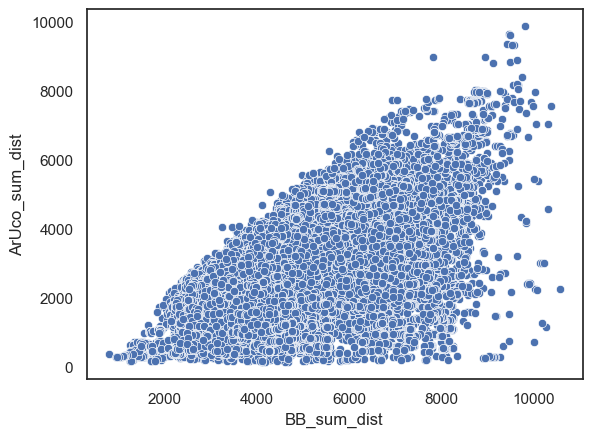

In [45]:
sns.scatterplot(data=df5, x='BB_sum_dist', y='ArUco_sum_dist')

for the subset where both are available, pearson:  PearsonRResult(statistic=0.7926634046880849, pvalue=0.0)


(100.0, 1600.0)

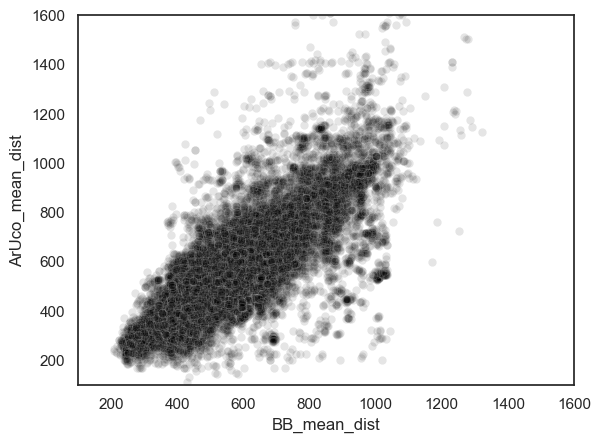

In [46]:
sns.set_theme(style="white")

sns.scatterplot(data=df5, x='BB_mean_dist', y='ArUco_mean_dist', color='black', alpha=0.1)
x = scipy.stats.pearsonr(df5.loc[(df5['BB_mean_dist']>=1)&(df5['ArUco_mean_dist']>=1),'BB_mean_dist'], df5.loc[(df5['BB_mean_dist']>=1)&(df5['ArUco_mean_dist']>=1),'ArUco_mean_dist'])
print('for the subset where both are available, pearson: ', x)
plt.xlim(100,1600)
plt.ylim(100,1600)

<Axes: >

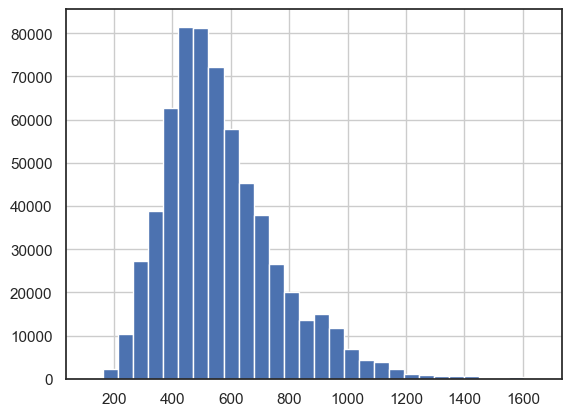

In [47]:
df5.ArUco_mean_dist.hist(bins=30)

In [48]:
gb5 = df5.loc[:,['video', 'ID_CVAT', 'ID_ArUco', 'ArUco_mean_dist', 'BB_mean_dist', 'ArUco_sum_dist', 'BB_sum_dist']\
             ].groupby(['video', 'ID_CVAT', 'ID_ArUco']).mean().reset_index()
gb5['breed'] = df5.loc[:,['video', 'ID_CVAT', 'ID_ArUco', 'breed']\
                       ].groupby(['video', 'ID_CVAT', 'ID_ArUco']).first().reset_index()['breed']
gb5['count_ArUco'] = df5.loc[:,['video', 'ID_CVAT', 'ID_ArUco', 'ArUco_mean_dist']\
                             ].groupby(['video', 'ID_CVAT', 'ID_ArUco']).count().reset_index()['ArUco_mean_dist']
gb5

video  ID_CVAT  ID_ArUco  ArUco_mean_dist  \
0    01_20220108115951_part1_1      1.0      12.0       628.502948   
1    01_20220108115951_part1_1      2.0       1.0       621.128477   
2    01_20220108115951_part1_1      3.0       3.0       531.662977   
3    01_20220108115951_part1_1      4.0       4.0       627.088406   
4    01_20220108115951_part1_1      5.0       5.0       721.762793   
..                         ...      ...       ...              ...   
595   p02t_06_20220112171551_3      5.0      20.0       411.636889   
596   p02t_06_20220112171551_3      6.0    9999.0              NaN   
597   p02t_06_20220112171551_3      7.0    9999.0              NaN   
598   p02t_06_20220112171551_3      8.0    9999.0              NaN   
599   p02t_06_20220112171551_3      9.0      14.0      1278.766408   

     BB_mean_dist  ArUco_sum_dist  BB_sum_dist breed  count_ArUco  
0      749.570954     3182.983744  6739.848481    DW         1982  
1      700.036329     3028.130925  6295.771755    DW         2357  
2      523.888968     2669.534079  4708.666390    DW         2022  
3      680.794211     3167.554839  6122.676113    DW         1136  
4      688.212600     4028.164207  6188.588689    DW            9  
..            ...             ...          ...   ...          ...  
595    650.951520     1021.707837  5207.612158    IB         1687  
596    768.107825             NaN  6144.862600    IB            0  
597    615.380650             NaN  4923.045203    IB            0  
598    939.696165             NaN  7517.569323    IB            0  
599    961.760145     3102.840503  7694.081158    IB          703  

[600 rows x 9 columns]

<Axes: xlabel='value', ylabel='Count'>

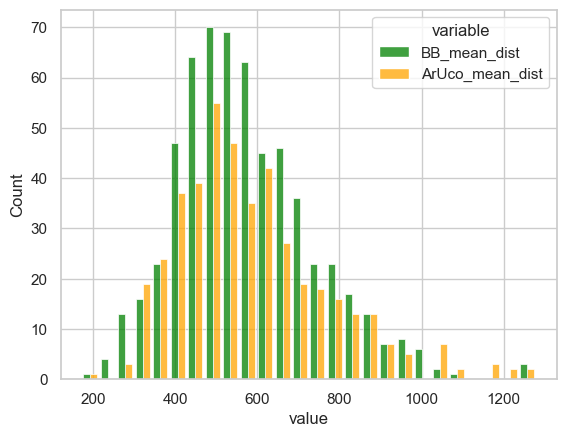

In [49]:
sns.set(style="whitegrid")

my_pal = {"BB_mean_dist": "green", "ArUco_mean_dist": "orange"}

sns.histplot(pd.melt(gb5, id_vars=['video', 'ID_CVAT', 'ID_ArUco'], \
                     value_vars = ['BB_mean_dist', 'ArUco_mean_dist']).reset_index(),\
             x='value' ,hue='variable', multiple="dodge", shrink=.8, palette=my_pal)

In [50]:
gb5.loc[(gb5['breed']=='IB'),'BB_mean_hendist'] = gb5.loc[(gb5['breed']=='IB'),'BB_mean_dist'] / IB_hen_size
gb5.loc[(gb5['breed']=='DW'),'BB_mean_hendist'] = gb5.loc[(gb5['breed']=='DW'),'BB_mean_dist'] / DW_hen_size
gb5.loc[(gb5['breed']=='IB'),'ArUco_mean_hendist'] = gb5.loc[(gb5['breed']=='IB'),'ArUco_mean_dist'] / IB_hen_size
gb5.loc[(gb5['breed']=='DW'),'ArUco_mean_hendist'] = gb5.loc[(gb5['breed']=='DW'),'ArUco_mean_dist'] / DW_hen_size

In [51]:
gb5['markers_found_%'] = (gb5['count_ArUco'] / 2400) *100

In [52]:
# gb5.ArUco_mean_dist.fillna()
gb5['ArUco_mean_hendist'] = gb5['ArUco_mean_hendist'].fillna(value=0.0)
gb5

video  ID_CVAT  ID_ArUco  ArUco_mean_dist  \
0    01_20220108115951_part1_1      1.0      12.0       628.502948   
1    01_20220108115951_part1_1      2.0       1.0       621.128477   
2    01_20220108115951_part1_1      3.0       3.0       531.662977   
3    01_20220108115951_part1_1      4.0       4.0       627.088406   
4    01_20220108115951_part1_1      5.0       5.0       721.762793   
..                         ...      ...       ...              ...   
595   p02t_06_20220112171551_3      5.0      20.0       411.636889   
596   p02t_06_20220112171551_3      6.0    9999.0              NaN   
597   p02t_06_20220112171551_3      7.0    9999.0              NaN   
598   p02t_06_20220112171551_3      8.0    9999.0              NaN   
599   p02t_06_20220112171551_3      9.0      14.0      1278.766408   

     BB_mean_dist  ArUco_sum_dist  BB_sum_dist breed  count_ArUco  \
0      749.570954     3182.983744  6739.848481    DW         1982   
1      700.036329     3028.130925  6295.771755    DW         2357   
2      523.888968     2669.534079  4708.666390    DW         2022   
3      680.794211     3167.554839  6122.676113    DW         1136   
4      688.212600     4028.164207  6188.588689    DW            9   
..            ...             ...          ...   ...          ...   
595    650.951520     1021.707837  5207.612158    IB         1687   
596    768.107825             NaN  6144.862600    IB            0   
597    615.380650             NaN  4923.045203    IB            0   
598    939.696165             NaN  7517.569323    IB            0   
599    961.760145     3102.840503  7694.081158    IB          703   

     BB_mean_hendist  ArUco_mean_hendist  markers_found_%  
0           3.514580            2.946917        82.583333  
1           3.282322            2.912340        98.208333  
2           2.456404            2.492855        84.250000  
3           3.192100            2.940285        47.333333  
4           3.226883            3.384193         0.375000  
..               ...                 ...              ...  
595         2.959715            1.871611        70.291667  
596         3.492396            0.000000         0.000000  
597         2.797983            0.000000         0.000000  
598         4.272566            0.000000         0.000000  
599         4.372885            5.814234        29.291667  

[600 rows x 12 columns]

for the subset where both are available, pearson:  PearsonRResult(statistic=0.5046826793348589, pvalue=1.4870646486422616e-29)


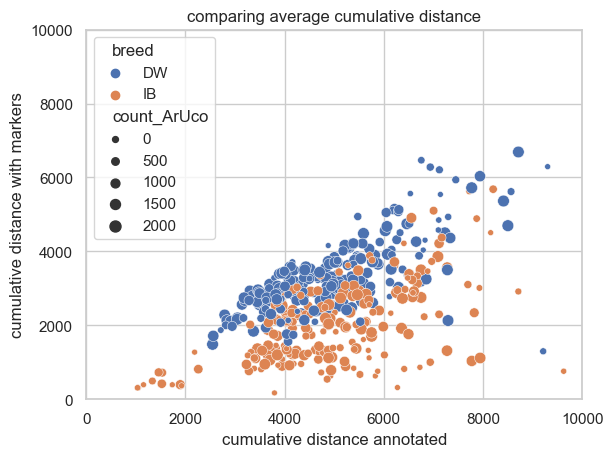

In [53]:
x3 = scipy.stats.pearsonr(gb5.loc[(gb5['BB_sum_dist']>1)&(gb5['ArUco_sum_dist']>1),'BB_sum_dist'], gb5.loc[(gb5['BB_sum_dist']>1)&(gb5['ArUco_sum_dist']>1), 'ArUco_sum_dist'])
print('for the subset where both are available, pearson: ', x3)

sns.scatterplot(data=gb5, x='BB_sum_dist', y='ArUco_sum_dist', hue='breed', size='count_ArUco')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xlabel('cumulative distance annotated')
plt.ylabel('cumulative distance with markers')
plt.title('comparing average cumulative distance')
plt.show()

for the subset where both are available, pearson:  PearsonRResult(statistic=0.7650823853985383, pvalue=5.435209205968324e-85)


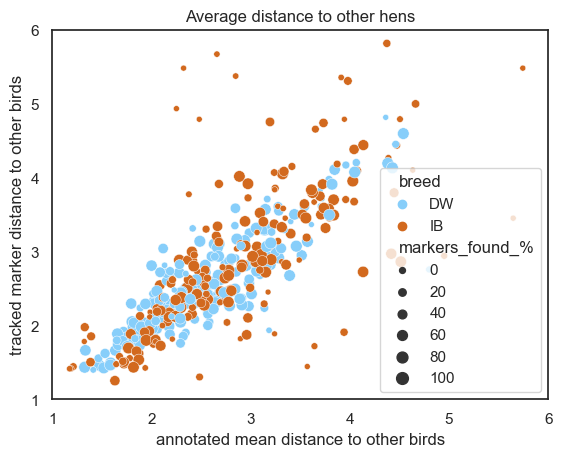

In [54]:
x3 = scipy.stats.pearsonr(gb5.loc[(gb5['BB_mean_dist']>0.1)&(gb5['ArUco_mean_dist']>0.1),'BB_mean_dist'], gb5.loc[(gb5['BB_mean_dist']>0.1)&(gb5['ArUco_mean_dist']>0.1), 'ArUco_mean_dist'])
print('for the subset where both are available, pearson: ', x3)
my_pal = {"IB": "chocolate", "DW": "lightskyblue"}
sns.set(style="white")
sns.scatterplot(data=gb5, x='BB_mean_hendist', y='ArUco_mean_hendist', hue='breed', size='markers_found_%', palette=my_pal)
plt.xlim(1,6)
plt.ylim(1,6)
plt.xlabel('annotated mean distance to other birds')
plt.ylabel('tracked marker distance to other birds')
plt.title('Average distance to other hens')
plt.show()

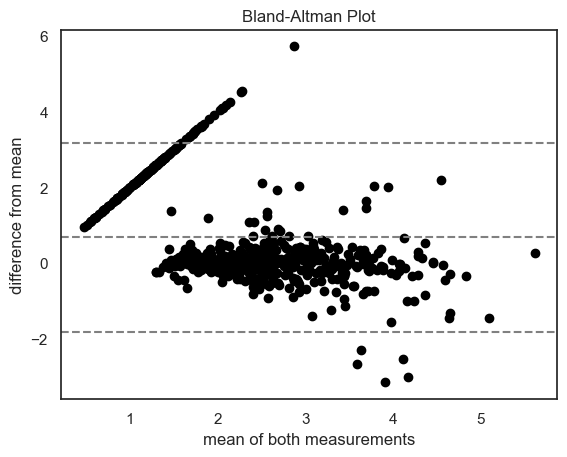

In [55]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs, c='black')
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    

x = gb5['BB_mean_hendist']
y = gb5['ArUco_mean_hendist']
    
bland_altman_plot(x, y)
plt.title('Bland-Altman Plot')
plt.xlabel('mean of both measurements')
plt.ylabel('difference from mean')
plt.show()

# Survival plots

first we take our existing frame, we throw away every other frame and count the unique ID per second. Then we make a boxplot with unique ID per frame rate. Should be nice to have the real nr in there as well.
Then we take a look at the distance. We take the top 5% visible animals for DW and IB. We 




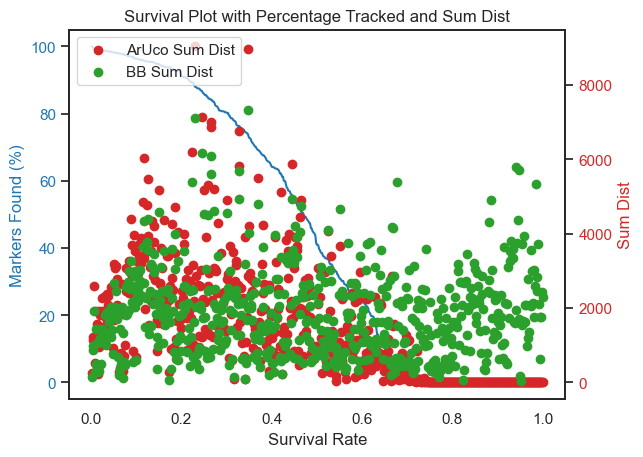

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have imported gb5 as a pandas DataFrame

# Sort the dataframe by markers_found_% in ascending order
sumdist_sorted = sumdist.sort_values(by='markers_found_%', ignore_index=True)
sumdist_sorted = sumdist_sorted.reset_index(drop=False)

# Calculate survival rate
total_ids = len(sumdist_sorted)
sumdist_sorted['survival_rate'] = (total_ids - sumdist_sorted['index']) / total_ids

# Create the plot
fig, ax1 = plt.subplots()

# Plot percentage tracked
ax1.plot(sumdist_sorted['survival_rate'], sumdist_sorted['markers_found_%'], color='tab:blue')
ax1.set_xlabel('Survival Rate')
ax1.set_ylabel('Markers Found (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for sum_dist_diff
ax2 = ax1.twinx()

# Plot ArUco_sum_dist and BB_sum_dist
ax2.scatter(sumdist_sorted['survival_rate'], sumdist_sorted['dist_ArUco'], color='tab:red', label='ArUco Sum Dist')
ax2.scatter(sumdist_sorted['survival_rate'], sumdist_sorted['dist_BB'], color='tab:green', label='BB Sum Dist')
ax2.set_ylabel('Sum Dist', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Show the plot
plt.title('Survival Plot with Percentage Tracked and Sum Dist')
plt.legend(loc='upper left')
plt.show()


In [57]:
sumdist['dist_diff'] = sumdist['dist_ArUco'] - sumdist['dist_BB']

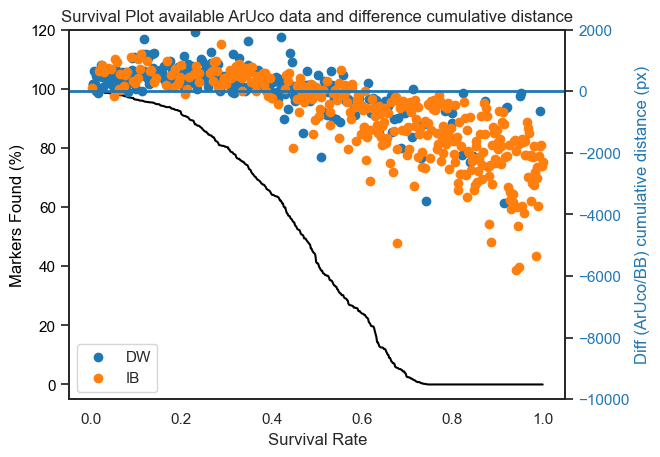

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have imported gb5 as a pandas DataFrame

# Sort the dataframe by markers_found_% in ascending order
sumdist_sorted = sumdist.sort_values(by='markers_found_%', ignore_index=True)
sumdist_sorted = sumdist_sorted.reset_index(drop=False)

# Calculate survival rate
total_ids = len(sumdist_sorted)
sumdist_sorted['survival_rate'] = (total_ids - sumdist_sorted['index']) / total_ids

# Create the plot
fig, ax1 = plt.subplots()

# Plot percentage tracked
ax1.plot(sumdist_sorted['survival_rate'], sumdist_sorted['markers_found_%'], color='black')  # Change the color to black
ax1.set_xlabel('Survival Rate')
ax1.set_ylabel('Markers Found (%)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(-5, 120)

# Create a second y-axis for sum_dist_diff
ax2 = ax1.twinx()

# Plot ArUco_sum_dist and BB_sum_dist
colors = {'DW': 'tab:blue', 'IB': 'tab:orange'}  # Define colors for each breed
for breed, color in colors.items():
    subset = sumdist_sorted[sumdist_sorted['breed'] == breed]
    ax2.scatter(subset['survival_rate'], subset['dist_diff'], color=color, label=f'{breed} difference between ArUco and annotations')

ax2.set_ylabel('Diff (ArUco/BB) cumulative distance (px)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Remove gridlines for the right y-axis
ax2.grid(False)

# Add a thick line at the right 0 level
ax2.axhline(0, color='tab:blue', linestyle='-', linewidth=2)

# Manually set the y-limits for the right y-axis to align the point 0 with the point 100% on the left y-axis
left_ylim = ax1.get_ylim()
ax2.set_ylim(-10000, 2000)
    #left_ylim[0] * (-8000 / 100), left_ylim[1] * (2000 / 100))

# Show the plot
plt.title('Survival Plot available ArUco data and difference cumulative distance')
plt.legend(loc='lower left', labels=['DW', 'IB'])  # Specify legend labels directly
plt.show()


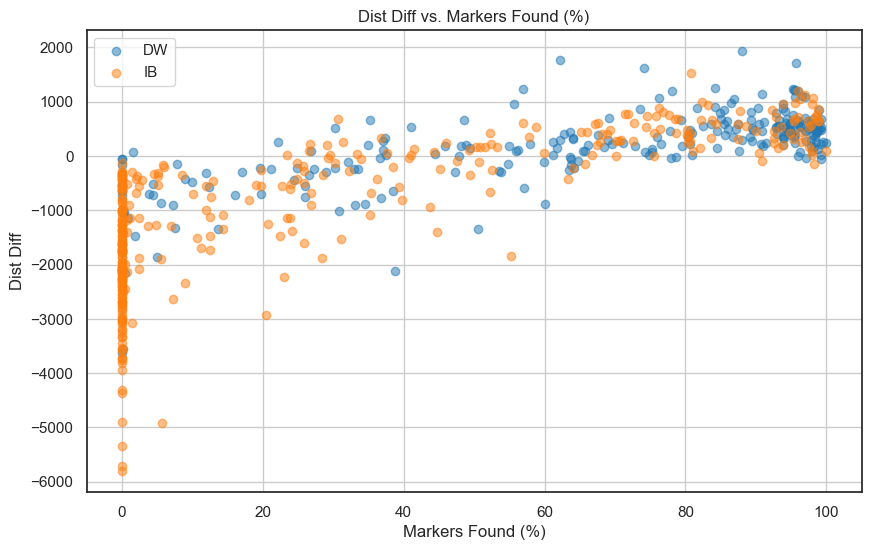

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have imported sumdist as a pandas DataFrame

# Create the plot
plt.figure(figsize=(10, 6))

# Define colors for each breed
colors = {'DW': 'tab:blue', 'IB': 'tab:orange'}

# Scatter plot for dist_diff against markers_found_%, colored by breed
for breed, color in colors.items():
    subset = sumdist[sumdist['breed'] == breed]
    plt.scatter(subset['markers_found_%'], subset['dist_diff'], color=color, alpha=0.5, label=breed)

plt.xlabel('Markers Found (%)')
plt.ylabel('Dist Diff')
plt.title('Dist Diff vs. Markers Found (%)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# Additional beyond scope of paper
If you've come this 

In [60]:
df5 = df5.merge(df.loc[:,['video', 'frame','ID_CVAT', 'ID_ArUco', 'corresponding_annotated_frame', 'visible_inter']], on=['video', 'frame','ID_CVAT', 'ID_ArUco'])

In [61]:
sns.set(style="whitegrid")

# time between frames

In [62]:
import numpy as np
df6 = df5.copy(deep=True)
df6 = df6.sort_values(by=['video', 'ID_CVAT','ID_ArUco', 'frame'])
# a = np.array([0,0,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,0])
a = df6.frame.diff().values
a[a>1] = 0
a[a<1] = 0
a = np.nan_to_num(a)
# pad a with 0 at both sides for edge cases when a starts or ends with 1
d = np.diff(np.pad(a, pad_width=1, mode='constant'))
# subtract indices when value changes from 0 to 1 from indices where value changes from 1 to 0
x= np.flatnonzero(d == -1) - np.flatnonzero(d == 1)
x

array([247,  30,   1, ...,   7,   4,   1], dtype=int64)

In [63]:
aw = df6.loc[df6['breed']=='DW'].frame.diff().values
aw[aw>1] = 0
aw[aw<1] = 0
aw = np.nan_to_num(aw)
# pad a with 0 at both sides for edge cases when a starts or ends with 1
dw = np.diff(np.pad(aw, pad_width=1, mode='constant'))
# subtract indices when value changes from 0 to 1 from indices where value changes from 1 to 0
xw= np.flatnonzero(dw == -1) - np.flatnonzero(dw == 1)
xw


array([247,  30,   1, ..., 249,  50,   6], dtype=int64)

In [64]:
ab = df6.loc[df6['breed']=='IB'].frame.diff().values
ab[ab>1] = 0
ab[ab<1] = 0
ab = np.nan_to_num(ab)
# pad a with 0 at both sides for edge cases when a starts or ends with 1
db = np.diff(np.pad(ab, pad_width=1, mode='constant'))
# subtract indices when value changes from 0 to 1 from indices where value changes from 1 to 0
xb= np.flatnonzero(db == -1) - np.flatnonzero(db == 1)
xb
# plt.hist(xb[xb>0].tolist(), bins=100)
# plt.yscale('log')

array([ 1,  2, 35, ...,  7,  4,  1], dtype=int64)

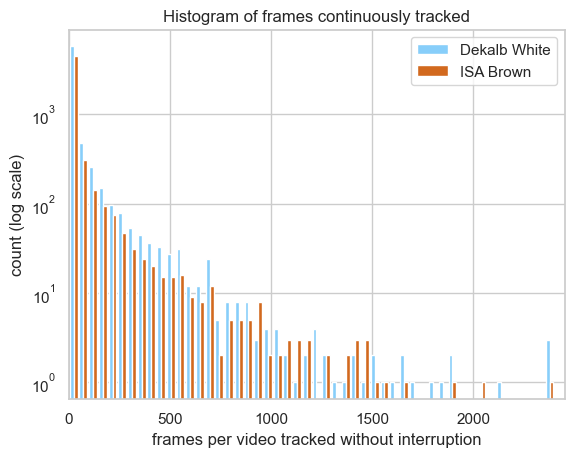

In [65]:



# plt.hist(xb[xb>0].tolist(), bins=100, alpha=0.5, label='ISA Brown', color='brown')
# plt.hist(xw[xw>0].tolist(), bins=100, alpha=0.5, label='Dekalb White', color='blue')
# my_pal2 = {"ISA Brown'": "chocolate", "Dekalb White": "lightskyblue"}
# ax = sns.histplot([xw[xw>0].tolist(), xb[xb>0].tolist()], bins=50, label=['Dekalb White', 'ISA Brown'], palette=my_pal2)
sns.set(style="whitegrid")
plt.hist([xw[xw>0].tolist(), xb[xb>0].tolist()], bins=50, \
         label=['Dekalb White', 'ISA Brown'], color=['lightskyblue','chocolate'])
# plt.hist(x, bins, alpha=0.5, label='x')
# pyplot.hist(y, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.yscale('log')
plt.title('Histogram of frames continuously tracked')
plt.xlim(0,2450)
plt.xlabel('frames per video tracked without interruption')
plt.ylabel('count (log scale)')
plt.show()

In [66]:
gb_names = df6.loc[:,['video', 'original_video', 'ID_CVAT', 'ID_ArUco', 'breed']].groupby(['video', 'original_video', 'ID_CVAT', 'ID_ArUco']).first().reset_index()
gb_names

video           original_video  ID_CVAT  ID_ArUco  \
0    01_20220108115951_part1_1  01_20220108115951_part1      1.0      12.0   
1    01_20220108115951_part1_1  01_20220108115951_part1      2.0       1.0   
2    01_20220108115951_part1_1  01_20220108115951_part1      3.0       3.0   
3    01_20220108115951_part1_1  01_20220108115951_part1      4.0       4.0   
4    01_20220108115951_part1_1  01_20220108115951_part1      5.0       5.0   
..                         ...                      ...      ...       ...   
595   p02t_06_20220112171551_3   p02t_06_20220112171551      5.0      20.0   
596   p02t_06_20220112171551_3   p02t_06_20220112171551      6.0    9999.0   
597   p02t_06_20220112171551_3   p02t_06_20220112171551      7.0    9999.0   
598   p02t_06_20220112171551_3   p02t_06_20220112171551      8.0    9999.0   
599   p02t_06_20220112171551_3   p02t_06_20220112171551      9.0      14.0   

    breed  
0      DW  
1      DW  
2      DW  
3      DW  
4      DW  
..    ...  
595    IB  
596    IB  
597    IB  
598    IB  
599    IB  

[600 rows x 5 columns]

In [67]:
# total nr frames tracked per animal 
gb6_count = df6.loc[(df6['x_ArUco']>=0),['video', 'ID_CVAT', 'ID_ArUco', 'x_ArUco', 'breed']].groupby(['video', 'ID_CVAT', 'ID_ArUco', 'breed']).count().reset_index()
gb6_count = gb_names.merge(gb6_count, on=['video', 'ID_CVAT', 'ID_ArUco', 'breed'], how='outer')
gb6_count.loc[gb6_count['x_ArUco'].isna(), 'x_ArUco'] = 0
gb6_count


video           original_video  ID_CVAT  ID_ArUco  \
0    01_20220108115951_part1_1  01_20220108115951_part1      1.0      12.0   
1    01_20220108115951_part1_1  01_20220108115951_part1      2.0       1.0   
2    01_20220108115951_part1_1  01_20220108115951_part1      3.0       3.0   
3    01_20220108115951_part1_1  01_20220108115951_part1      4.0       4.0   
4    01_20220108115951_part1_1  01_20220108115951_part1      5.0       5.0   
..                         ...                      ...      ...       ...   
595   p02t_06_20220112171551_3   p02t_06_20220112171551      5.0      20.0   
596   p02t_06_20220112171551_3   p02t_06_20220112171551      6.0    9999.0   
597   p02t_06_20220112171551_3   p02t_06_20220112171551      7.0    9999.0   
598   p02t_06_20220112171551_3   p02t_06_20220112171551      8.0    9999.0   
599   p02t_06_20220112171551_3   p02t_06_20220112171551      9.0      14.0   

    breed  x_ArUco  
0      DW   1982.0  
1      DW   2357.0  
2      DW   2022.0  
3      DW   1136.0  
4      DW      9.0  
..    ...      ...  
595    IB   1687.0  
596    IB      0.0  
597    IB      0.0  
598    IB      0.0  
599    IB    703.0  

[600 rows x 6 columns]

C:\Users\Putte027\AppData\Local\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


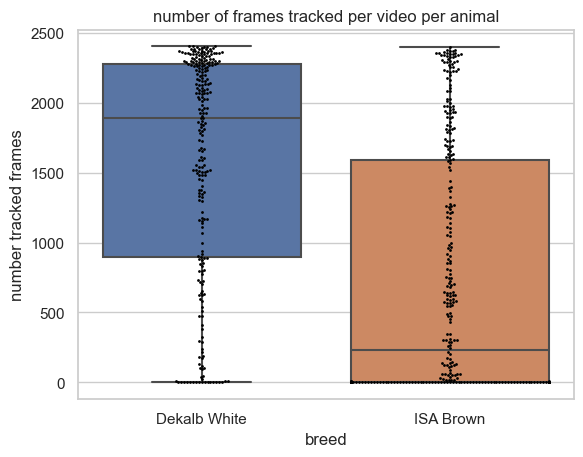

In [68]:
gb6_count['breed'] = gb6_count['breed'].replace({'DW': 'Dekalb White', 'IB': 'ISA Brown'})
ax = sns.boxplot(data = gb6_count, x='breed', y='x_ArUco')
ax = sns.swarmplot(data = gb6_count, x='breed', y='x_ArUco', color="black", s=2)
plt.title('number of frames tracked per video per animal')
plt.ylabel('number tracked frames')
plt.show()

In [69]:
gb5['sum_dist_diff'] = gb5['ArUco_sum_dist'] - gb5['BB_sum_dist']
gb5['BB_mean_hendist'] = gb5['ArUco_mean_hendist'] - gb5['BB_mean_dist']
gb5
# alles runnen want fout gemaakt

video  ID_CVAT  ID_ArUco  ArUco_mean_dist  \
0    01_20220108115951_part1_1      1.0      12.0       628.502948   
1    01_20220108115951_part1_1      2.0       1.0       621.128477   
2    01_20220108115951_part1_1      3.0       3.0       531.662977   
3    01_20220108115951_part1_1      4.0       4.0       627.088406   
4    01_20220108115951_part1_1      5.0       5.0       721.762793   
..                         ...      ...       ...              ...   
595   p02t_06_20220112171551_3      5.0      20.0       411.636889   
596   p02t_06_20220112171551_3      6.0    9999.0              NaN   
597   p02t_06_20220112171551_3      7.0    9999.0              NaN   
598   p02t_06_20220112171551_3      8.0    9999.0              NaN   
599   p02t_06_20220112171551_3      9.0      14.0      1278.766408   

     BB_mean_dist  ArUco_sum_dist  BB_sum_dist breed  count_ArUco  \
0      749.570954     3182.983744  6739.848481    DW         1982   
1      700.036329     3028.130925  6295.771755    DW         2357   
2      523.888968     2669.534079  4708.666390    DW         2022   
3      680.794211     3167.554839  6122.676113    DW         1136   
4      688.212600     4028.164207  6188.588689    DW            9   
..            ...             ...          ...   ...          ...   
595    650.951520     1021.707837  5207.612158    IB         1687   
596    768.107825             NaN  6144.862600    IB            0   
597    615.380650             NaN  4923.045203    IB            0   
598    939.696165             NaN  7517.569323    IB            0   
599    961.760145     3102.840503  7694.081158    IB          703   

     BB_mean_hendist  ArUco_mean_hendist  markers_found_%  sum_dist_diff  
0        -746.624037            2.946917        82.583333   -3556.864738  
1        -697.123989            2.912340        98.208333   -3267.640829  
2        -521.396113            2.492855        84.250000   -2039.132312  
3        -677.853926            2.940285        47.333333   -2955.121273  
4        -684.828407            3.384193         0.375000   -2160.424482  
..               ...                 ...              ...            ...  
595      -649.079909            1.871611        70.291667   -4185.904322  
596      -768.107825            0.000000         0.000000            NaN  
597      -615.380650            0.000000         0.000000            NaN  
598      -939.696165            0.000000         0.000000            NaN  
599      -955.945911            5.814234        29.291667   -4591.240654  

[600 rows x 13 columns]

In [70]:
gb5 = gb5.fillna(0)

In [71]:
# sumdist['percentage_difference'] = sumdist['dist_diff'] / sumdist['dist_BB'] * 100

In [72]:
df5gb = df5.loc[(df5['frame']%1==0)&(df5['visible_inter']==1),['corresponding_annotated_frame', 'breed', 'video', 'ID_CVAT', 'ID_ArUco', 'x_ArUco', 'frame']\
               ].groupby(['video', 'ID_CVAT', 'ID_ArUco', 'breed', 'corresponding_annotated_frame']).count().fillna(value=0.0).reset_index()
df5gb['20Hz'] = df5gb['x_ArUco']/ df5gb['frame']
for i in [10,5,4,2,1]:
    tempHz = df5.loc[(df5['frame']%(20/i)==0)&(df5['visible_inter']==1),\
                     ['corresponding_annotated_frame', 'breed', 'video', 'ID_CVAT', 'ID_ArUco', 'x_ArUco', 'frame']\
                     ].groupby(['video', 'ID_CVAT', 'ID_ArUco', 'breed', 'corresponding_annotated_frame']\
                              ).count().fillna(value=0.0).reset_index()
    tempHz[f'{i}Hz'] = tempHz['x_ArUco'] / tempHz['frame']
    df5gb = df5gb.merge(tempHz.loc[:,\
                                   ['video', 'ID_CVAT', 'ID_ArUco', 'breed', 'corresponding_annotated_frame', f'{i}Hz']\
                                  ], on= ['video', 'ID_CVAT', 'ID_ArUco', 'breed', 'corresponding_annotated_frame'],\
                        how='outer')
df5gb = df5gb.fillna(0.0)
df5gb

video  ID_CVAT  ID_ArUco breed  \
0      01_20220108115951_part1_1      1.0      12.0    DW   
1      01_20220108115951_part1_1      1.0      12.0    DW   
2      01_20220108115951_part1_1      1.0      12.0    DW   
3      01_20220108115951_part1_1      1.0      12.0    DW   
4      01_20220108115951_part1_1      1.0      12.0    DW   
...                          ...      ...       ...   ...   
63628   p02t_06_20220112171551_3      9.0      14.0    IB   
63629   p02t_06_20220112171551_3      9.0      14.0    IB   
63630   p02t_06_20220112171551_3      9.0      14.0    IB   
63631   p02t_06_20220112171551_3      9.0      14.0    IB   
63632   p02t_06_20220112171551_3      9.0      14.0    IB   

       corresponding_annotated_frame  x_ArUco  frame  20Hz  10Hz  5Hz  4Hz  \
0                                  0        9      9   1.0   1.0  1.0  1.0   
1                                  1       20     20   1.0   1.0  1.0  1.0   
2                                  2       20     20   1.0   1.0  1.0  1.0   
3                                  3       20     20   1.0   1.0  1.0  1.0   
4                                  4       20     20   1.0   1.0  1.0  1.0   
...                              ...      ...    ...   ...   ...  ...  ...   
63628                            116        0      1   0.0   0.0  0.0  0.0   
63629                            117        0      1   0.0   0.0  0.0  0.0   
63630                            118        0      1   0.0   0.0  0.0  0.0   
63631                            119        0      1   0.0   0.0  0.0  0.0   
63632                            120        0      1   0.0   0.0  0.0  0.0   

       2Hz  1Hz  
0      0.0  0.0  
1      1.0  1.0  
2      1.0  1.0  
3      1.0  1.0  
4      1.0  1.0  
...    ...  ...  
63628  0.0  0.0  
63629  0.0  0.0  
63630  0.0  0.0  
63631  0.0  0.0  
63632  0.0  0.0  

[63633 rows x 13 columns]

In [73]:
sumdf5gb = df5gb.groupby(['video', 'ID_CVAT', 'ID_ArUco', 'breed']).mean().reset_index()
# sumdf5gb = sumdf5gb.fillna(0)
sumdf5gb


video  ID_CVAT  ID_ArUco breed  \
0    01_20220108115951_part1_1      1.0      12.0    DW   
1    01_20220108115951_part1_1      2.0       1.0    DW   
2    01_20220108115951_part1_1      3.0       3.0    DW   
3    01_20220108115951_part1_1      4.0       4.0    DW   
4    01_20220108115951_part1_1      5.0       5.0    DW   
..                         ...      ...       ...   ...   
571   p02t_06_20220112171551_3      5.0      20.0    IB   
572   p02t_06_20220112171551_3      6.0    9999.0    IB   
573   p02t_06_20220112171551_3      7.0    9999.0    IB   
574   p02t_06_20220112171551_3      8.0    9999.0    IB   
575   p02t_06_20220112171551_3      9.0      14.0    IB   

     corresponding_annotated_frame    x_ArUco      frame      20Hz      10Hz  \
0                        63.370370  18.351852  18.444444  0.978651  0.968662   
1                        60.000000  19.479339  19.495868  0.998657  0.997429   
2                        60.000000  16.710744  16.867769  0.981058  0.965843   
3                        39.263889  15.777778  15.972222  0.830798  0.828571   
4                         0.500000   4.500000   5.000000  0.750000  0.500000   
..                             ...        ...        ...       ...       ...   
571                      60.000000  13.942149  14.223140  0.755103  0.752033   
572                      60.500000   0.000000   1.000000  0.000000  0.000000   
573                      60.500000   0.000000   1.000000  0.000000  0.000000   
574                      60.500000   0.000000   1.000000  0.000000  0.000000   
575                      60.000000   5.809917   6.520661  0.471931  0.448616   

          5Hz       4Hz       2Hz       1Hz  
0    0.955864  0.954475  0.930556  0.898148  
1    0.995592  0.995179  0.983471  0.975207  
2    0.949311  0.921488  0.884298  0.834711  
3    0.822917  0.825231  0.805556  0.791667  
4    0.500000  0.500000  0.000000  0.000000  
..        ...       ...       ...       ...  
571  0.742149  0.743113  0.719008  0.710744  
572  0.000000  0.000000  0.000000  0.000000  
573  0.000000  0.000000  0.000000  0.000000  
574  0.000000  0.000000  0.000000  0.000000  
575  0.412948  0.387741  0.351240  0.280992  

[576 rows x 13 columns]

In [74]:
sumdf5gb = df5gb.groupby(['video', 'ID_CVAT','ID_ArUco', 'breed']).mean().reset_index()
# sumdf5gb['count'] = df5gb.groupby(['video', 'ID_CVAT', 'breed']).count().reset_index()['']

sumdf5gb_m = pd.melt(sumdf5gb, id_vars = ['video', 'ID_CVAT', 'ID_ArUco', 'breed'],value_vars = [col for col in sumdf5gb.keys() if 'Hz' in col])
sumdf5gb_m['value'].fillna(0.0, inplace=True)
sumdf5gb_m

video  ID_CVAT  ID_ArUco breed variable     value
0     01_20220108115951_part1_1      1.0      12.0    DW     20Hz  0.978651
1     01_20220108115951_part1_1      2.0       1.0    DW     20Hz  0.998657
2     01_20220108115951_part1_1      3.0       3.0    DW     20Hz  0.981058
3     01_20220108115951_part1_1      4.0       4.0    DW     20Hz  0.830798
4     01_20220108115951_part1_1      5.0       5.0    DW     20Hz  0.750000
...                         ...      ...       ...   ...      ...       ...
3451   p02t_06_20220112171551_3      5.0      20.0    IB      1Hz  0.710744
3452   p02t_06_20220112171551_3      6.0    9999.0    IB      1Hz  0.000000
3453   p02t_06_20220112171551_3      7.0    9999.0    IB      1Hz  0.000000
3454   p02t_06_20220112171551_3      8.0    9999.0    IB      1Hz  0.000000
3455   p02t_06_20220112171551_3      9.0      14.0    IB      1Hz  0.280992

[3456 rows x 6 columns]

In [75]:
na_p_vid = sumdf5gb_m.loc[(sumdf5gb_m['value']>0.001), ['video', 'variable','breed', 'ID_CVAT']].groupby(['video', 'variable', 'breed']).nunique().reset_index()
print(na_p_vid.shape)
na_p_vid[75:80]

(390, 4)


video variable breed  ID_CVAT
75  02_20220111065954_part2_BB      2Hz    IB        1
76  02_20220111065954_part2_BB      4Hz    IB        1
77  02_20220111065954_part2_BB      5Hz    IB        1
78  02_20220111065954_part2_BC     10Hz    IB        1
79  02_20220111065954_part2_BC      1Hz    IB        1

In [76]:
na_p_vid2 = sumdf5gb_m.loc[:, ['video','variable', 'ID_CVAT', 'breed']\
                          ].groupby(['video','variable' , 'breed']).nunique().reset_index()
na_p_vid2['ID_ArUco'] = sumdf5gb_m.loc[(sumdf5gb_m['ID_ArUco']!=9999), ['video','variable', 'ID_ArUco', 'breed']\
                                      ].groupby(['video', 'variable', 'breed']).nunique().reset_index()['ID_ArUco']
na_p_vid2['max_nr_animals'] = na_p_vid2['ID_ArUco']

na_p_vid2['max_nr_annotated_animals'] = na_p_vid2['ID_CVAT']
na_p_vid2

video variable breed  ID_CVAT  ID_ArUco  \
0    01_20220108115951_part1_1     10Hz    DW       10         9   
1    01_20220108115951_part1_1      1Hz    DW       10         9   
2    01_20220108115951_part1_1     20Hz    DW       10         9   
3    01_20220108115951_part1_1      2Hz    DW       10         9   
4    01_20220108115951_part1_1      4Hz    DW       10         9   
..                         ...      ...   ...      ...       ...   
385   p02t_06_20220112171551_3      1Hz    IB        9         6   
386   p02t_06_20220112171551_3     20Hz    IB        9         6   
387   p02t_06_20220112171551_3      2Hz    IB        9         6   
388   p02t_06_20220112171551_3      4Hz    IB        9         6   
389   p02t_06_20220112171551_3      5Hz    IB        9         6   

     max_nr_animals  max_nr_annotated_animals  
0                 9                        10  
1                 9                        10  
2                 9                        10  
3                 9                        10  
4                 9                        10  
..              ...                       ...  
385               6                         9  
386               6                         9  
387               6                         9  
388               6                         9  
389               6                         9  

[390 rows x 7 columns]

In [77]:
na_p_vid = na_p_vid.merge(na_p_vid2[['video','variable', 'breed', 'max_nr_animals', 'max_nr_annotated_animals']], on=['video', 'variable', 'breed'], how='outer')
na_p_vid = na_p_vid.fillna(0.0)
na_p_vid['missed'] = na_p_vid['max_nr_annotated_animals'] - na_p_vid['ID_CVAT']
na_p_vid

video variable breed  ID_CVAT  max_nr_animals  \
0    01_20220108115951_part1_1     10Hz    DW        9               9   
1    01_20220108115951_part1_1      1Hz    DW        8               9   
2    01_20220108115951_part1_1     20Hz    DW        9               9   
3    01_20220108115951_part1_1      2Hz    DW        8               9   
4    01_20220108115951_part1_1      4Hz    DW        9               9   
..                         ...      ...   ...      ...             ...   
385   p02t_06_20220112171551_3      1Hz    IB        6               6   
386   p02t_06_20220112171551_3     20Hz    IB        6               6   
387   p02t_06_20220112171551_3      2Hz    IB        6               6   
388   p02t_06_20220112171551_3      4Hz    IB        6               6   
389   p02t_06_20220112171551_3      5Hz    IB        6               6   

     max_nr_annotated_animals  missed  
0                          10       1  
1                          10       2  
2                          10       1  
3                          10       2  
4                          10       1  
..                        ...     ...  
385                         9       3  
386                         9       3  
387                         9       3  
388                         9       3  
389                         9       3  

[390 rows x 7 columns]

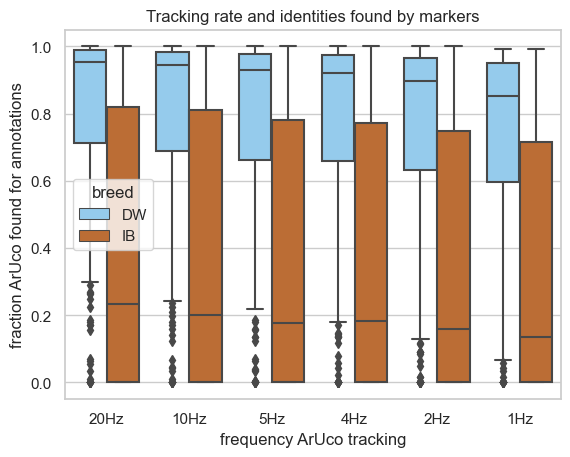

In [78]:

sns.set(style="whitegrid")
my_pal = {"IB": "chocolate", "DW": "lightskyblue"}

ax = sns.boxplot(data = sumdf5gb_m, x='variable', y='value', hue= 'breed', palette=my_pal)#sns.boxplot(data=gb_ArUco_sum, x='breed',y='nr_ArUco_per_annotation_frame')
# ax = sns.swarmplot(data = sumdf5gb_m, x='variable', y='value',hue='breed', size=1, color=".25")
plt.title('Tracking rate and identities found by markers')
plt.ylabel('fraction ArUco found for annotations')
plt.xlabel('frequency ArUco tracking')
plt.show()
# sns.boxplot(data = sumdf5gb_m, x='variable', y='value')